# Business Problem:

A FMCG company has entered into the instant noodles business two years back. Their higher management has notices that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. In both the ways it is an inventory cost loss to the company; hence, the higher management wants to optimize the supply quantity in each and every warehouse in entire country.

# Goal & Objective:

The objective of this exercise is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time to the warehouse.
Also try to analysis the demand pattern in different pockets of the country so management can drive the advertisement campaign particular in those pockets.
This is the first phase of the agreement; hence, company has shared very limited information. Once you are able to showcase a tangible impact with this much of information then company will open the 360 degree data lake for your consulting company to build a more robust model.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
df = pd.read_csv('Data.csv')

#Glimpse of Data
df.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
0                  2             4651  ...               1             91   
1                  4             6217  ...               1            210   
2                  4             4306  ...               0            161   
3                  2             6000  ...               0            103   
4                  2             4740  ...               1            112   

   workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0         29.0          NaN                          13              0   
1         31.0          NaN                           4              0   
2         37.0          NaN                          17              0   
3         21.0          NaN                          17              1   
4         25.0       2009.0                          18              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 5              15   
1                             A                 3              17   
2                             A                 6              22   
3                            A+                 3              27   
4                             C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071  

[5 rows x 24 columns]

# Data Report

In [3]:
df.shape

(29696, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29696 entries, 0 to 29695
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 29696 non-null  object 
 1   WH_Manager_ID                 29696 non-null  object 
 2   Location_type                 29696 non-null  object 
 3   WH_capacity_size              29696 non-null  object 
 4   zone                          29696 non-null  object 
 5   WH_regional_zone              29696 non-null  object 
 6   num_refill_req_l3m            29696 non-null  int64  
 7   transport_issue_l1y           29696 non-null  int64  
 8   Competitor_in_mkt             29696 non-null  int64  
 9   retail_shop_num               29696 non-null  int64  
 10  wh_owner_type                 29696 non-null  object 
 11  distributor_num               29696 non-null  int64  
 12  flood_impacted                29696 non-null  int64  
 13  f

In [5]:
columns_to_convert = ['flood_impacted', 'flood_proof', 'electric_supply', 'temp_reg_mach']

# Convert specified columns to object data type
df[columns_to_convert] = df[columns_to_convert].astype('object')

# Verify the changes
print(df.dtypes)

Ware_house_ID                    object
WH_Manager_ID                    object
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                   object
flood_proof                      object
electric_supply                  object
dist_from_hub                     int64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                    object
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64
dtype: object


In [6]:
df.describe().T

count          mean           std     min  \
num_refill_req_l3m          29696.0      4.078731      2.605717     0.0   
transport_issue_l1y         29696.0      0.770946      1.196616     0.0   
Competitor_in_mkt           29696.0      3.105671      1.139952     0.0   
retail_shop_num             29696.0   4988.217066   1055.364357  1821.0   
distributor_num             29696.0     42.417026     16.059973    15.0   
dist_from_hub               29696.0    163.395878     62.823078    55.0   
workers_num                 28522.0     28.956490      7.893929    10.0   
wh_est_year                 15589.0   2009.369363      7.518343  1996.0   
storage_issue_reported_l3m  29696.0     17.137258      9.152548     0.0   
wh_breakdown_l3m            29696.0      3.476428      1.689956     0.0   
govt_check_l3m              29696.0     18.854425      8.630730     1.0   
product_wg_ton              29696.0  22113.392342  11593.968356  2065.0   

                                25%      50%      75%      max  
num_refill_req_l3m              2.0      4.0      6.0      8.0  
transport_issue_l1y             0.0      0.0      1.0      5.0  
Competitor_in_mkt               2.0      3.0      4.0     12.0  
retail_shop_num              4314.0   4860.0   5503.0  11008.0  
distributor_num                29.0     42.0     56.0     70.0  
dist_from_hub                 109.0    164.0    218.0    271.0  
workers_num                    24.0     28.0     33.0     98.0  
wh_est_year                  2003.0   2009.0   2016.0   2023.0  
storage_issue_reported_l3m     10.0     18.0     24.0     39.0  
wh_breakdown_l3m                2.0      3.0      5.0      6.0  
govt_check_l3m                 11.0     21.0     26.0     32.0  
product_wg_ton              13063.0  22104.0  30102.0  55151.0

In [7]:
# Find duplicate rows
num_duplicates = df.duplicated().sum()

print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 4695


# Exploratory Data Analysis

## Univariate Analysis

Inspecting numerical columns

In [8]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')


    plt.figure(figsize=[25,10])
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    a=round(df[column].min())
    b=round(df[column].max())
    freq, bins, patches = plt.hist(df[column], bins=nbins, range=[a,b], edgecolor='Black', color='cyan')
    bin_centers = np.diff(bins)*0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
      height = int(freq[n])
      plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )
      n = n+1

    #plt.legend()
    #plt.xticks(range(a,b,round((b-a)/nbins)))
    plt.show;
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    #ax.legend()
    plt.show()

In [9]:
num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(num.columns.values)
len(lstnumericcolumns)

12

In [10]:
lstnumericcolumns

['num_refill_req_l3m',
 'transport_issue_l1y',
 'Competitor_in_mkt',
 'retail_shop_num',
 'distributor_num',
 'dist_from_hub',
 'workers_num',
 'wh_est_year',
 'storage_issue_reported_l3m',
 'wh_breakdown_l3m',
 'govt_check_l3m',
 'product_wg_ton']

In [11]:
num.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                   3                    1                  2   
1                   0                    0                  4   
2                   1                    0                  4   
3                   7                    4                  2   
4                   3                    1                  2   

   retail_shop_num  distributor_num  dist_from_hub  workers_num  wh_est_year  \
0             4651               24             91         29.0          NaN   
1             6217               47            210         31.0          NaN   
2             4306               64            161         37.0          NaN   
3             6000               50            103         21.0          NaN   
4             4740               42            112         25.0       2009.0   

   storage_issue_reported_l3m  wh_breakdown_l3m  govt_check_l3m  \
0                          13                 5              15   
1                           4                 3              17   
2                          17                 6              22   
3                          17                 3              27   
4                          18                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071

Description of num_refill_req_l3m
----------------------------------------------------------------------------
count    29696.000000
mean         4.078731
std          2.605717
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          8.000000
Name: num_refill_req_l3m, dtype: float64 Distribution of num_refill_req_l3m
----------------------------------------------------------------------------
BoxPlot of num_refill_req_l3m
----------------------------------------------------------------------------


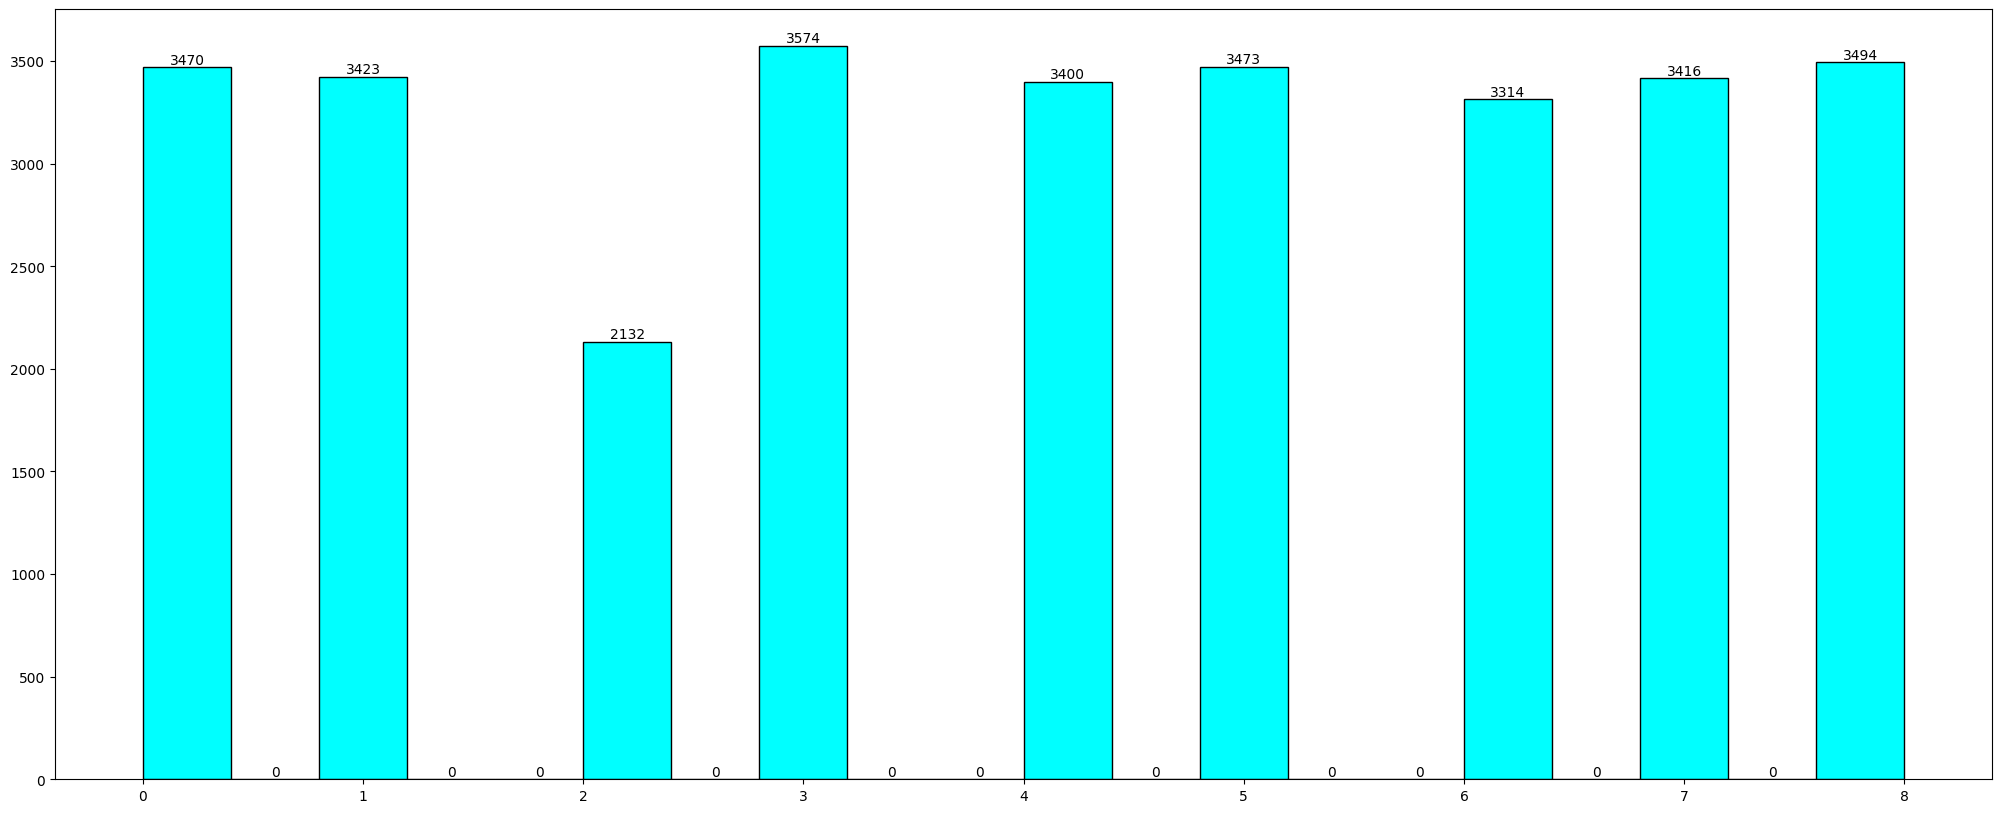

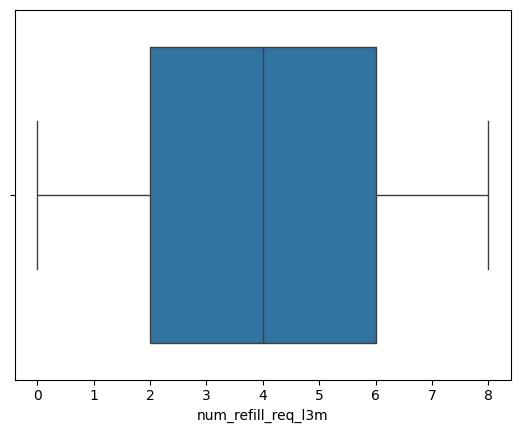

Description of transport_issue_l1y
----------------------------------------------------------------------------
count    29696.000000
mean         0.770946
std          1.196616
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: transport_issue_l1y, dtype: float64 Distribution of transport_issue_l1y
----------------------------------------------------------------------------
BoxPlot of transport_issue_l1y
----------------------------------------------------------------------------


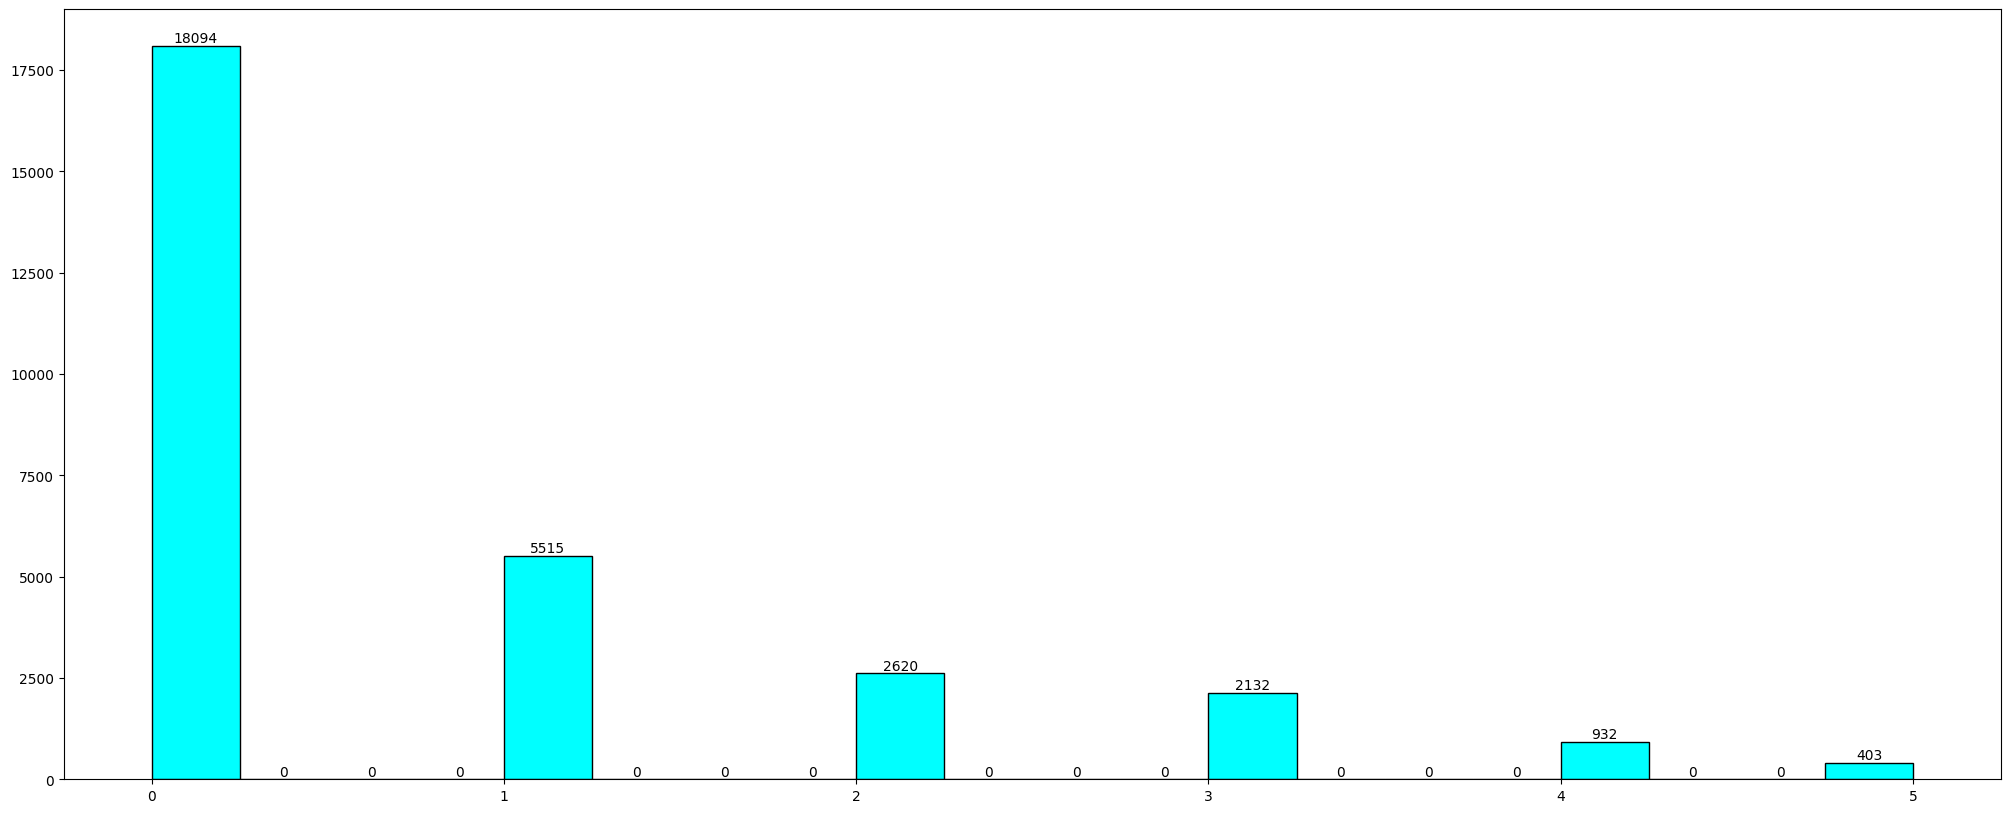

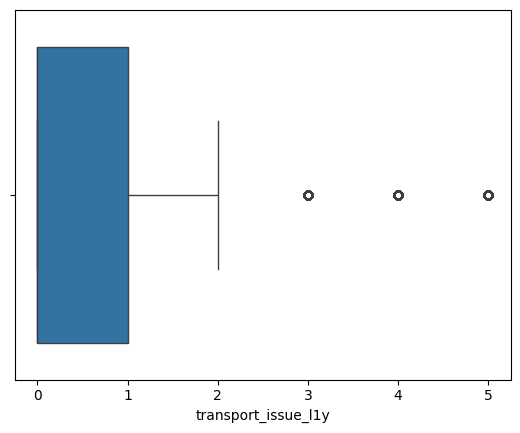

Description of Competitor_in_mkt
----------------------------------------------------------------------------
count    29696.000000
mean         3.105671
std          1.139952
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         12.000000
Name: Competitor_in_mkt, dtype: float64 Distribution of Competitor_in_mkt
----------------------------------------------------------------------------
BoxPlot of Competitor_in_mkt
----------------------------------------------------------------------------


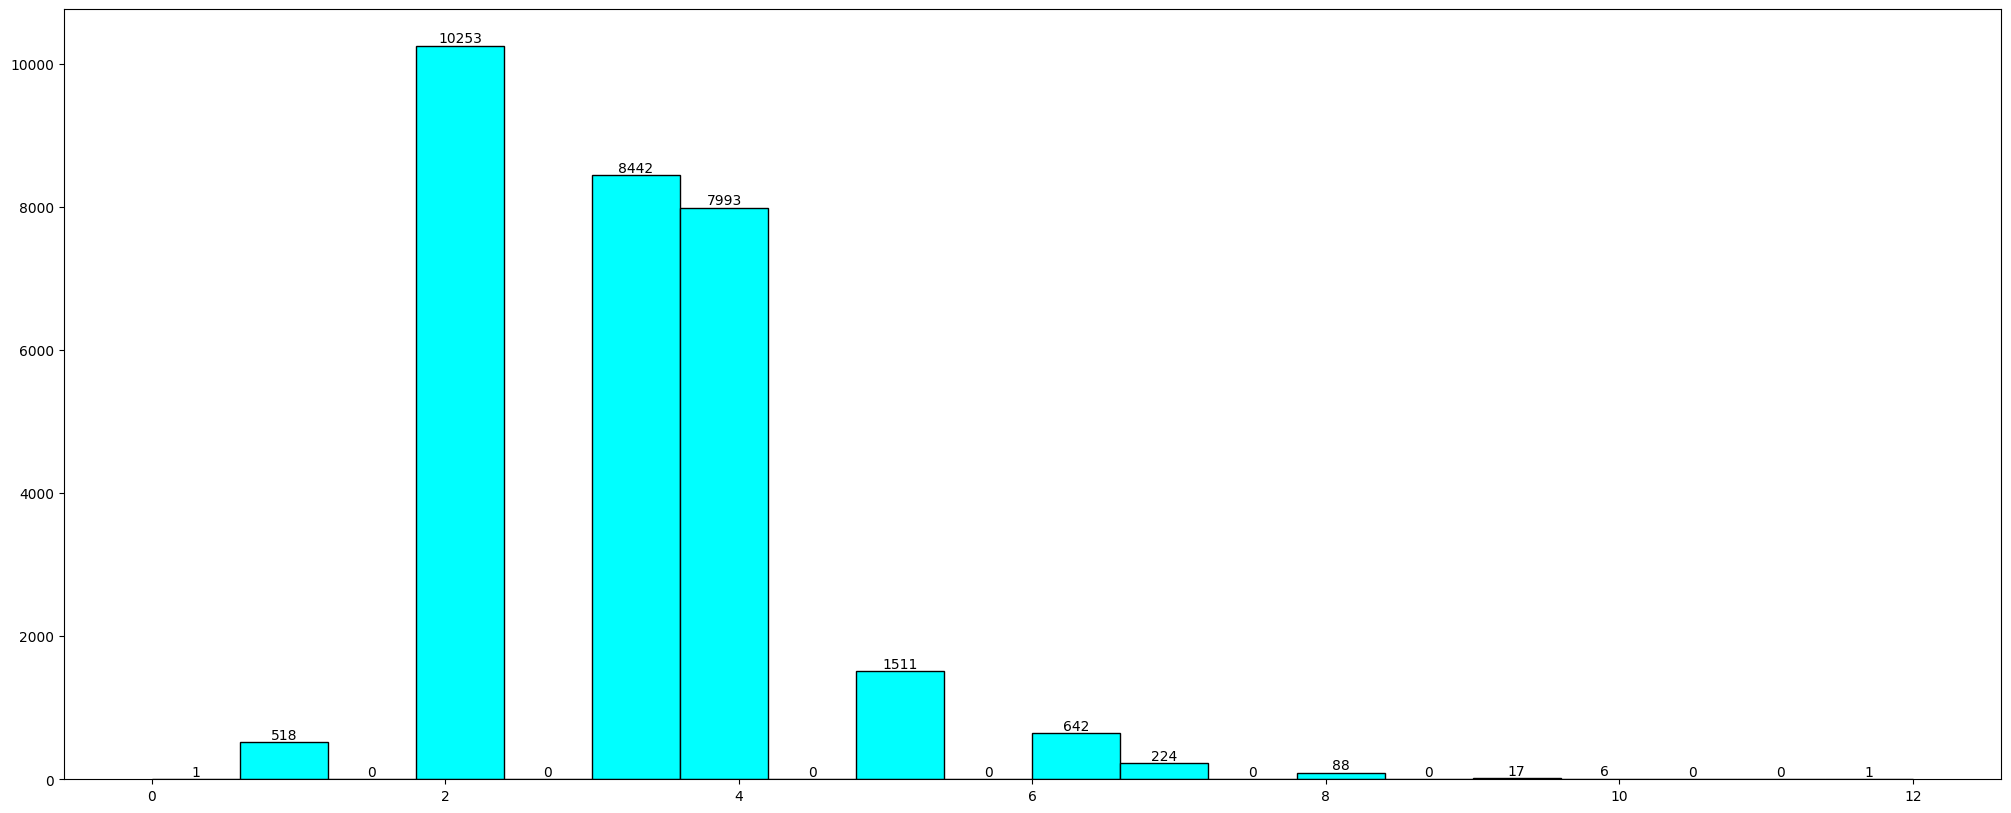

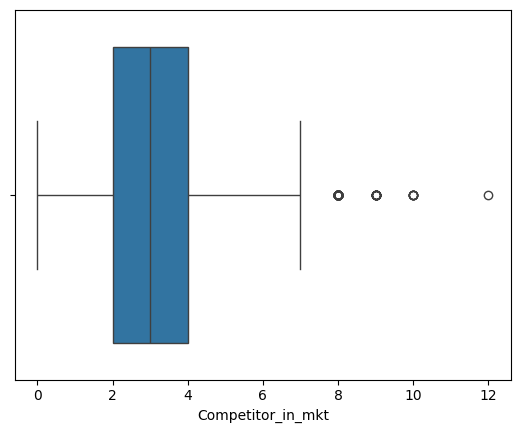

Description of retail_shop_num
----------------------------------------------------------------------------
count    29696.000000
mean      4988.217066
std       1055.364357
min       1821.000000
25%       4314.000000
50%       4860.000000
75%       5503.000000
max      11008.000000
Name: retail_shop_num, dtype: float64 Distribution of retail_shop_num
----------------------------------------------------------------------------
BoxPlot of retail_shop_num
----------------------------------------------------------------------------


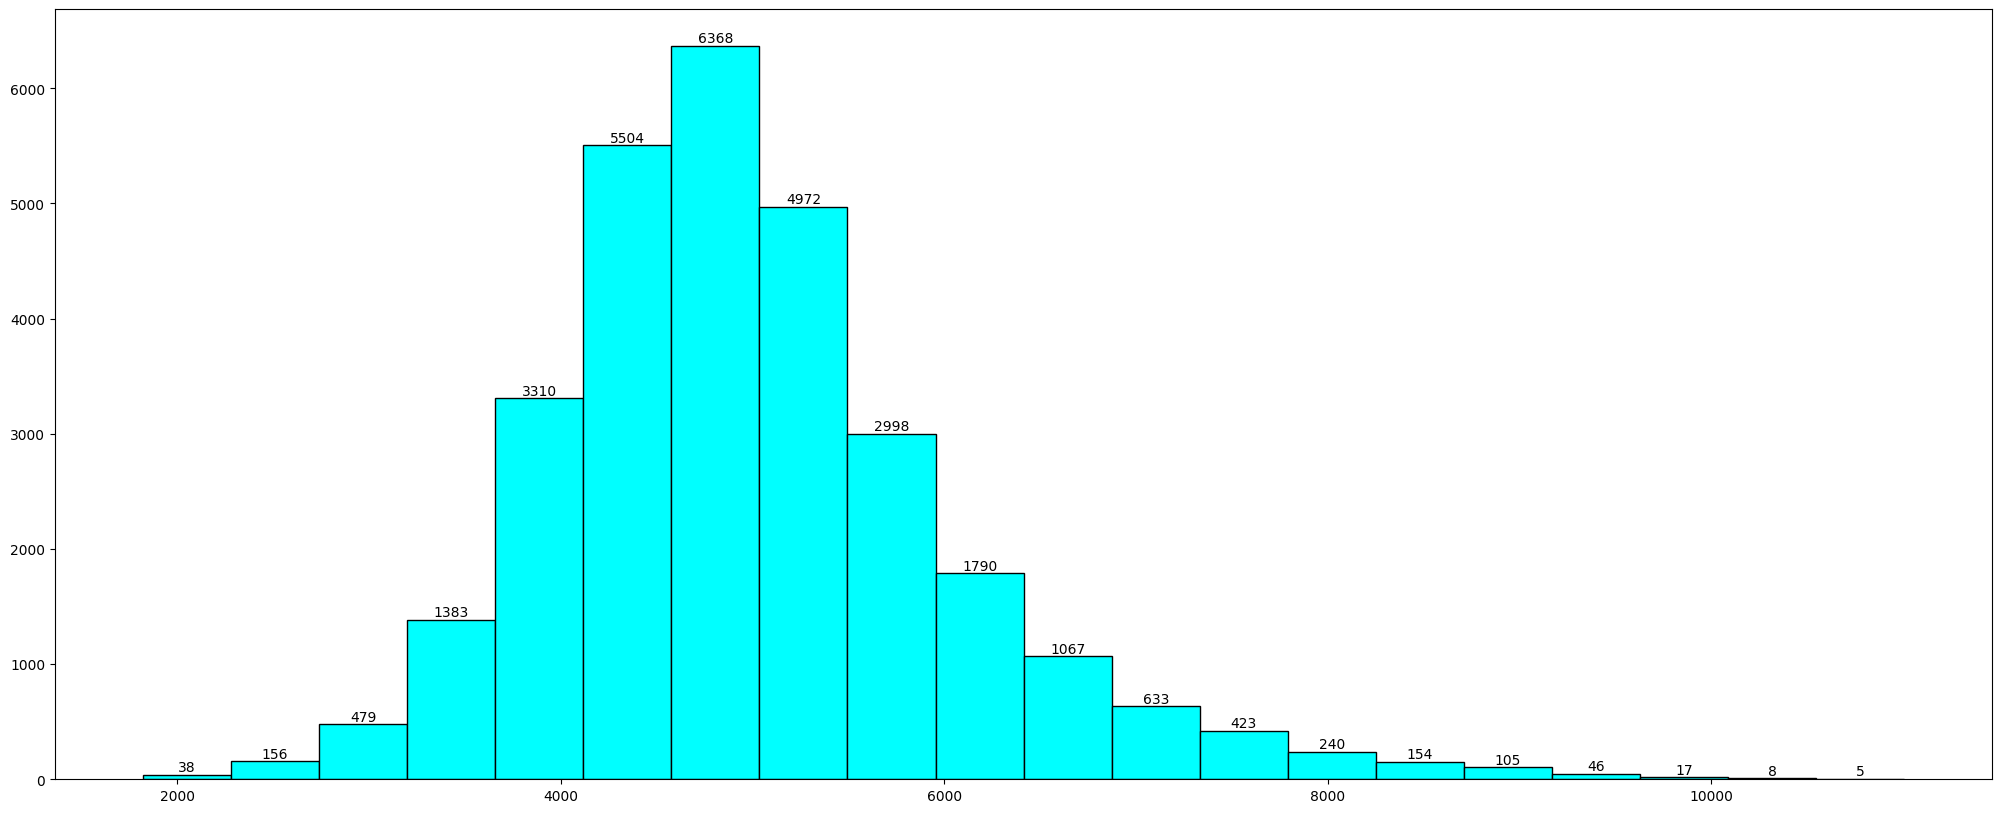

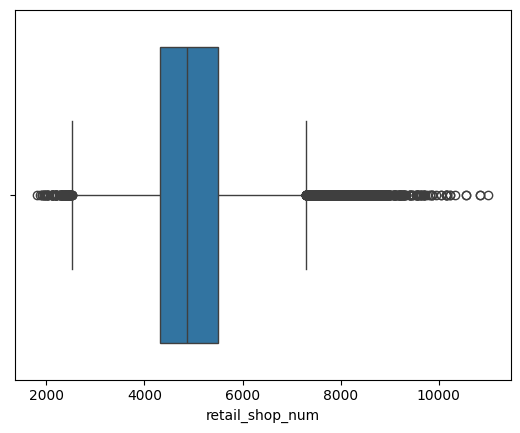

Description of distributor_num
----------------------------------------------------------------------------
count    29696.000000
mean        42.417026
std         16.059973
min         15.000000
25%         29.000000
50%         42.000000
75%         56.000000
max         70.000000
Name: distributor_num, dtype: float64 Distribution of distributor_num
----------------------------------------------------------------------------
BoxPlot of distributor_num
----------------------------------------------------------------------------


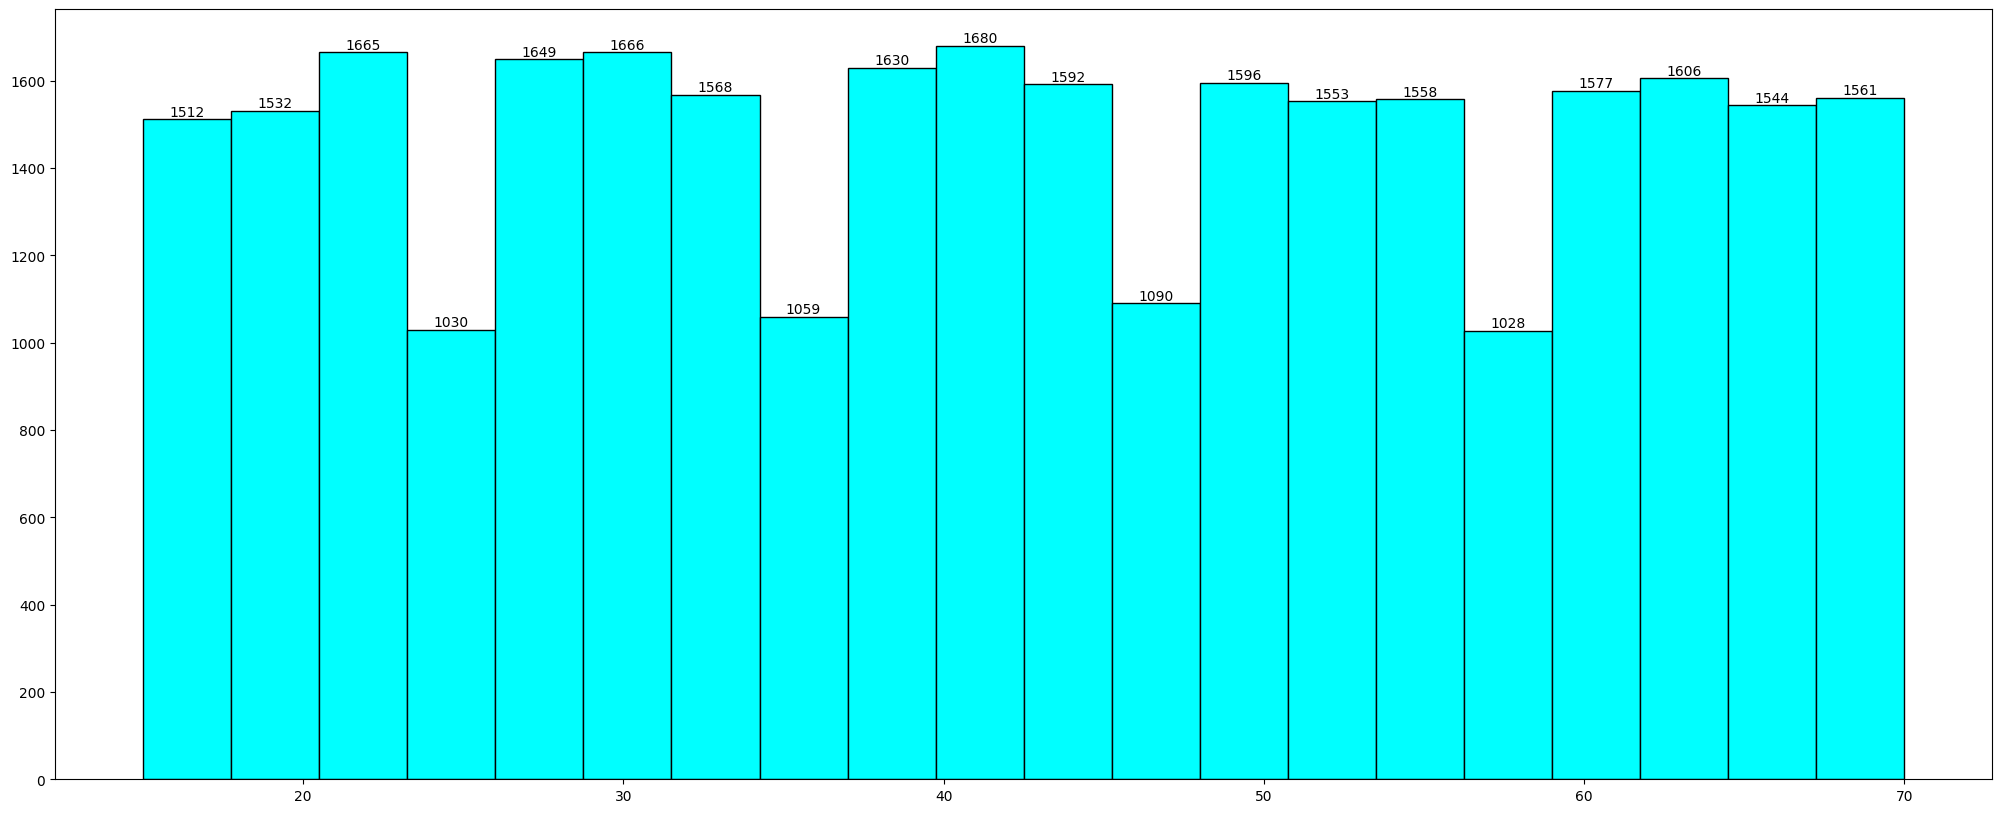

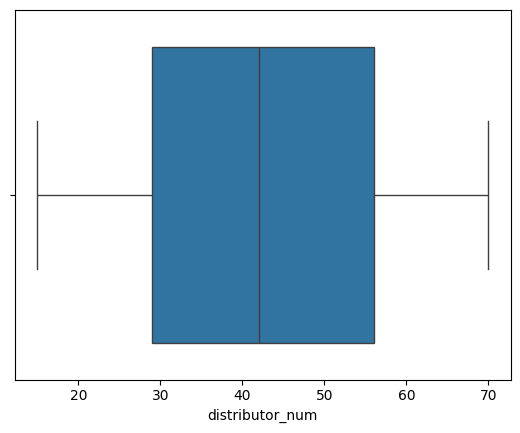

Description of dist_from_hub
----------------------------------------------------------------------------
count    29696.000000
mean       163.395878
std         62.823078
min         55.000000
25%        109.000000
50%        164.000000
75%        218.000000
max        271.000000
Name: dist_from_hub, dtype: float64 Distribution of dist_from_hub
----------------------------------------------------------------------------
BoxPlot of dist_from_hub
----------------------------------------------------------------------------


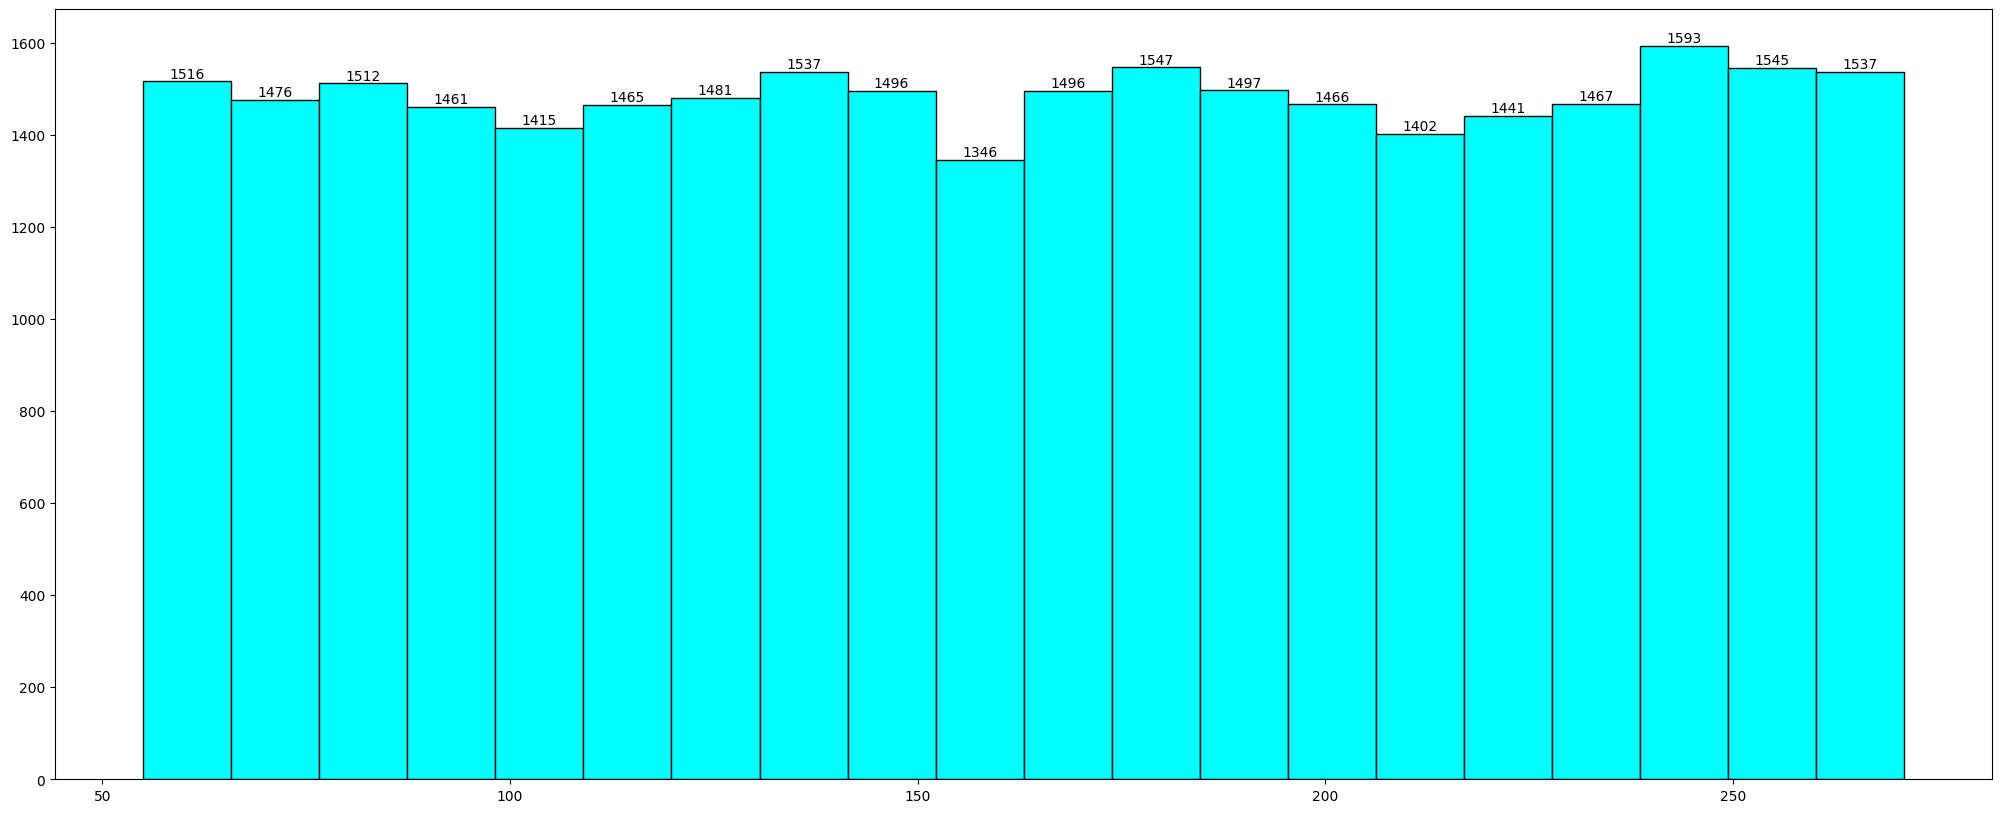

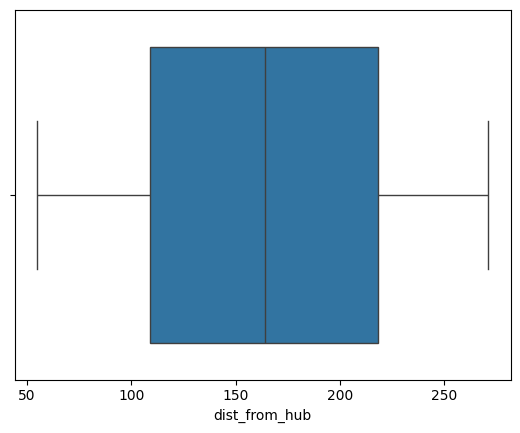

Description of workers_num
----------------------------------------------------------------------------
count    28522.000000
mean        28.956490
std          7.893929
min         10.000000
25%         24.000000
50%         28.000000
75%         33.000000
max         98.000000
Name: workers_num, dtype: float64 Distribution of workers_num
----------------------------------------------------------------------------
BoxPlot of workers_num
----------------------------------------------------------------------------


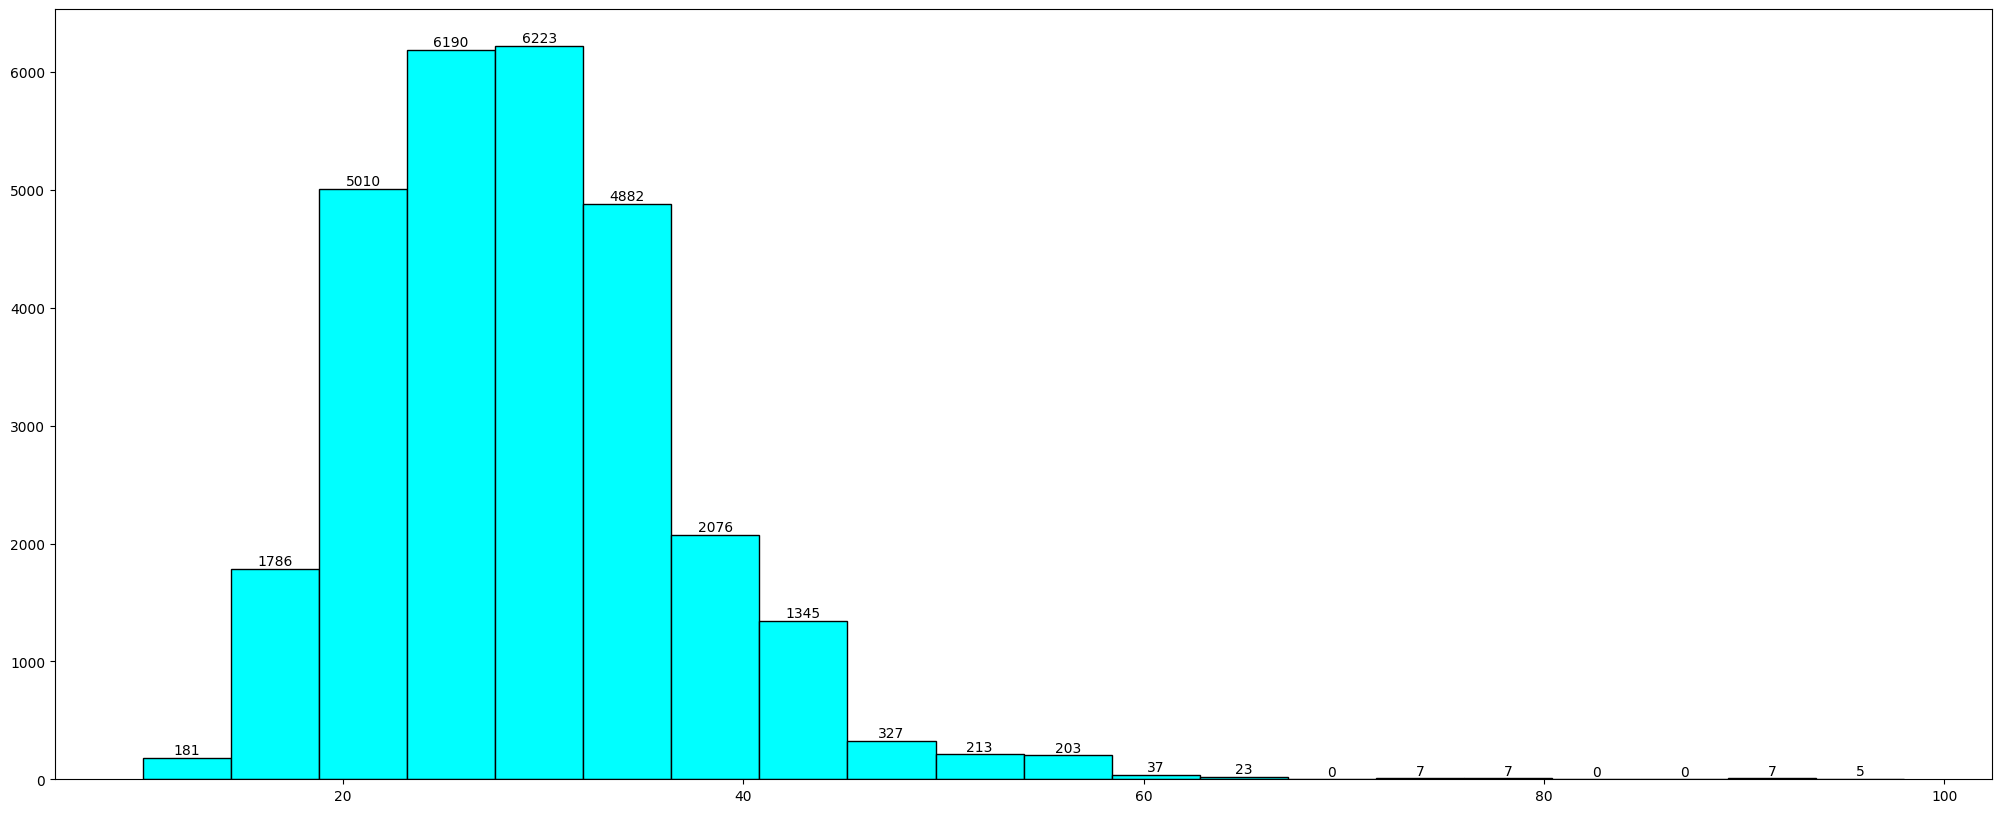

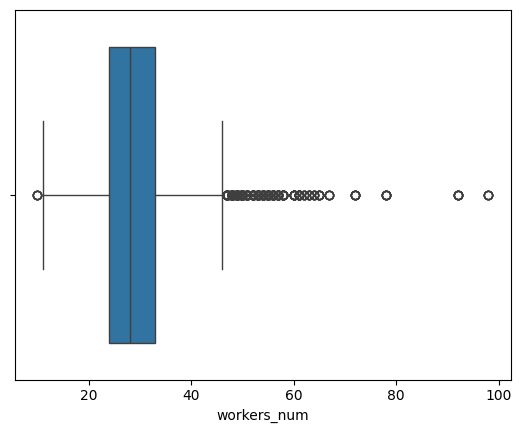

Description of wh_est_year
----------------------------------------------------------------------------
count    15589.000000
mean      2009.369363
std          7.518343
min       1996.000000
25%       2003.000000
50%       2009.000000
75%       2016.000000
max       2023.000000
Name: wh_est_year, dtype: float64 Distribution of wh_est_year
----------------------------------------------------------------------------
BoxPlot of wh_est_year
----------------------------------------------------------------------------


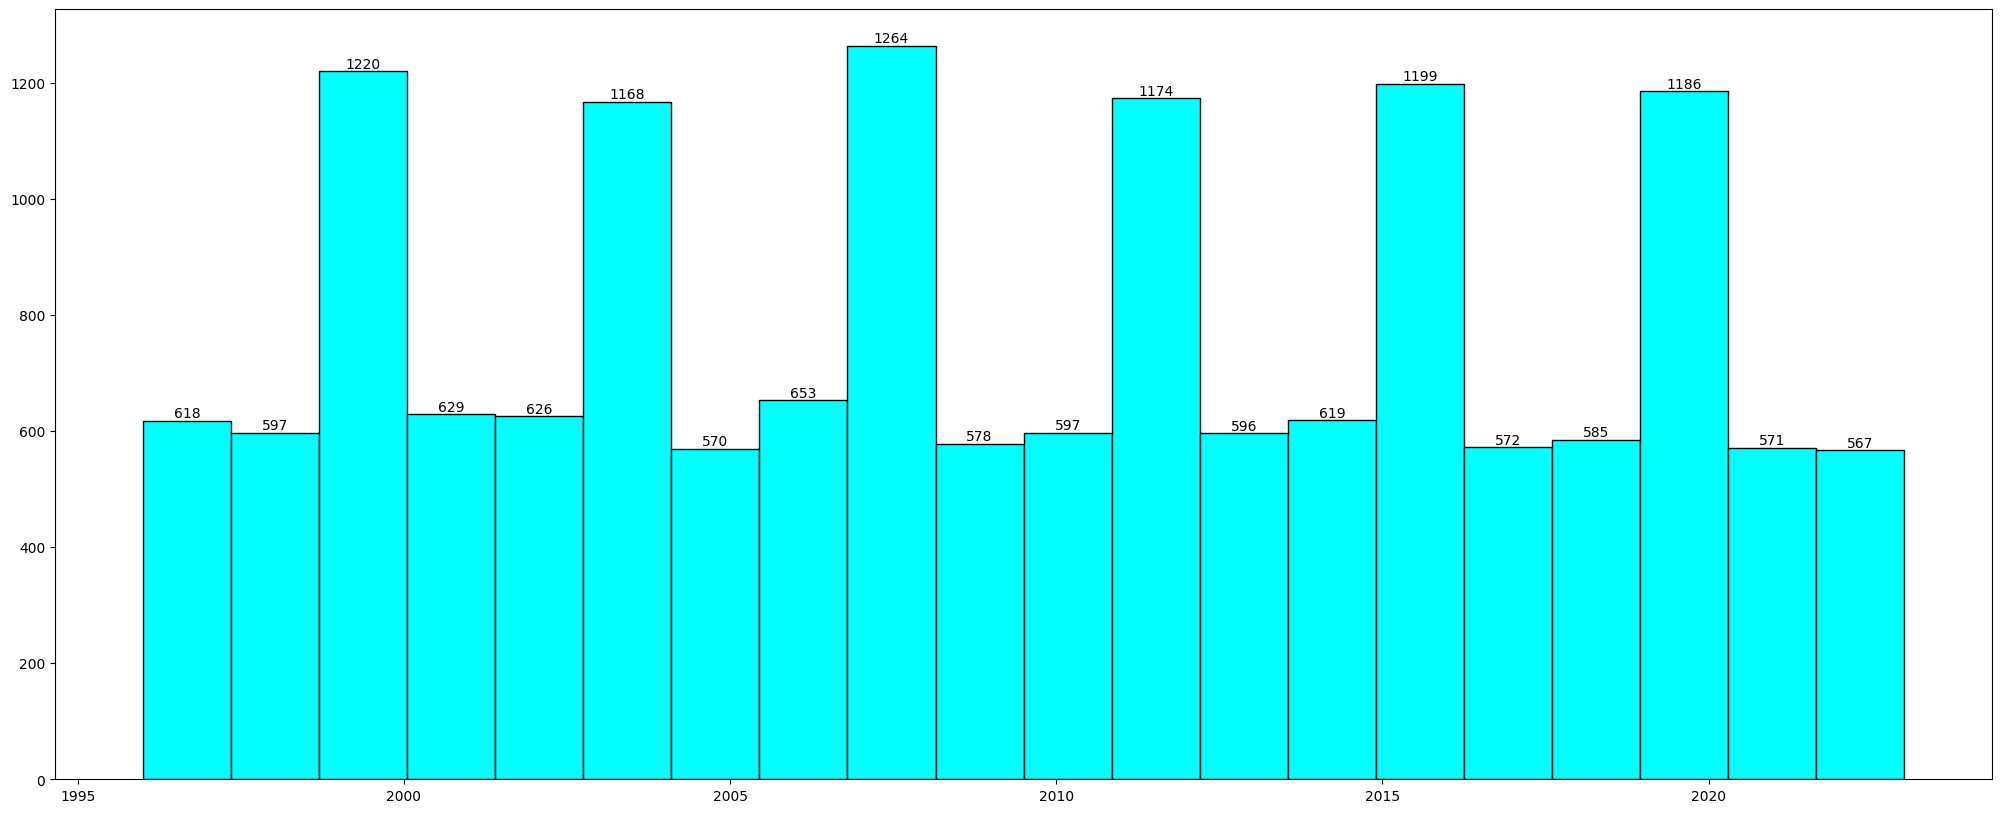

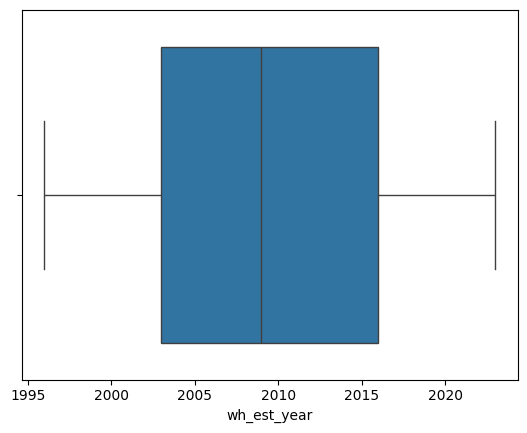

Description of storage_issue_reported_l3m
----------------------------------------------------------------------------
count    29696.000000
mean        17.137258
std          9.152548
min          0.000000
25%         10.000000
50%         18.000000
75%         24.000000
max         39.000000
Name: storage_issue_reported_l3m, dtype: float64 Distribution of storage_issue_reported_l3m
----------------------------------------------------------------------------
BoxPlot of storage_issue_reported_l3m
----------------------------------------------------------------------------


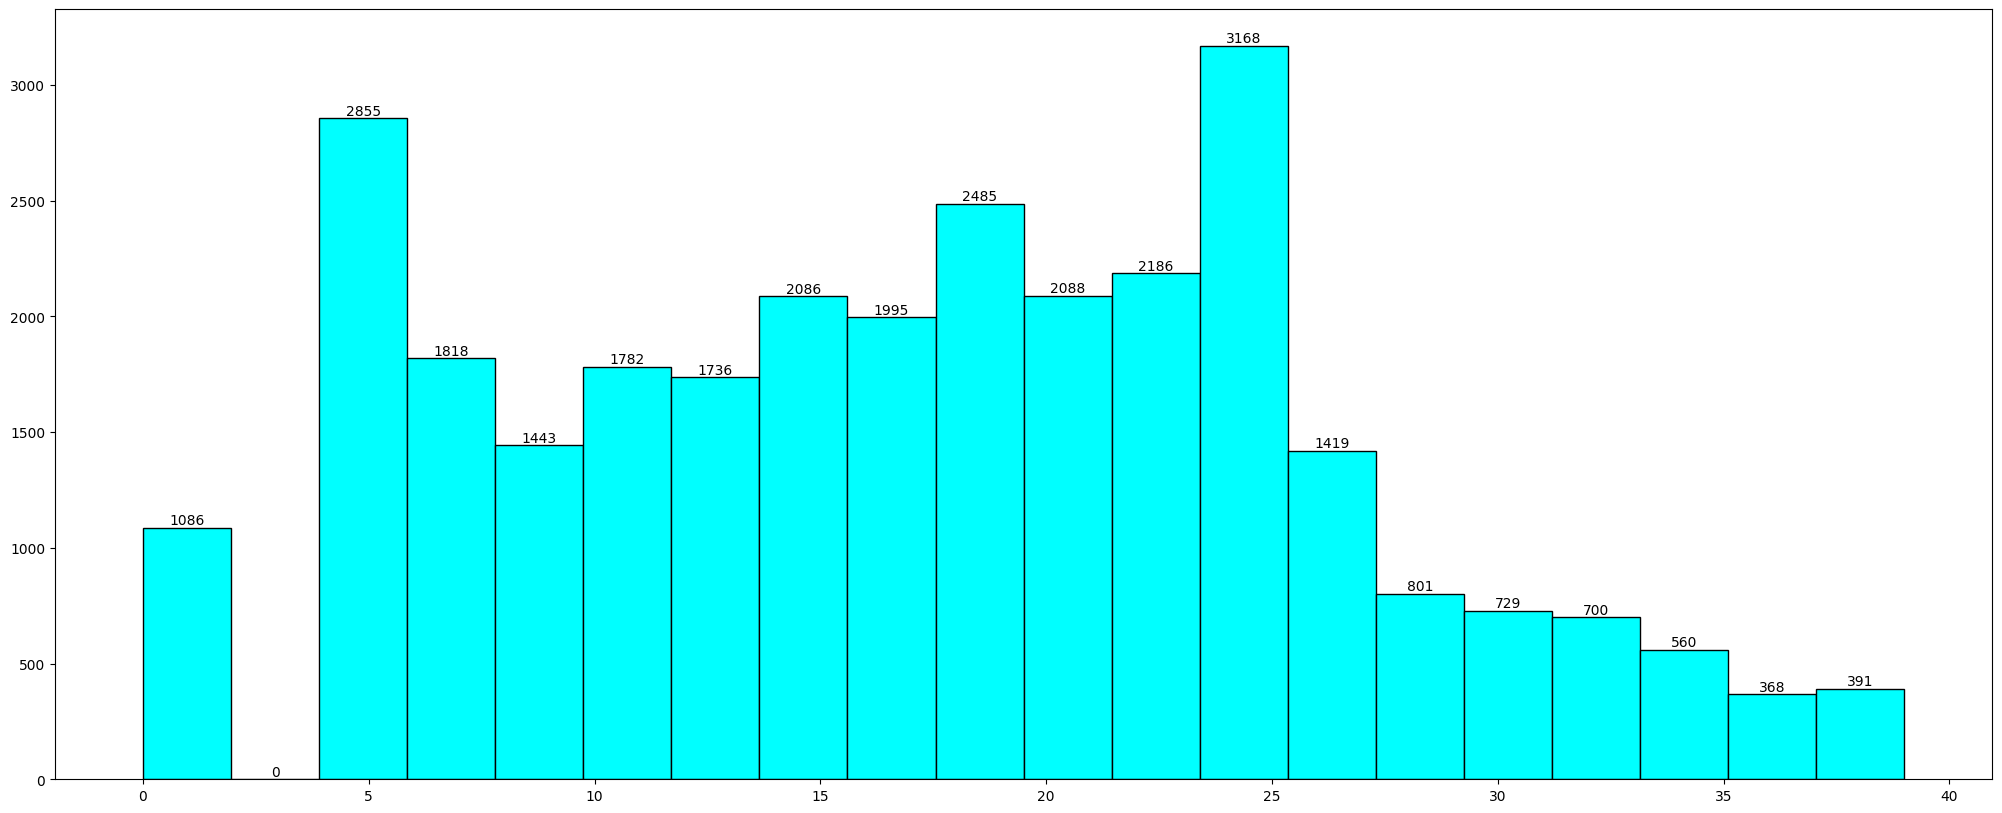

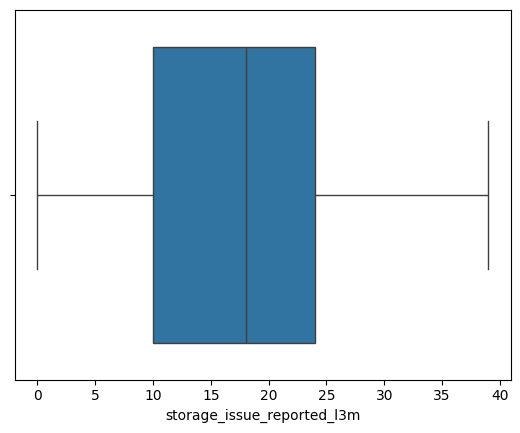

Description of wh_breakdown_l3m
----------------------------------------------------------------------------
count    29696.000000
mean         3.476428
std          1.689956
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: wh_breakdown_l3m, dtype: float64 Distribution of wh_breakdown_l3m
----------------------------------------------------------------------------
BoxPlot of wh_breakdown_l3m
----------------------------------------------------------------------------


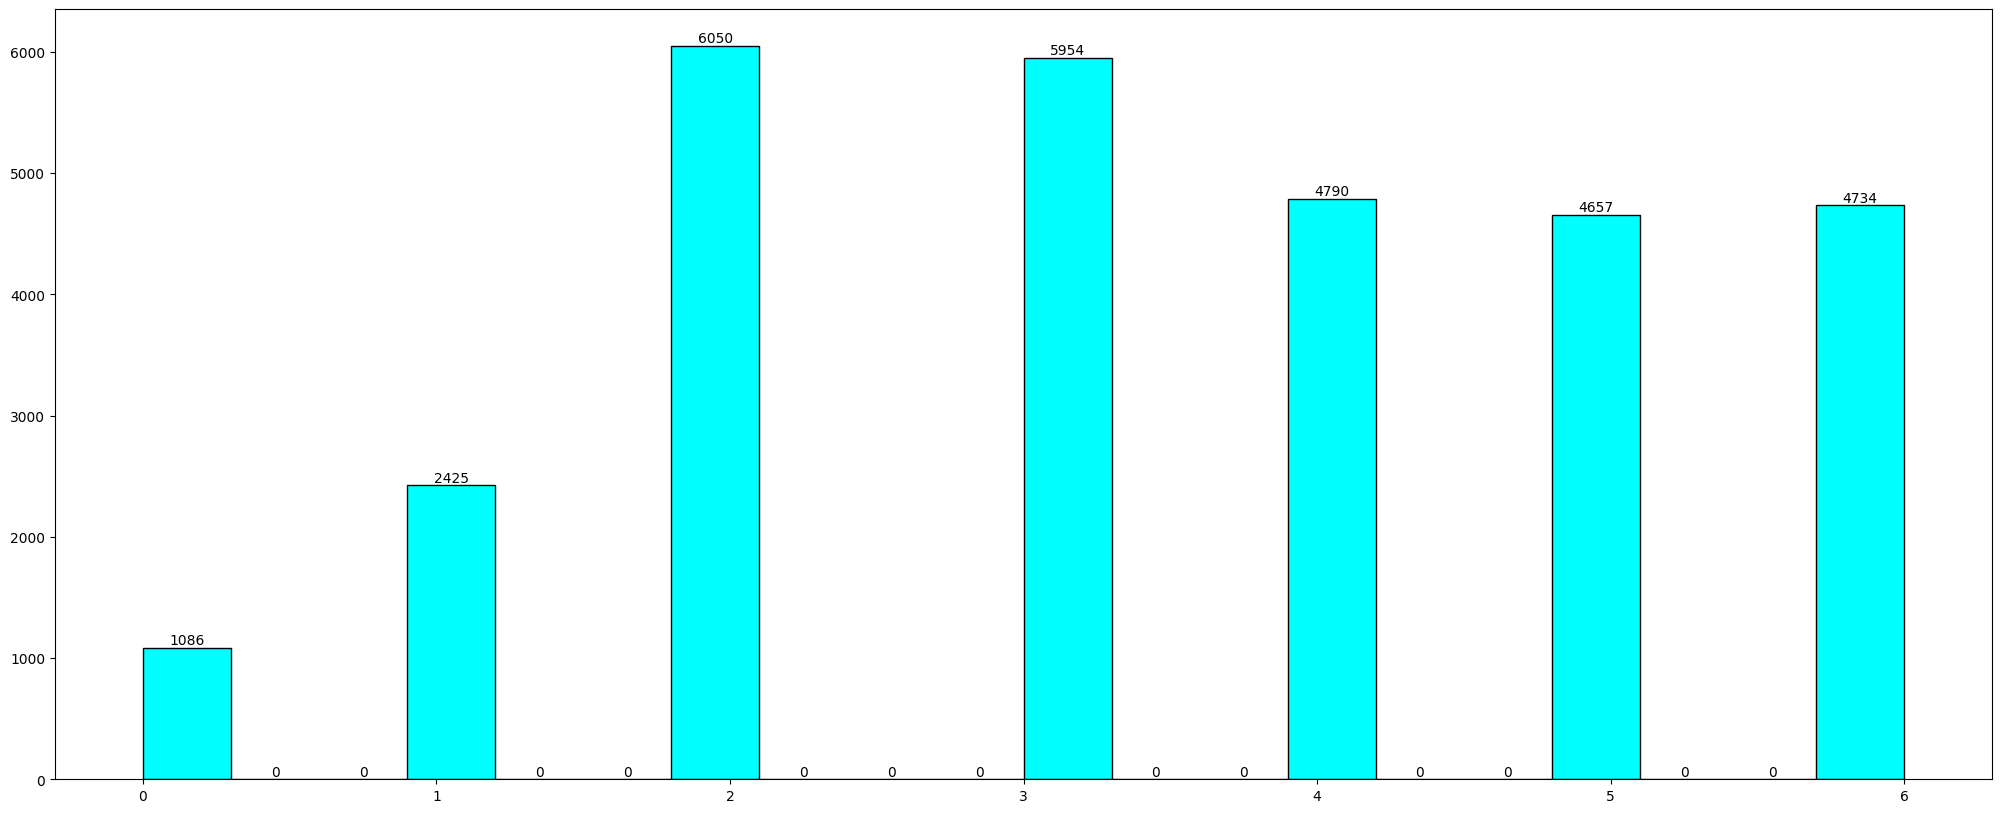

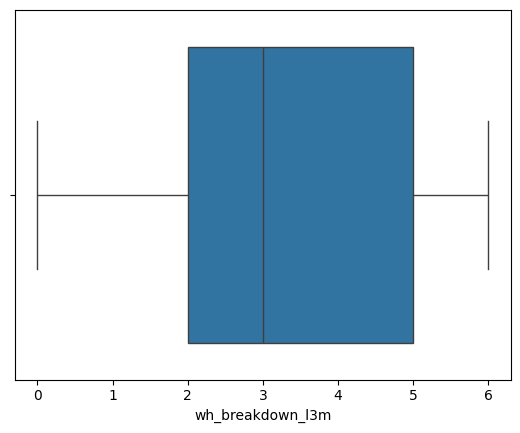

Description of govt_check_l3m
----------------------------------------------------------------------------
count    29696.000000
mean        18.854425
std          8.630730
min          1.000000
25%         11.000000
50%         21.000000
75%         26.000000
max         32.000000
Name: govt_check_l3m, dtype: float64 Distribution of govt_check_l3m
----------------------------------------------------------------------------
BoxPlot of govt_check_l3m
----------------------------------------------------------------------------


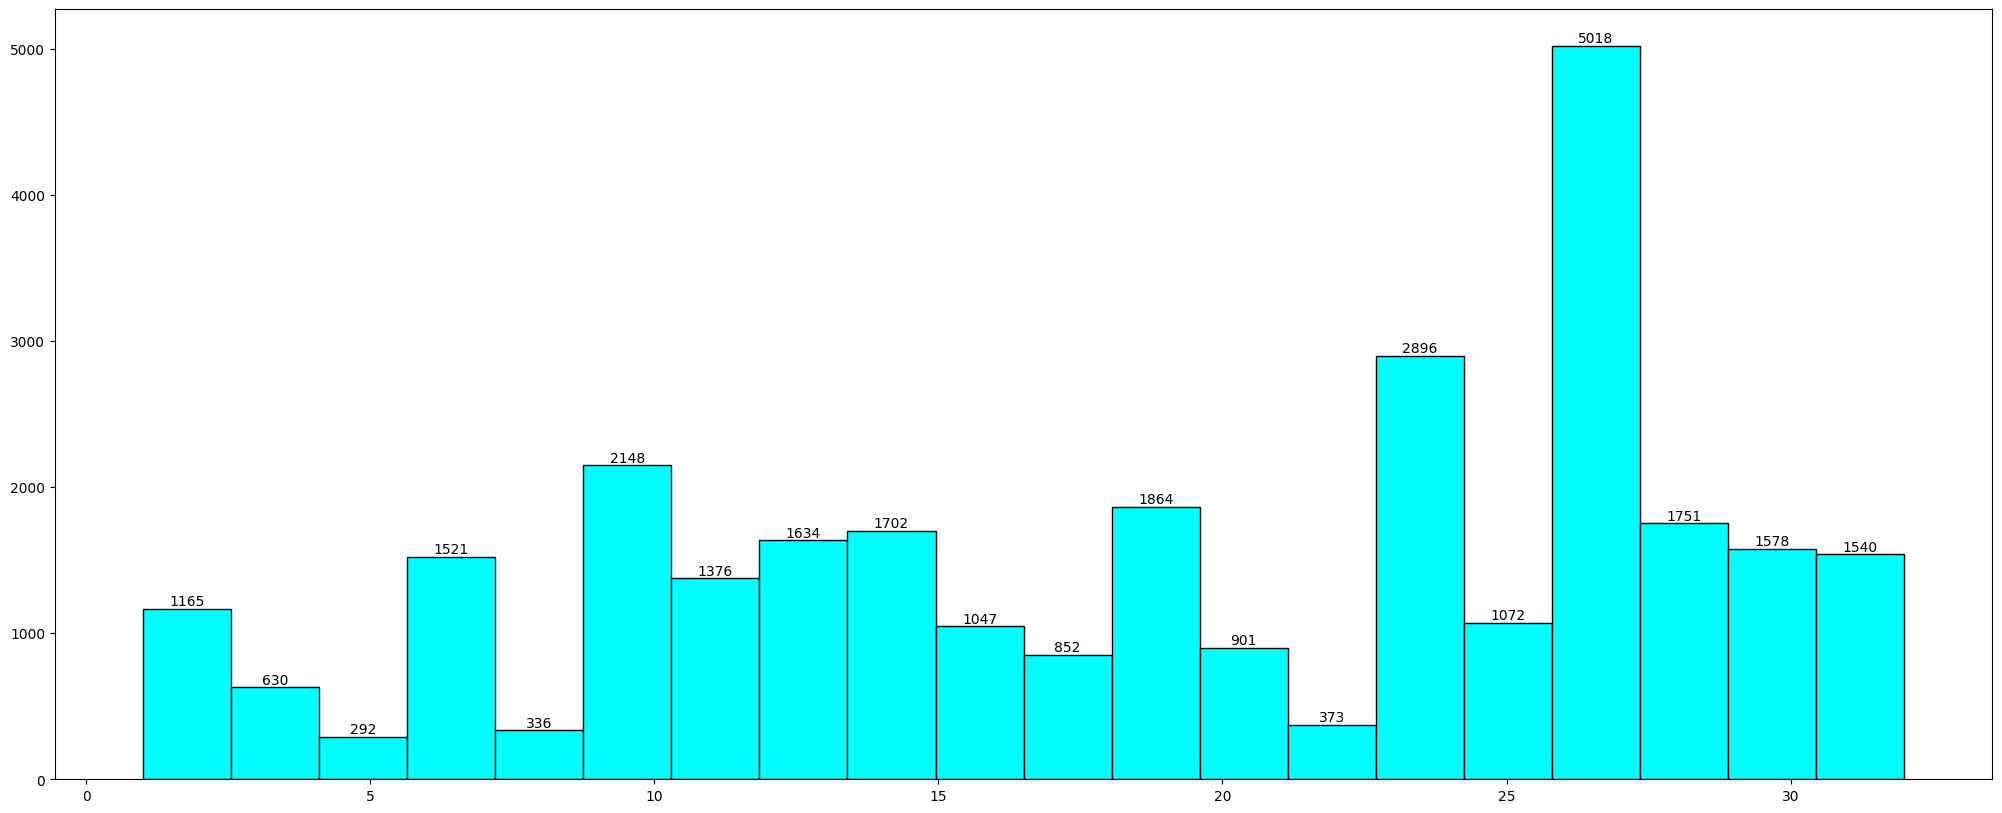

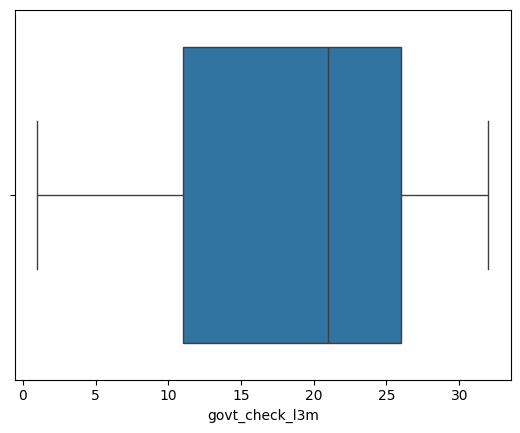

Description of product_wg_ton
----------------------------------------------------------------------------
count    29696.000000
mean     22113.392342
std      11593.968356
min       2065.000000
25%      13063.000000
50%      22104.000000
75%      30102.000000
max      55151.000000
Name: product_wg_ton, dtype: float64 Distribution of product_wg_ton
----------------------------------------------------------------------------
BoxPlot of product_wg_ton
----------------------------------------------------------------------------


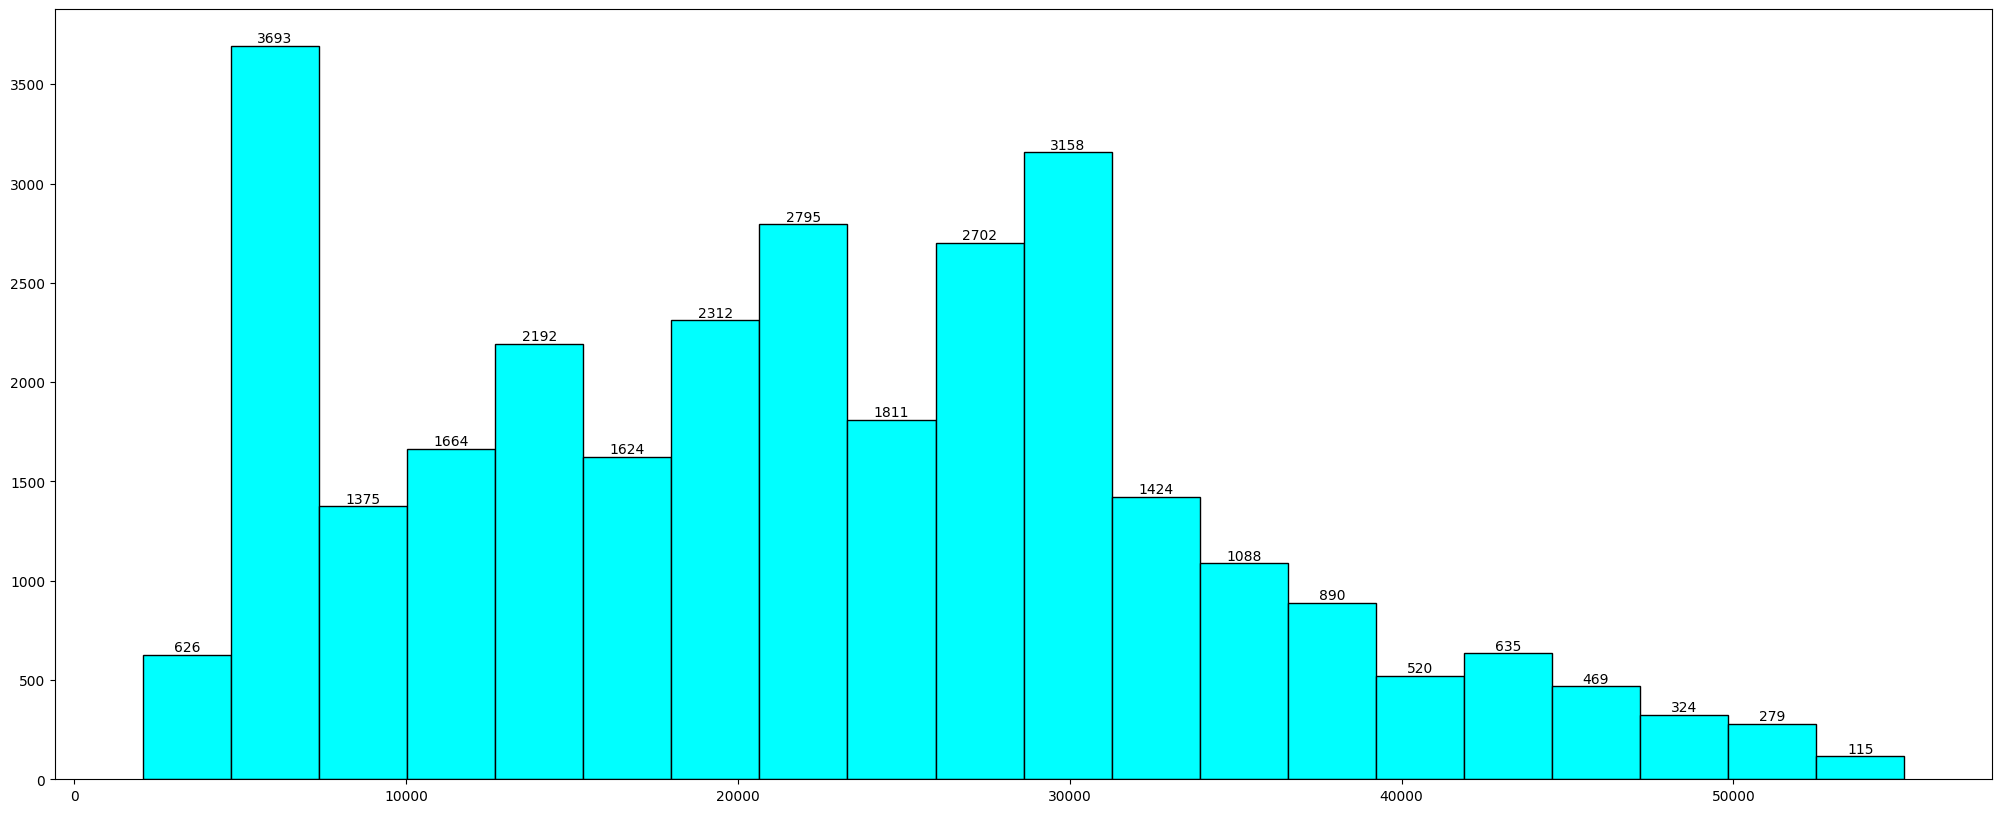

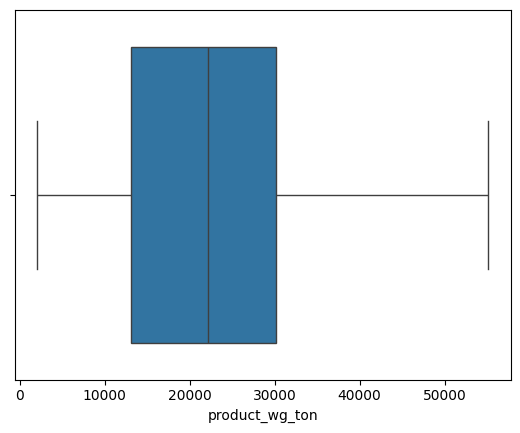

In [12]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

Inspecting categorical columns

In [13]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(cat[cat_column].value_counts())

    plt.figure(figsize=(12, 8))

    # Plotting with light blue color
    plots = cat[cat_column].value_counts().plot.bar(
        title="Frequency Distribution of " + cat_column,
        color='lightblue'
    )

    # Adding annotations on bars
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=15, xytext=(0, 8),
                       textcoords='offset points')

    plt.show()
    print("       ")

In [14]:
df.drop(['Ware_house_ID', 'WH_Manager_ID'], axis = 1, inplace = True)

In [15]:
cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(cat.columns.values)
lstcatcolumns

['Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'wh_owner_type',
 'flood_impacted',
 'flood_proof',
 'electric_supply',
 'temp_reg_mach',
 'approved_wh_govt_certificate']

In [16]:
for column in cat.columns:
    unique_values = cat[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'Location_type':
['Urban' 'Rural']
Unique values in 'WH_capacity_size':
['Small' 'Large' 'Mid']
Unique values in 'zone':
['West' 'North' 'South' 'East']
Unique values in 'WH_regional_zone':
['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']
Unique values in 'wh_owner_type':
['Rented' 'Company Owned']
Unique values in 'flood_impacted':
[0 1]
Unique values in 'flood_proof':
[1 0]
Unique values in 'electric_supply':
[1 0]
Unique values in 'temp_reg_mach':
[0 1]
Unique values in 'approved_wh_govt_certificate':
['A' 'A+' 'C' 'B' 'B+' nan]


In [17]:
cat.head()

Location_type WH_capacity_size   zone WH_regional_zone  wh_owner_type  \
0         Urban            Small   West           Zone 6         Rented   
1         Rural            Large  North           Zone 5  Company Owned   
2         Rural              Mid  South           Zone 2  Company Owned   
3         Rural              Mid  North           Zone 3         Rented   
4         Rural            Large  North           Zone 5  Company Owned   

  flood_impacted flood_proof electric_supply temp_reg_mach  \
0              0           1               1             0   
1              0           0               1             0   
2              0           0               0             0   
3              0           0               0             1   
4              1           0               1             0   

  approved_wh_govt_certificate  
0                            A  
1                            A  
2                            A  
3                           A+  
4                            C

Details of Location_type
----------------------------------------------------------------
Location_type
Rural    27274
Urban     2422
Name: count, dtype: int64


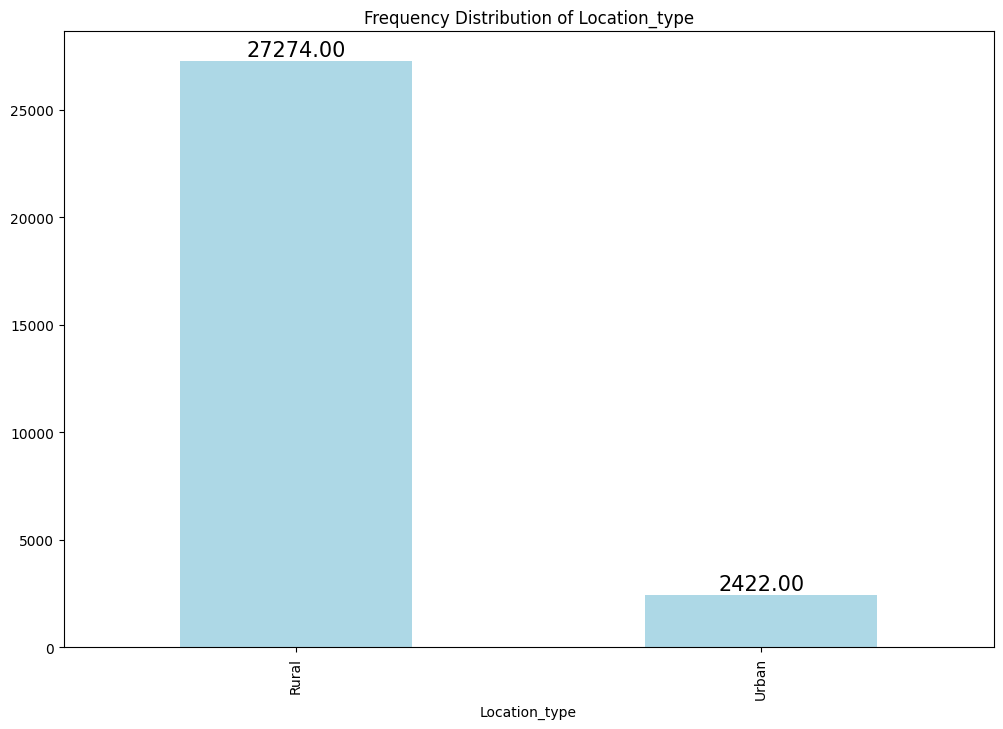

       
Details of WH_capacity_size
----------------------------------------------------------------
WH_capacity_size
Large    12095
Mid      11894
Small     5707
Name: count, dtype: int64


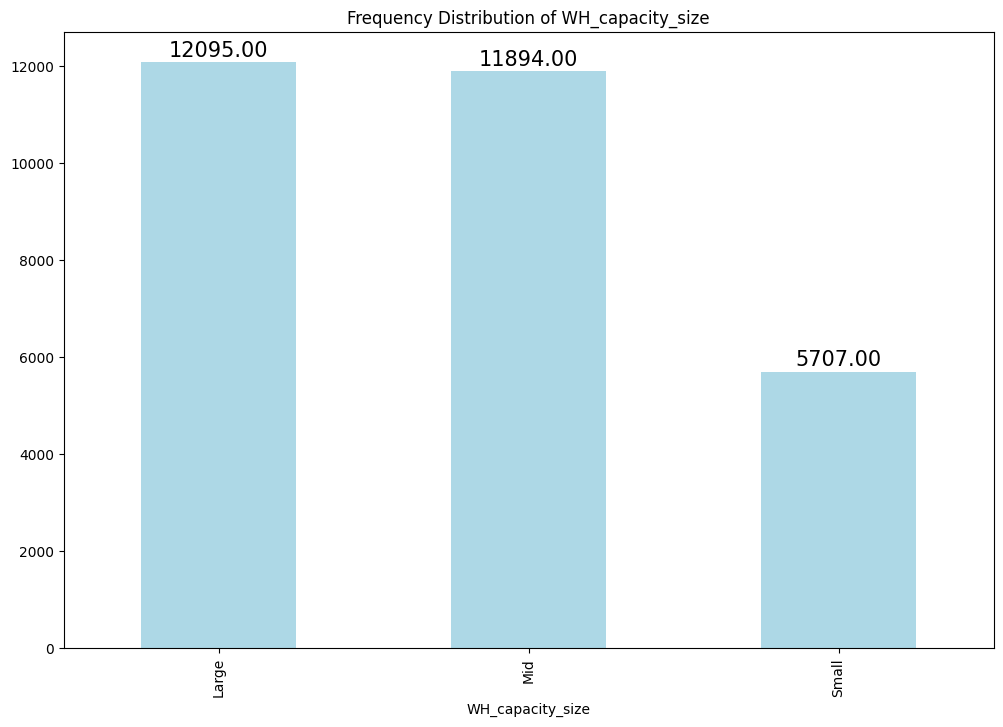

       
Details of zone
----------------------------------------------------------------
zone
North    12240
West      9383
South     7567
East       506
Name: count, dtype: int64


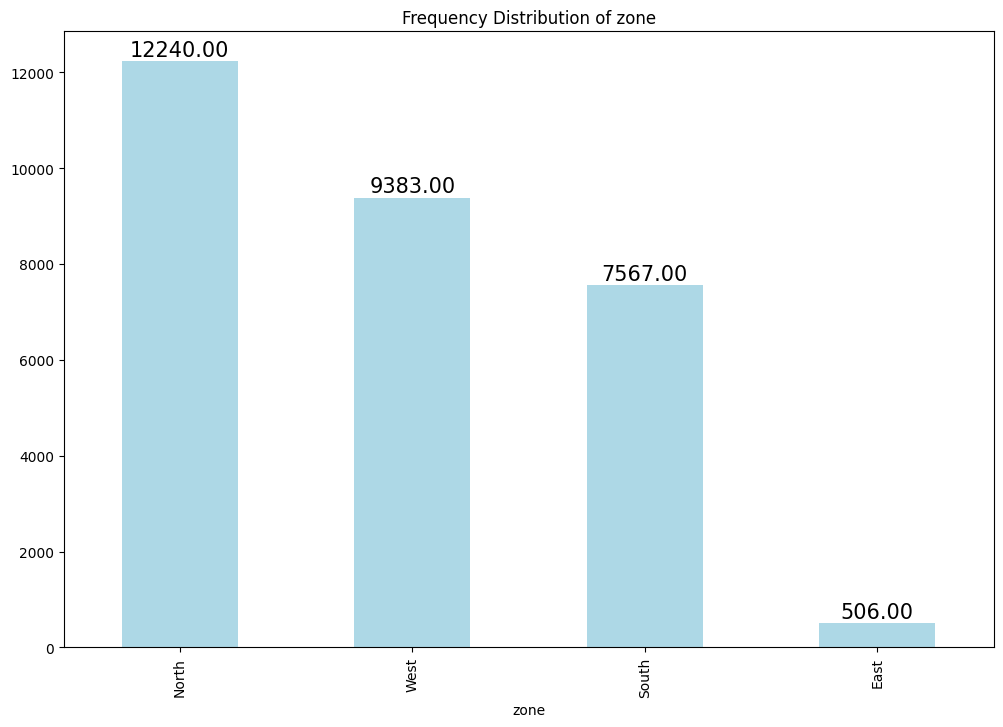

       
Details of WH_regional_zone
----------------------------------------------------------------
WH_regional_zone
Zone 6    9897
Zone 5    5461
Zone 4    4992
Zone 2    3507
Zone 3    3395
Zone 1    2444
Name: count, dtype: int64


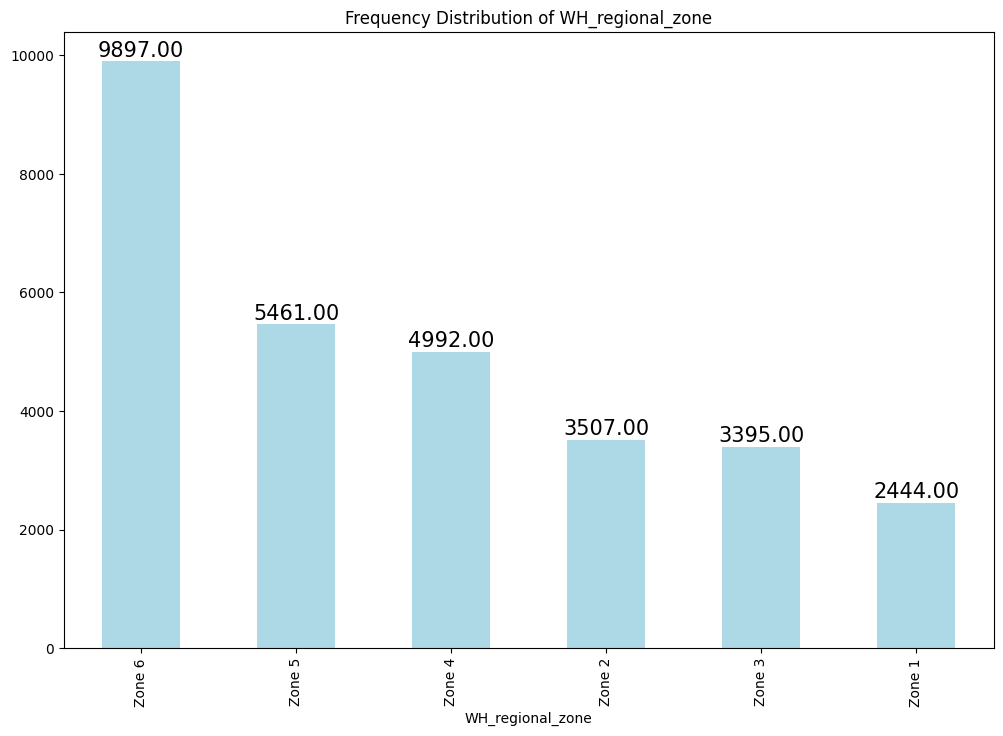

       
Details of wh_owner_type
----------------------------------------------------------------
wh_owner_type
Company Owned    16122
Rented           13574
Name: count, dtype: int64


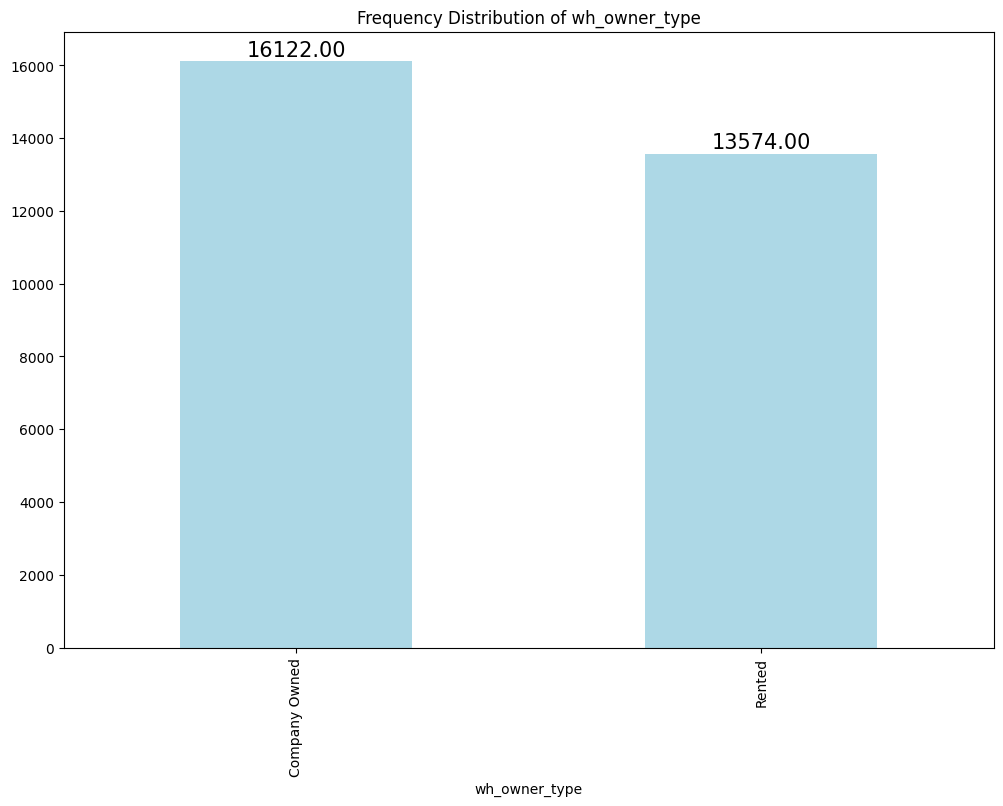

       
Details of flood_impacted
----------------------------------------------------------------
flood_impacted
0    26792
1     2904
Name: count, dtype: int64


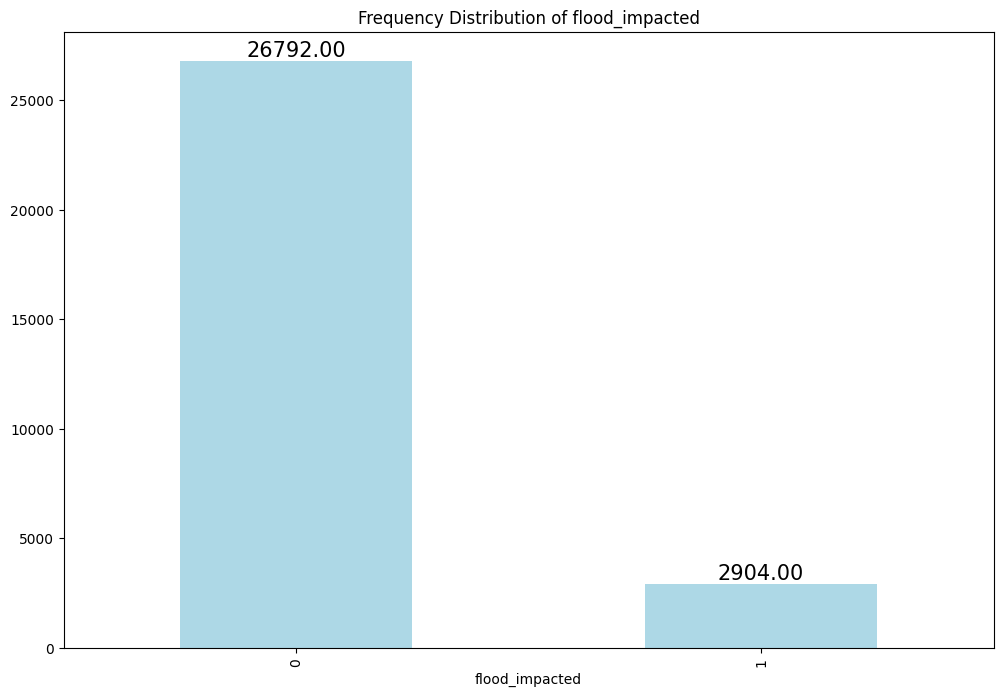

       
Details of flood_proof
----------------------------------------------------------------
flood_proof
0    28073
1     1623
Name: count, dtype: int64


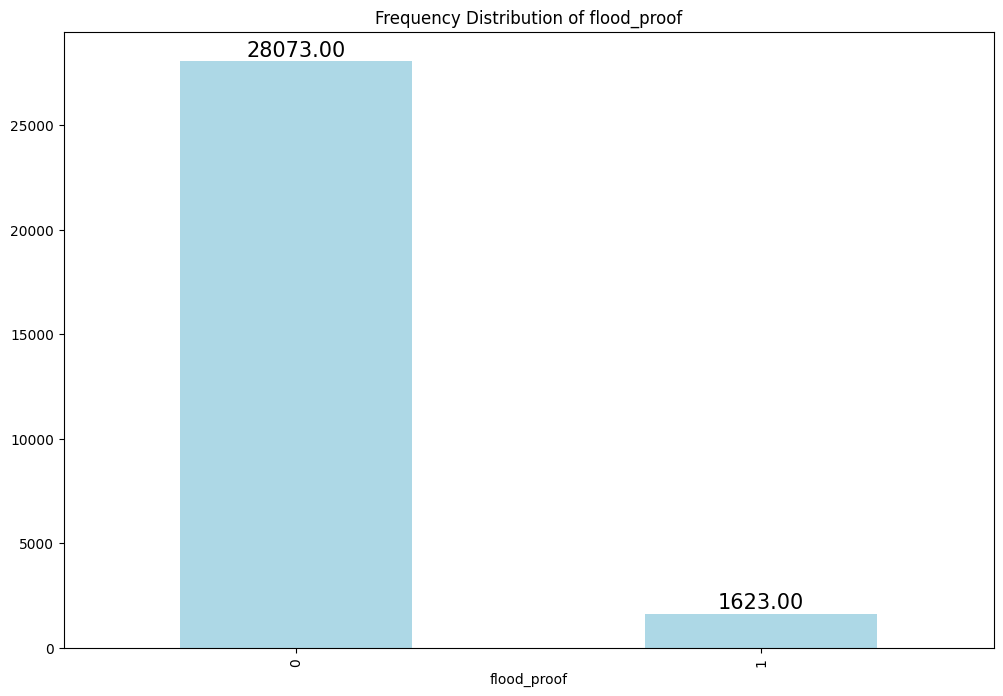

       
Details of electric_supply
----------------------------------------------------------------
electric_supply
1    19518
0    10178
Name: count, dtype: int64


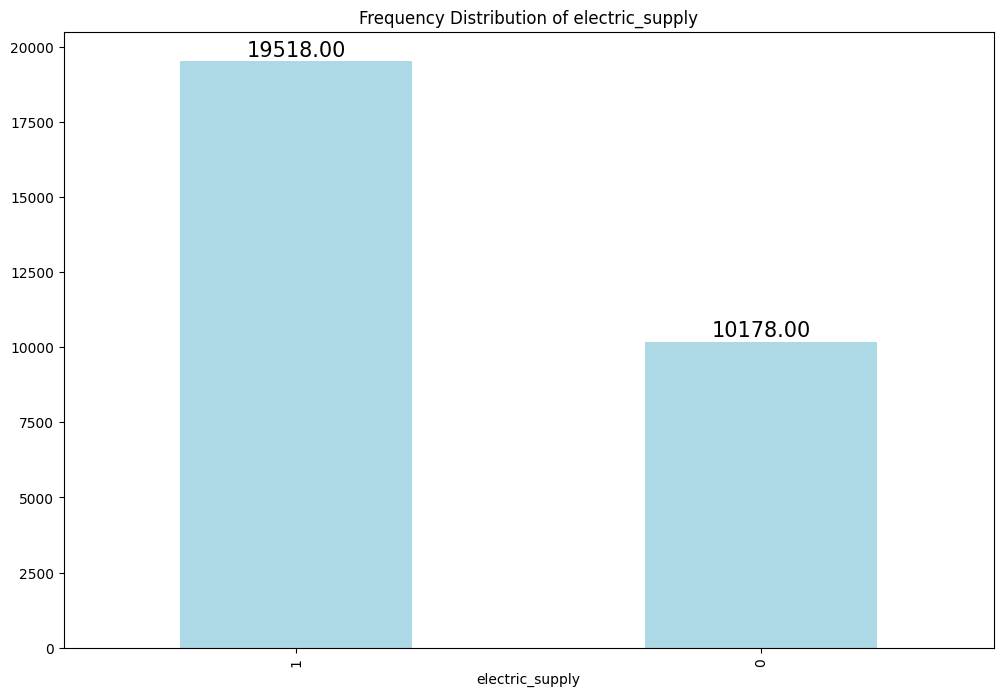

       
Details of temp_reg_mach
----------------------------------------------------------------
temp_reg_mach
0    20709
1     8987
Name: count, dtype: int64


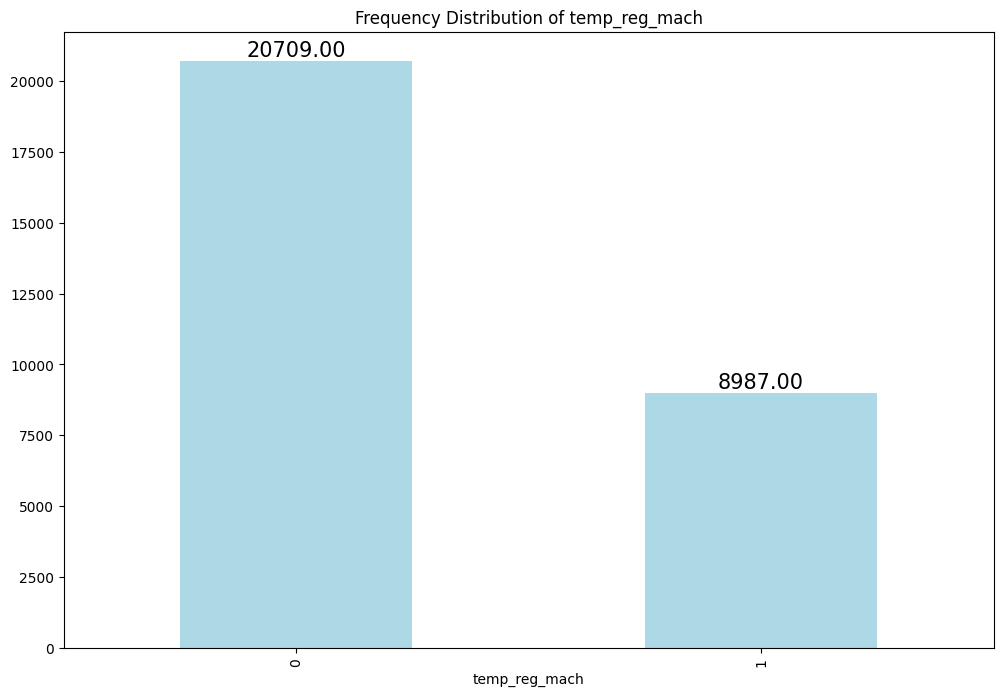

       
Details of approved_wh_govt_certificate
----------------------------------------------------------------
approved_wh_govt_certificate
C     6526
B+    5870
B     5693
A     5525
A+    4996
Name: count, dtype: int64


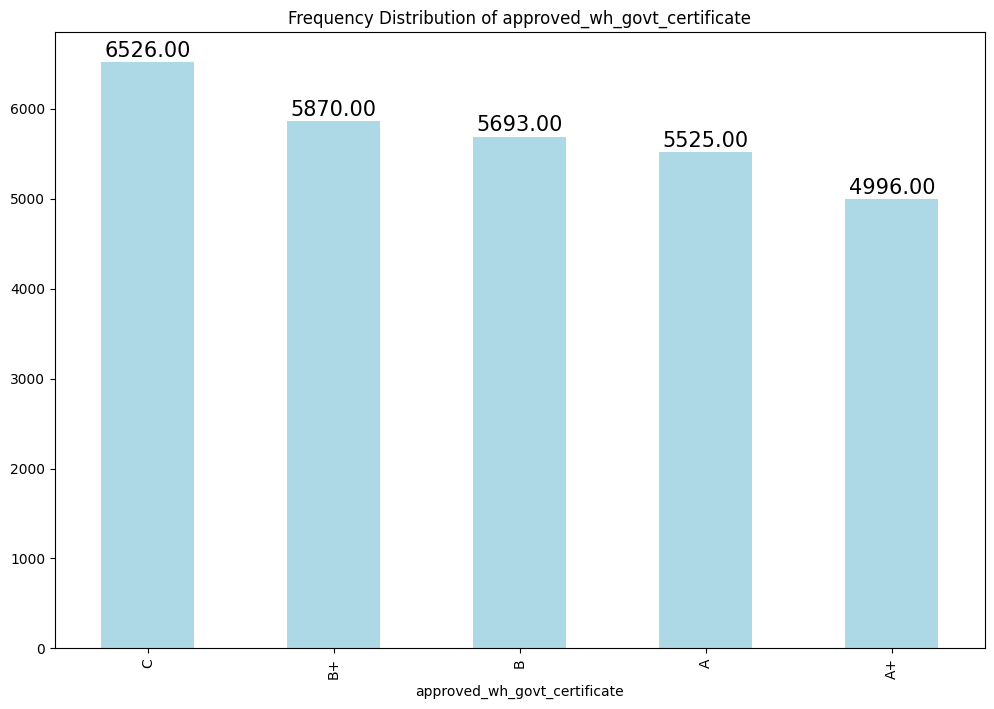

In [18]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

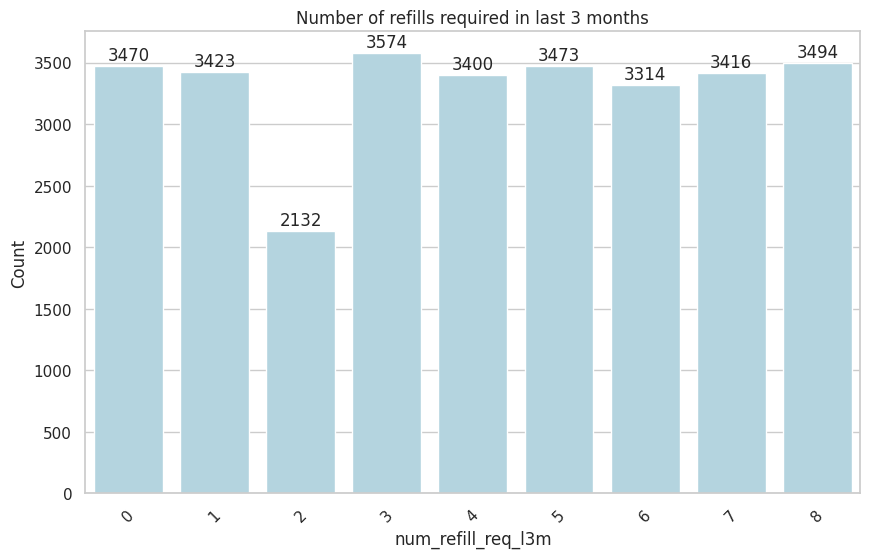

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plots = sns.countplot(x='num_refill_req_l3m', data=df, color='lightblue')

# Add annotations to each bar
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title("Number of refills required in last 3 months")
plt.xlabel("num_refill_req_l3m")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

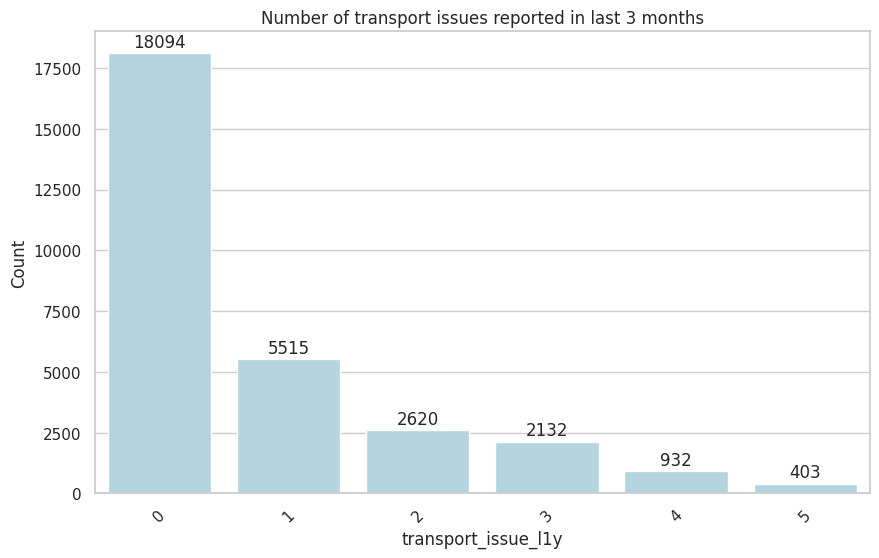

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plots = sns.countplot(x='transport_issue_l1y', data=df, color='lightblue')

# Add annotations to each bar
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title("Number of transport issues reported in last 3 months")
plt.xlabel("transport_issue_l1y")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

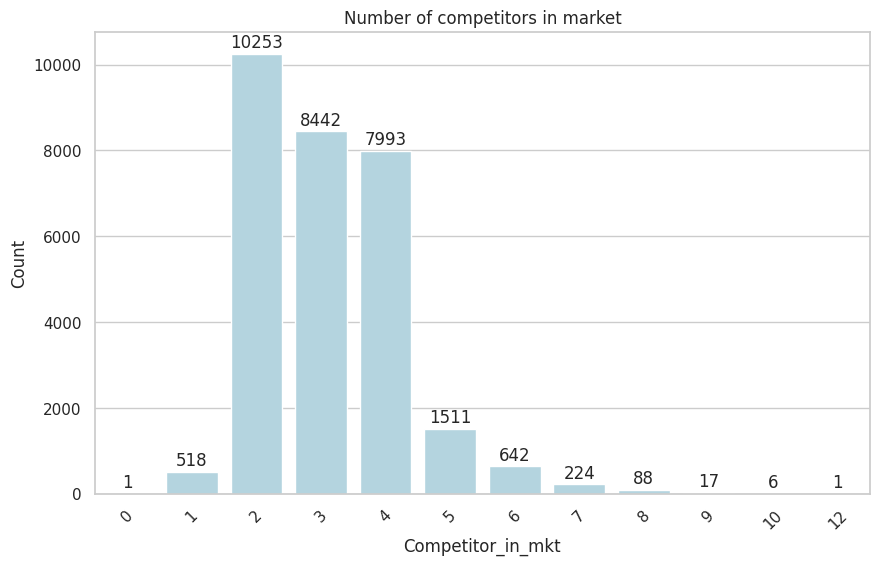

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plots = sns.countplot(x='Competitor_in_mkt', data=df, color='lightblue')

# Add annotations to each bar
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title("Number of competitors in market")
plt.xlabel("Competitor_in_mkt")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

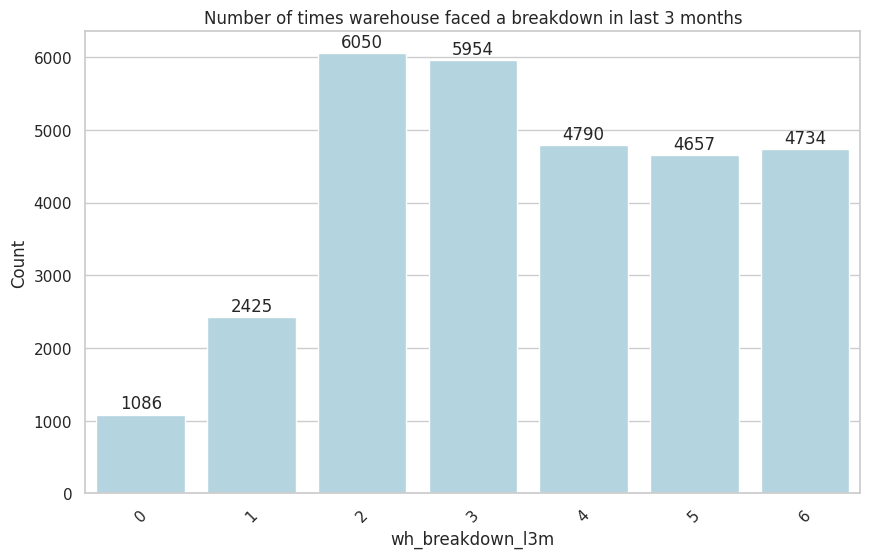

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plots = sns.countplot(x='wh_breakdown_l3m', data=df, color='lightblue')

# Add annotations to each bar
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title("Number of times warehouse faced a breakdown in last 3 months")
plt.xlabel("wh_breakdown_l3m")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [23]:
for column in cat.columns:
    unique_values = cat[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'Location_type':
['Urban' 'Rural']
Unique values in 'WH_capacity_size':
['Small' 'Large' 'Mid']
Unique values in 'zone':
['West' 'North' 'South' 'East']
Unique values in 'WH_regional_zone':
['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']
Unique values in 'wh_owner_type':
['Rented' 'Company Owned']
Unique values in 'flood_impacted':
[0 1]
Unique values in 'flood_proof':
[1 0]
Unique values in 'electric_supply':
[1 0]
Unique values in 'temp_reg_mach':
[0 1]
Unique values in 'approved_wh_govt_certificate':
['A' 'A+' 'C' 'B' 'B+' nan]


## Bivariate Analysis

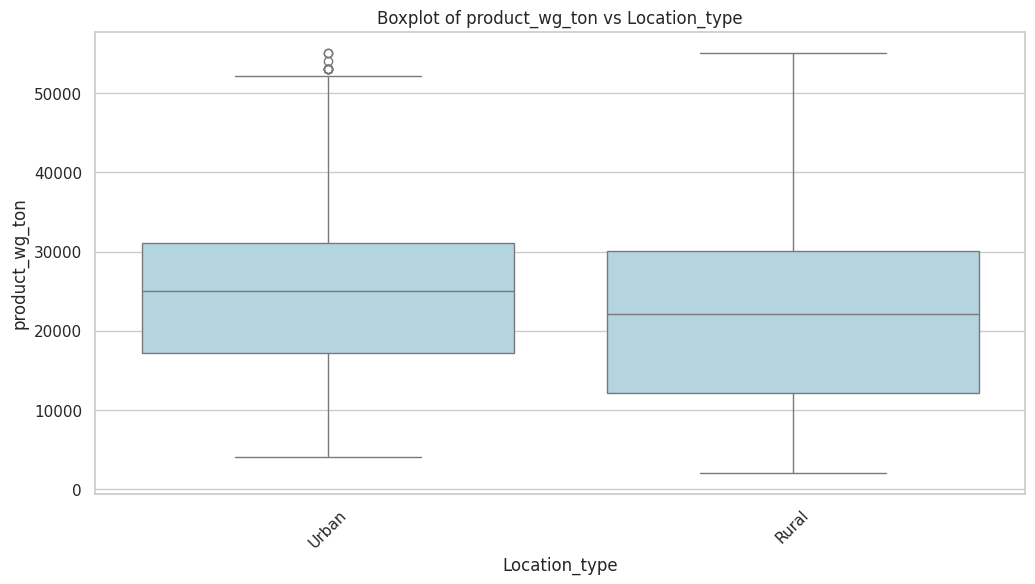

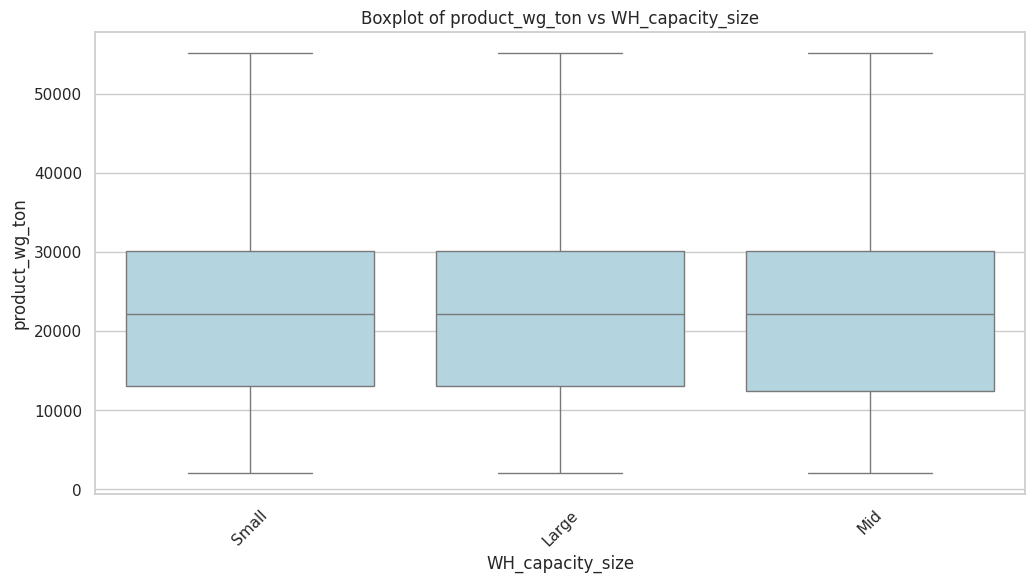

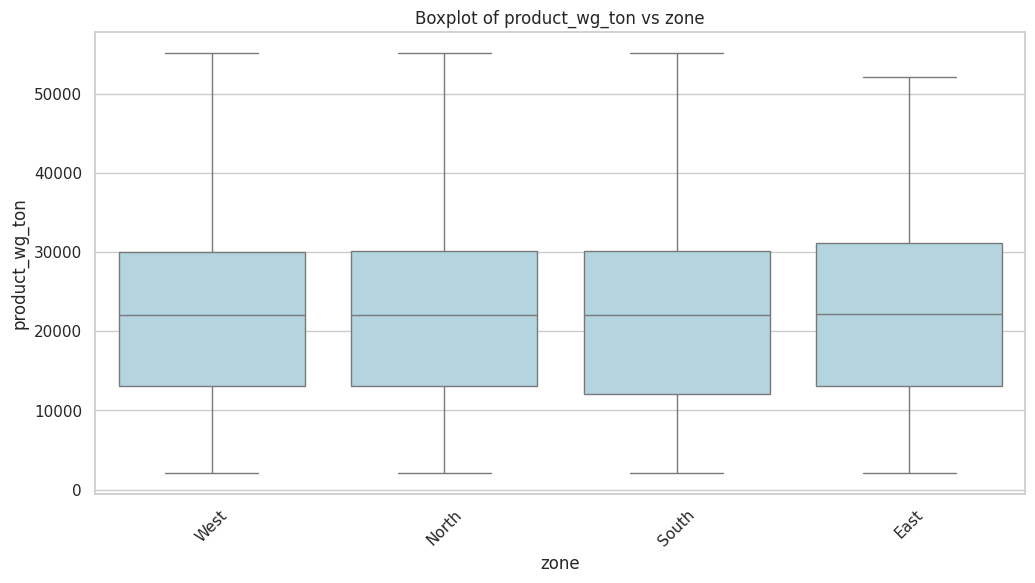

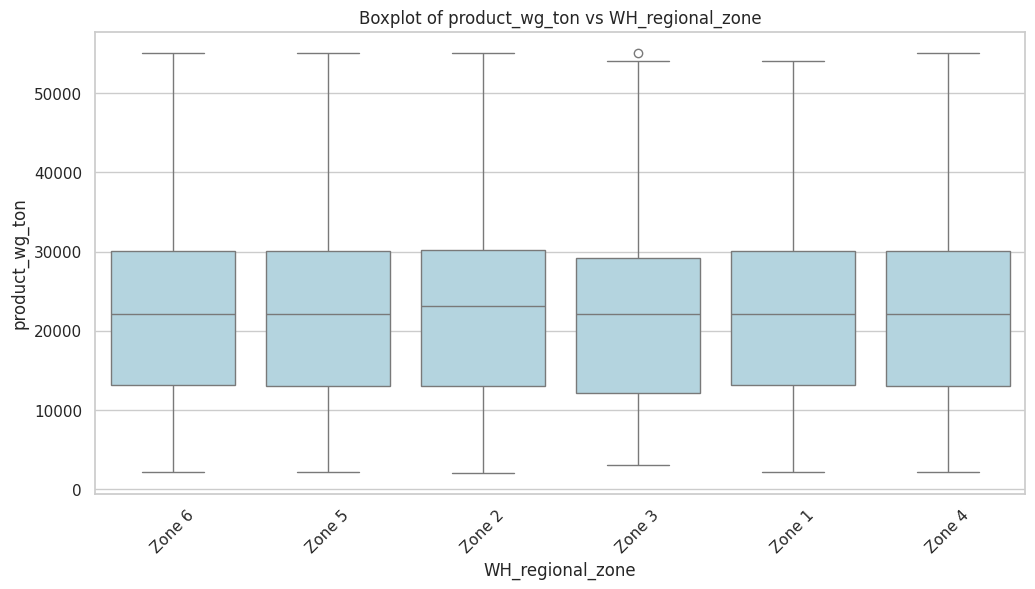

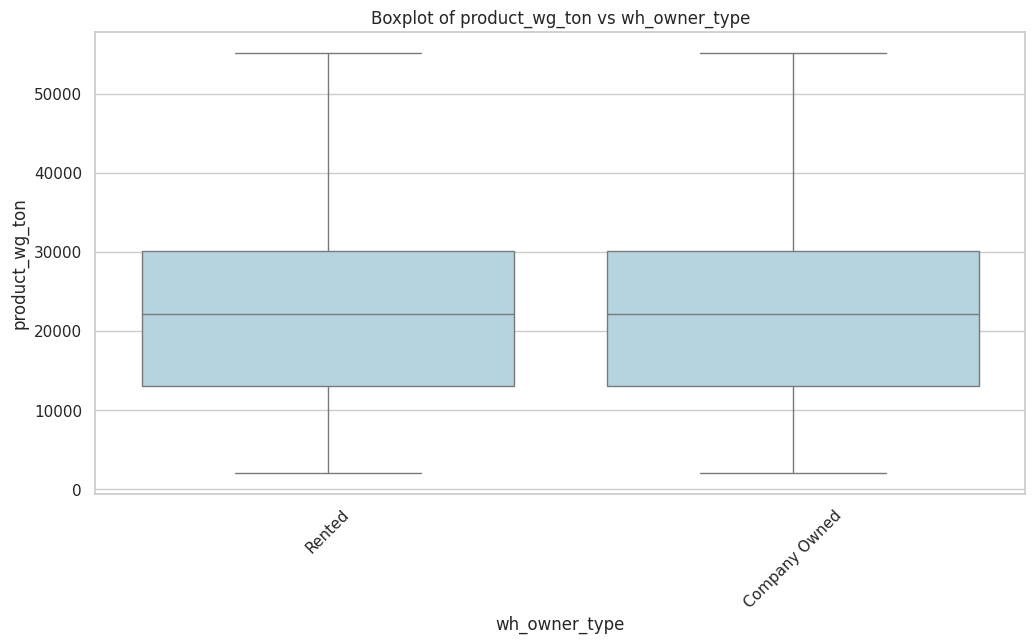

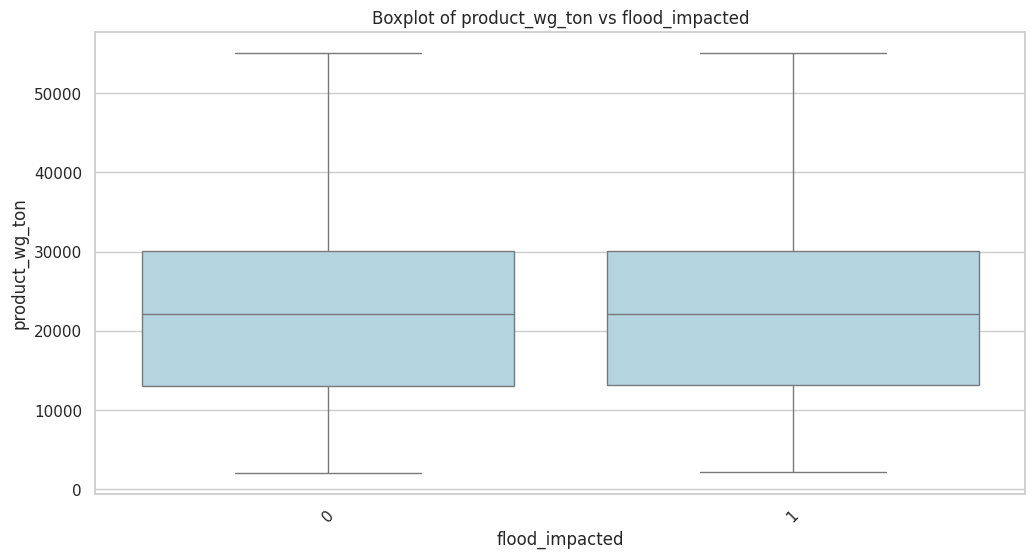

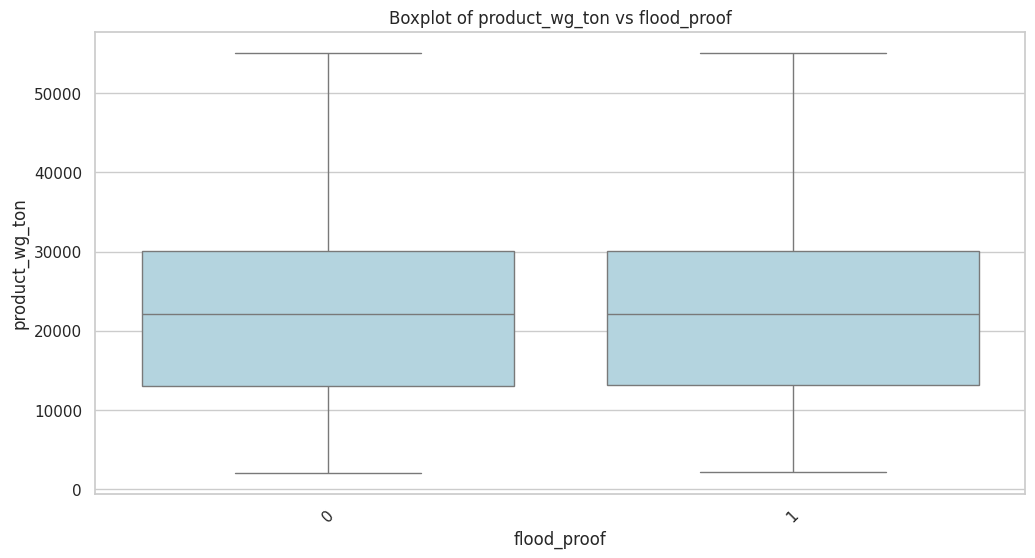

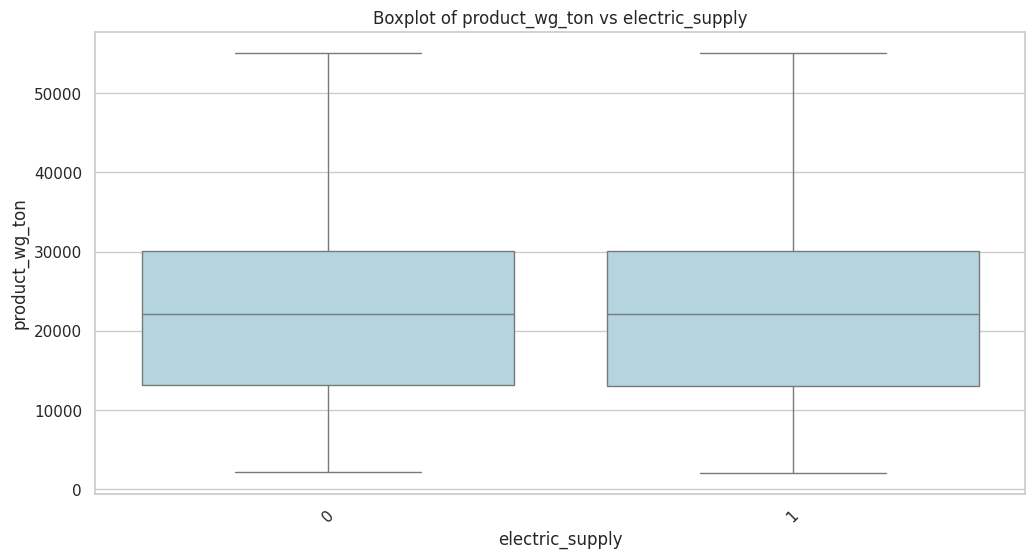

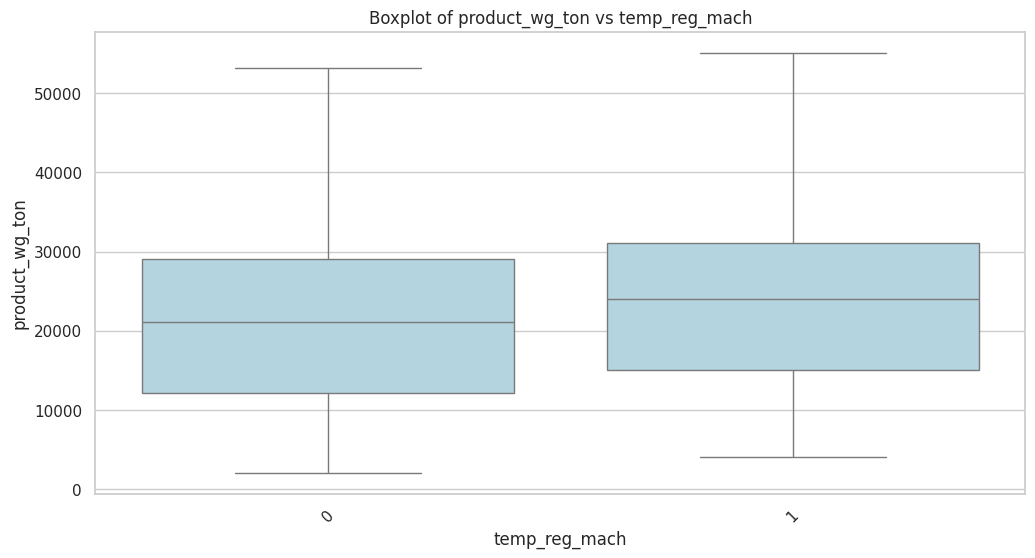

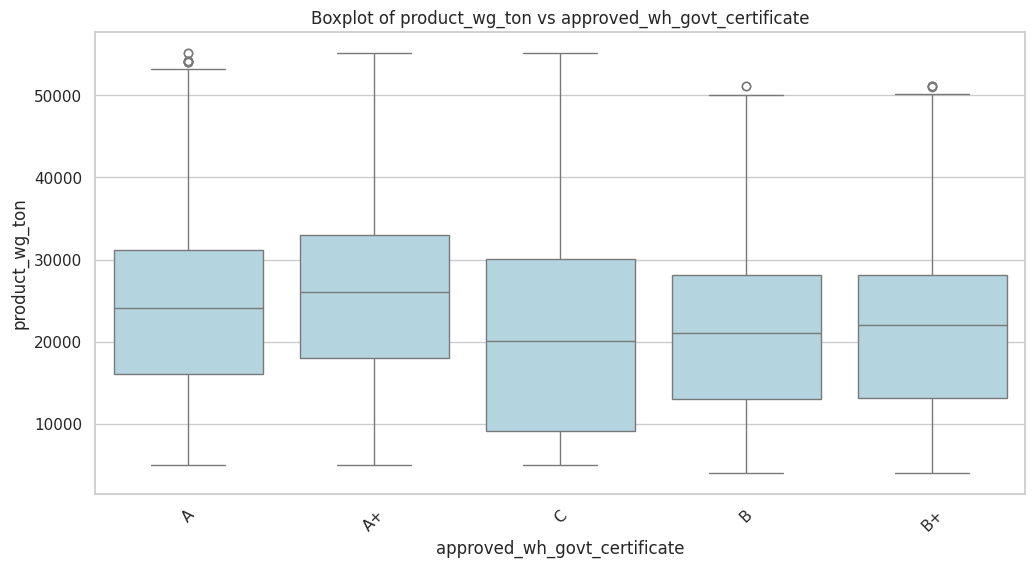

In [24]:
def plot_boxplots(df, numerical_column):
    # Select categorical columns
    cat_columns = df.select_dtypes(include=['object']).columns

    # Loop through each categorical column and plot a boxplot
    for cat_column in cat_columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=cat_column, y=numerical_column, data=df, color='lightblue')
        plt.title(f'Boxplot of {numerical_column} vs {cat_column}')
        plt.xlabel(cat_column)
        plt.ylabel(numerical_column)
        plt.xticks(rotation=45)
        plt.show()

plot_boxplots(df, 'product_wg_ton')

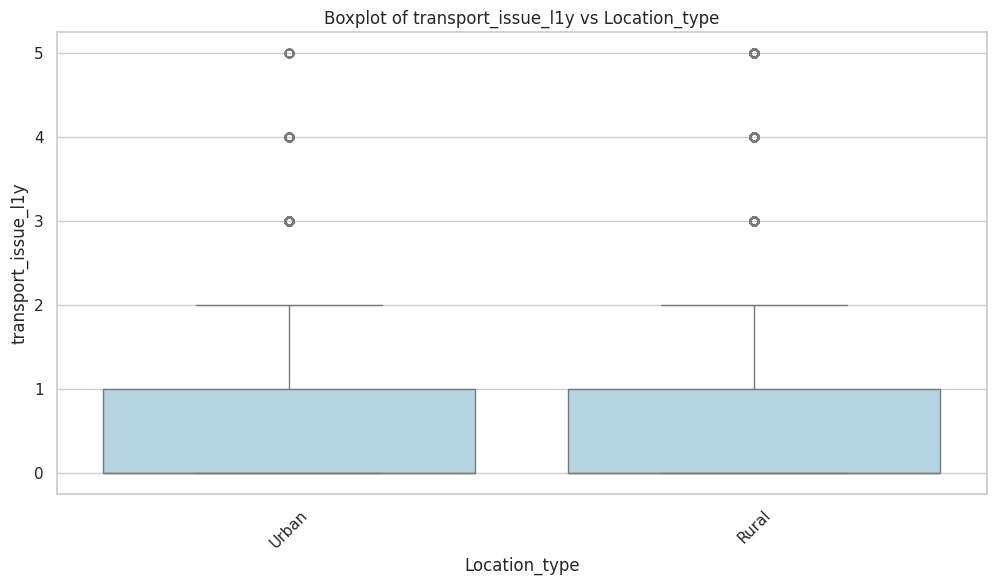

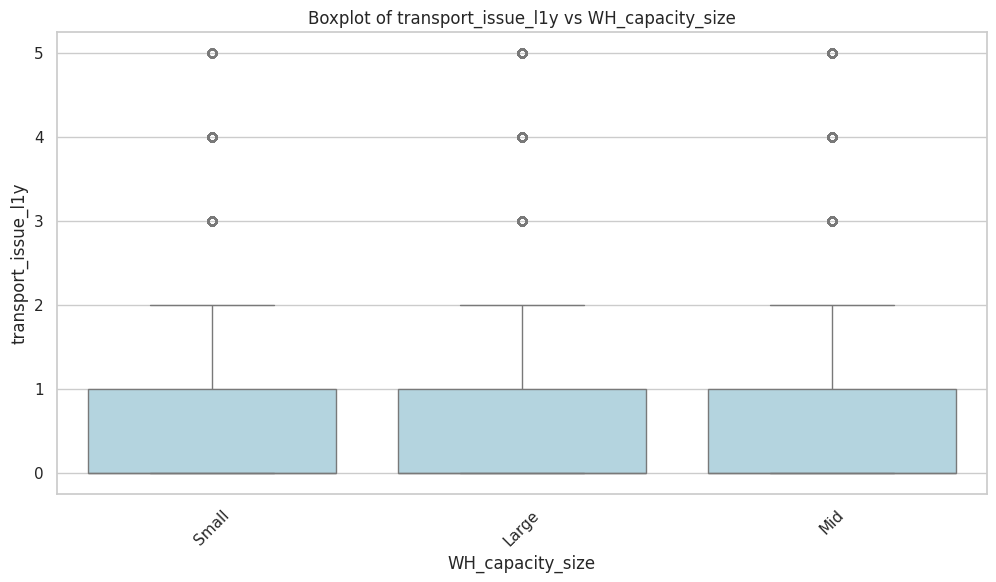

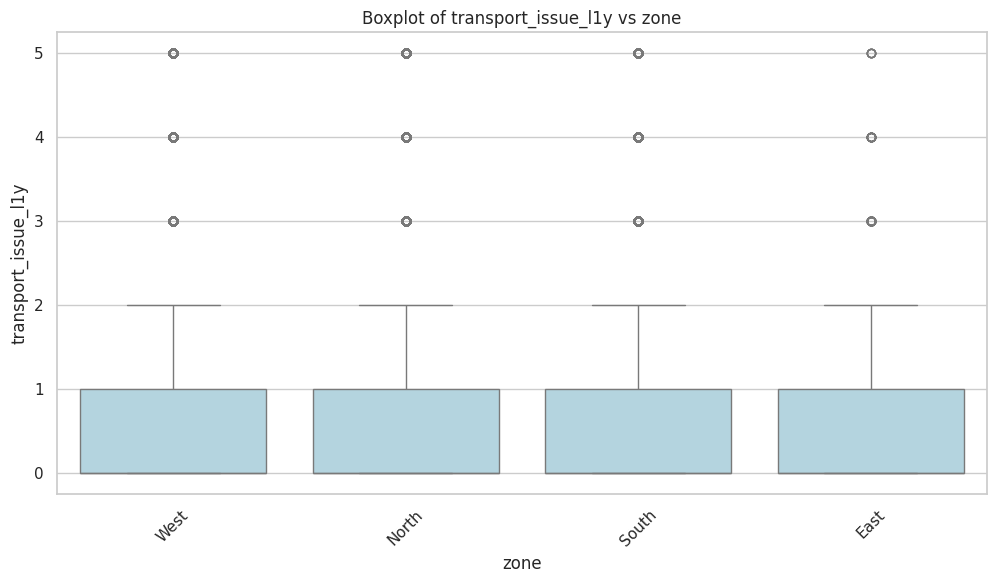

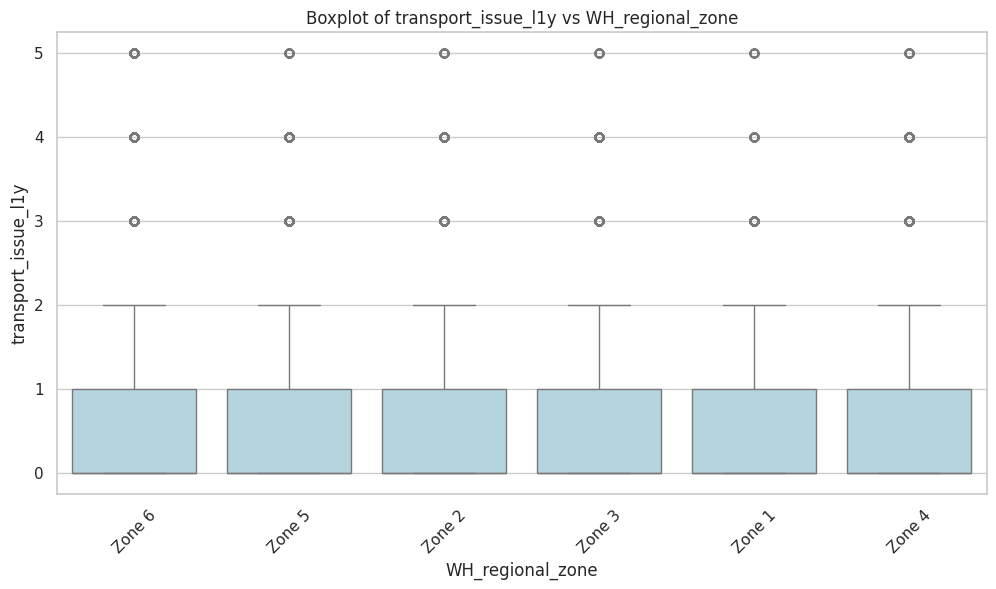

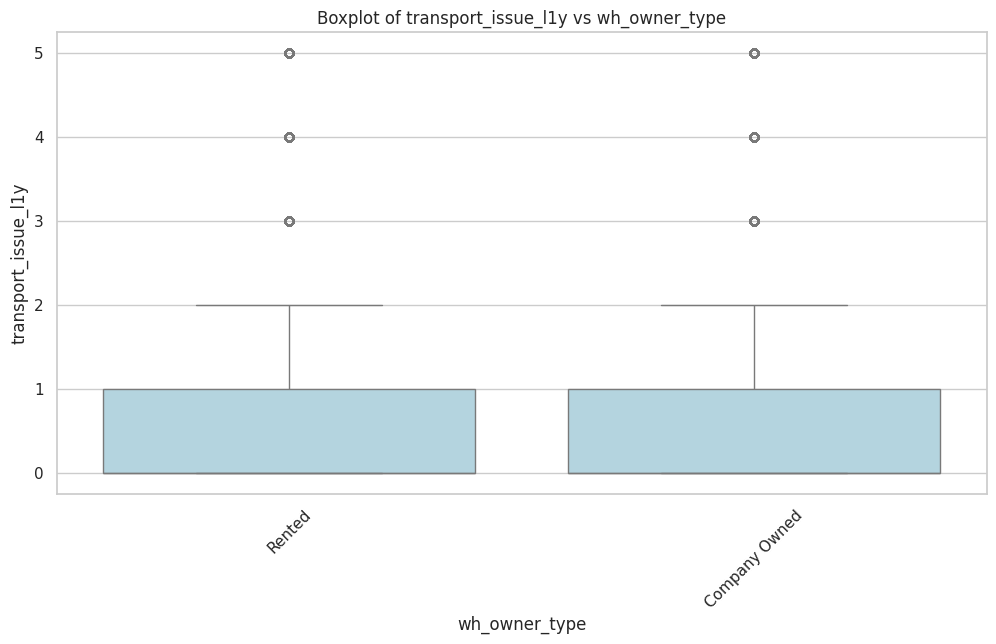

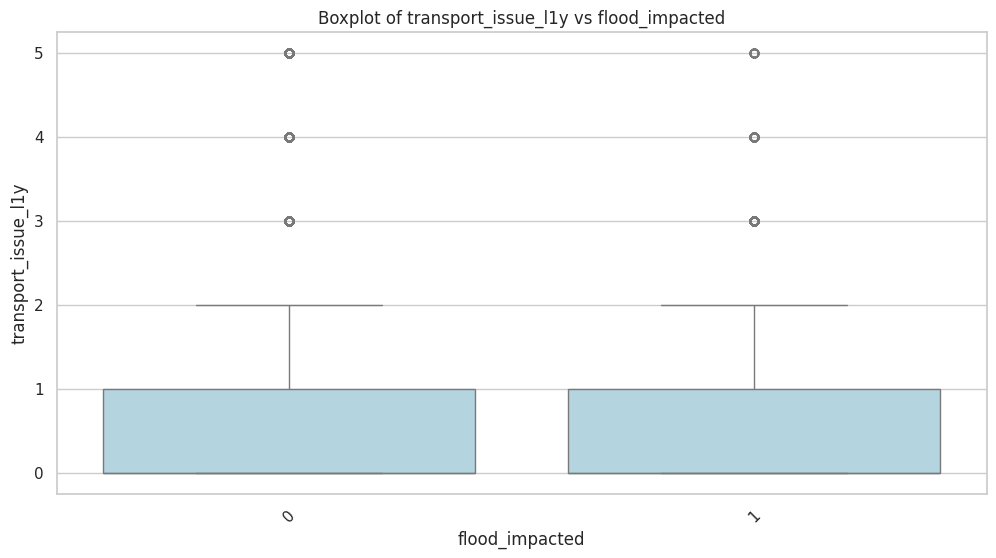

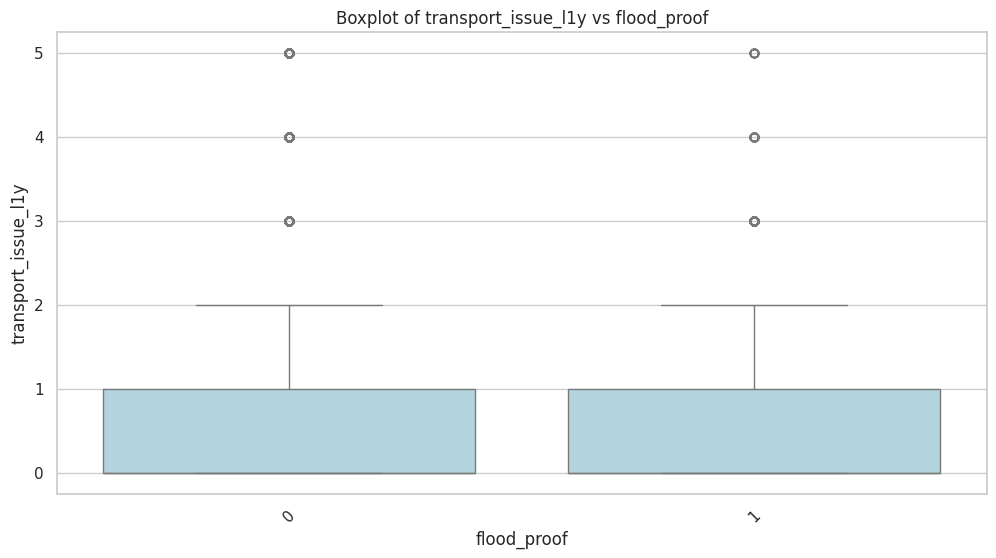

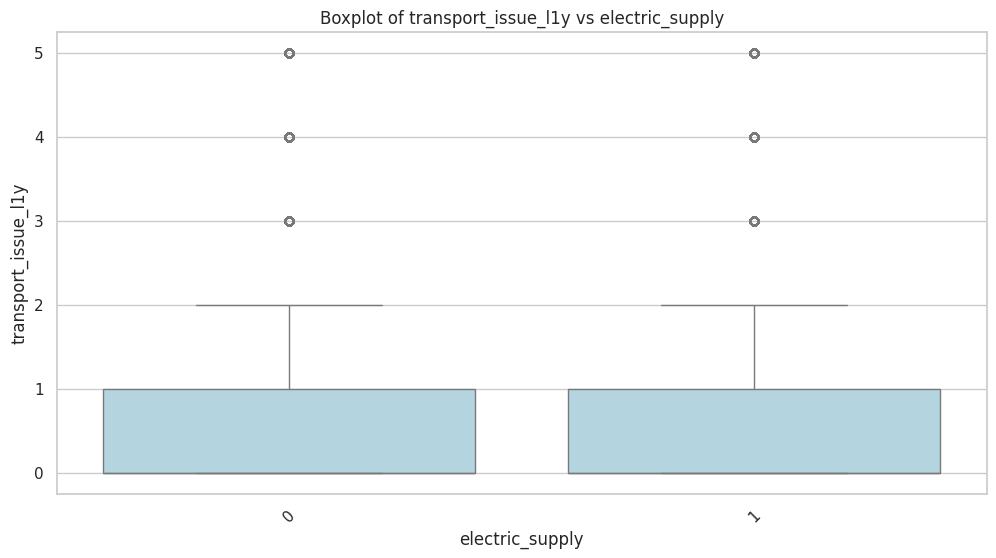

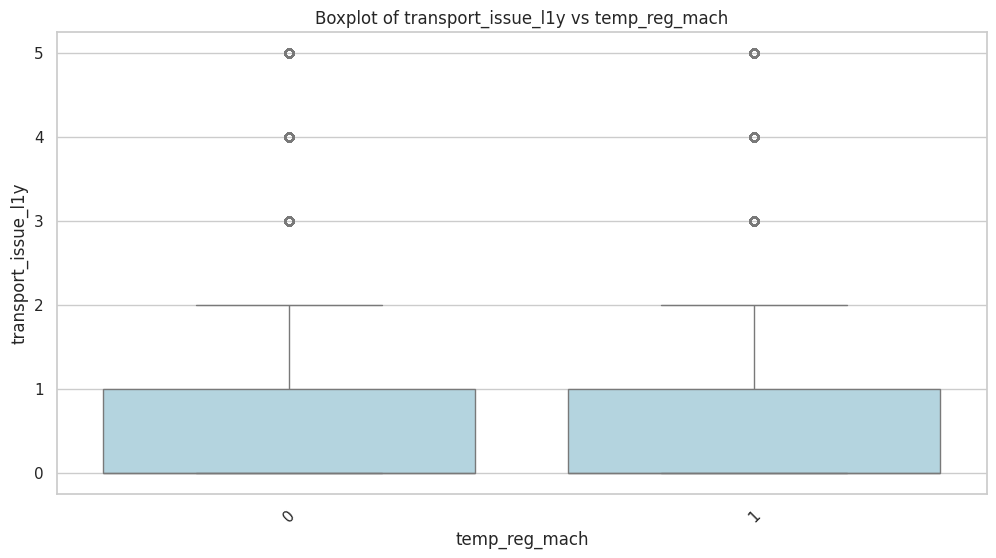

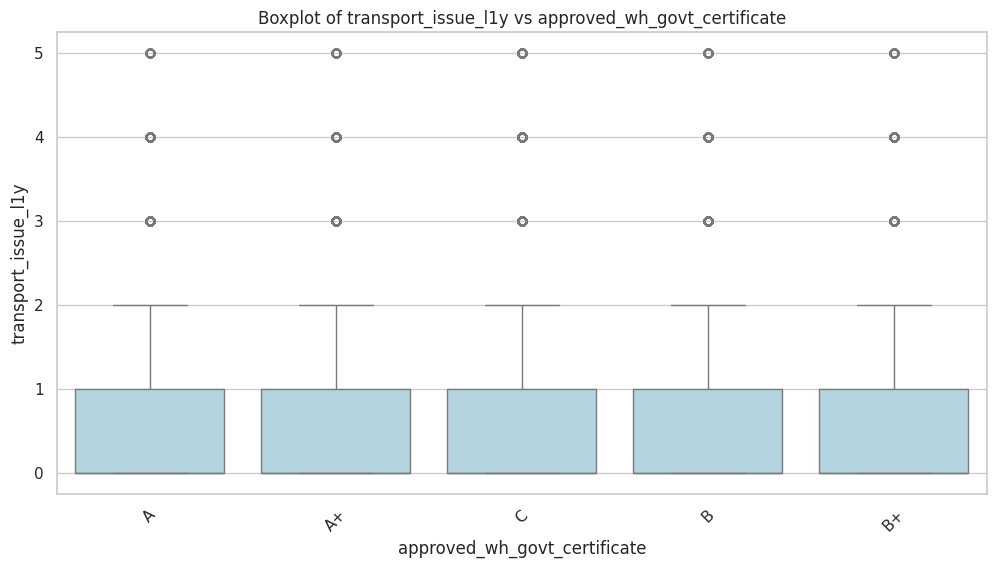

In [25]:
plot_boxplots(df, 'transport_issue_l1y')

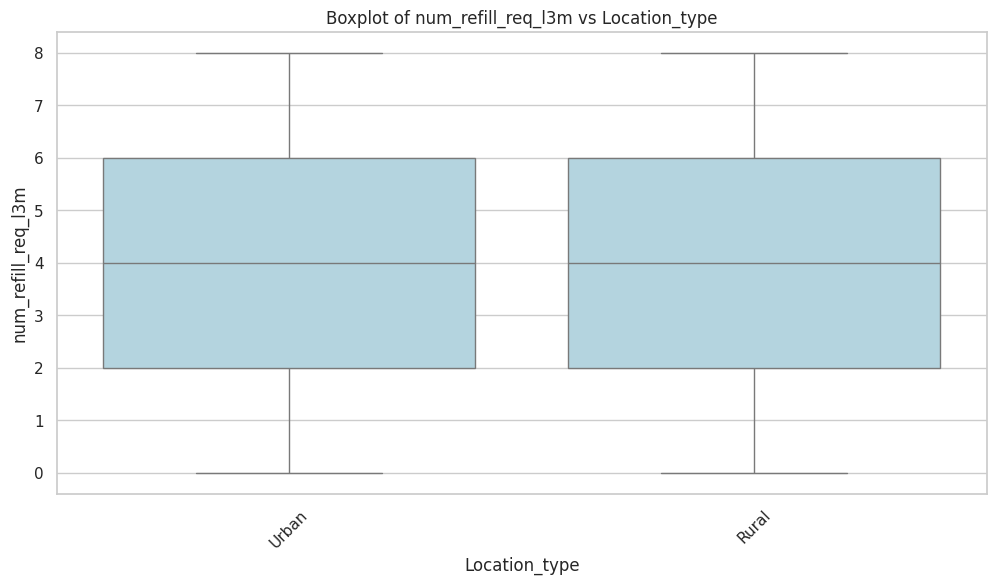

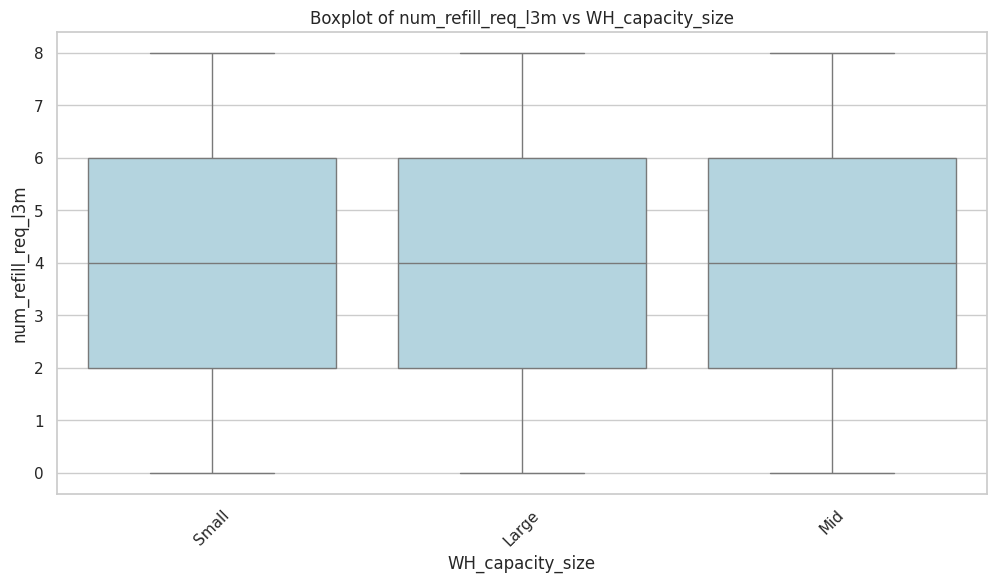

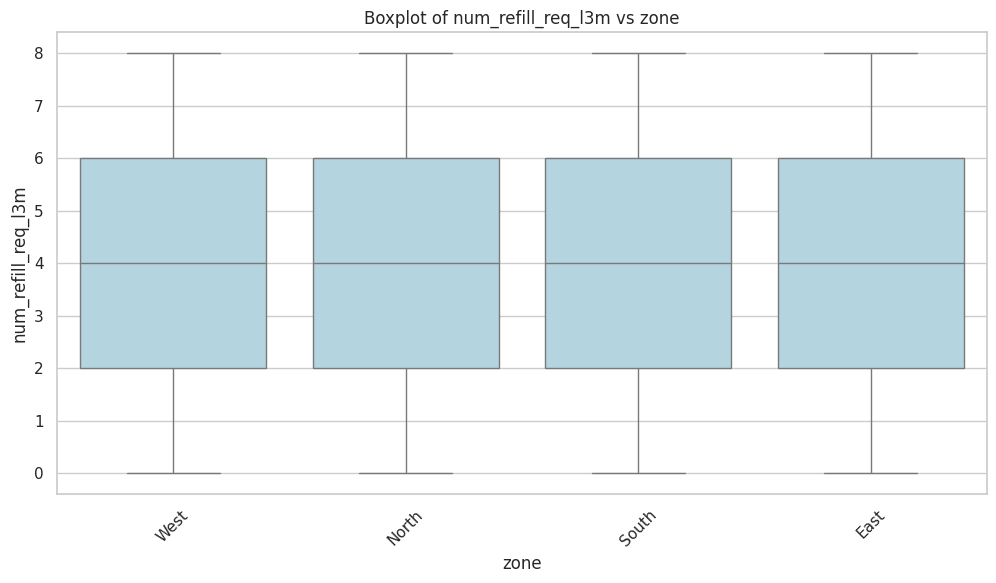

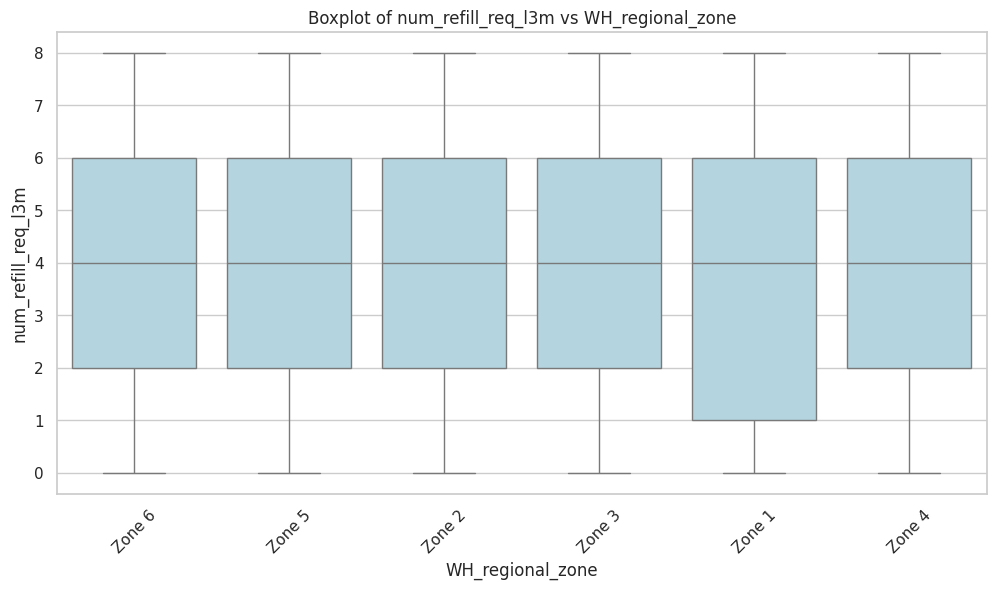

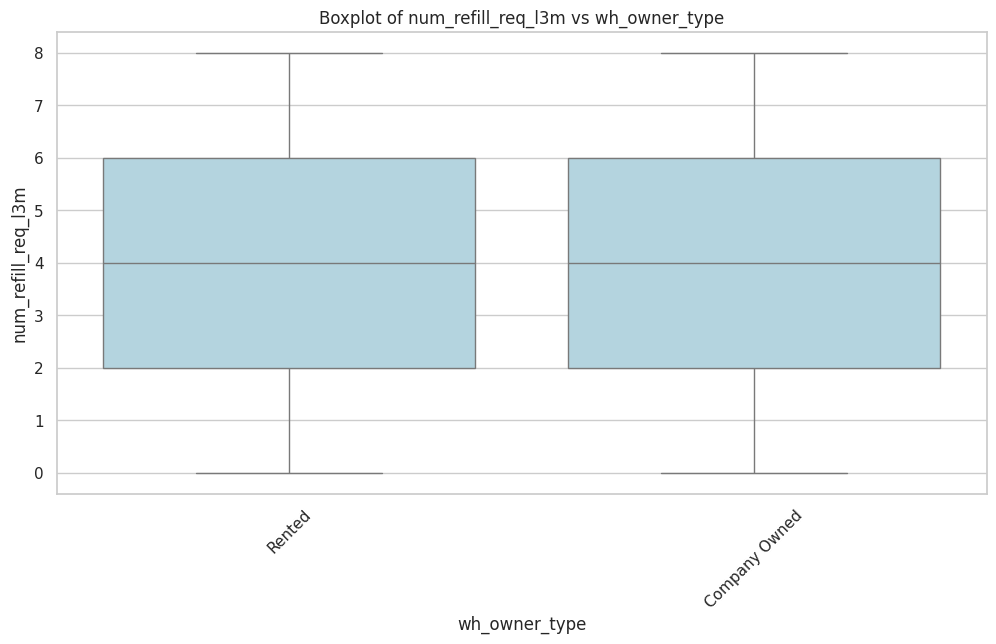

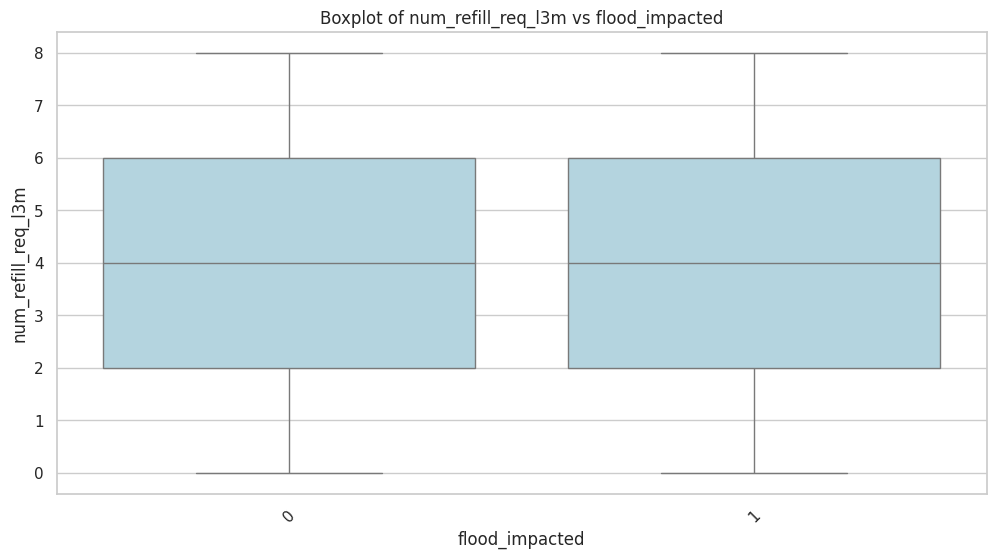

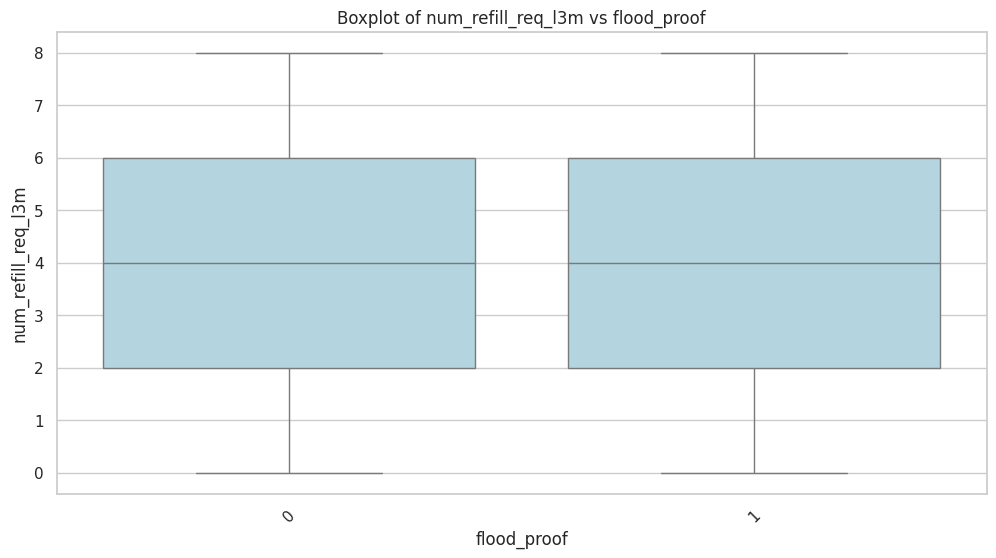

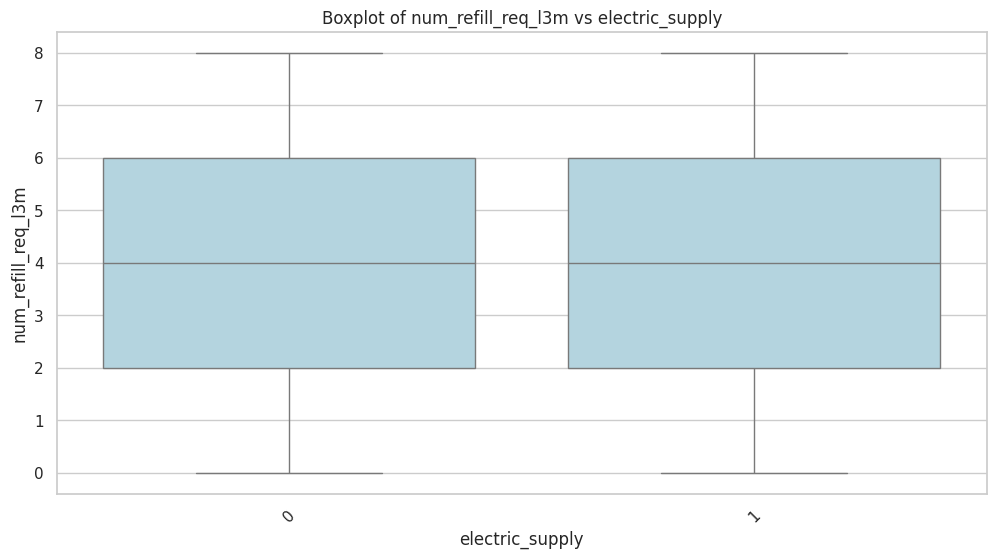

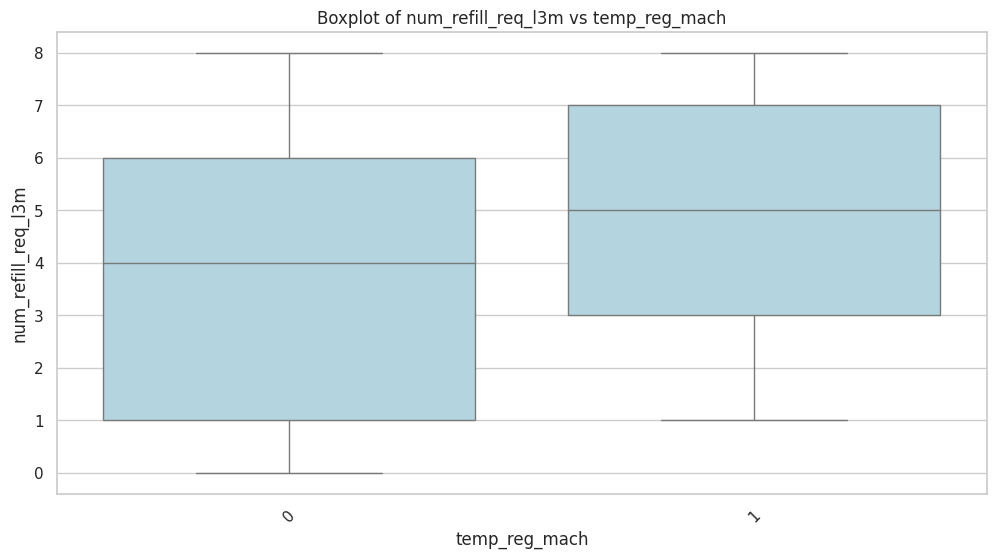

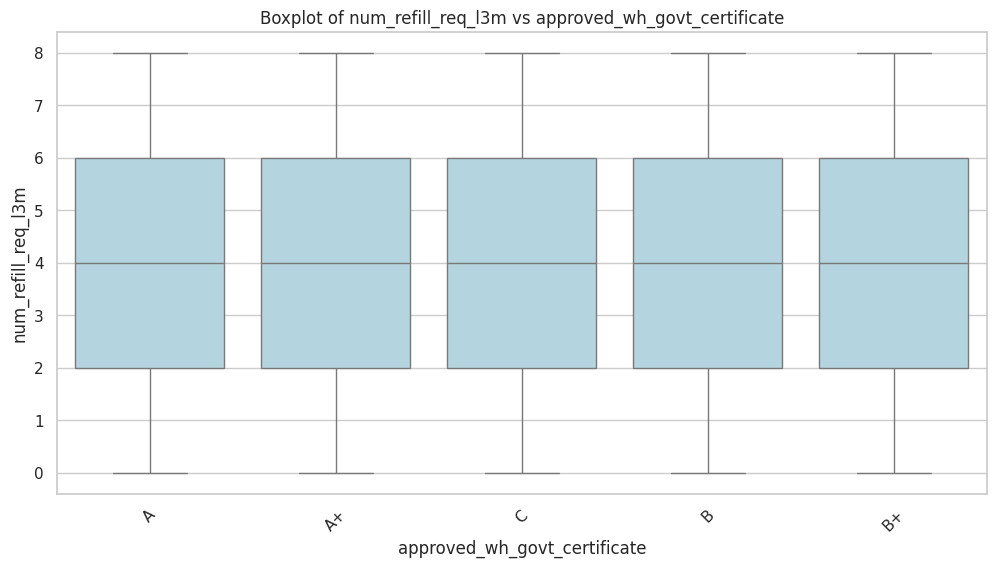

In [26]:
plot_boxplots(df, 'num_refill_req_l3m')

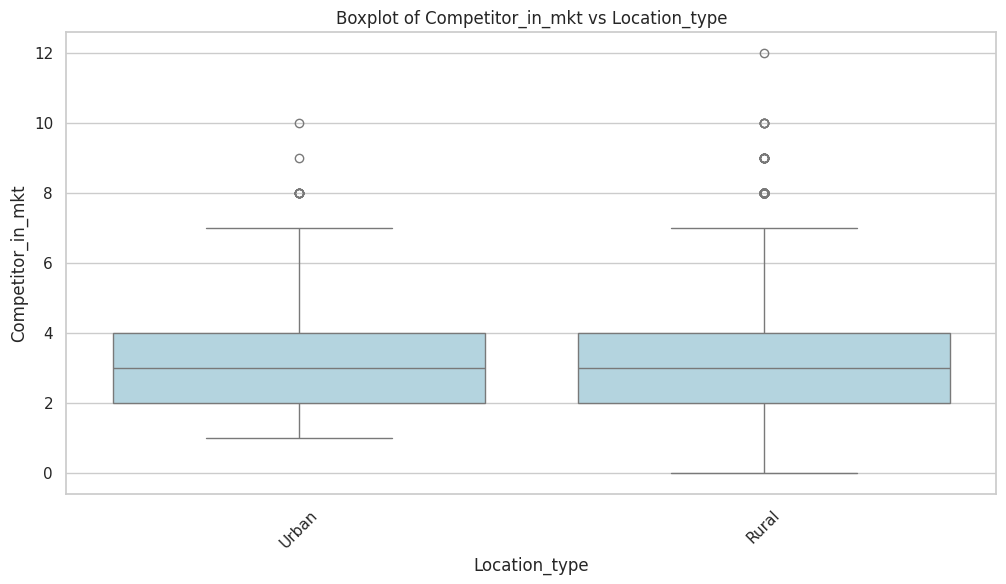

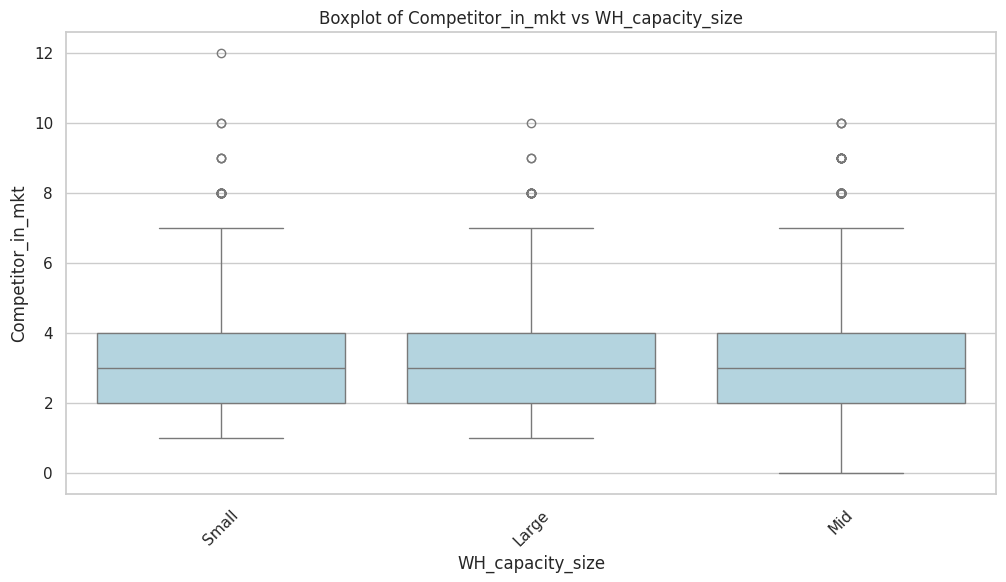

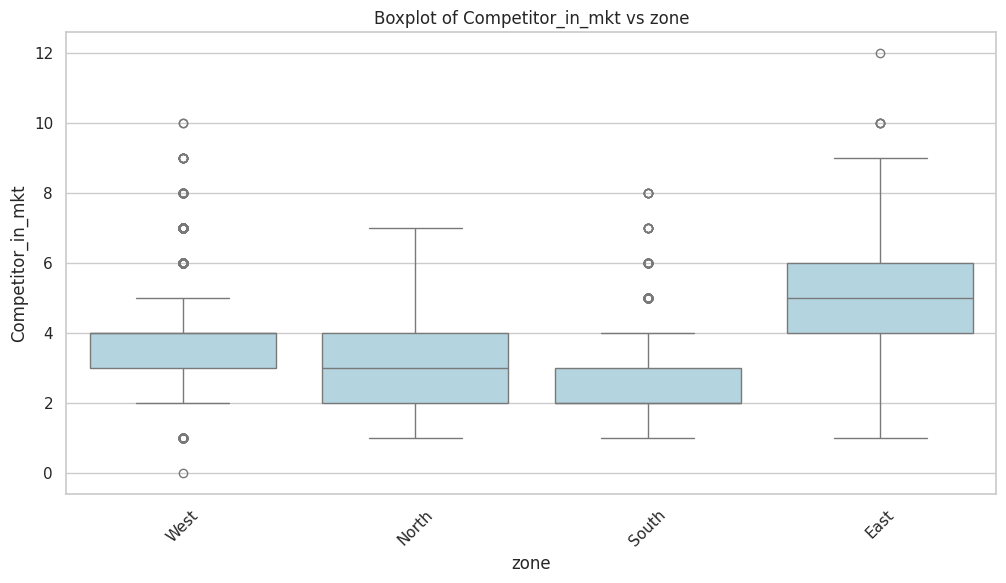

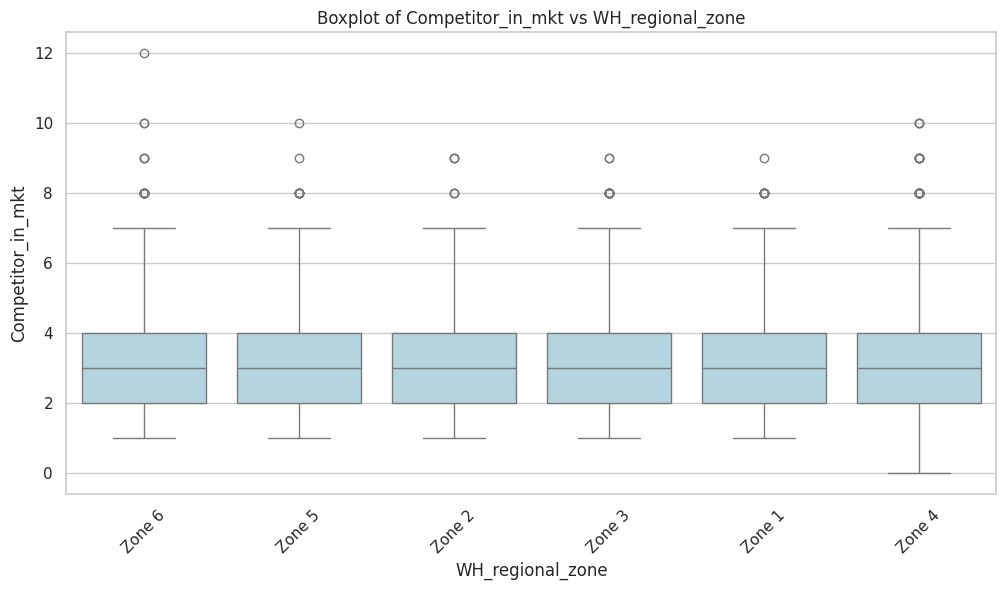

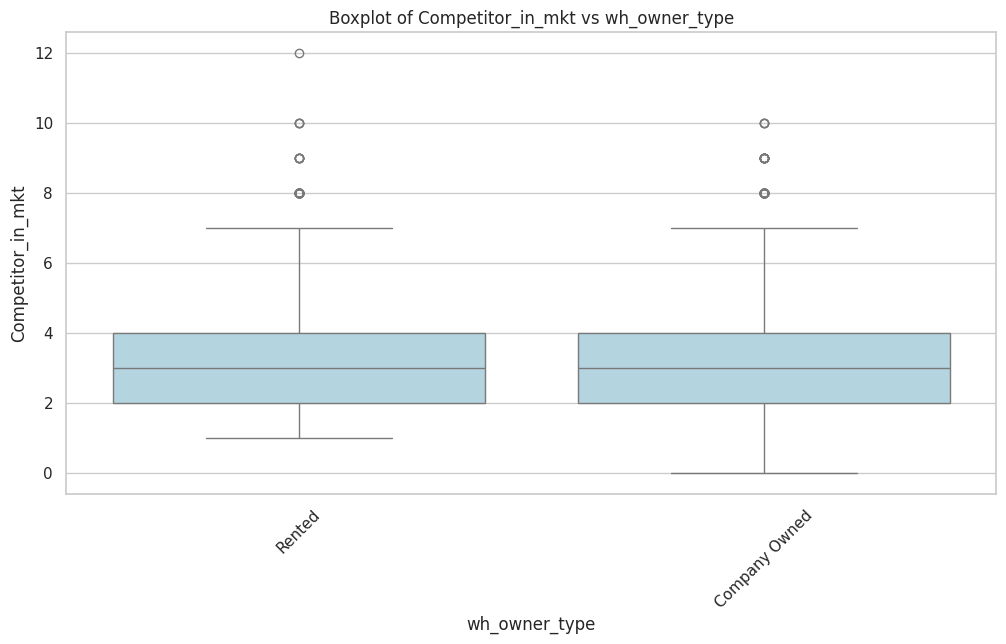

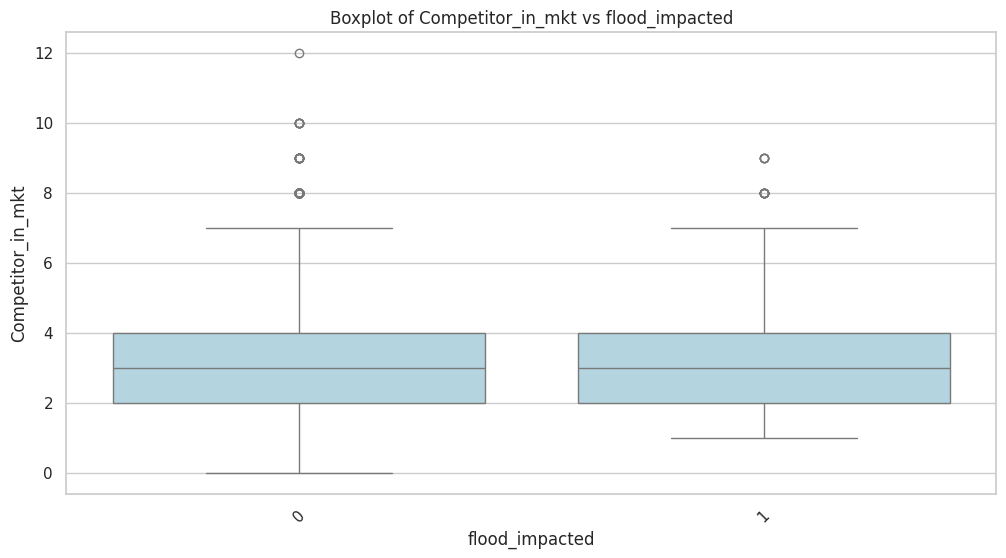

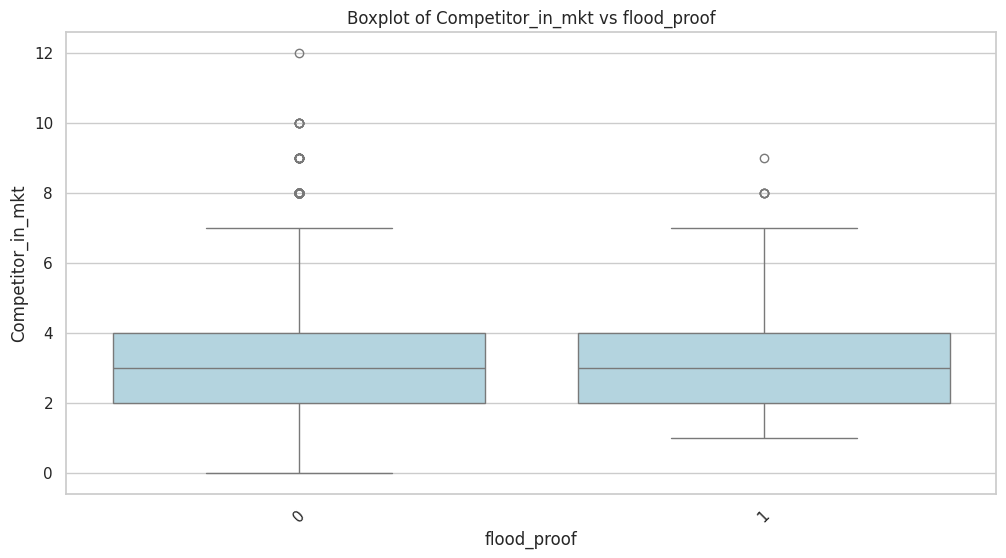

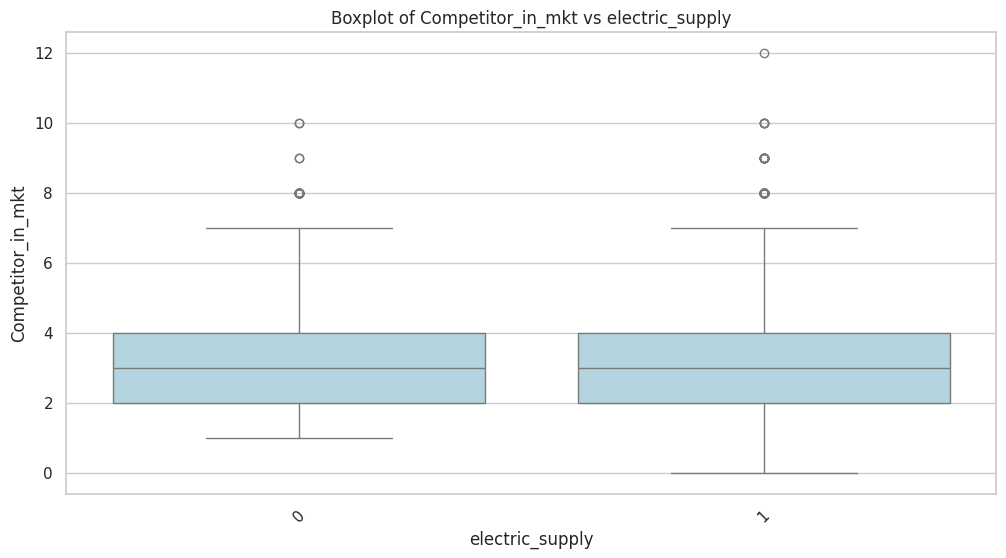

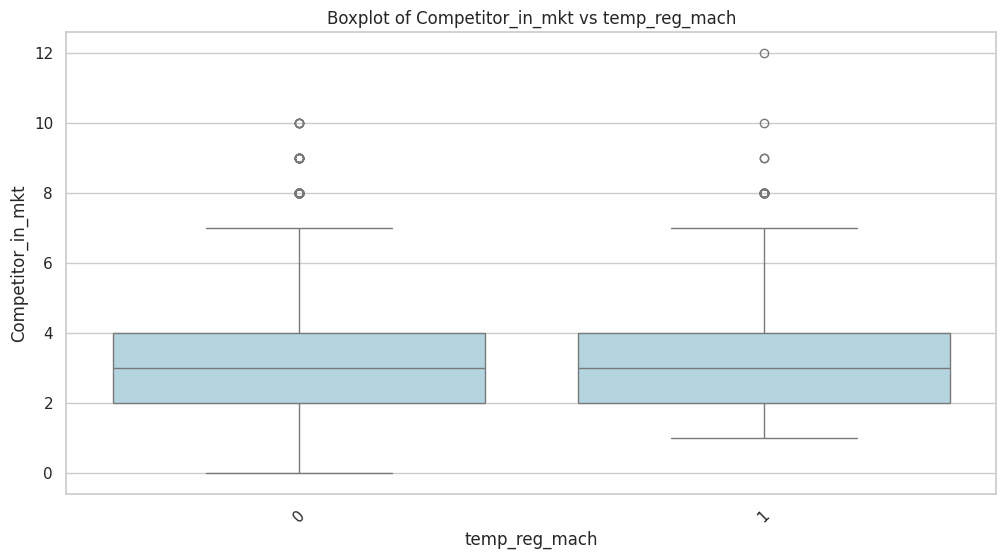

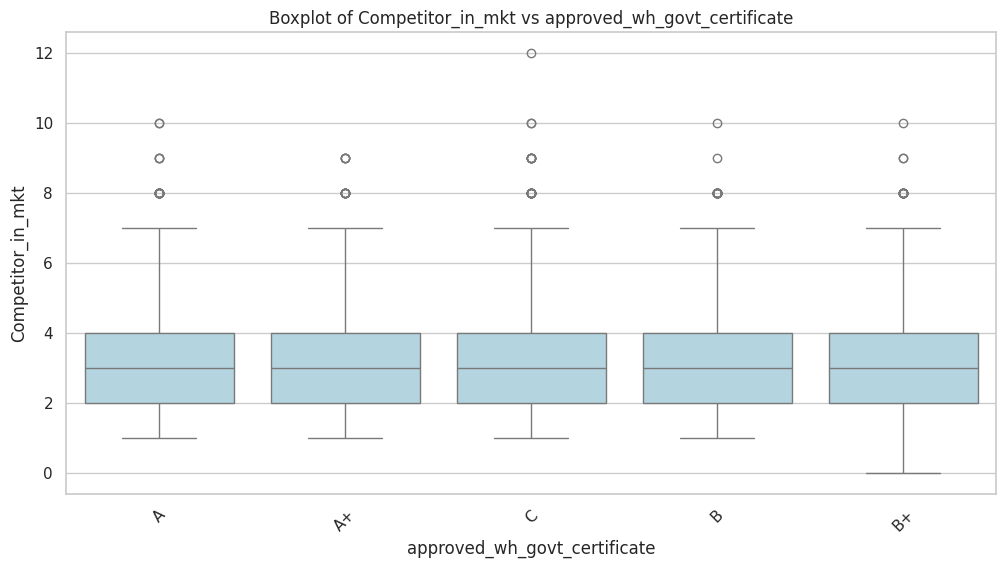

In [27]:
plot_boxplots(df, 'Competitor_in_mkt')

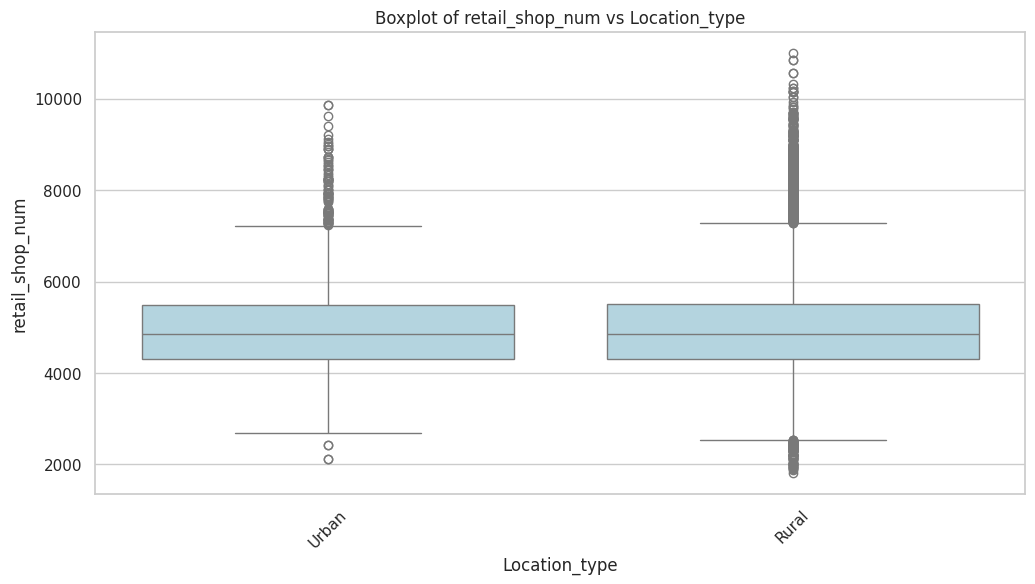

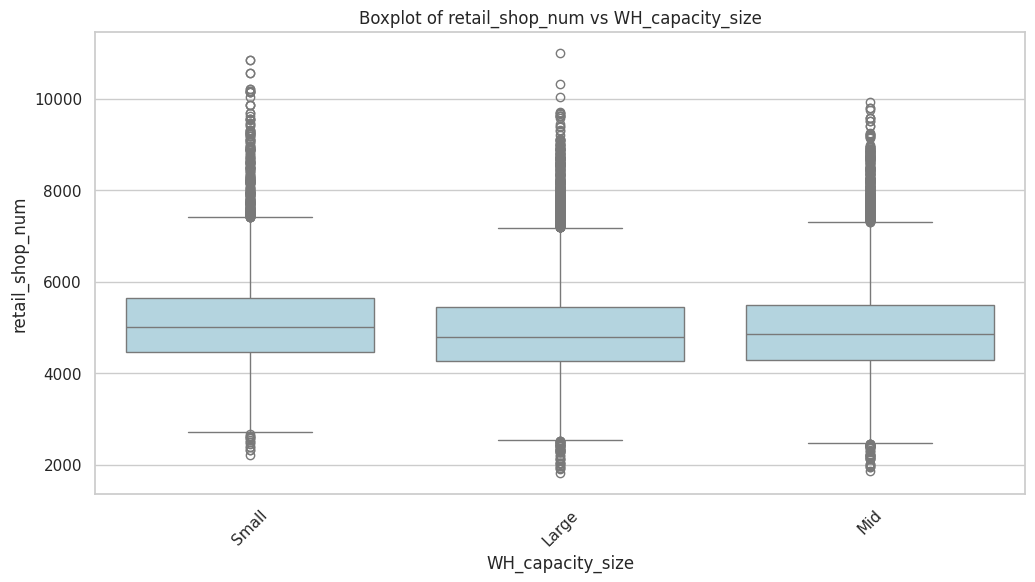

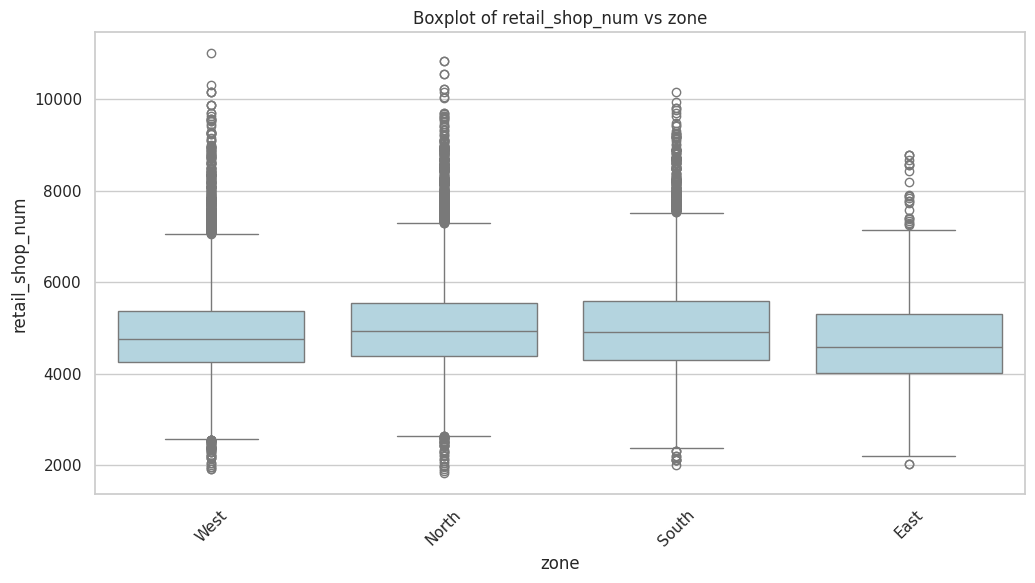

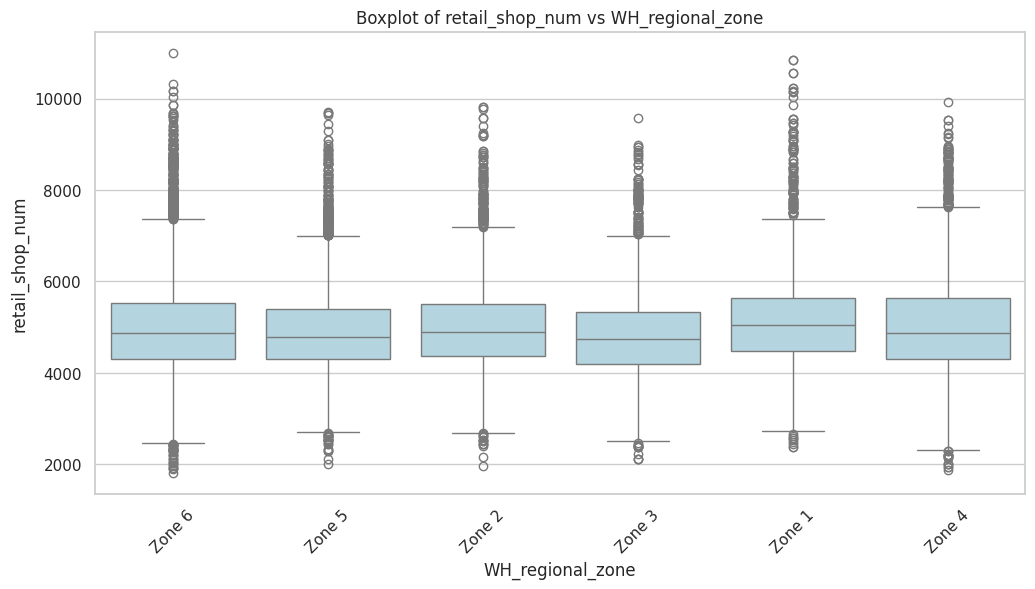

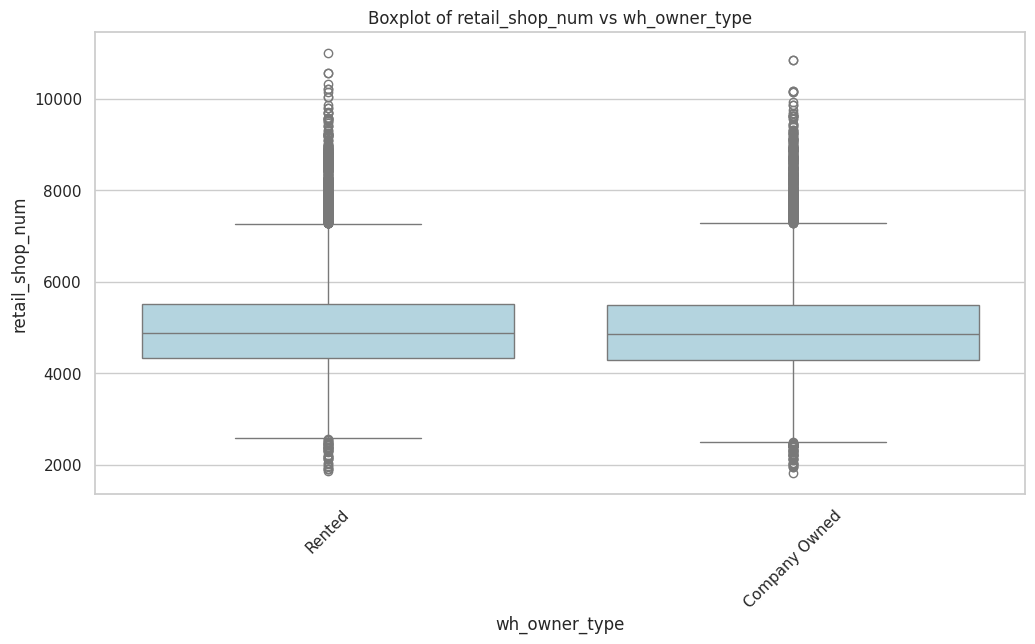

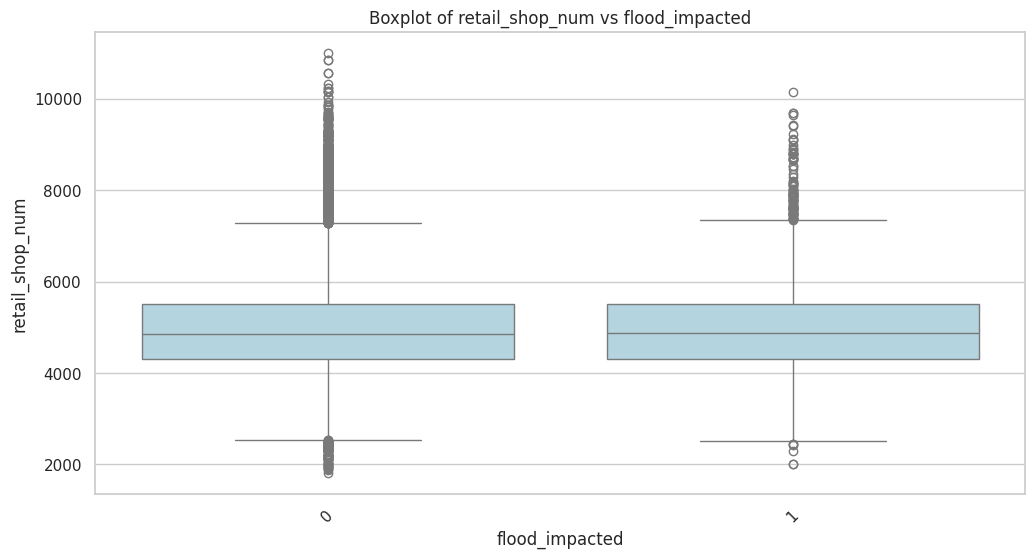

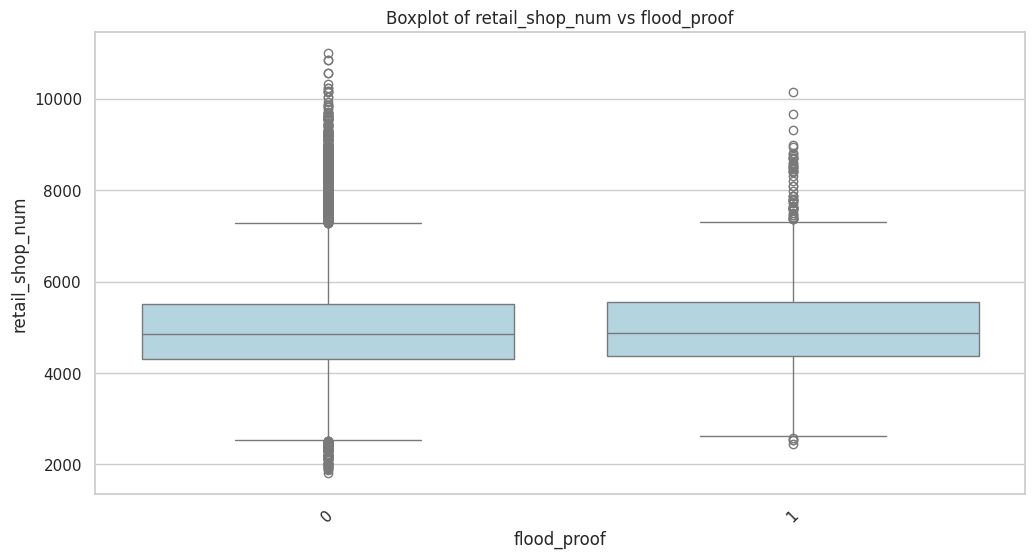

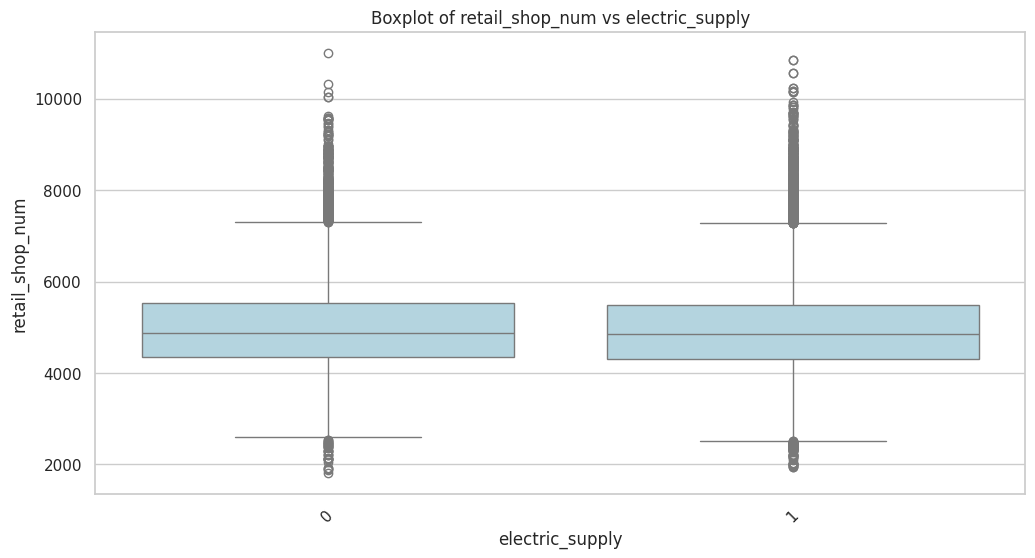

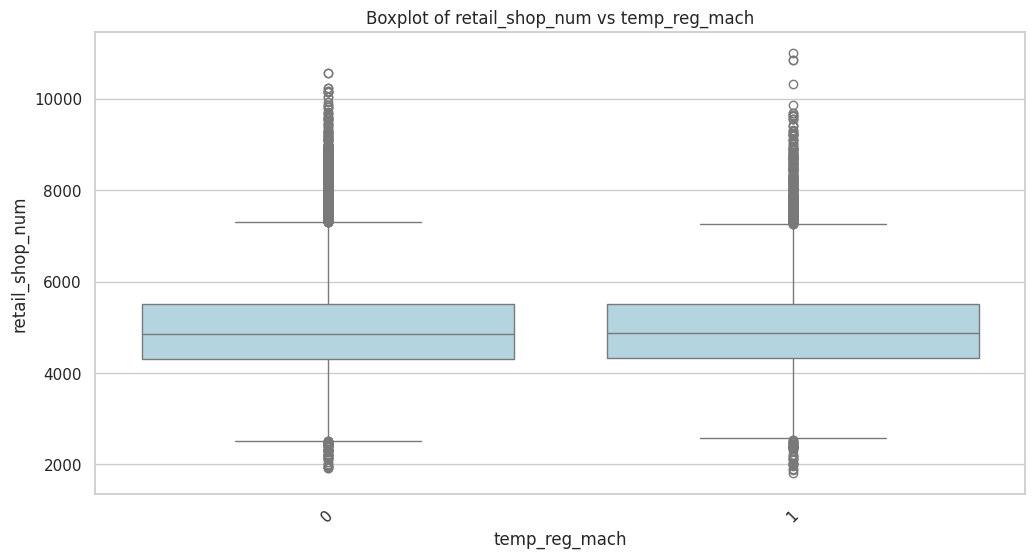

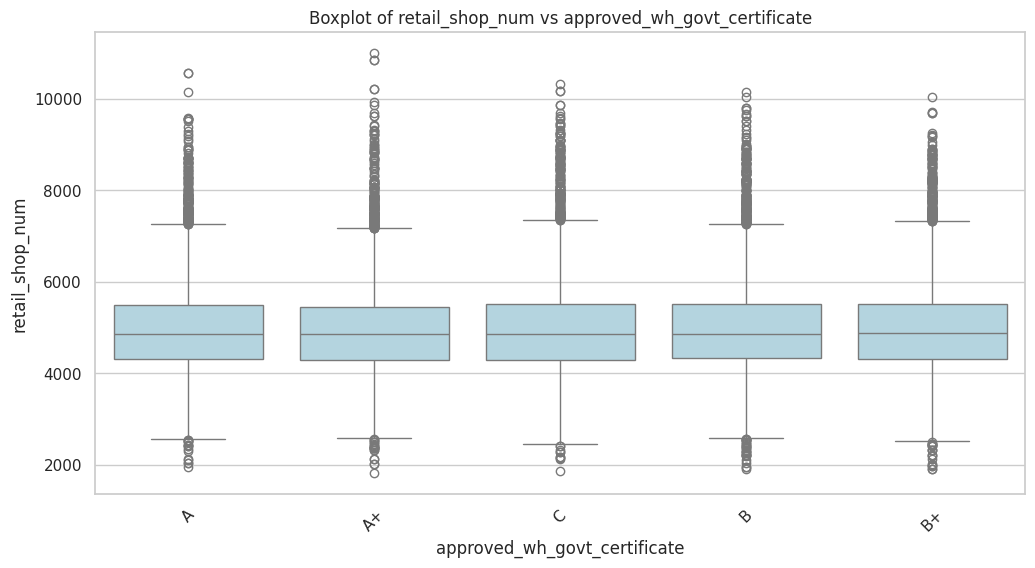

In [28]:
plot_boxplots(df, 'retail_shop_num')

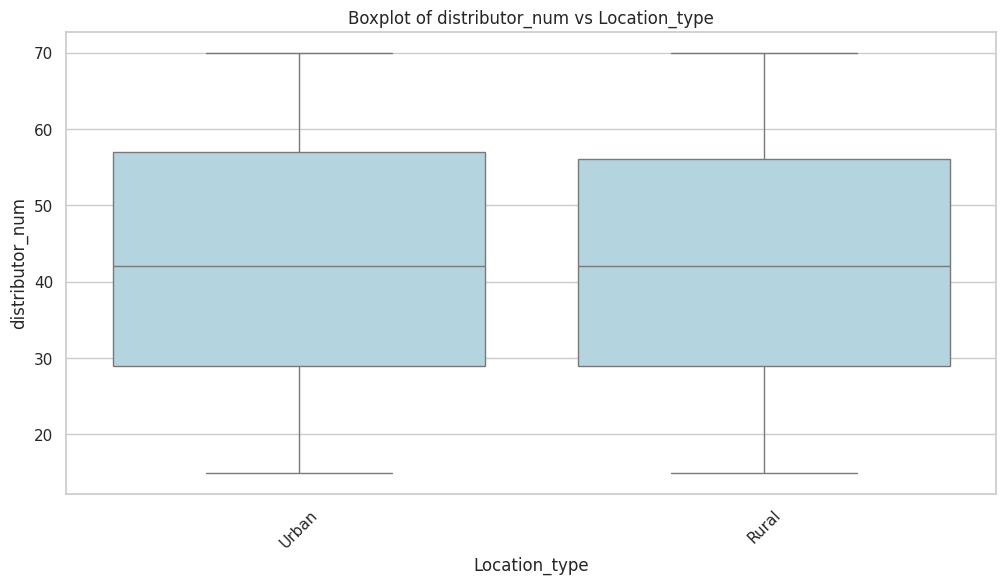

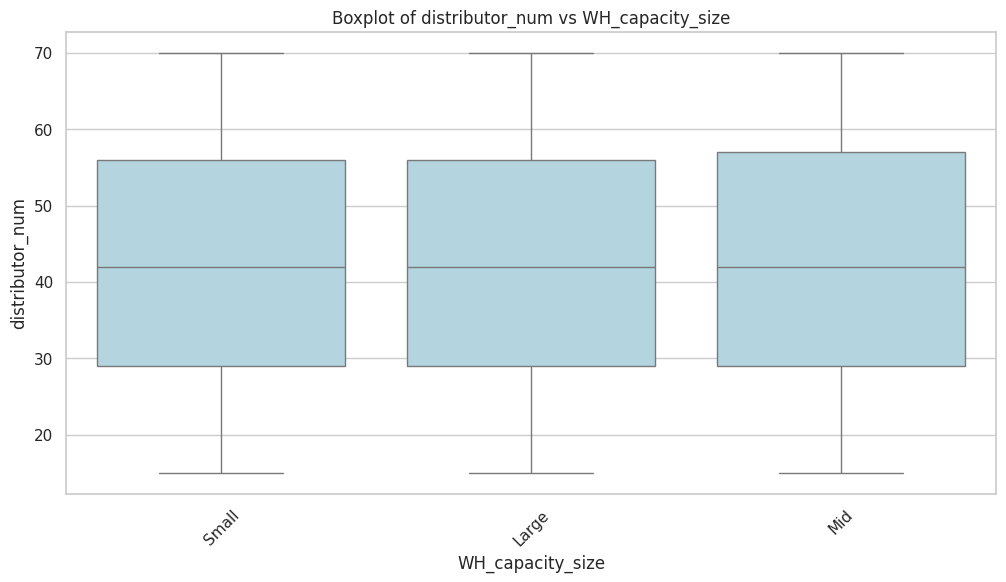

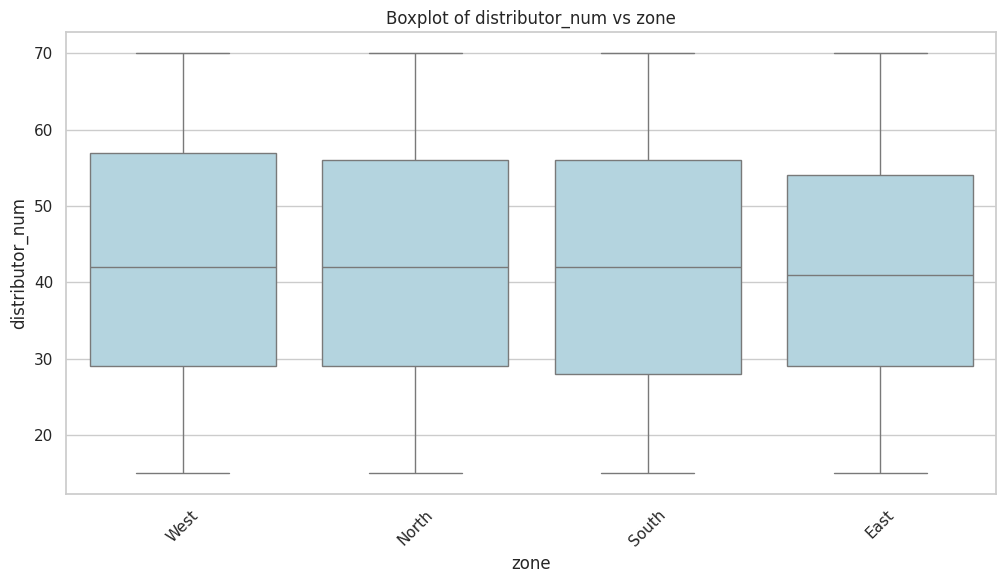

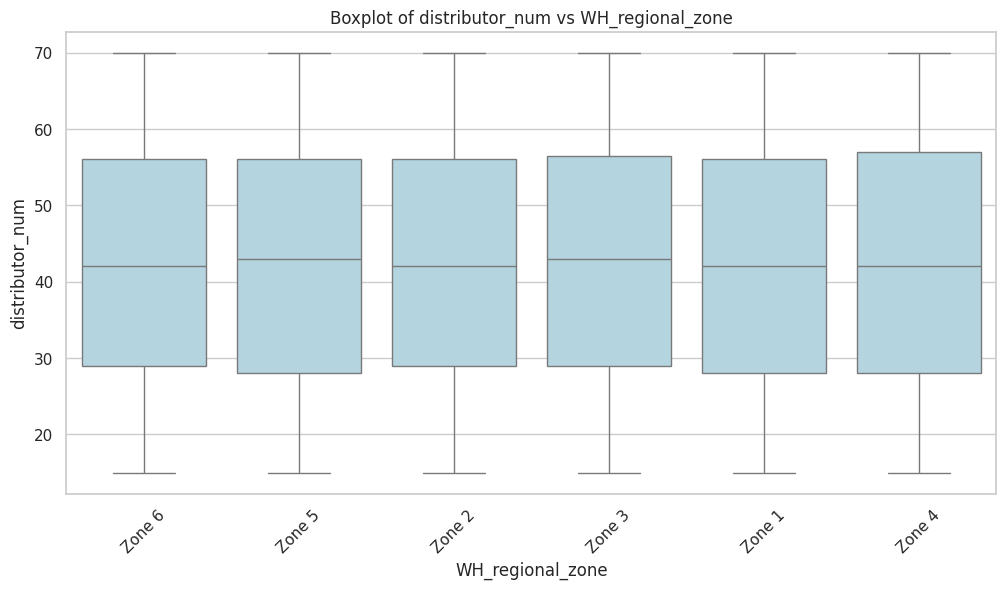

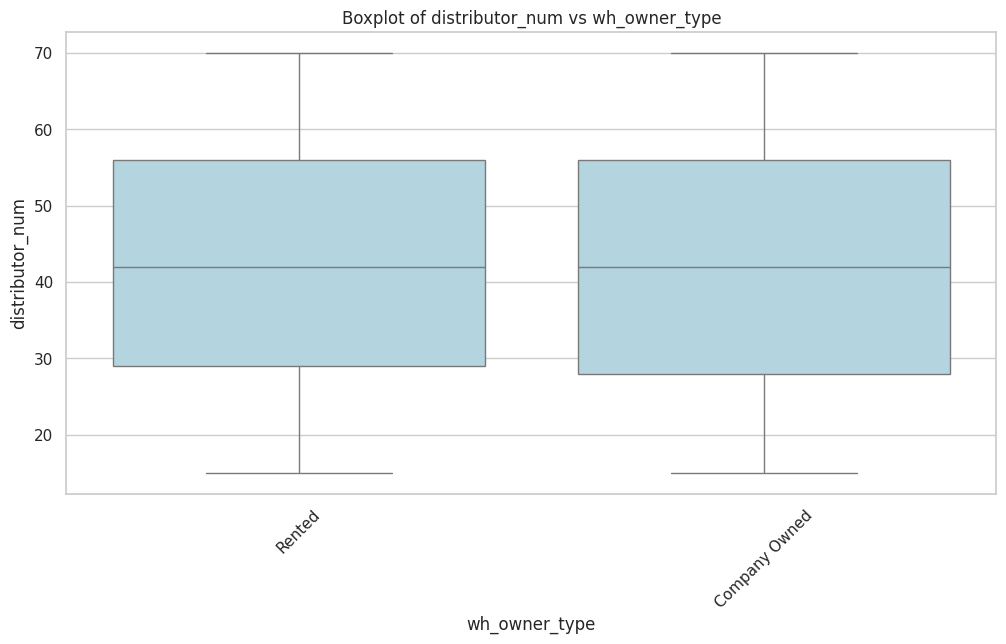

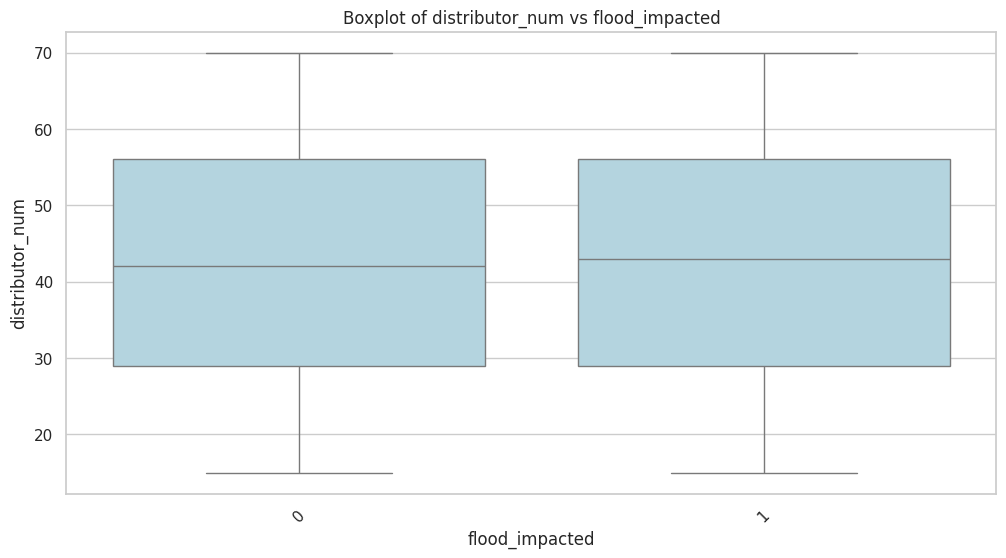

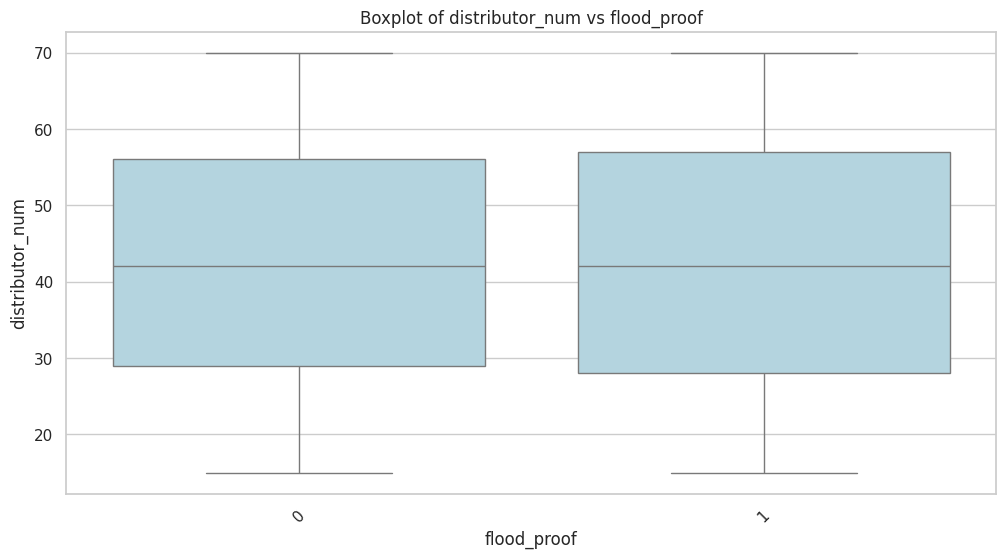

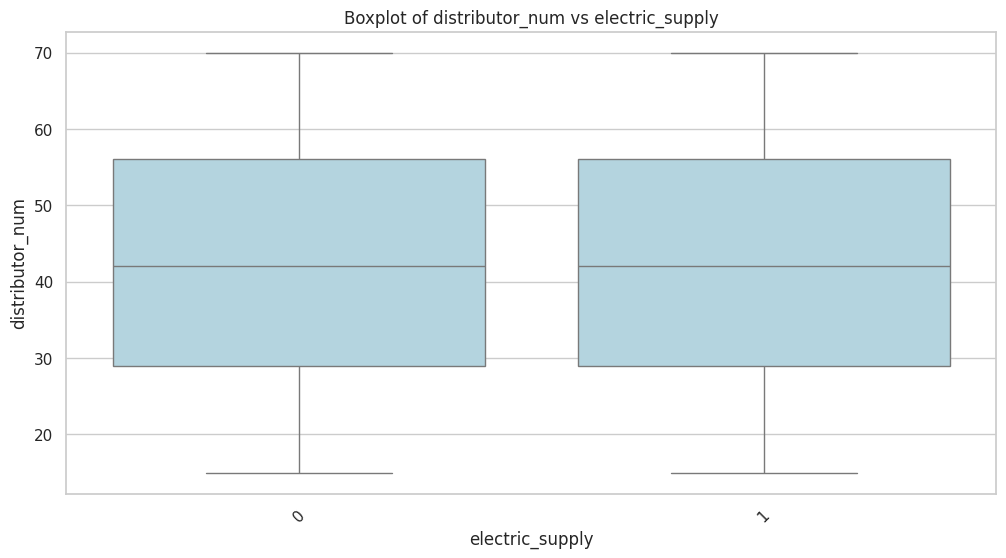

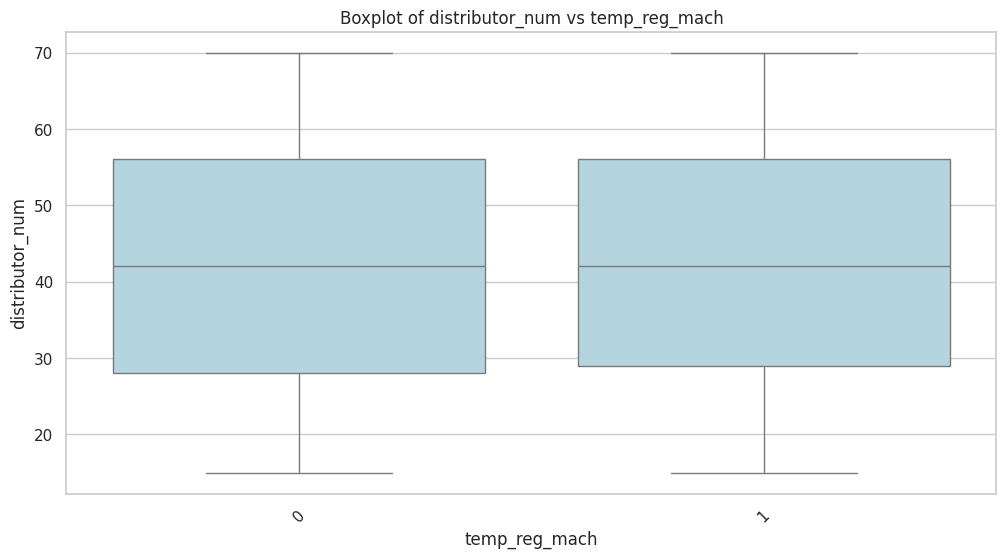

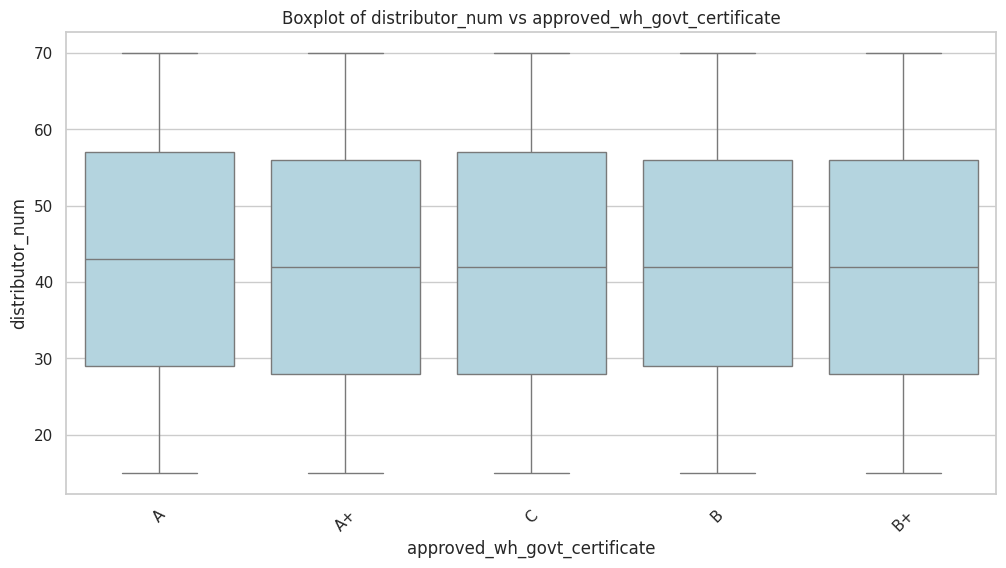

In [29]:
plot_boxplots(df, 'distributor_num')

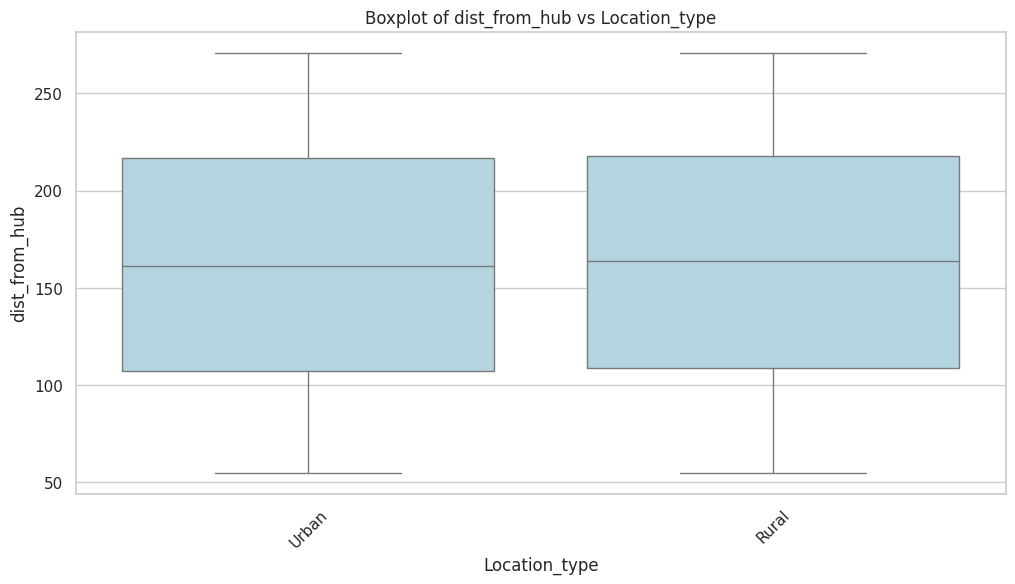

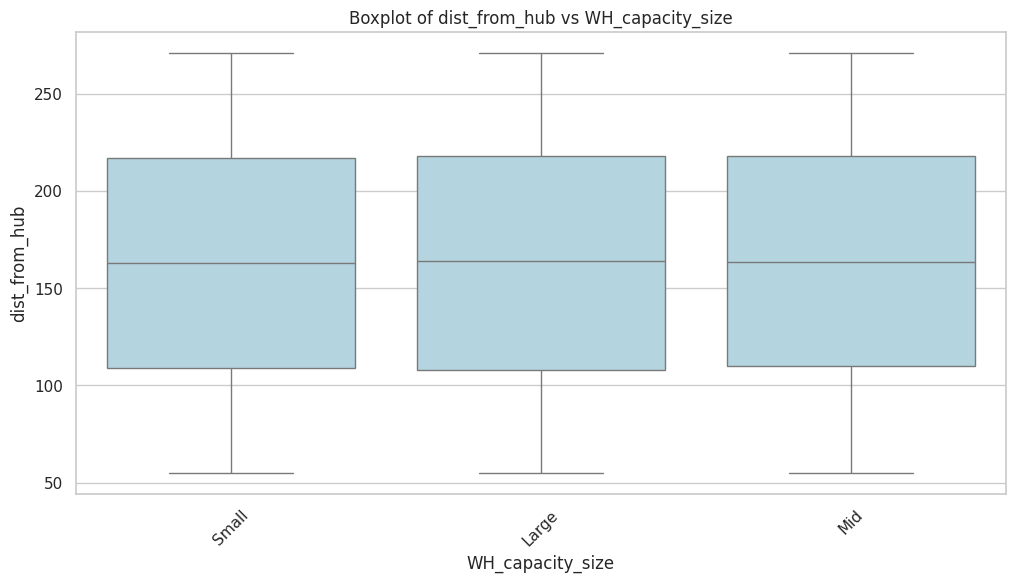

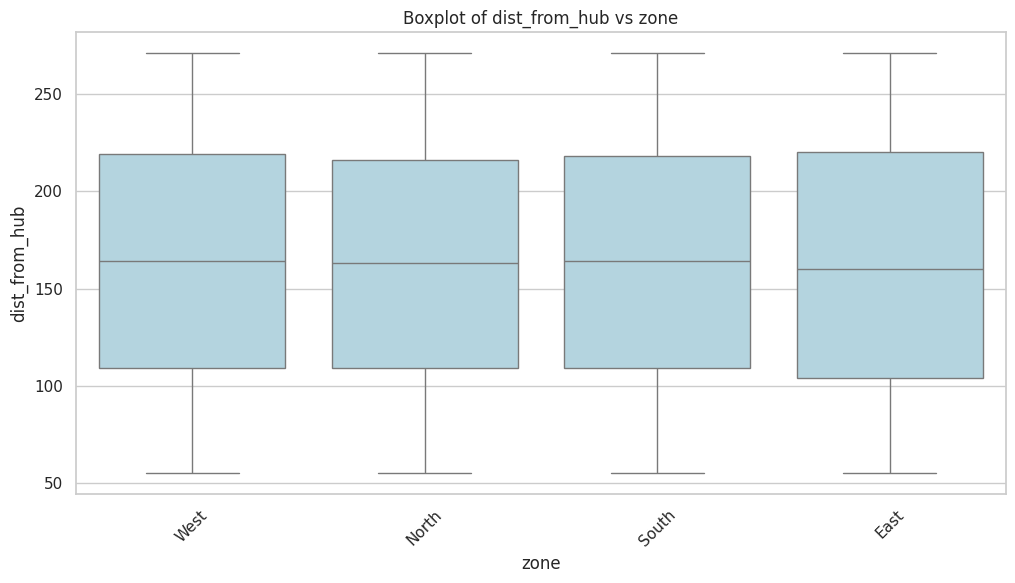

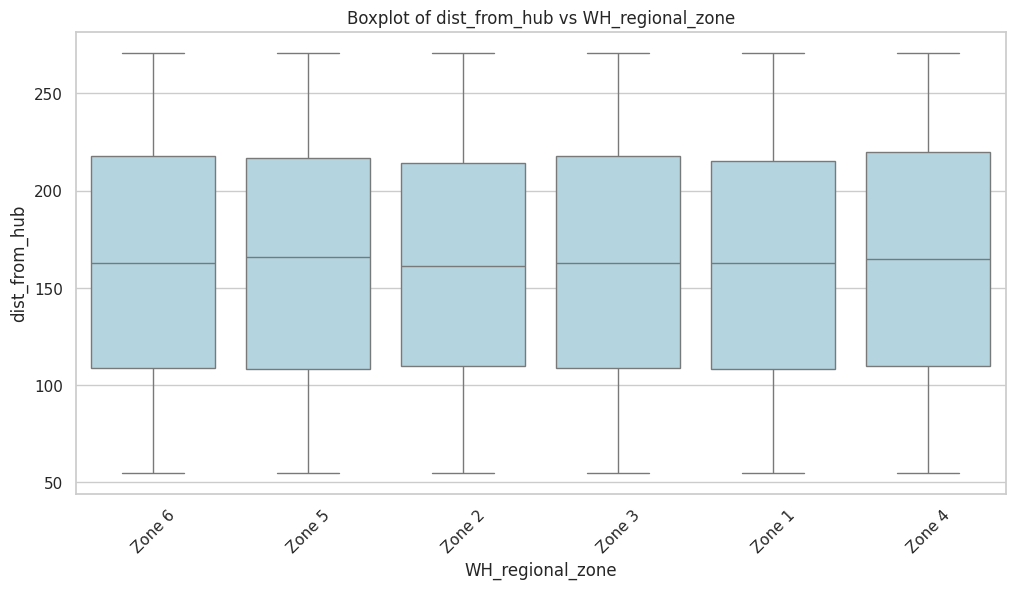

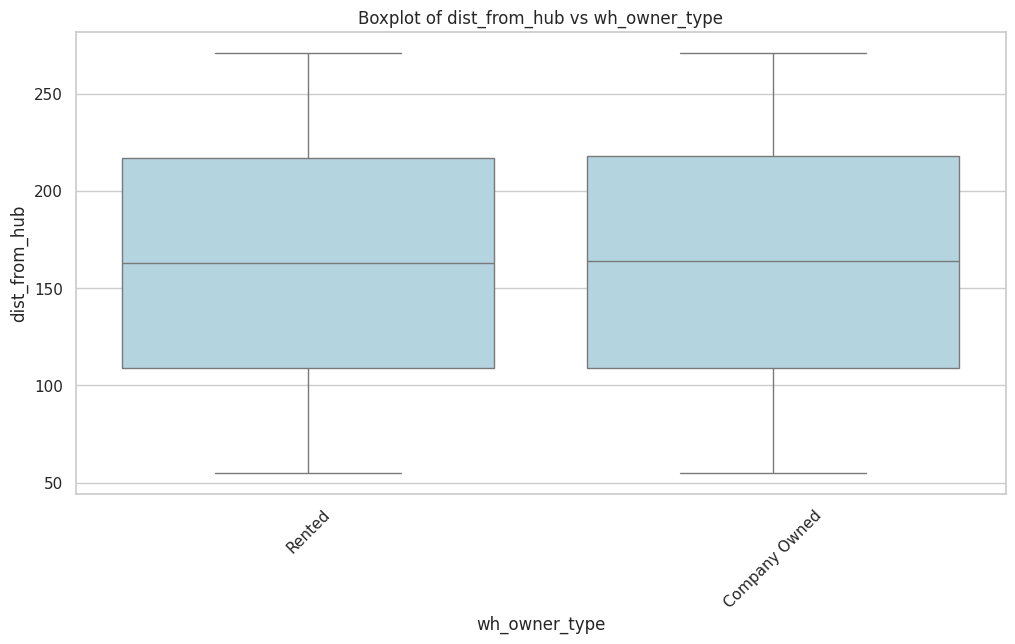

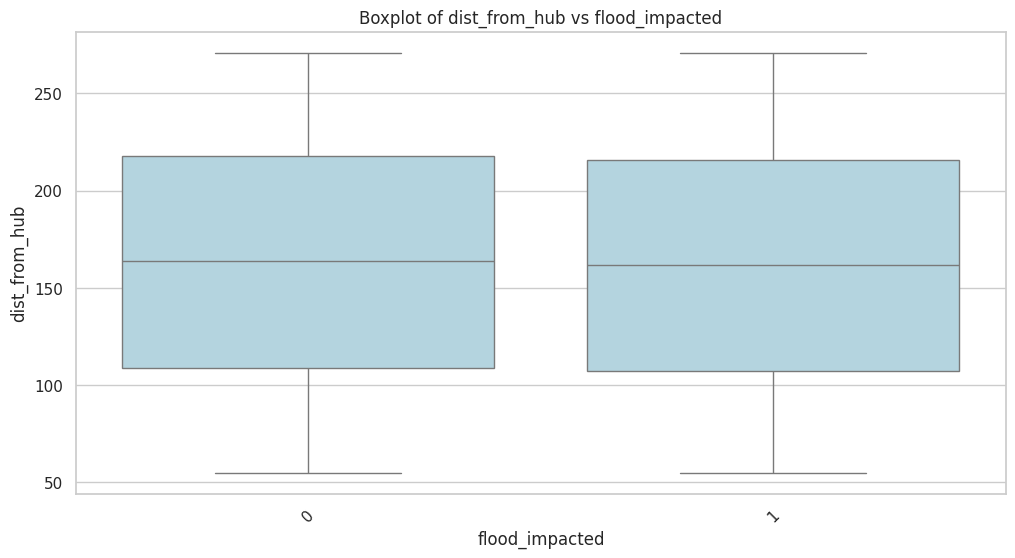

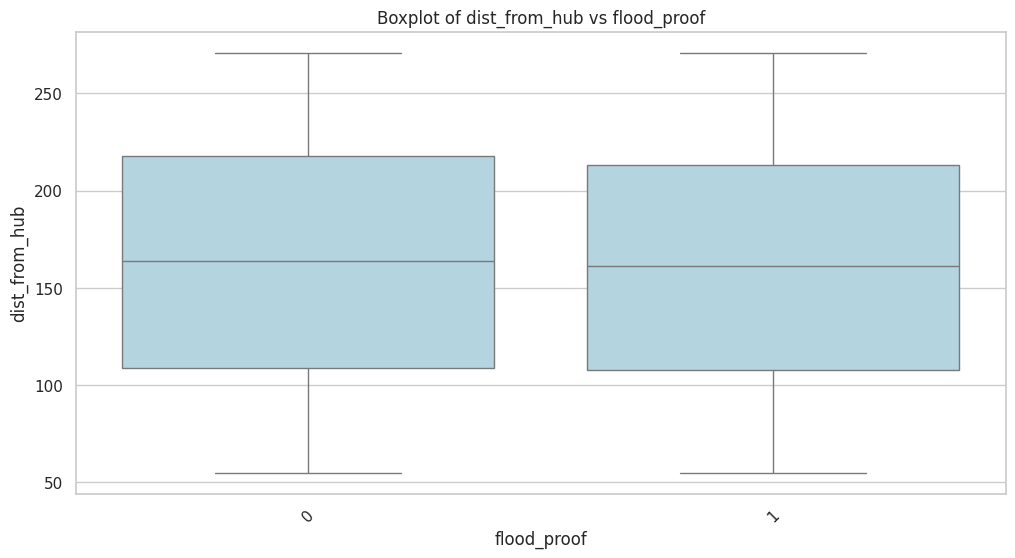

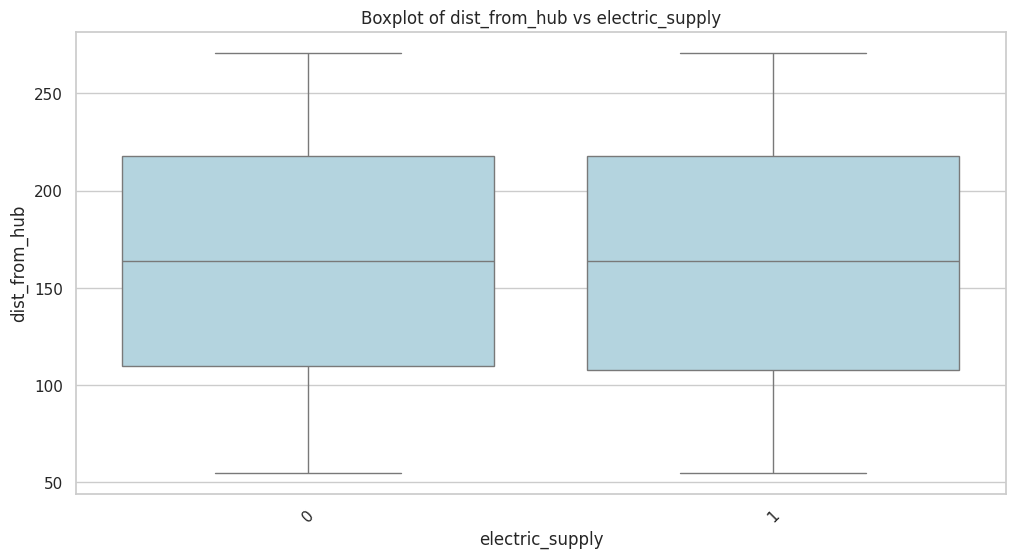

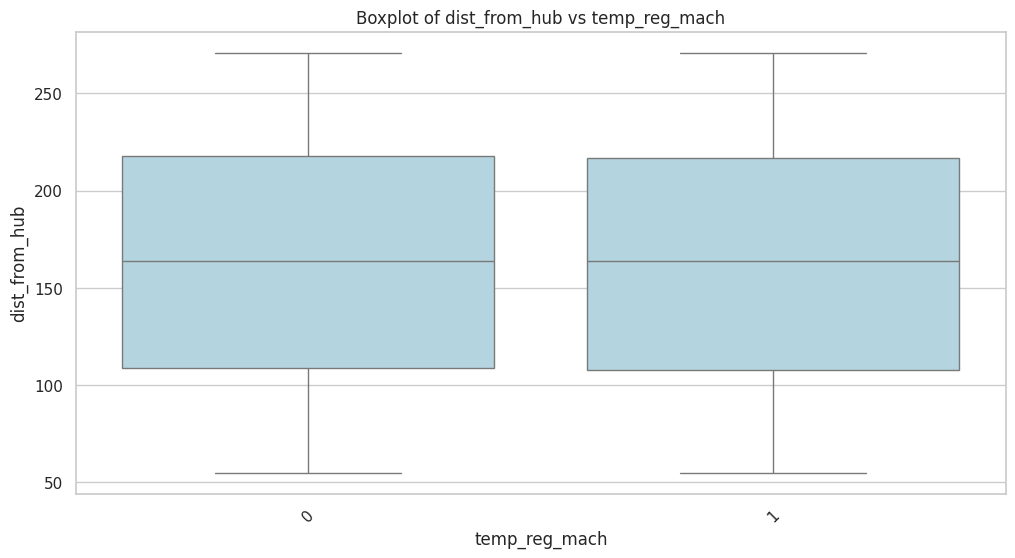

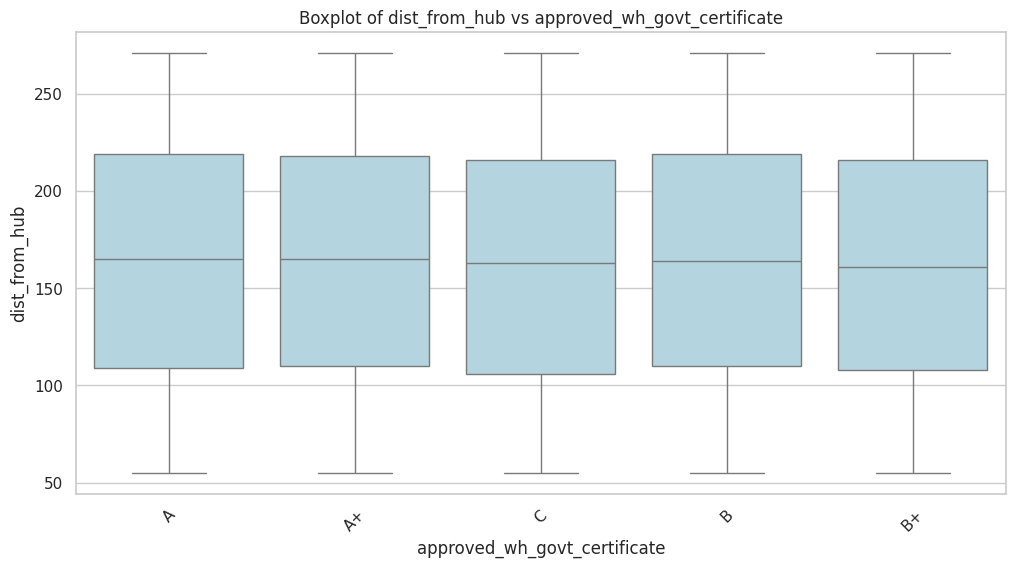

In [30]:
plot_boxplots(df, 'dist_from_hub')

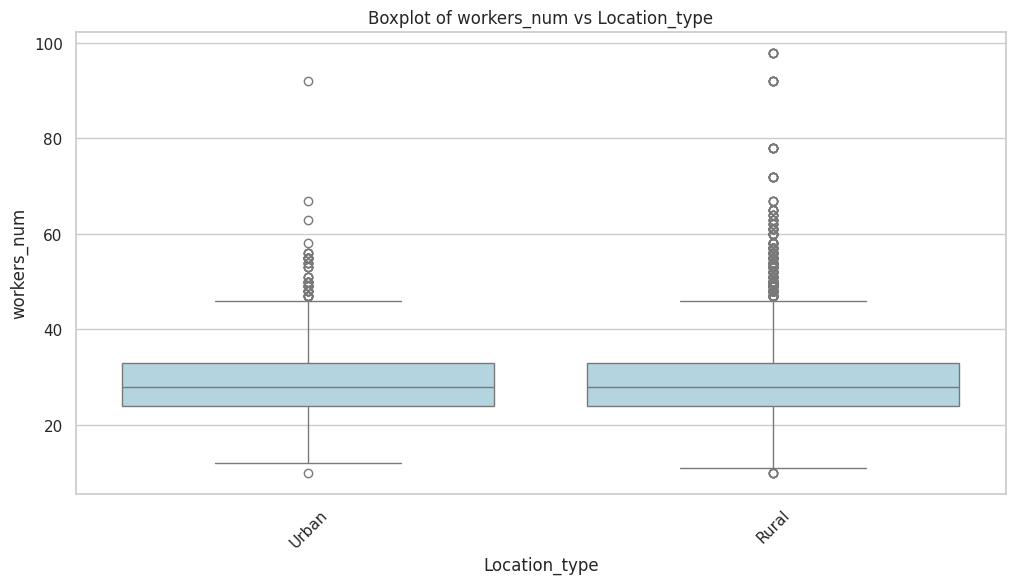

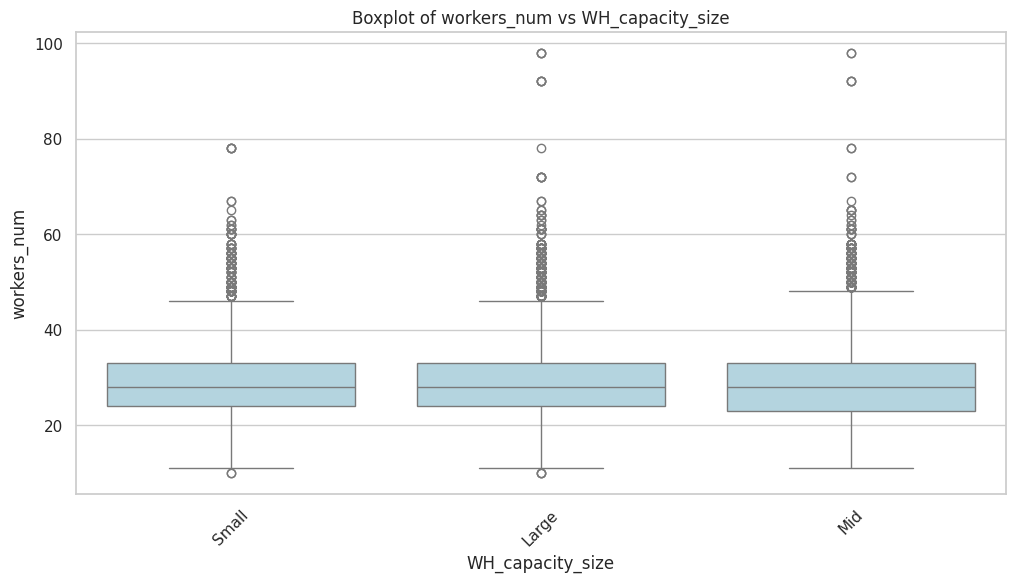

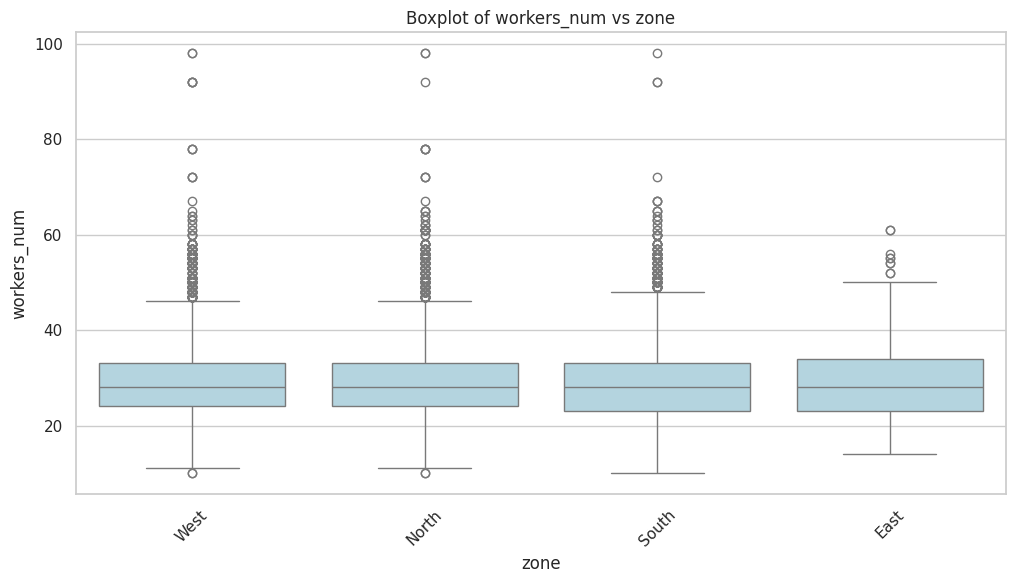

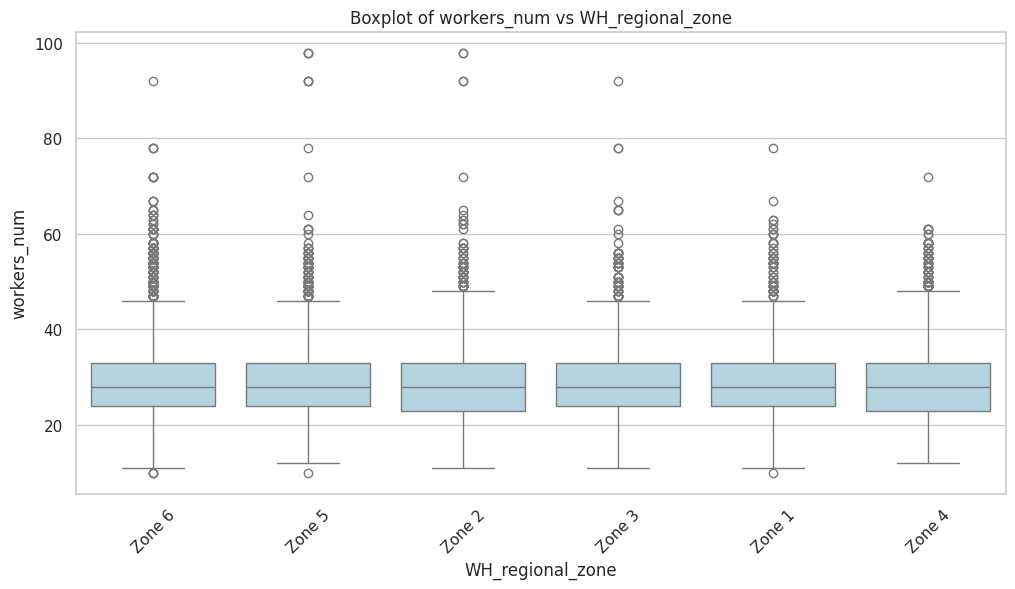

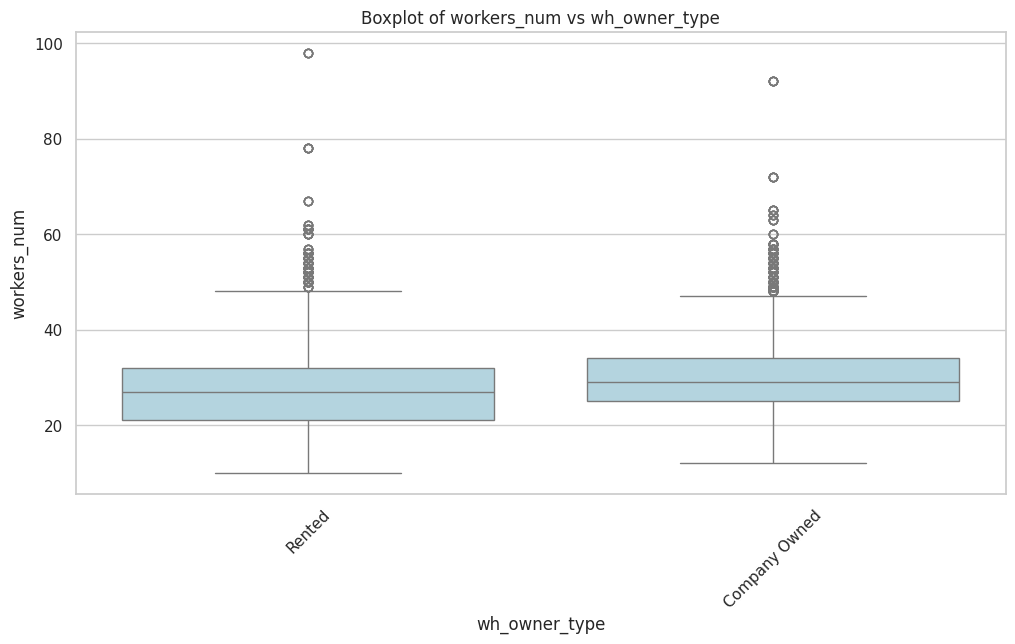

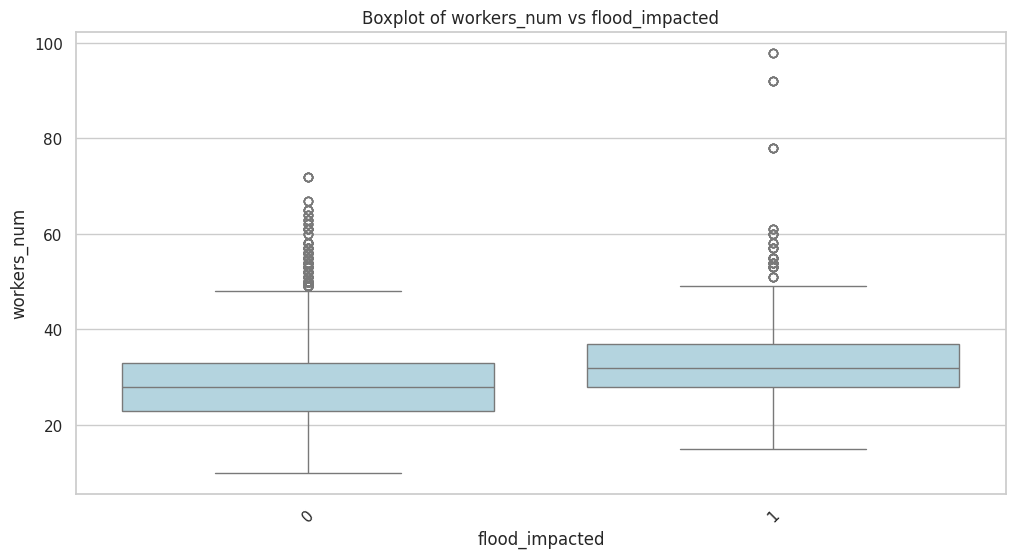

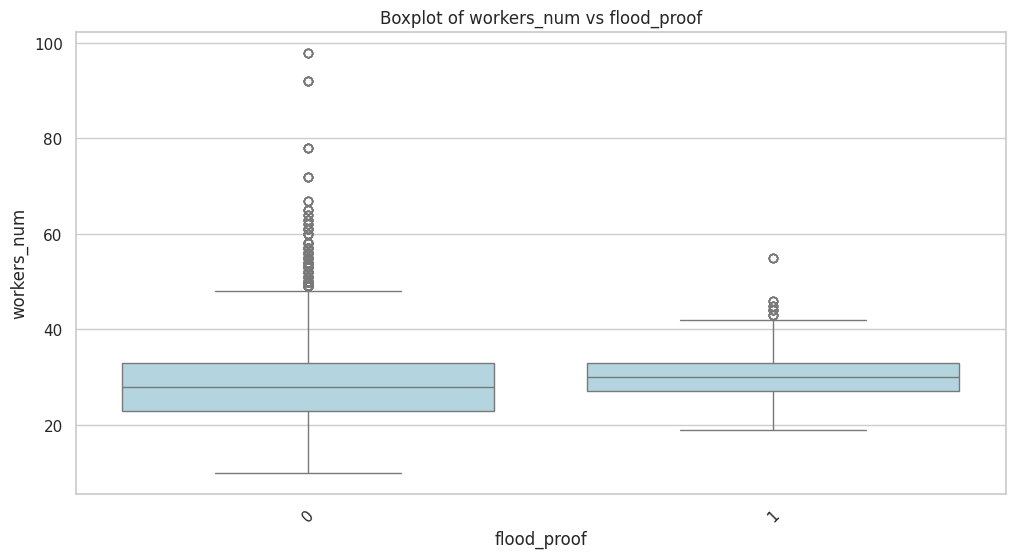

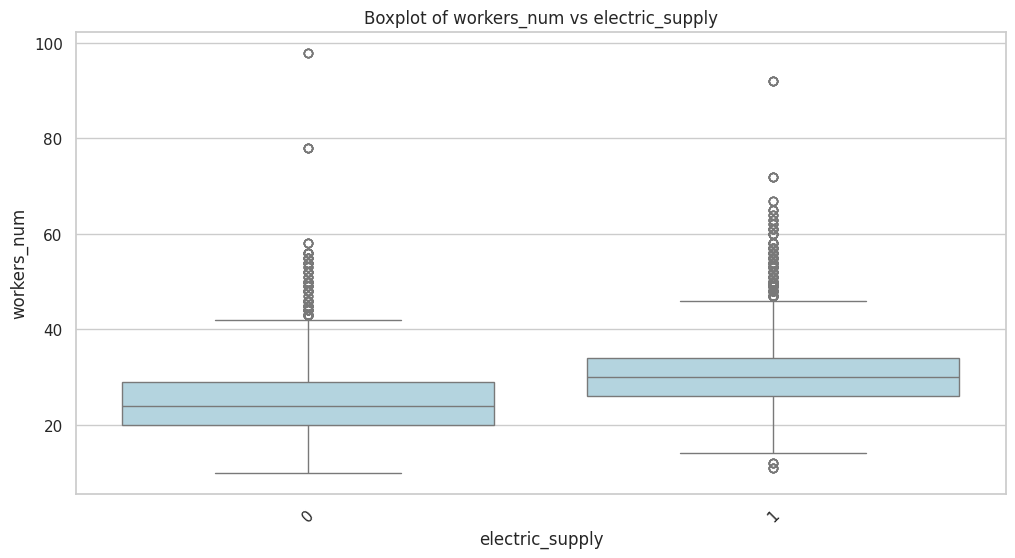

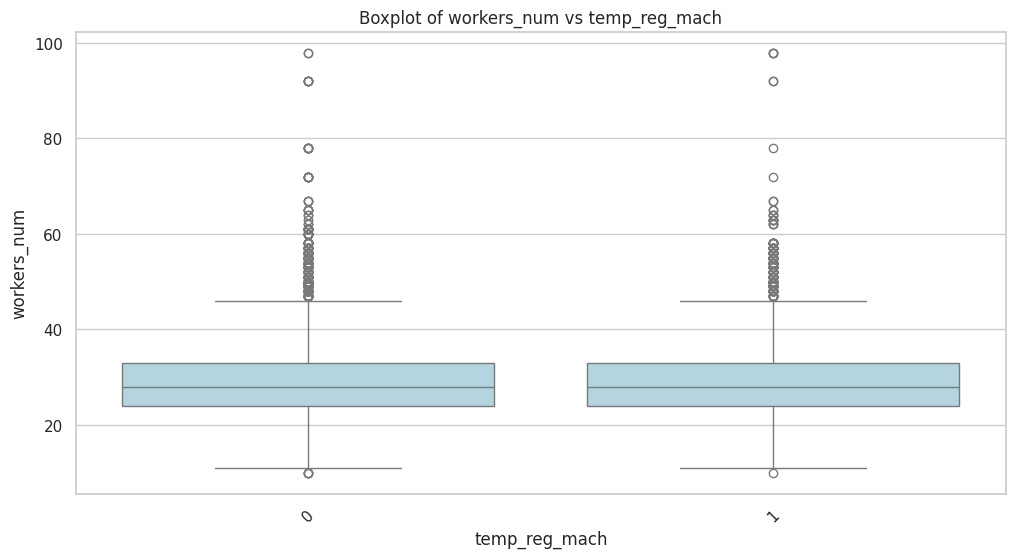

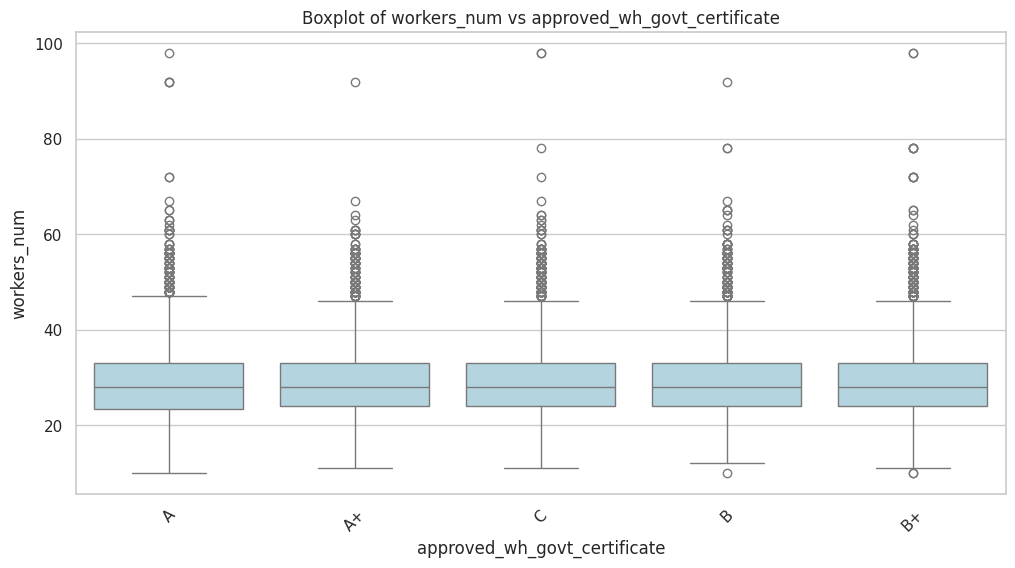

In [31]:
plot_boxplots(df, 'workers_num')

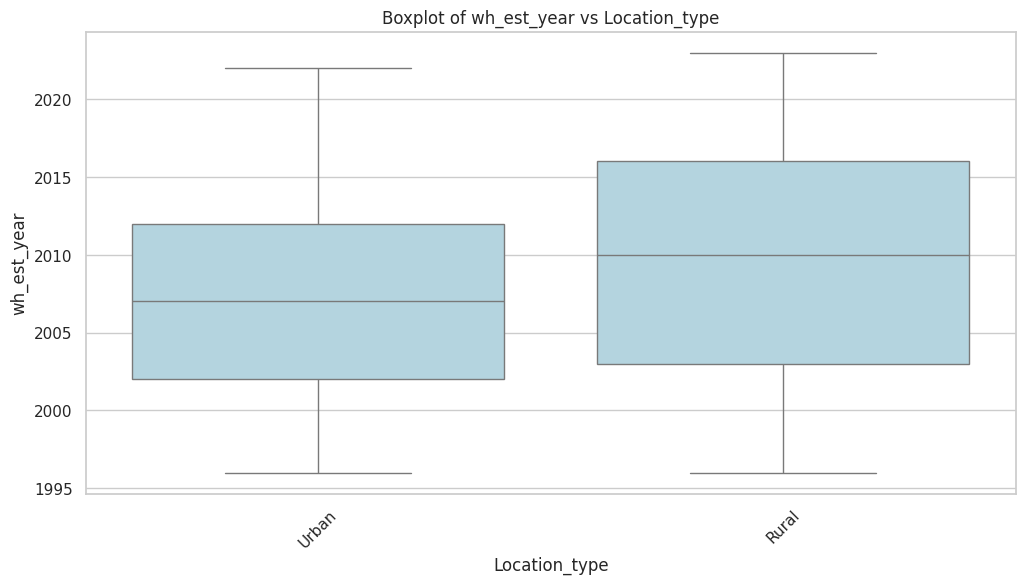

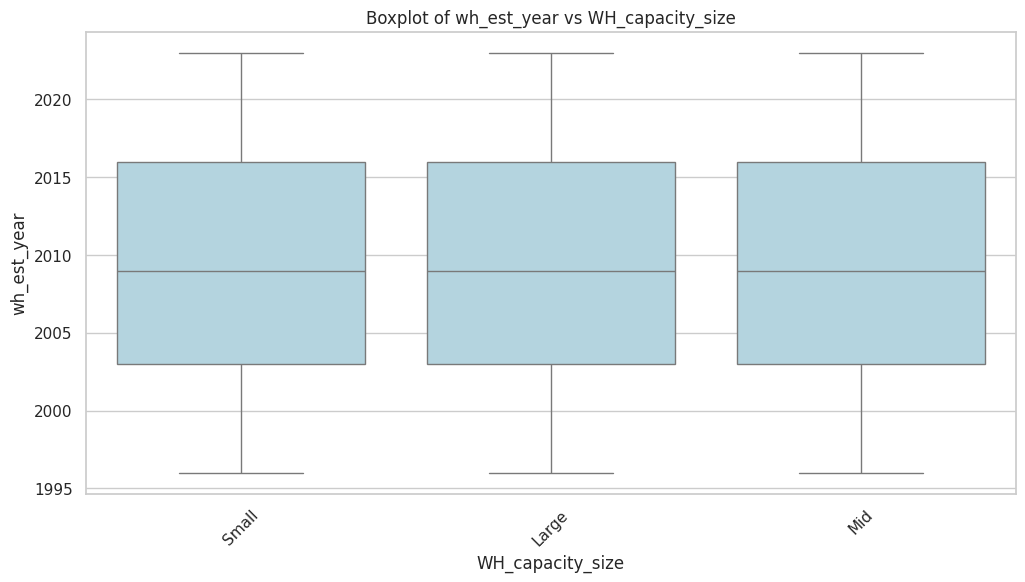

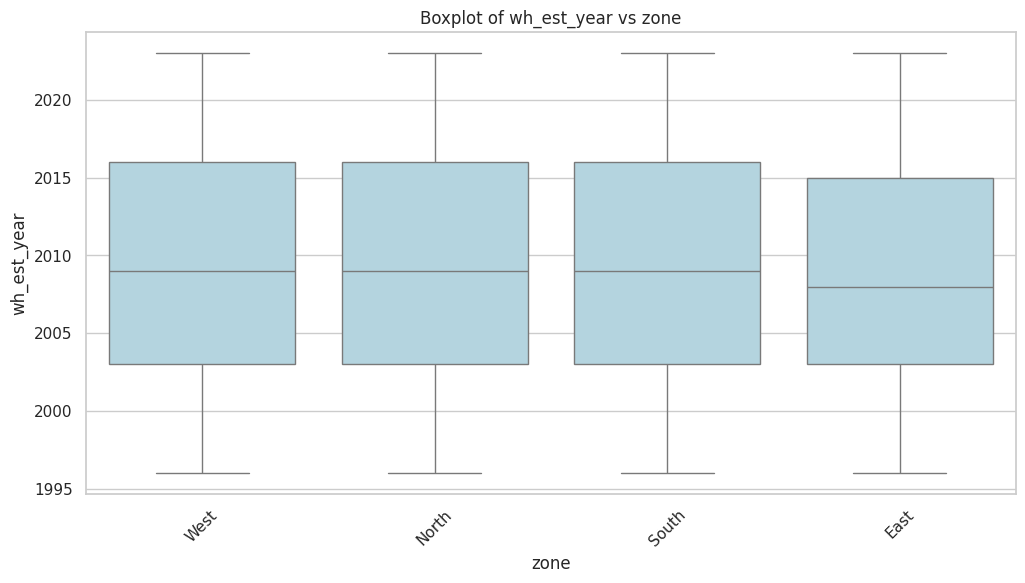

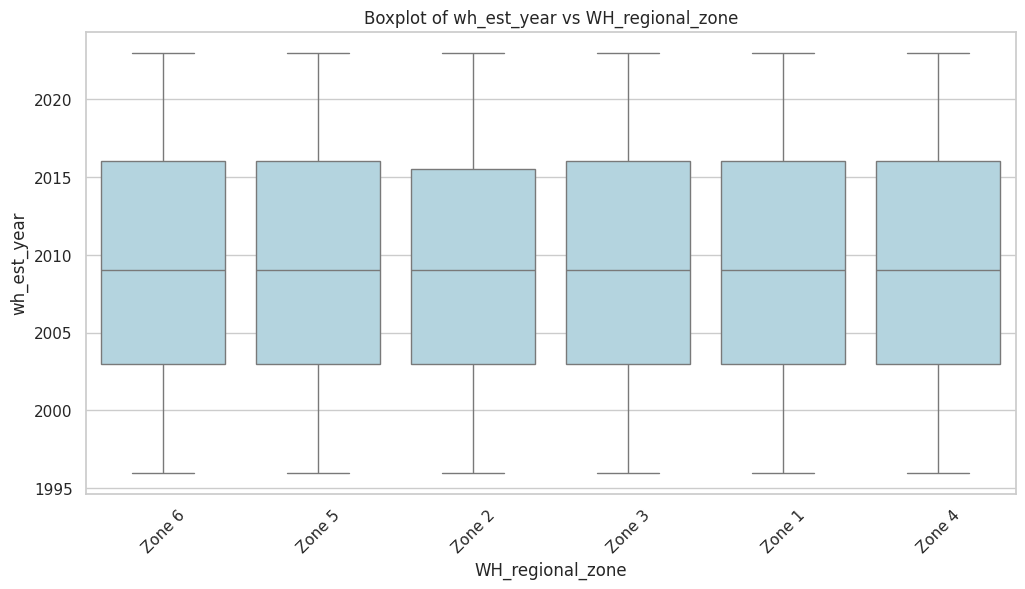

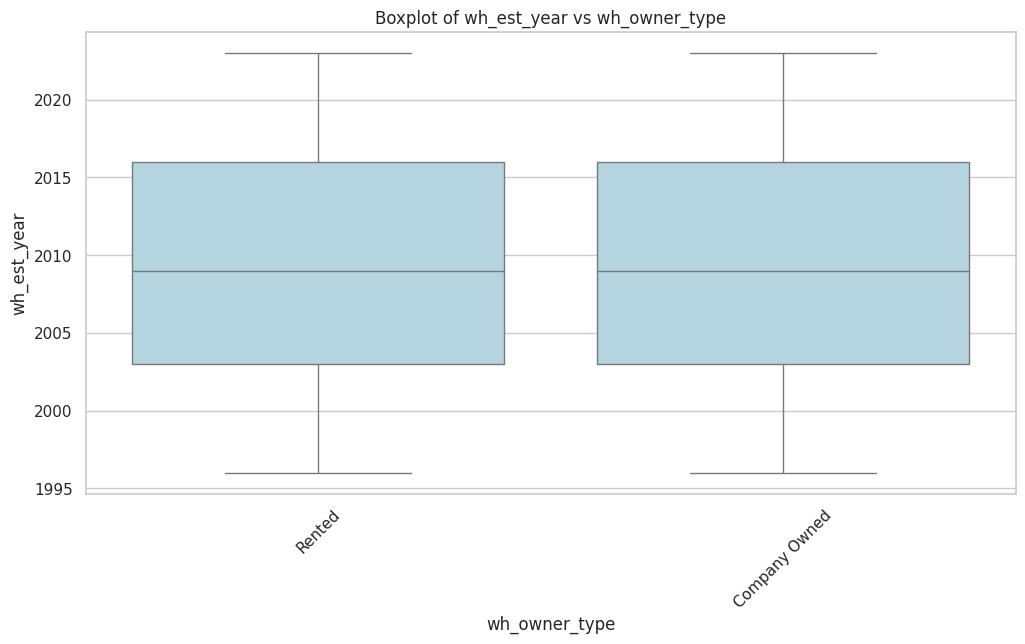

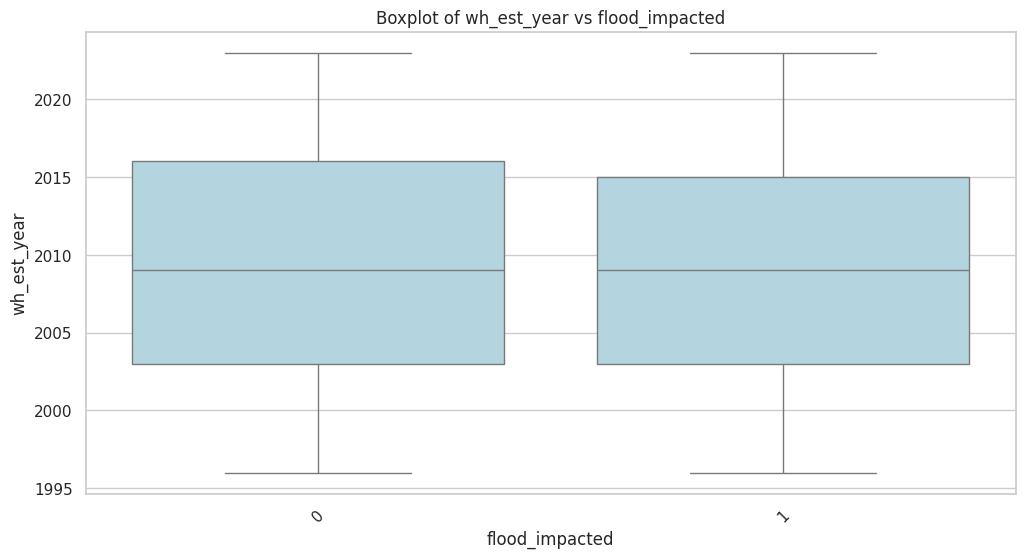

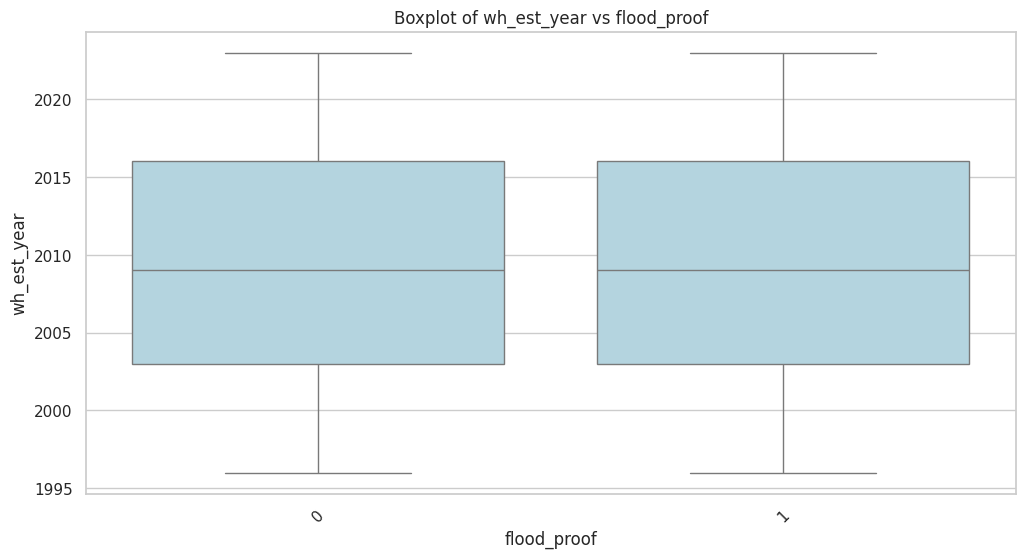

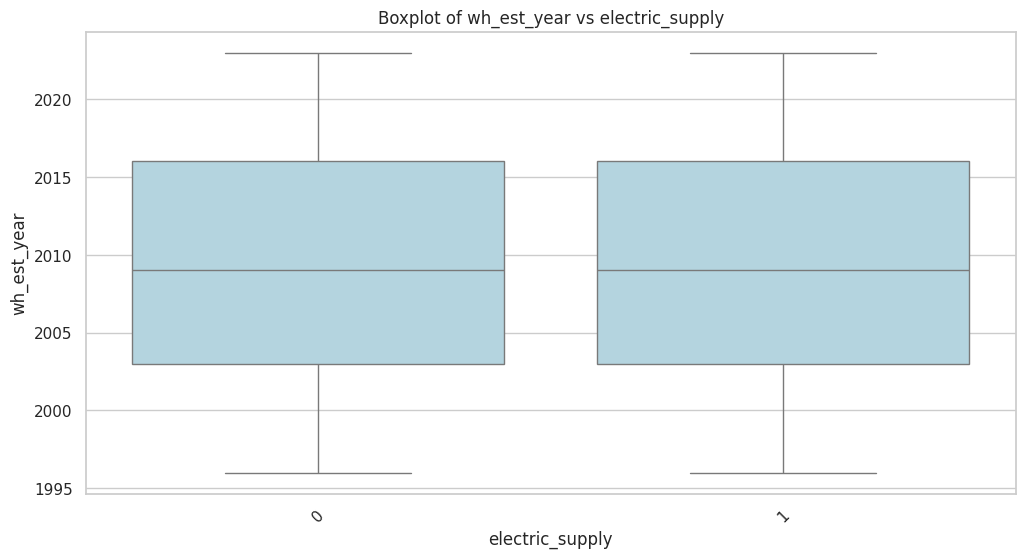

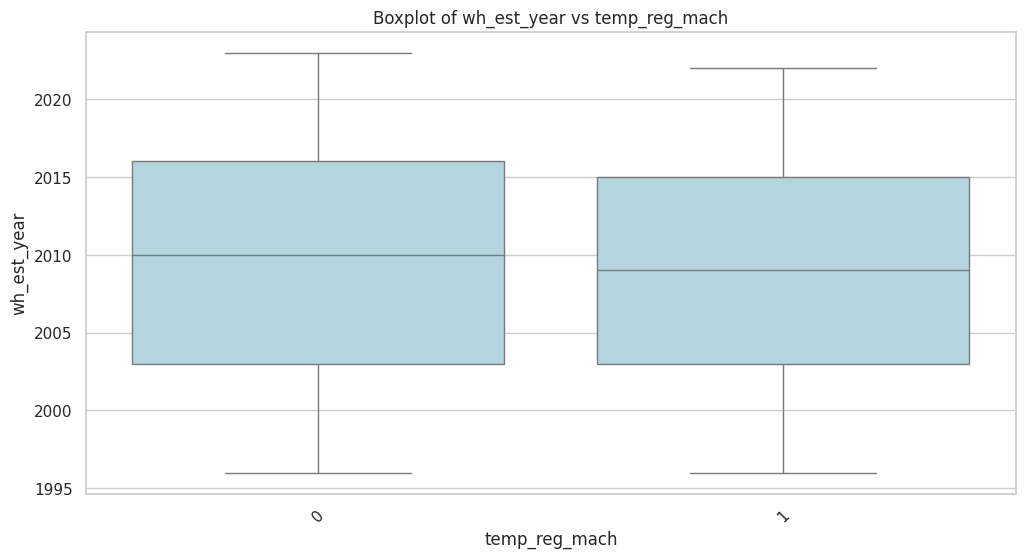

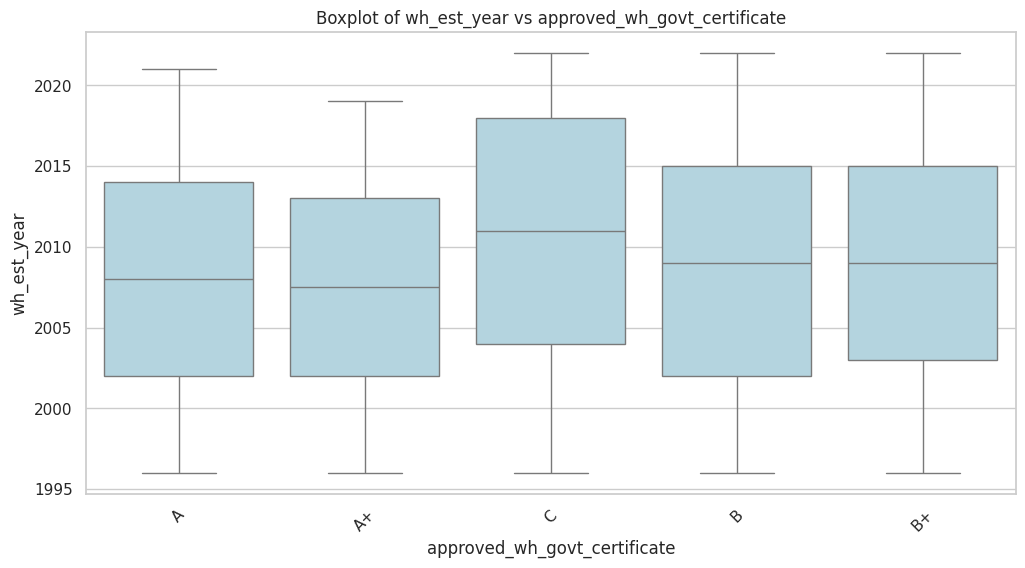

In [32]:
plot_boxplots(df, 'wh_est_year')

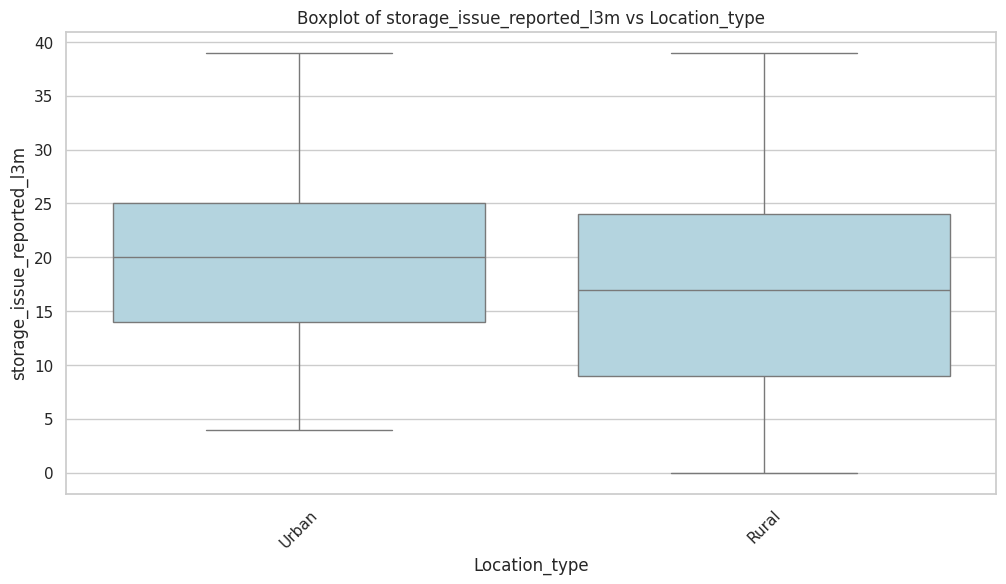

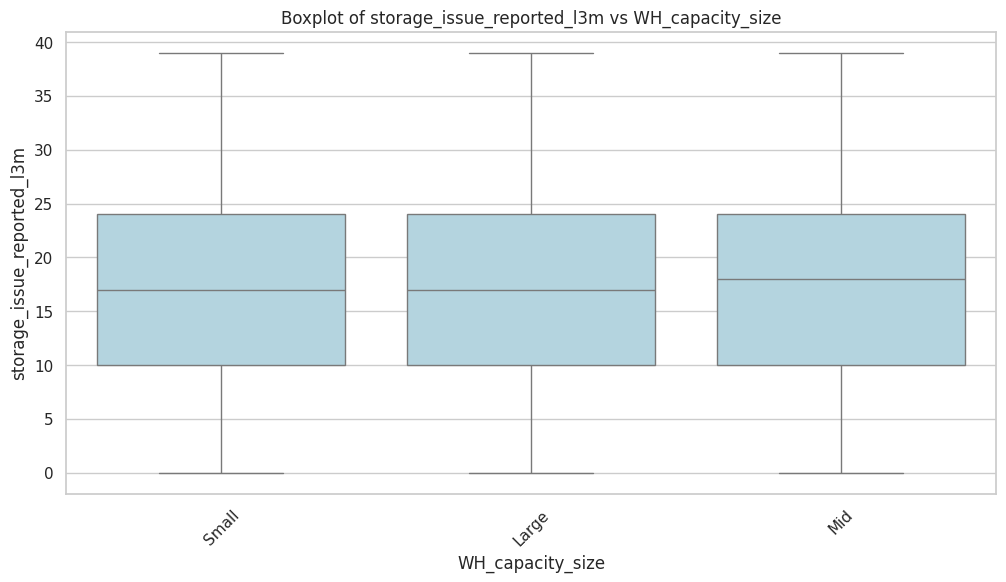

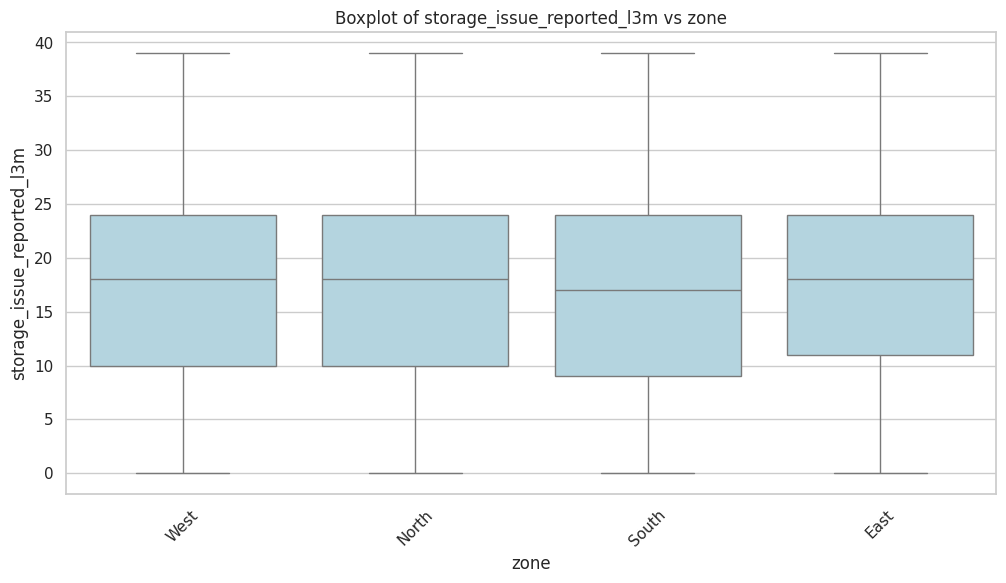

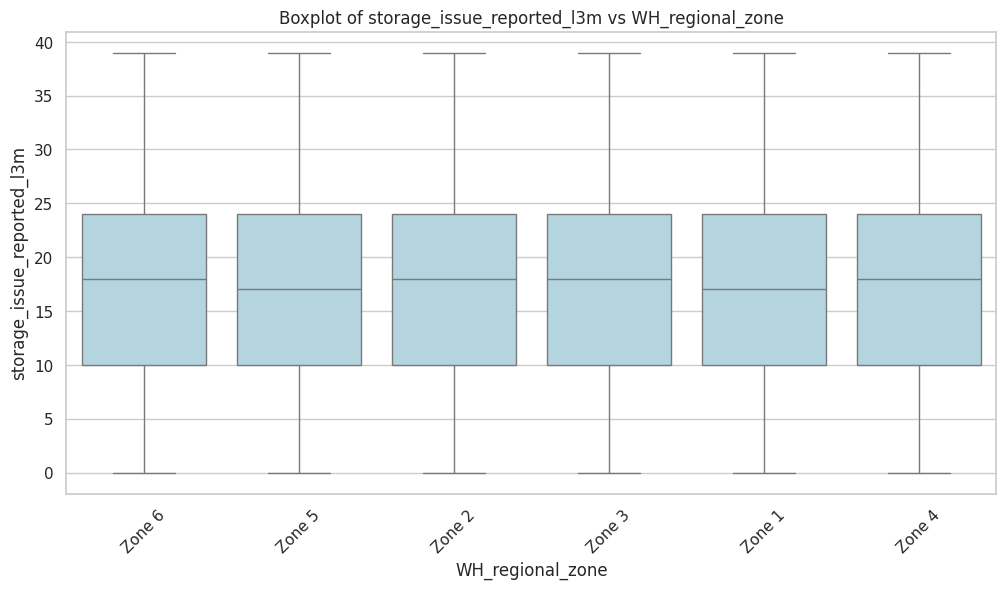

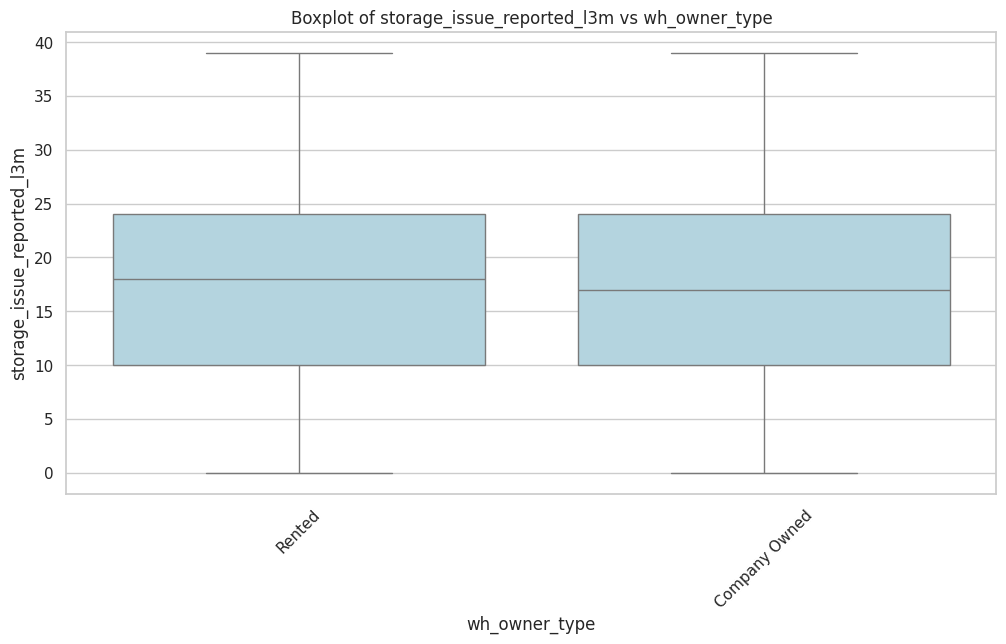

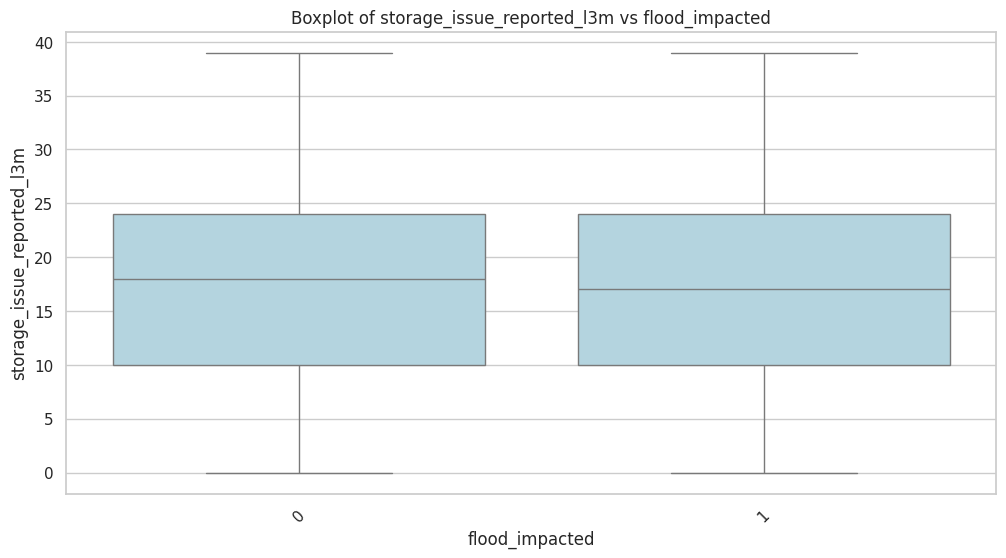

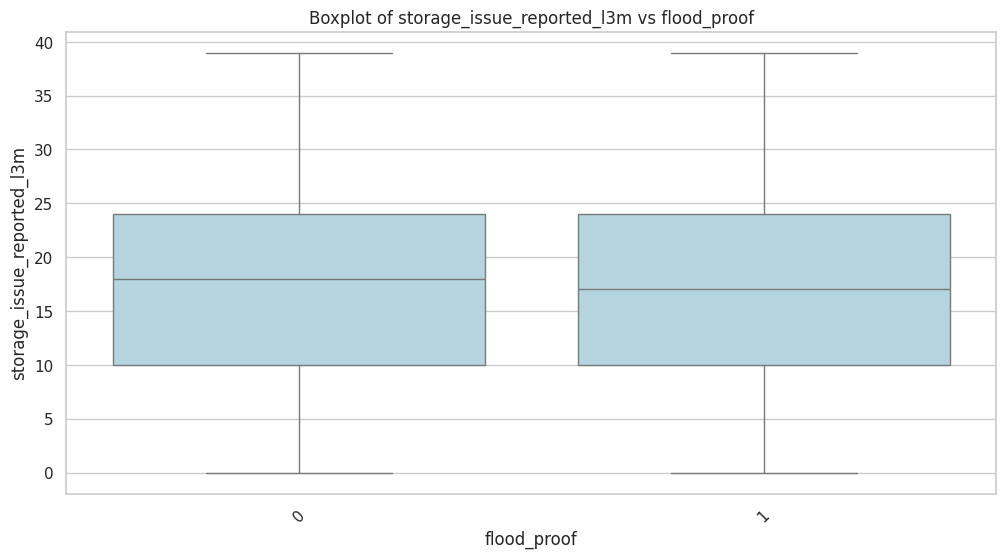

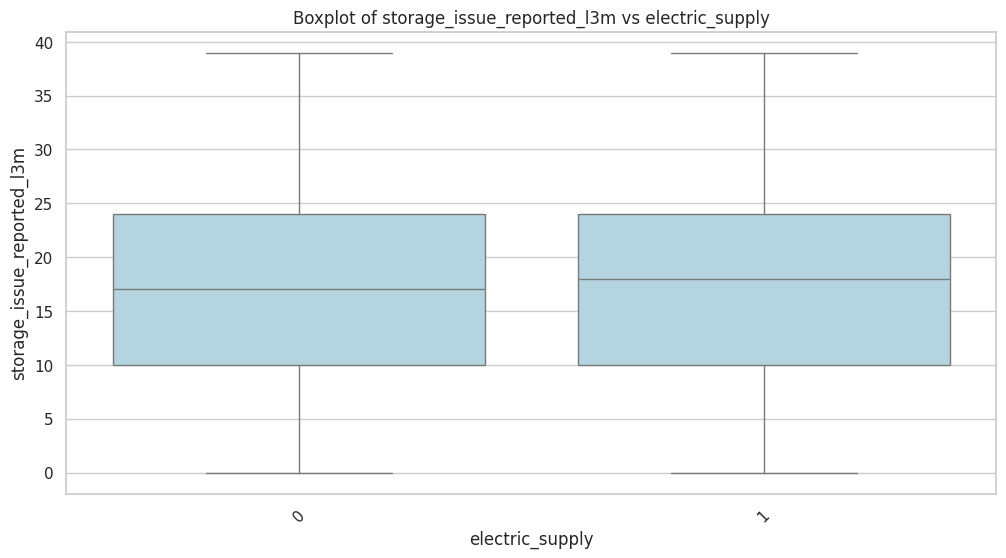

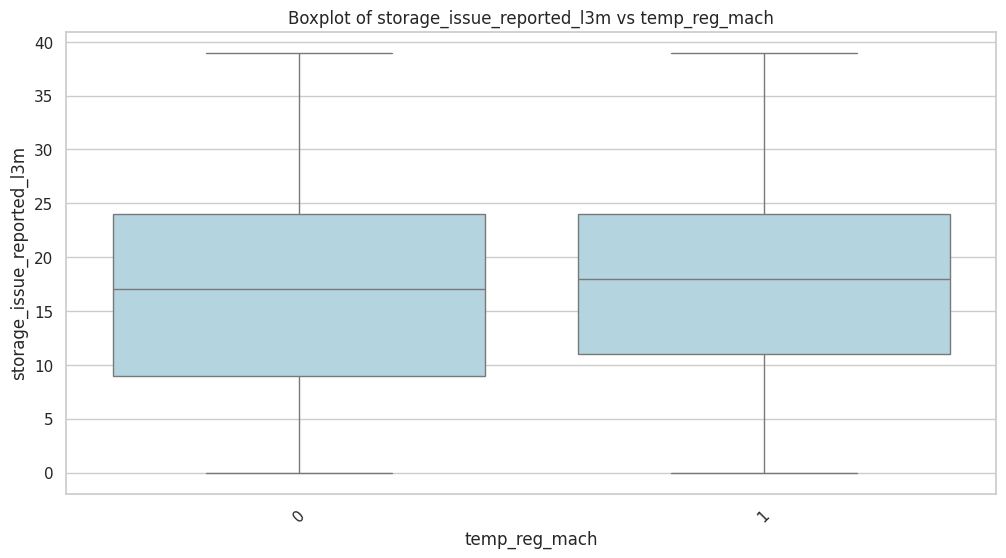

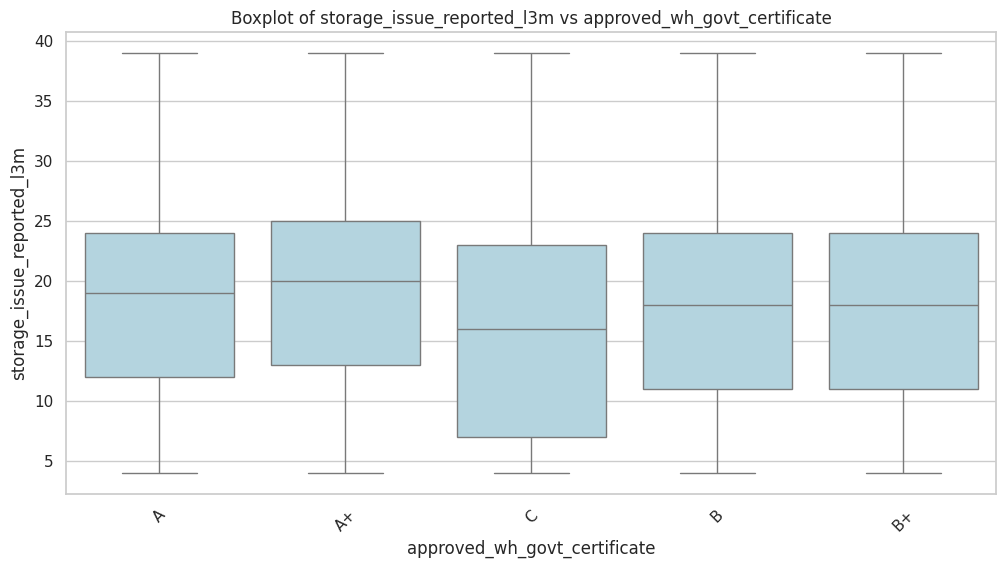

In [33]:
plot_boxplots(df, 'storage_issue_reported_l3m')

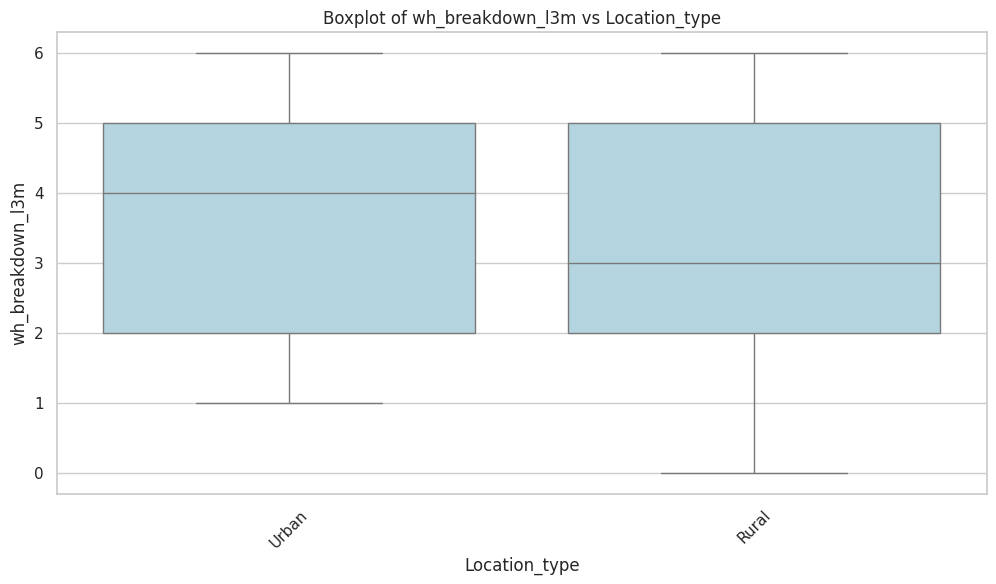

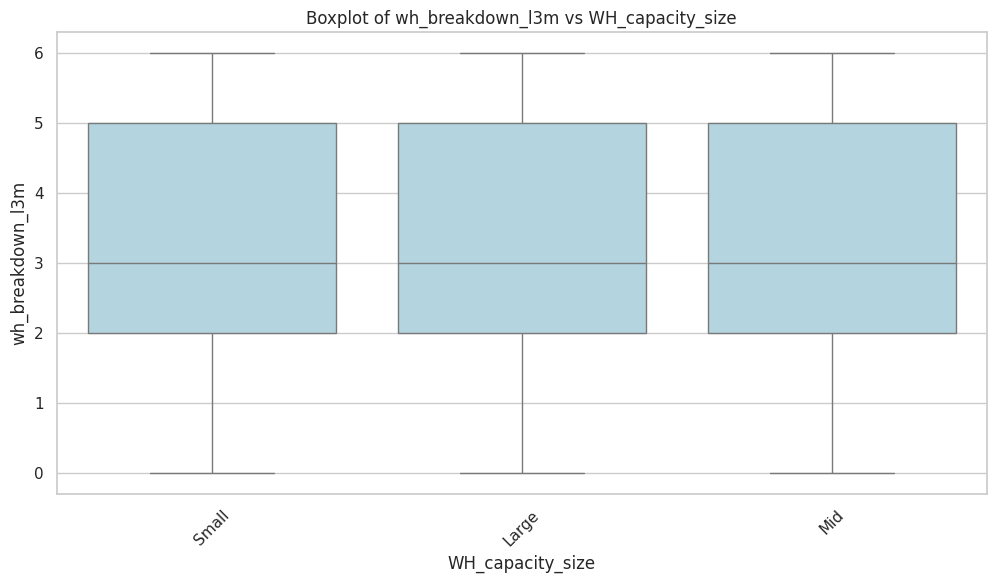

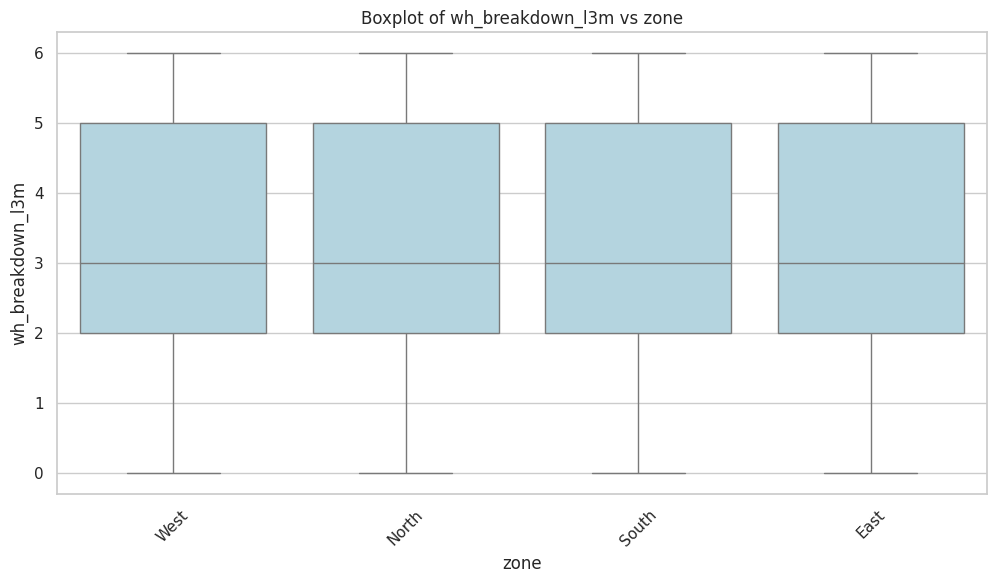

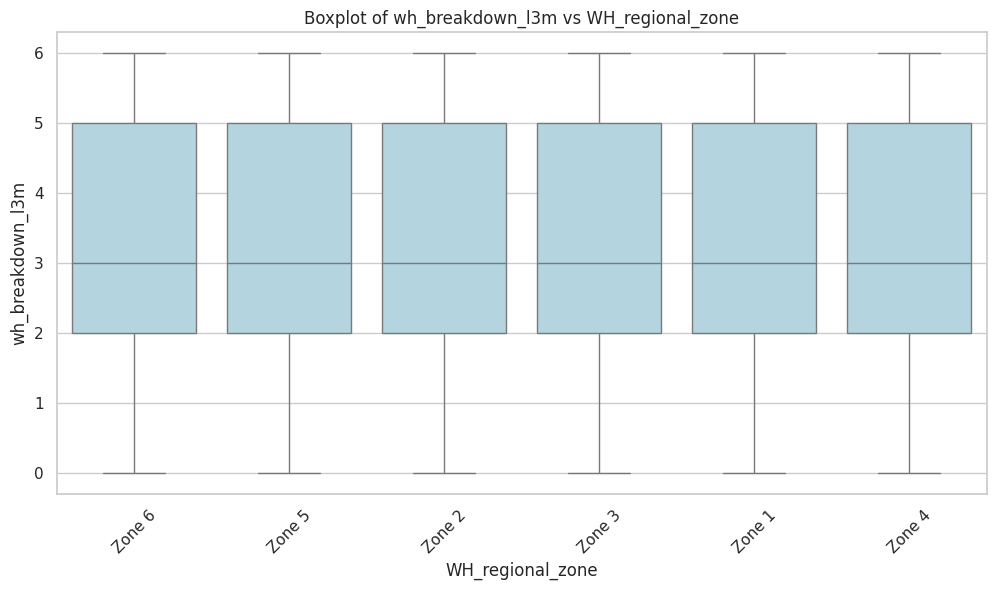

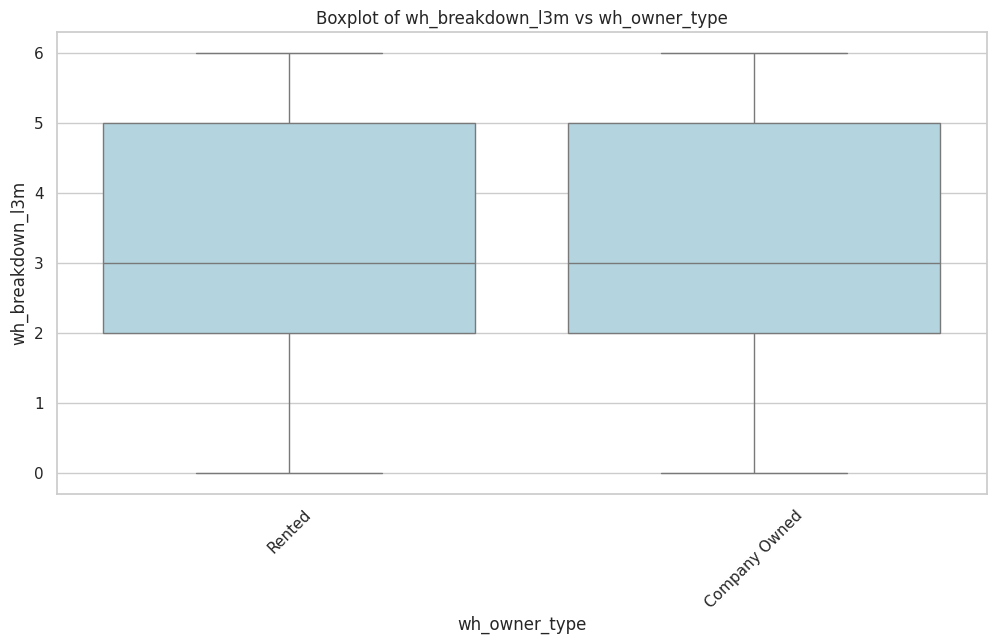

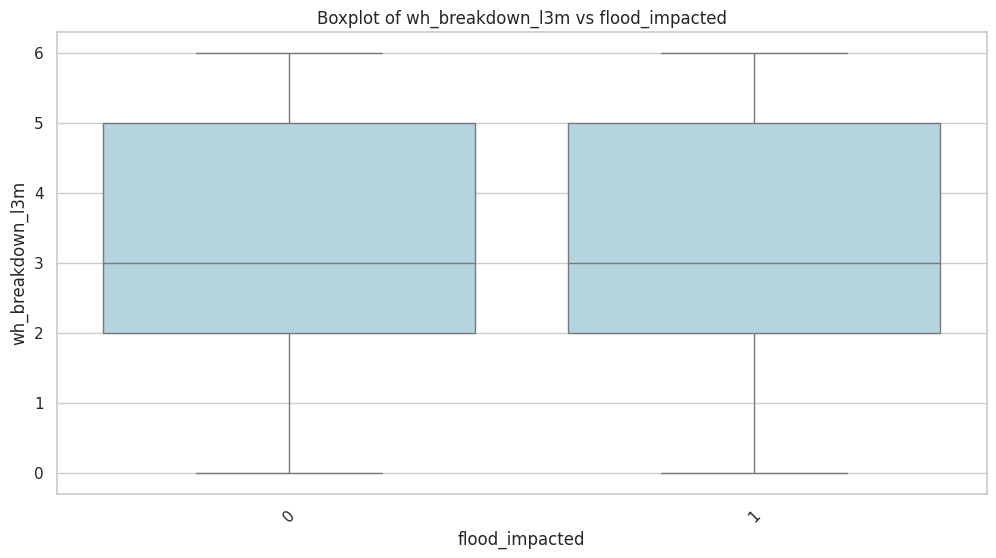

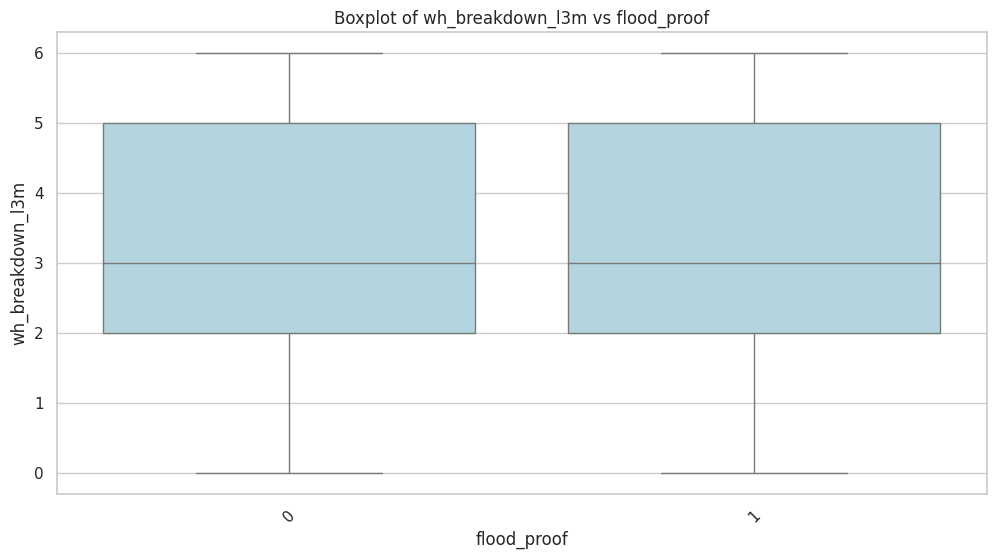

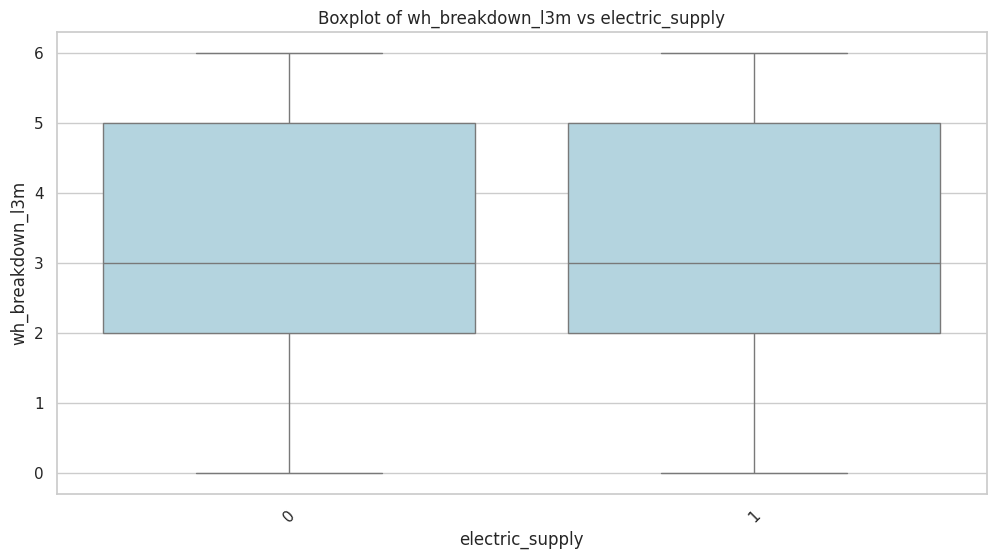

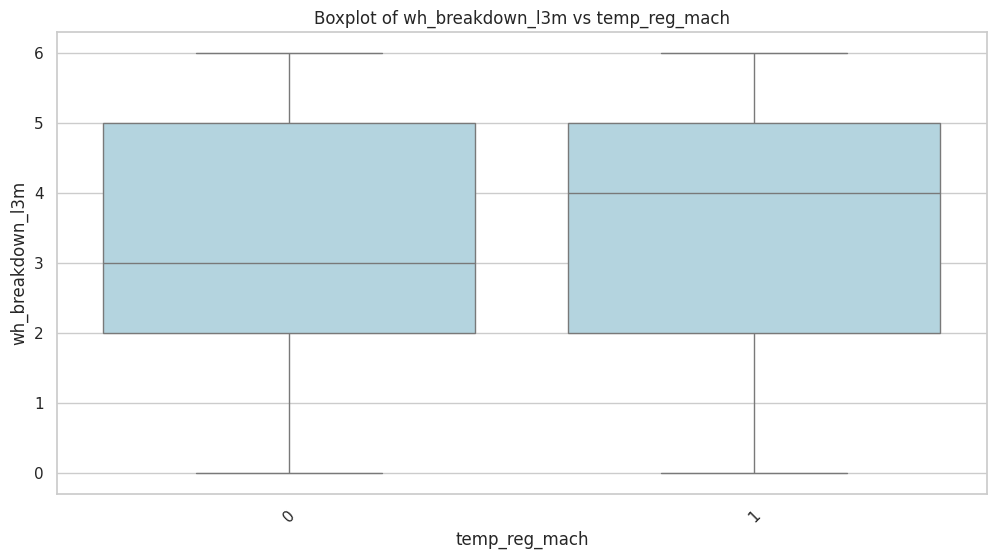

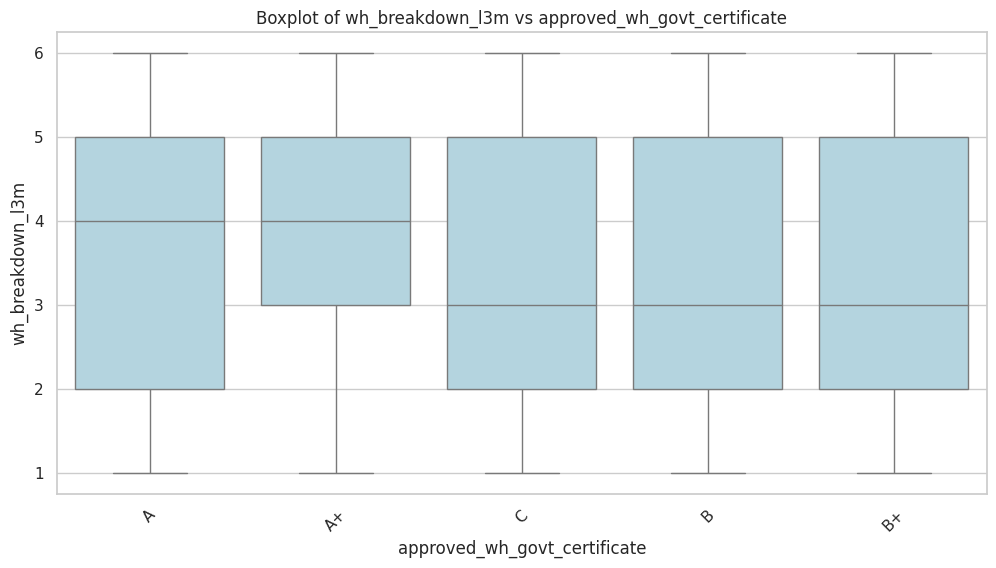

In [34]:
plot_boxplots(df, 'wh_breakdown_l3m')

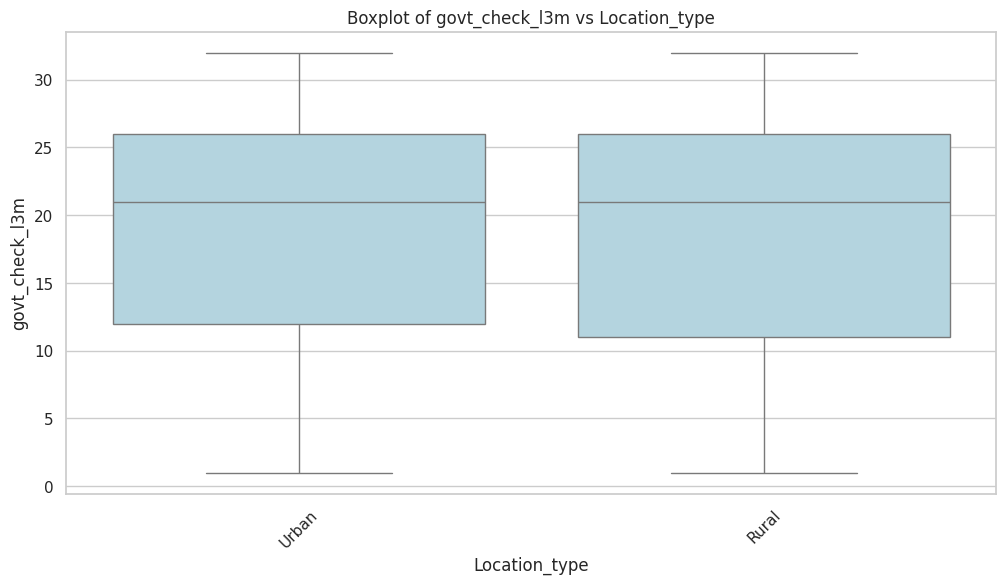

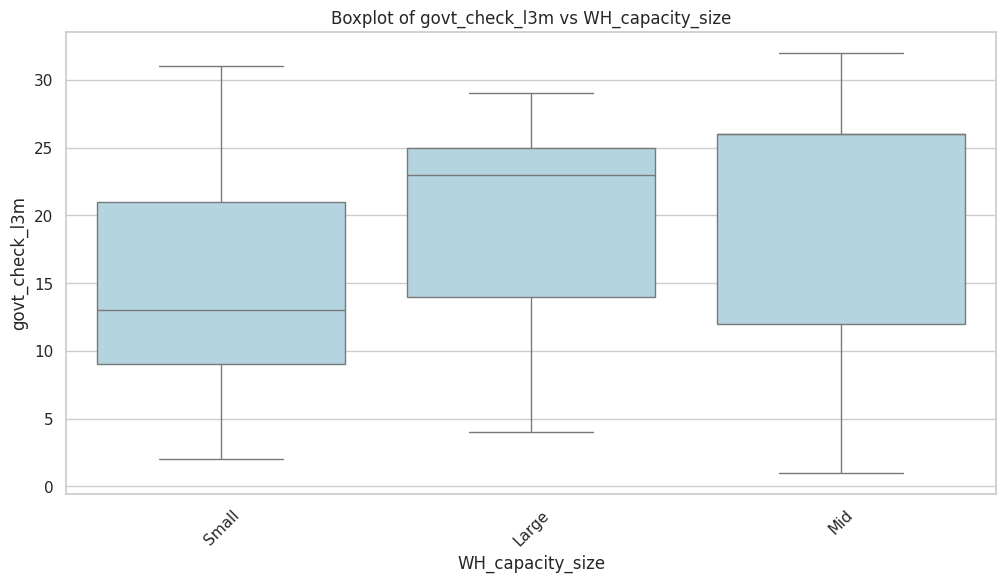

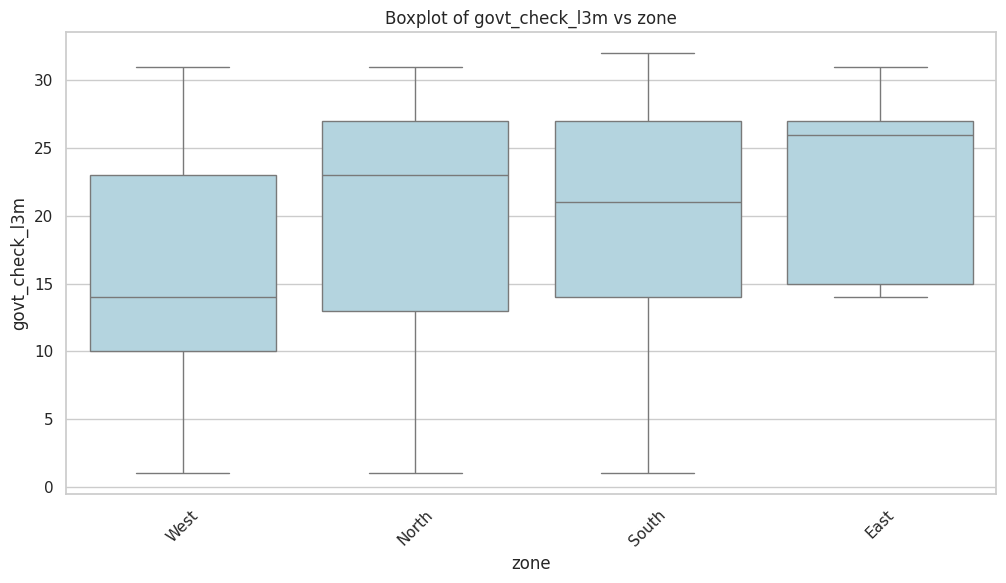

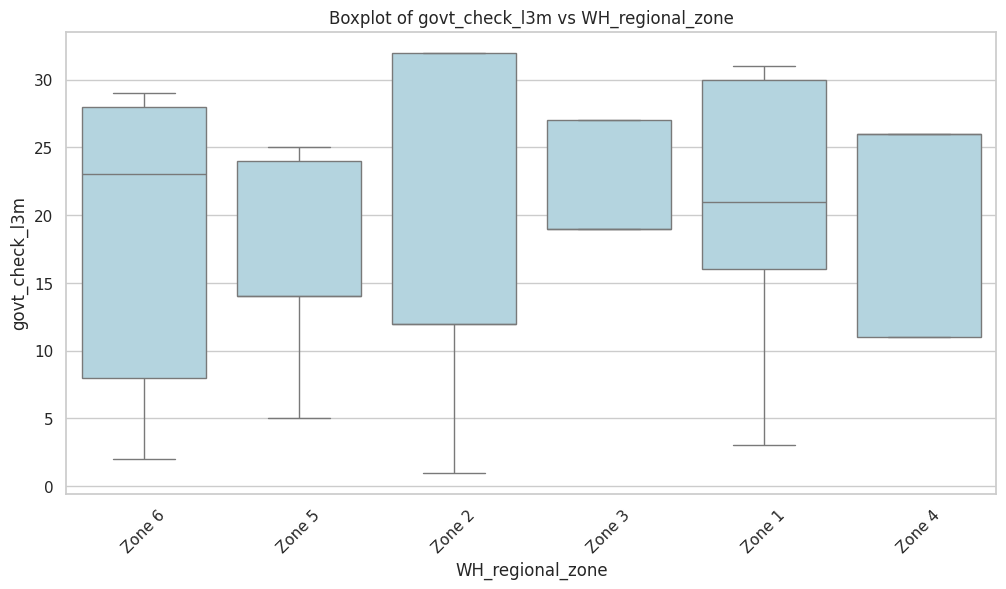

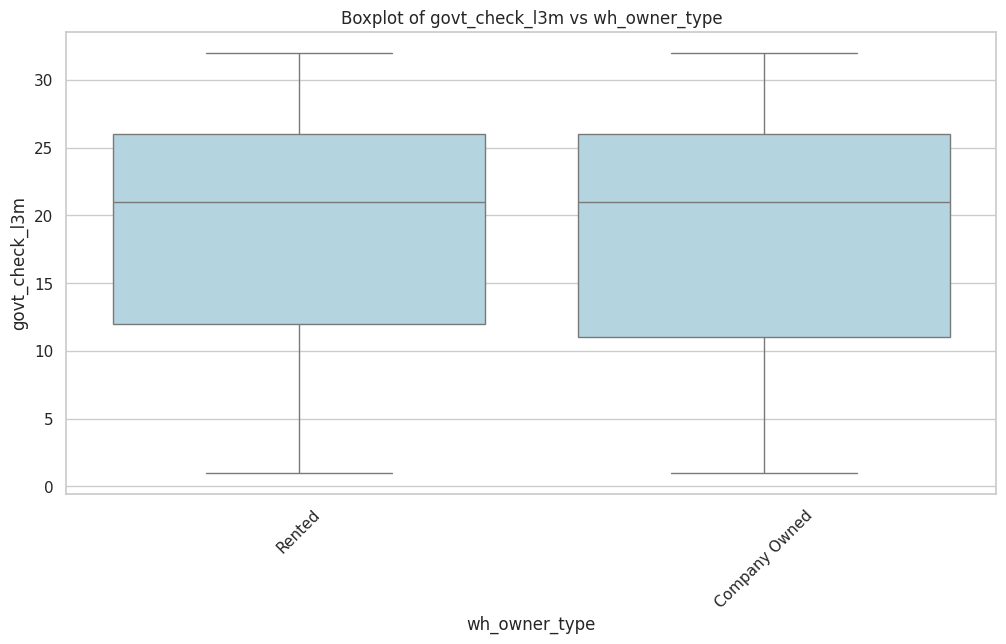

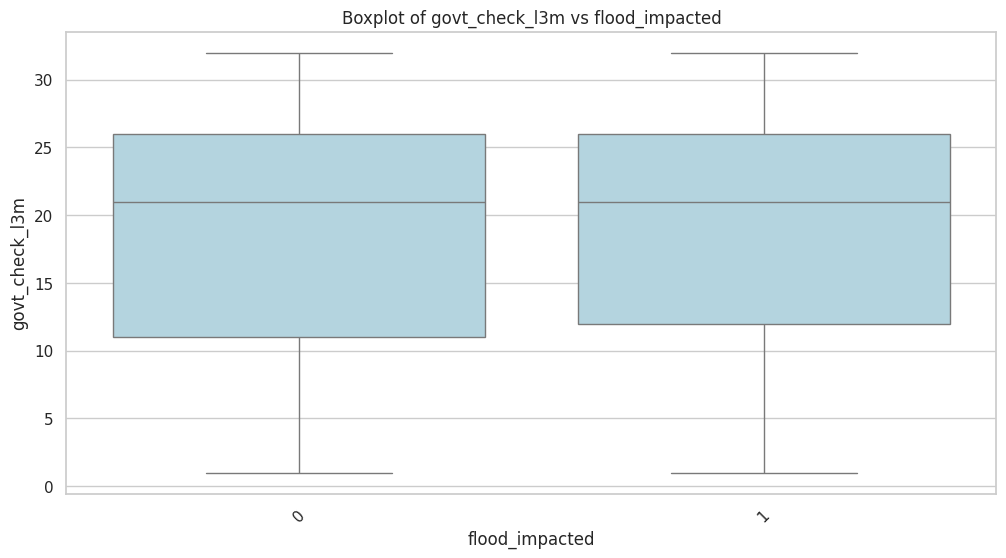

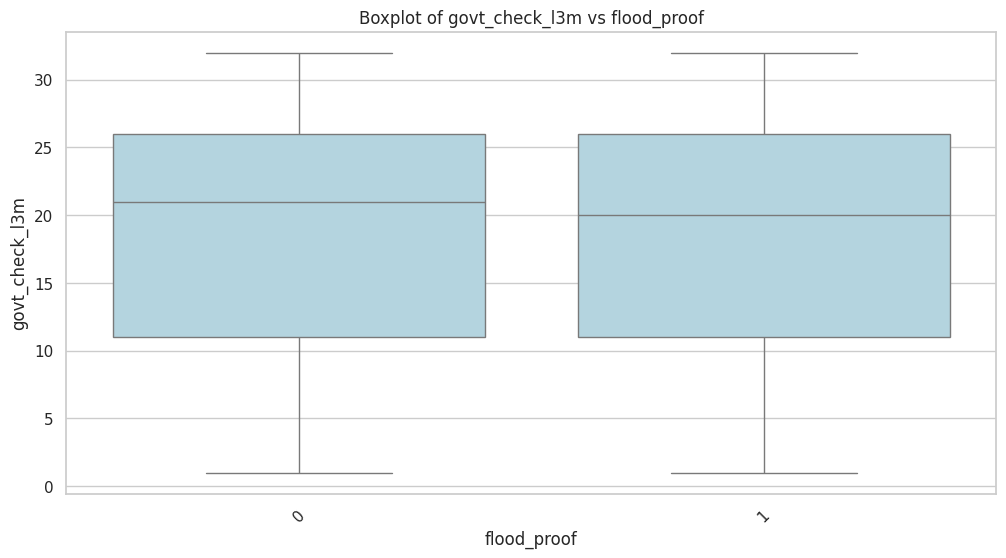

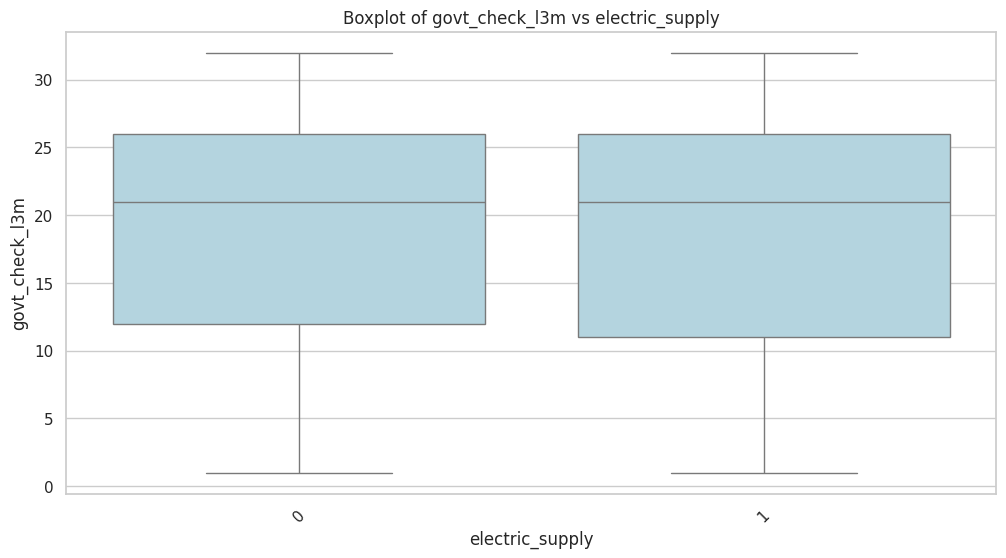

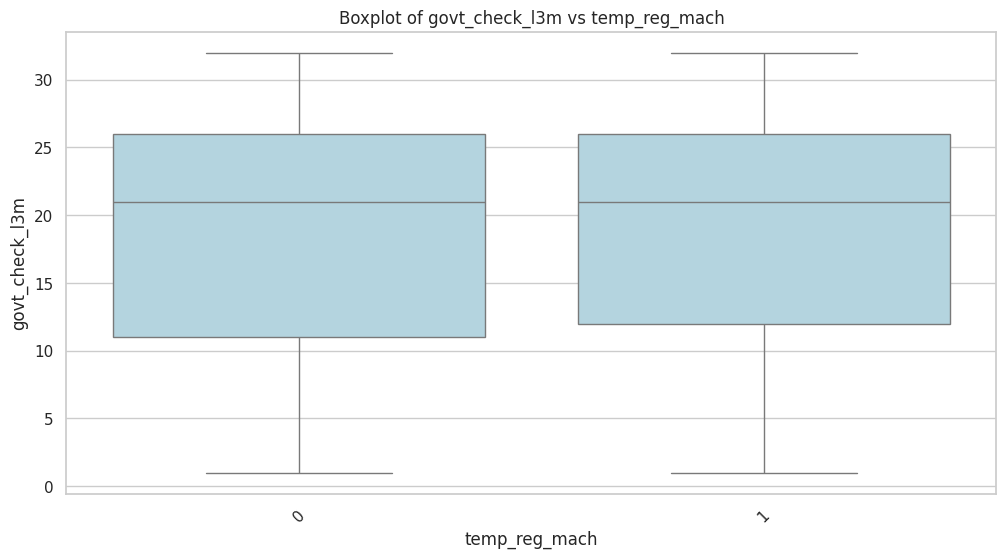

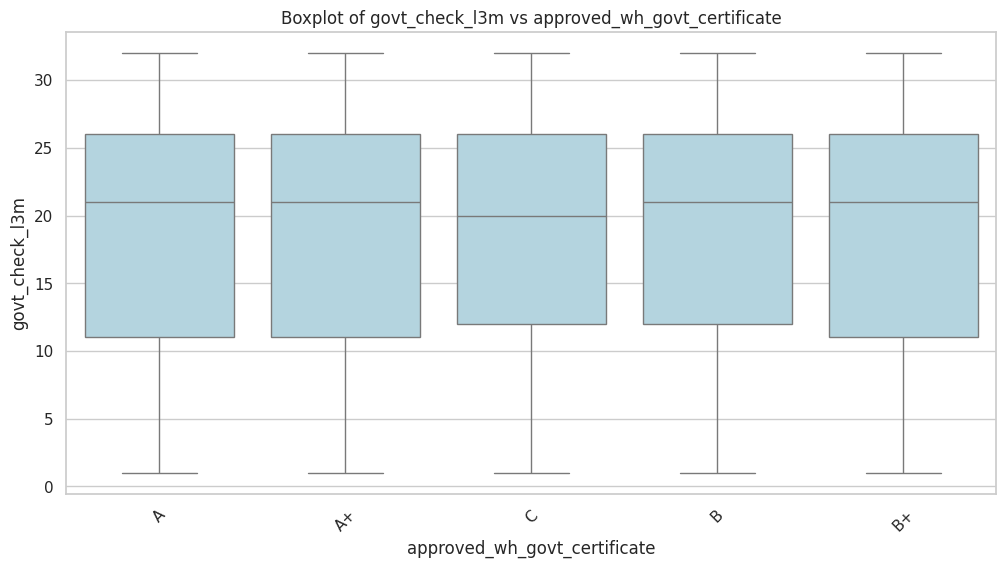

In [35]:
plot_boxplots(df, 'govt_check_l3m')

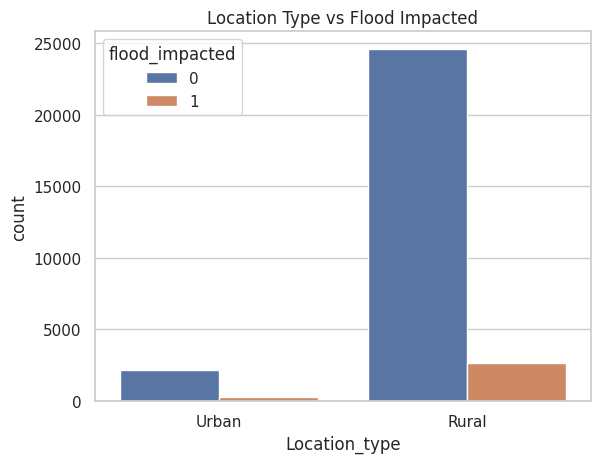

In [36]:
sns.countplot(x='Location_type', hue='flood_impacted', data=df)
plt.title('Location Type vs Flood Impacted')
plt.show()


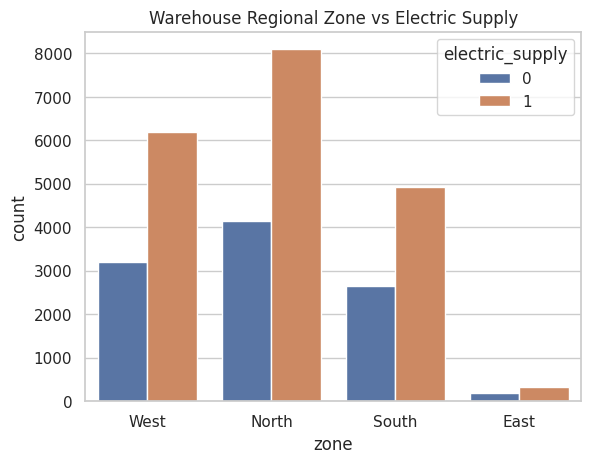

In [37]:
sns.countplot(x='zone', hue='electric_supply', data=df)
plt.title('Warehouse Regional Zone vs Electric Supply')
plt.show()


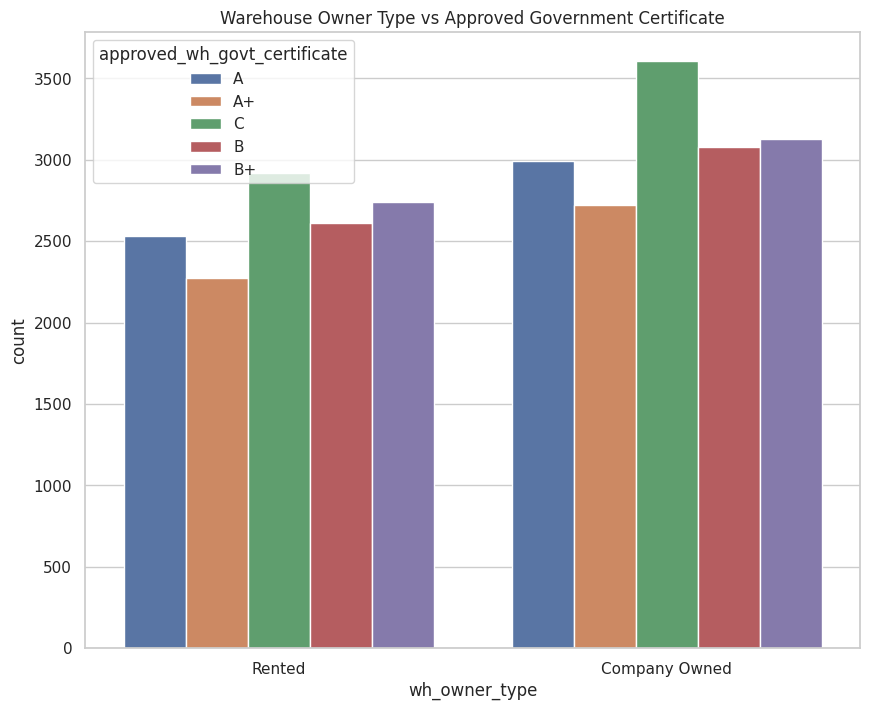

In [38]:
plt.figure(figsize=[10,8])
sns.countplot(x='wh_owner_type', hue='approved_wh_govt_certificate', data=df)
plt.title('Warehouse Owner Type vs Approved Government Certificate')
plt.show()


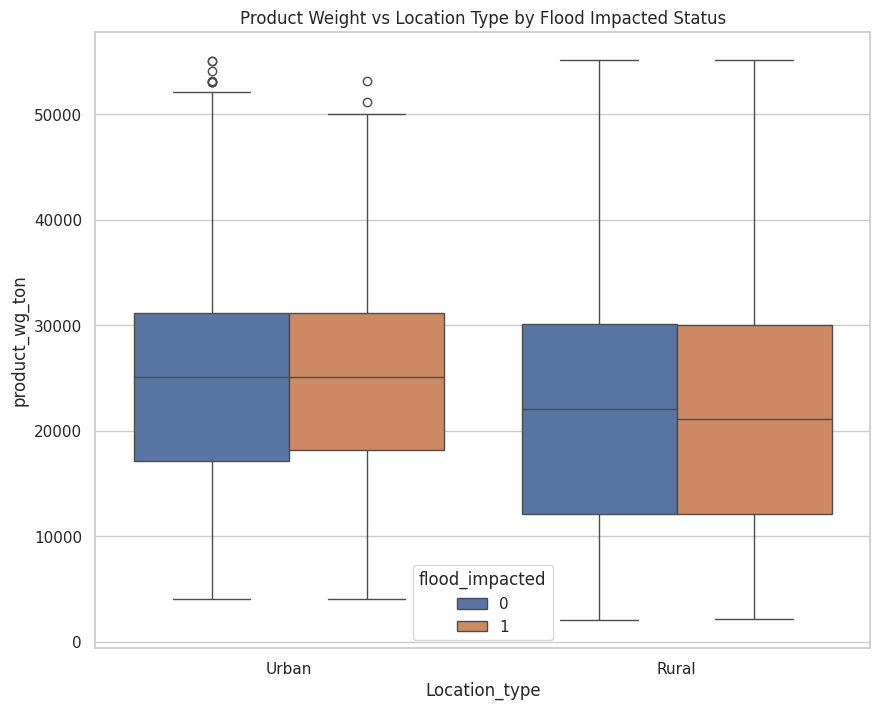

In [39]:
plt.figure(figsize=[10,8])
sns.boxplot(x='Location_type', y='product_wg_ton', hue='flood_impacted', data=df)
plt.title('Product Weight vs Location Type by Flood Impacted Status')
plt.show()


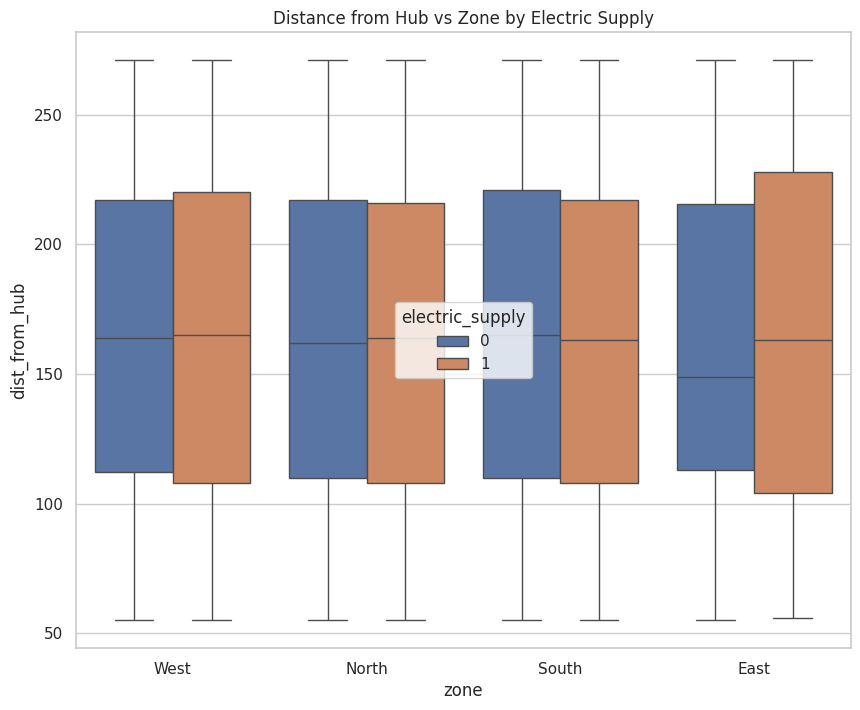

In [40]:
plt.figure(figsize=[10,8])
sns.boxplot(x='zone', y='dist_from_hub', hue='electric_supply', data=df)
plt.title('Distance from Hub vs Zone by Electric Supply')
plt.show()


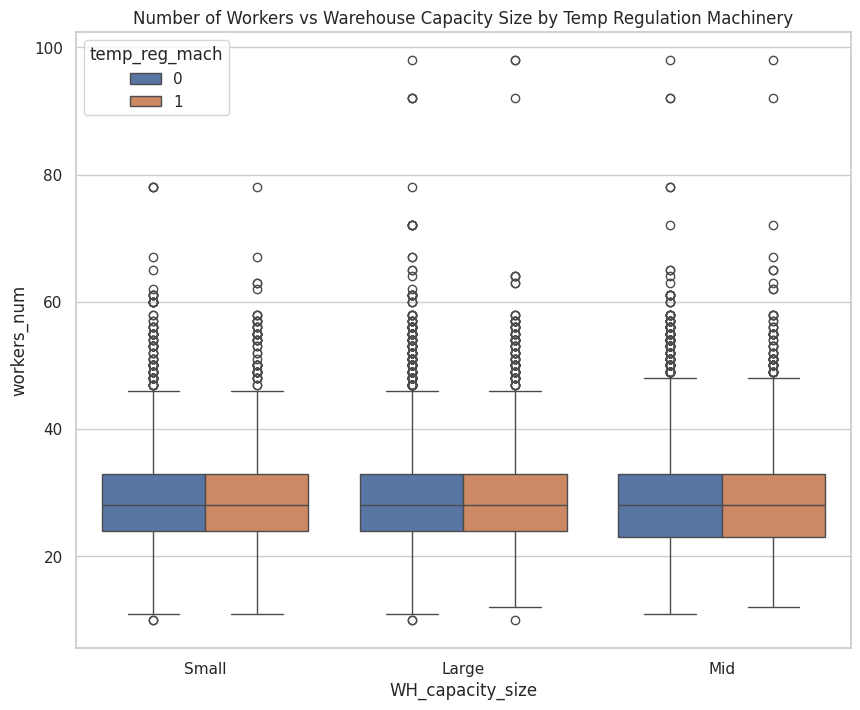

In [41]:
plt.figure(figsize=[10,8])
sns.boxplot(x='WH_capacity_size', y='workers_num', hue='temp_reg_mach', data=df)
plt.title('Number of Workers vs Warehouse Capacity Size by Temp Regulation Machinery')
plt.show()


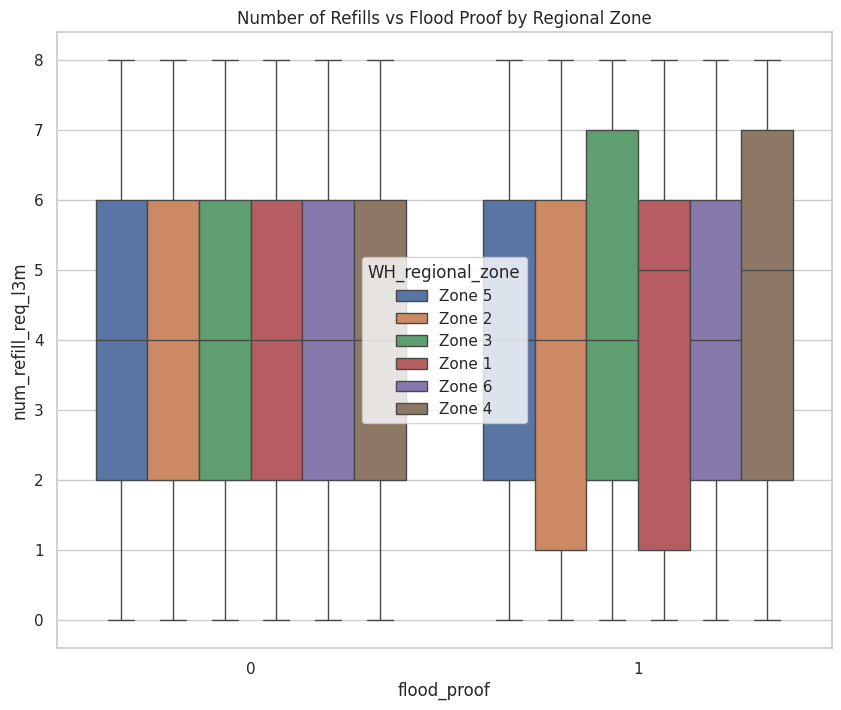

In [42]:
plt.figure(figsize=[10,8])
sns.boxplot(x='flood_proof', y='num_refill_req_l3m', hue='WH_regional_zone', data=df)
plt.title('Number of Refills vs Flood Proof by Regional Zone')
plt.show()


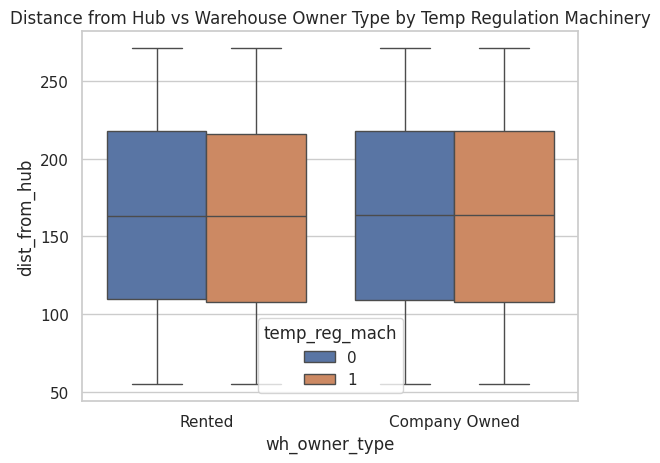

In [43]:
sns.boxplot(x='wh_owner_type', y='dist_from_hub', hue='temp_reg_mach', data=df)
plt.title('Distance from Hub vs Warehouse Owner Type by Temp Regulation Machinery')
plt.show()


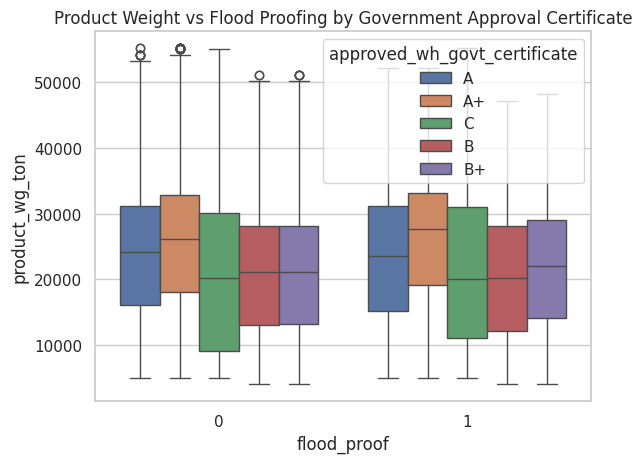

In [44]:
sns.boxplot(x='flood_proof', y='product_wg_ton', hue='approved_wh_govt_certificate', data=df)
plt.title('Product Weight vs Flood Proofing by Government Approval Certificate')
plt.show()


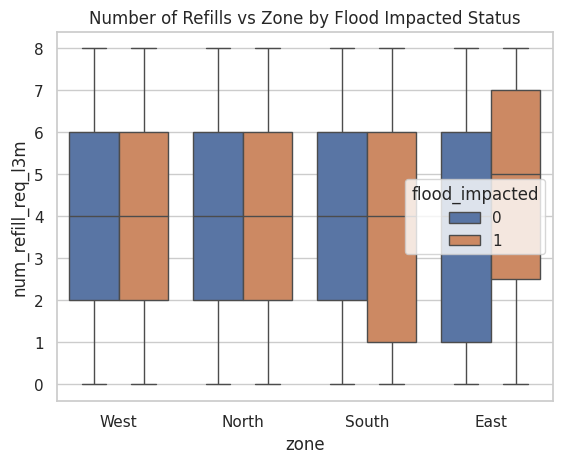

In [45]:
sns.boxplot(x='zone', y='num_refill_req_l3m', hue='flood_impacted', data=df)
plt.title('Number of Refills vs Zone by Flood Impacted Status')
plt.show()


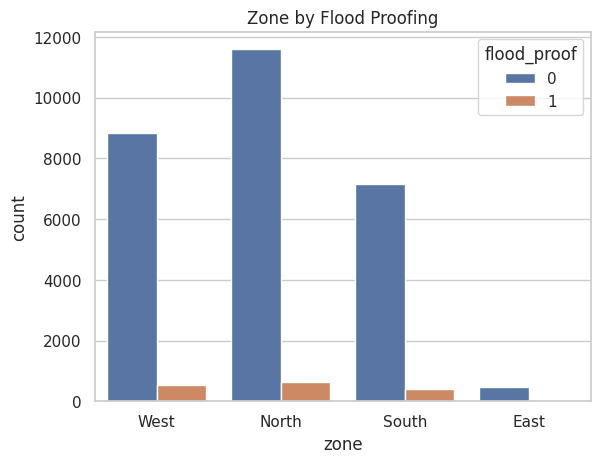

In [46]:
sns.countplot(x='zone', hue='flood_proof', data=df)
plt.title('Zone by Flood Proofing')
plt.show()


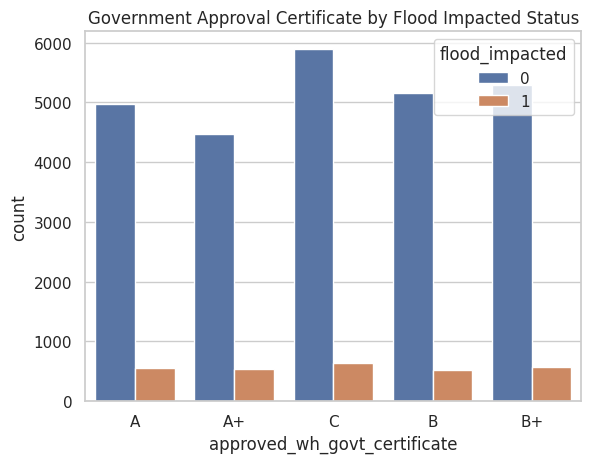

In [47]:
sns.countplot(x='approved_wh_govt_certificate', hue='flood_impacted', data=df)
plt.title('Government Approval Certificate by Flood Impacted Status')
plt.show()


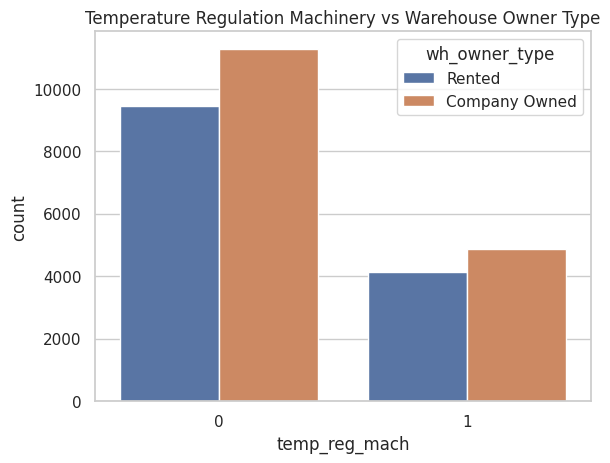

In [48]:
sns.countplot(x='temp_reg_mach', hue='wh_owner_type', data=df)
plt.title('Temperature Regulation Machinery vs Warehouse Owner Type')
plt.show()


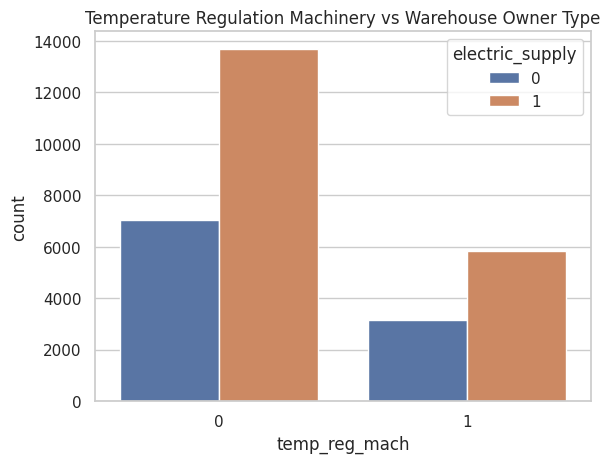

In [49]:
sns.countplot(x='temp_reg_mach', hue='electric_supply', data=df)
plt.title('Temperature Regulation Machinery vs Warehouse Owner Type')
plt.show()


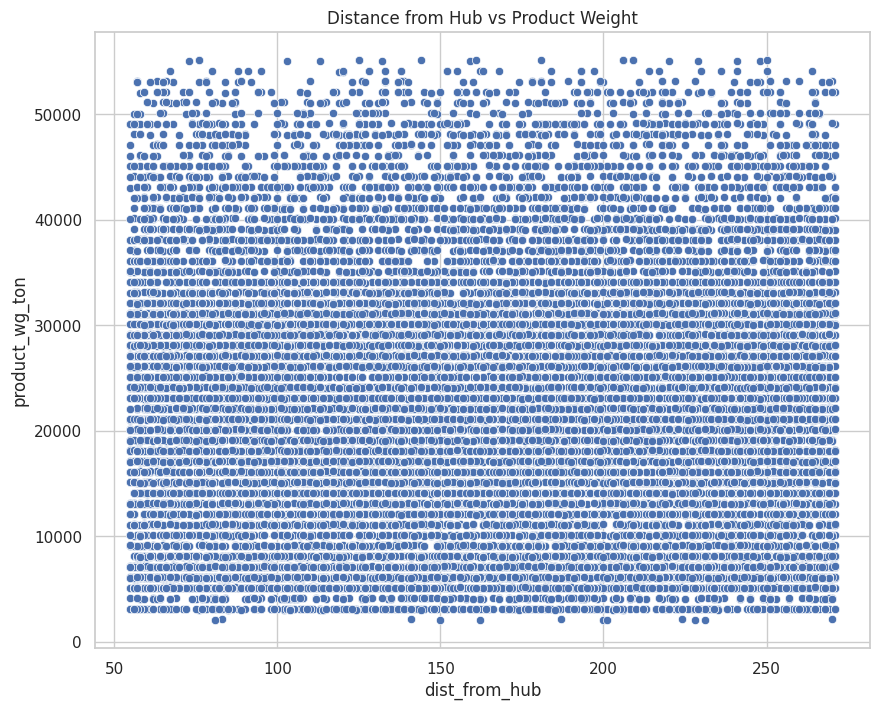

In [50]:
plt.figure(figsize=[10,8])
sns.scatterplot(x='dist_from_hub', y='product_wg_ton', data=df)
plt.title('Distance from Hub vs Product Weight')
plt.show()


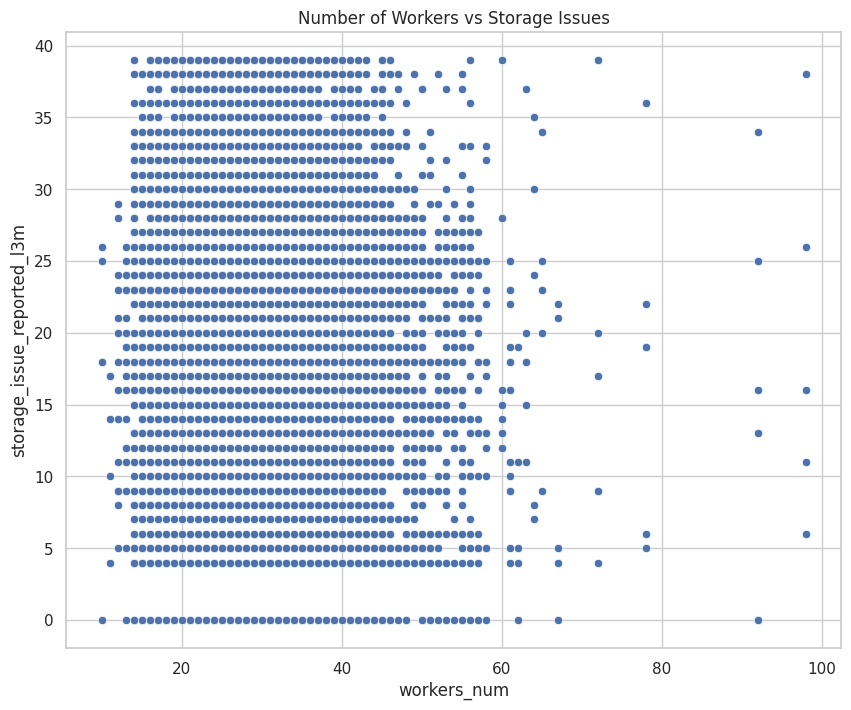

In [51]:
plt.figure(figsize=[10,8])
sns.scatterplot(x='workers_num', y='storage_issue_reported_l3m', data=df)
plt.title('Number of Workers vs Storage Issues')
plt.show()


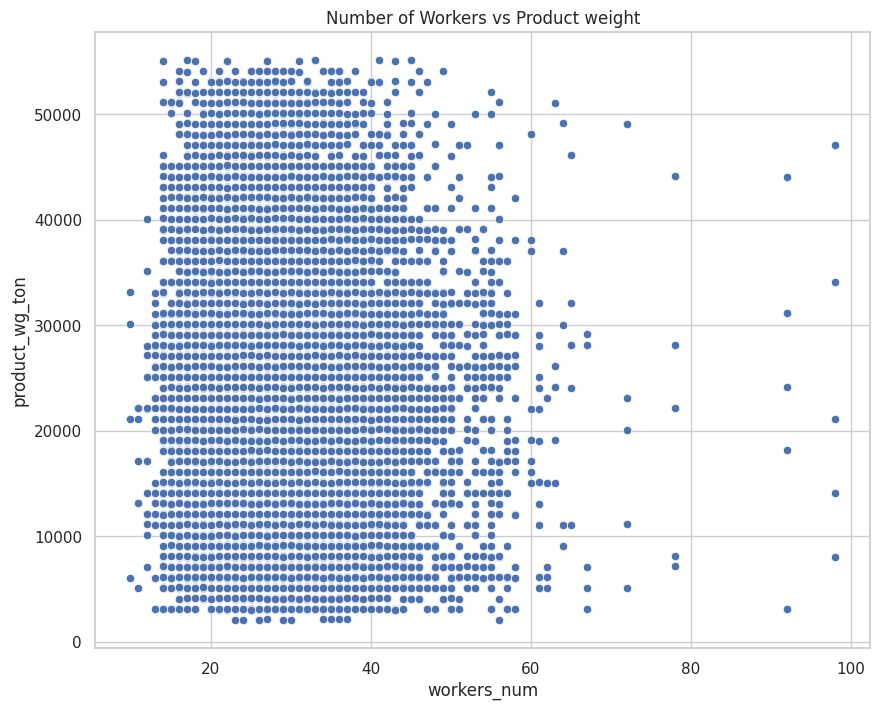

In [52]:
plt.figure(figsize=[10,8])
sns.scatterplot(x='workers_num', y='product_wg_ton', data=df)
plt.title('Number of Workers vs Product weight')
plt.show()


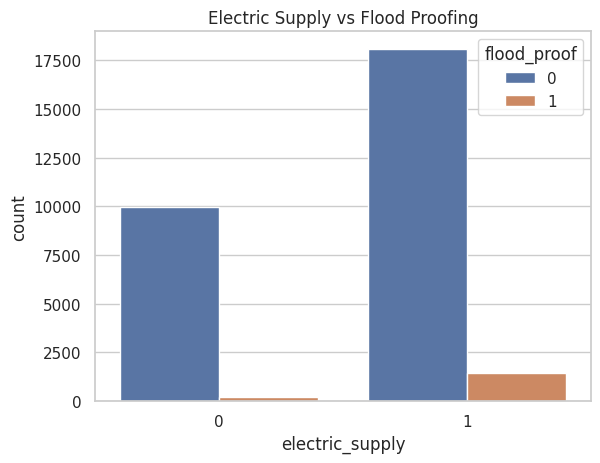

In [53]:
sns.countplot(x='electric_supply', hue='flood_proof', data=df)
plt.title('Electric Supply vs Flood Proofing')
plt.show()


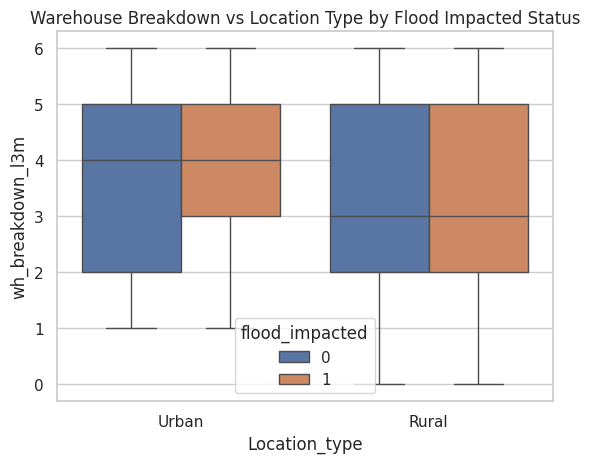

In [54]:
sns.boxplot(x='Location_type', y='wh_breakdown_l3m', hue='flood_impacted', data=df)
plt.title('Warehouse Breakdown vs Location Type by Flood Impacted Status')
plt.show()


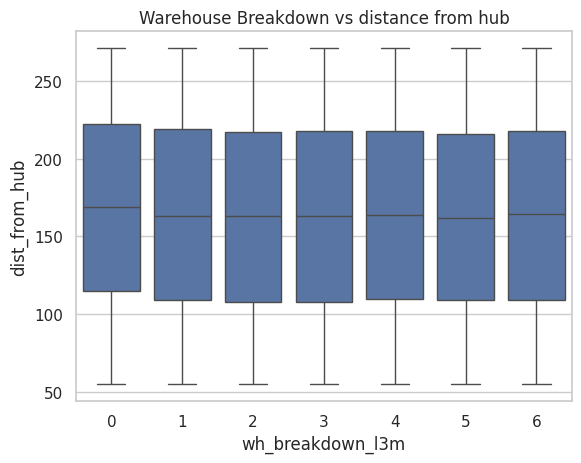

In [55]:
sns.boxplot(x='wh_breakdown_l3m', y='dist_from_hub', data=df)
plt.title('Warehouse Breakdown vs distance from hub')
plt.show()


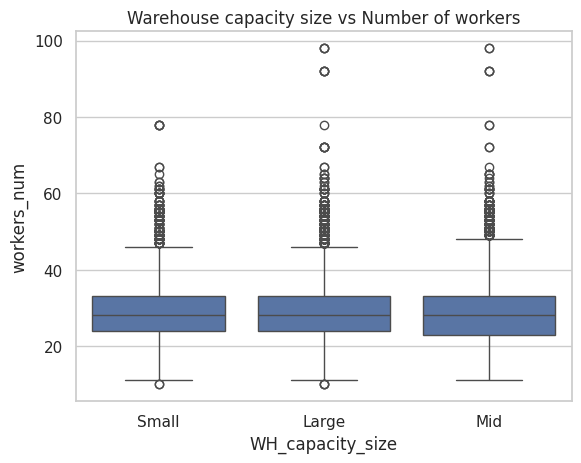

In [56]:
sns.boxplot(x='WH_capacity_size', y='workers_num', data=df)
plt.title('Warehouse capacity size vs Number of workers')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2000x1000 with 0 Axes>

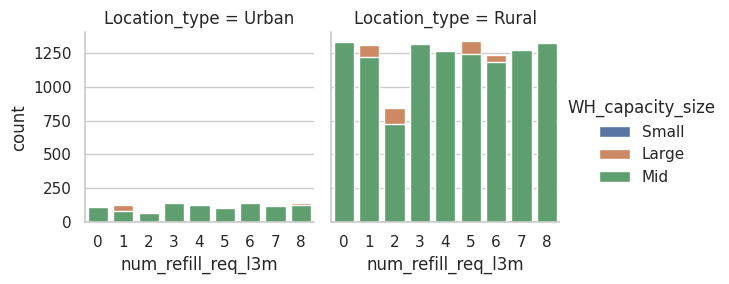

In [57]:
plt.figure(figsize=[20,10])
g = sns.FacetGrid(df, col='Location_type', hue='WH_capacity_size', col_wrap=2)
g.map(sns.countplot, 'num_refill_req_l3m')
g.add_legend()
plt.show()


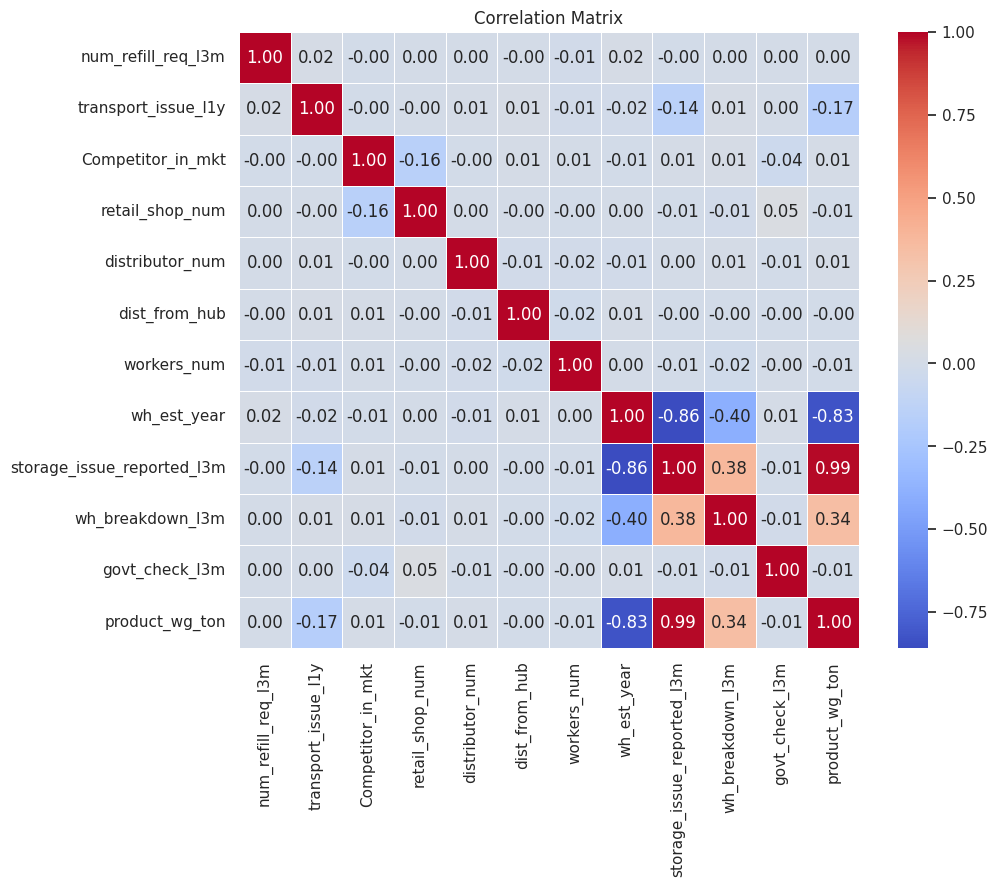

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = num.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Removal of unwanted variables

We dropped 'Ware_house_ID'and 'WH_Manager_ID' initially, before doing the EDA, as IDs are mere labels.

We can drop 'WH_regional_zone' as it is a subdivision of a zone, and it is unlikely that a zone's subdivision will impact our analysis.

In [59]:
df.drop(['WH_regional_zone'], axis = 1, inplace = True)

### Missing Value treatment  

In [60]:
#Check for columns with null values
for i in df.columns:
    print(i,df[i].isnull().sum())

Location_type 0
WH_capacity_size 0
zone 0
num_refill_req_l3m 0
transport_issue_l1y 0
Competitor_in_mkt 0
retail_shop_num 0
wh_owner_type 0
distributor_num 0
flood_impacted 0
flood_proof 0
electric_supply 0
dist_from_hub 0
workers_num 1174
wh_est_year 14107
storage_issue_reported_l3m 0
temp_reg_mach 0
approved_wh_govt_certificate 1086
wh_breakdown_l3m 0
govt_check_l3m 0
product_wg_ton 0


In [61]:
#Proportion of missing values in wh_est_year
11881/25000

0.47524

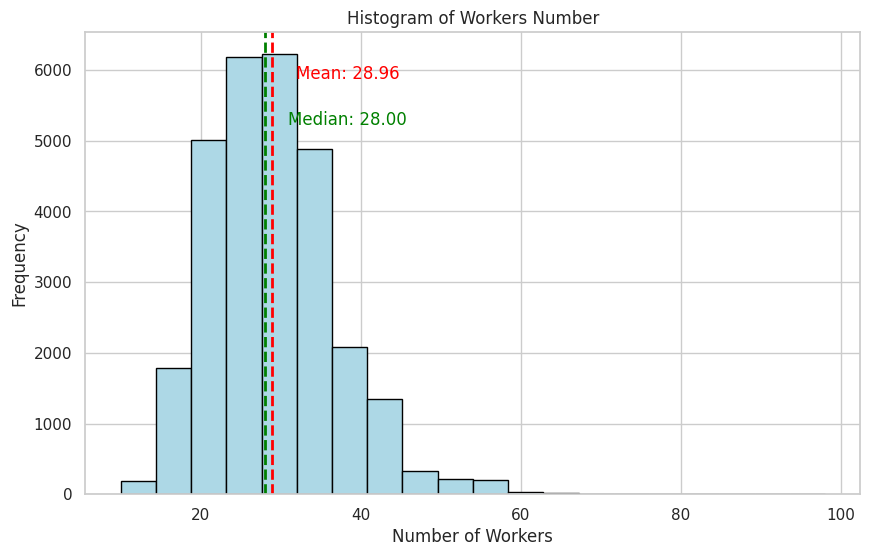

In [62]:
workers_data = df['workers_num']

# Calculate mean and median
mean_value = workers_data.mean()
median_value = workers_data.median()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(workers_data, bins=20, color='lightblue', edgecolor='black')

# Annotate the mean
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2)
plt.text(mean_value + np.mean(workers_data)/10, plt.ylim()[1] * 0.9,
         f'Mean: {mean_value:.2f}', color='red', fontsize=12)

# Annotate the median
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2)
plt.text(median_value + np.mean(workers_data)/10, plt.ylim()[1] * 0.8,
         f'Median: {median_value:.2f}', color='green', fontsize=12)

# Add labels and title
plt.title('Histogram of Workers Number')
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')

# Show the plot
plt.show()

We impute the missing values of the 'workers_num' column with the median value

In [63]:
# Calculate the median value of 'workers_num'
median_value = df['workers_num'].median()

# Impute missing values with the median
df['workers_num'].fillna(median_value, inplace=True)

# To check if the imputation was successful
print(df['workers_num'].isnull().sum())

0


Since 'approved_wh_govt_certificate' is a categorical variable, we impute the missing values of this column with the mode value.

In [64]:
# Calculate the mode value of 'approved_wh_govt_certificate'
mode_value = df['approved_wh_govt_certificate'].mode()[0]

# Impute missing values with the mode
df['approved_wh_govt_certificate'].fillna(mode_value, inplace=True)

# To check if the imputation was successful
print(df['approved_wh_govt_certificate'].isnull().sum())


0


KNN imputation method for missing values in 'wh_est_year' since is expected to be similar to that of similar warehouses. (This method is useful when there are complex, non-linear relationships in the data.)

In [65]:
# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=3)

# Apply the imputer to the DataFrame
imputed_data = imputer.fit_transform(df[['wh_est_year']])

# Create a new DataFrame or replace the old one with imputed values
df[['wh_est_year']] = imputed_data

In [66]:
#Reheck for columns with null values
for i in df.columns:
    print(i,df[i].isnull().sum())

Location_type 0
WH_capacity_size 0
zone 0
num_refill_req_l3m 0
transport_issue_l1y 0
Competitor_in_mkt 0
retail_shop_num 0
wh_owner_type 0
distributor_num 0
flood_impacted 0
flood_proof 0
electric_supply 0
dist_from_hub 0
workers_num 0
wh_est_year 0
storage_issue_reported_l3m 0
temp_reg_mach 0
approved_wh_govt_certificate 0
wh_breakdown_l3m 0
govt_check_l3m 0
product_wg_ton 0


### Outlier Treatment

We treat the outliers using the IQR method. We find the lower bound and upper bound and cap the outliers to those bounds.

In [67]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def treat_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [68]:
feature_list = num.columns
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = treat_outlier(num[i])
    num[i] = np.where(num[i] > UL, UL, num[i])
    num[i] = np.where(num[i] < LL, LL, num[i])

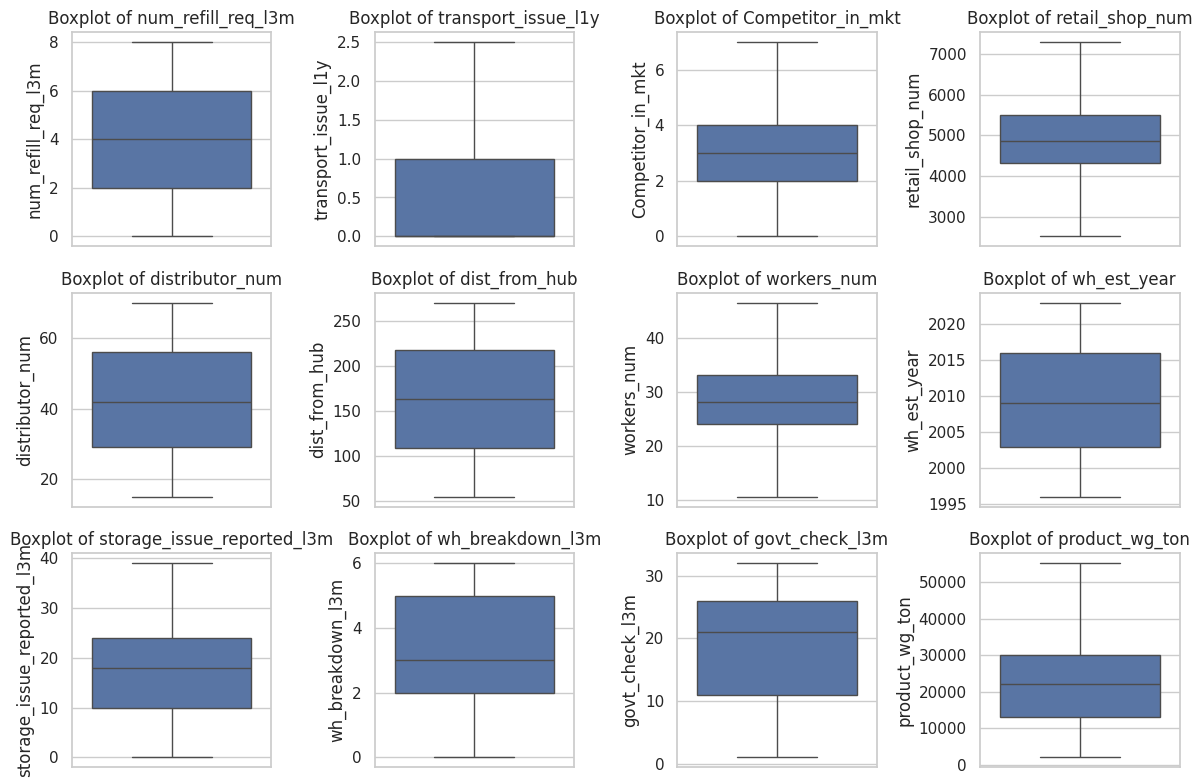

In [69]:
#Check to verify if outliers have been treated
plt.figure(figsize = (12,8))
feature_list = num.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = num[feature_list[i]], data = num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [70]:
df.shape

(29696, 21)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29696 entries, 0 to 29695
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 29696 non-null  object 
 1   WH_capacity_size              29696 non-null  object 
 2   zone                          29696 non-null  object 
 3   num_refill_req_l3m            29696 non-null  int64  
 4   transport_issue_l1y           29696 non-null  int64  
 5   Competitor_in_mkt             29696 non-null  int64  
 6   retail_shop_num               29696 non-null  int64  
 7   wh_owner_type                 29696 non-null  object 
 8   distributor_num               29696 non-null  int64  
 9   flood_impacted                29696 non-null  object 
 10  flood_proof                   29696 non-null  object 
 11  electric_supply               29696 non-null  object 
 12  dist_from_hub                 29696 non-null  int64  
 13  w

In [72]:
from datetime import datetime
#Convert wh-est_year to date datatype
df['wh_est_year'] = pd.to_datetime(df['wh_est_year'], format='%Y')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29696 entries, 0 to 29695
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Location_type                 29696 non-null  object        
 1   WH_capacity_size              29696 non-null  object        
 2   zone                          29696 non-null  object        
 3   num_refill_req_l3m            29696 non-null  int64         
 4   transport_issue_l1y           29696 non-null  int64         
 5   Competitor_in_mkt             29696 non-null  int64         
 6   retail_shop_num               29696 non-null  int64         
 7   wh_owner_type                 29696 non-null  object        
 8   distributor_num               29696 non-null  int64         
 9   flood_impacted                29696 non-null  object        
 10  flood_proof                   29696 non-null  object        
 11  electric_supply             

### Addition of new variable warehouse_age

In [74]:
# Get the current date
current_date = pd.to_datetime(datetime.now().date())

# Calculate the warehouse age in years
df['warehouse_age'] = (current_date - df['wh_est_year']).dt.days // 365

# Check the result
df.head(20)

Location_type WH_capacity_size   zone  num_refill_req_l3m  \
0          Urban            Small   West                   3   
1          Rural            Large  North                   0   
2          Rural              Mid  South                   1   
3          Rural              Mid  North                   7   
4          Rural            Large  North                   3   
5          Rural            Small   West                   8   
6          Rural            Large   West                   8   
7          Rural            Large  North                   1   
8          Rural            Small  South                   8   
9          Rural            Small  South                   4   
10         Rural            Large  North                   7   
11         Rural            Large  North                   7   
12         Urban              Mid  North                   4   
13         Rural              Mid  South                   6   
14         Rural            Small   West                   8   
15         Rural              Mid  North                   1   
16         Rural              Mid   West                   0   
17         Rural              Mid   West                   0   
18         Rural              Mid  North                   4   
19         Rural            Small  South                   1   

    transport_issue_l1y  Competitor_in_mkt  retail_shop_num  wh_owner_type  \
0                     1                  2             4651         Rented   
1                     0                  4             6217  Company Owned   
2                     0                  4             4306  Company Owned   
3                     4                  2             6000         Rented   
4                     1                  2             4740  Company Owned   
5                     0                  2             5053         Rented   
6                     0                  4             4449  Company Owned   
7                     0                  4             7183         Rented   
8                     1                  4             5381         Rented   
9                     3                  3             3869  Company Owned   
10                    1                  3             4623  Company Owned   
11                    0                  5             4627         Rented   
12                    0                  3             5012         Rented   
13                    1                  2             6858  Company Owned   
14                    1                  4             5022         Rented   
15                    1                  3             5062  Company Owned   
16                    0                  2             5569  Company Owned   
17                    1                  2             5539  Company Owned   
18                    1                  4             4598         Rented   
19                    1                  2             5679         Rented   

    distributor_num flood_impacted  ... dist_from_hub workers_num  \
0                24              0  ...            91        29.0   
1                47              0  ...           210        31.0   
2                64              0  ...           161        37.0   
3                50              0  ...           103        21.0   
4                42              1  ...           112        25.0   
5                37              0  ...           152        35.0   
6                38              0  ...            77        27.0   
7                45              0  ...           241        23.0   
8                42              0  ...           124        22.0   
9                35              0  ...            78        43.0   
10               31              0  ...           150        37.0   
11               40              0  ...           225        16.0   
12               48              0  ...            95        28.0   
13               26              0  ...           242

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29696 entries, 0 to 29695
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Location_type                 29696 non-null  object        
 1   WH_capacity_size              29696 non-null  object        
 2   zone                          29696 non-null  object        
 3   num_refill_req_l3m            29696 non-null  int64         
 4   transport_issue_l1y           29696 non-null  int64         
 5   Competitor_in_mkt             29696 non-null  int64         
 6   retail_shop_num               29696 non-null  int64         
 7   wh_owner_type                 29696 non-null  object        
 8   distributor_num               29696 non-null  int64         
 9   flood_impacted                29696 non-null  object        
 10  flood_proof                   29696 non-null  object        
 11  electric_supply             

### Significance test

##### Significance test between warehouse_age and product_wg_ton

In [76]:
import scipy.stats as stats

# Calculate the Pearson correlation coefficient and p-value
corr_coeff, p_value = stats.pearsonr(df['warehouse_age'], df['product_wg_ton'])

# Display the results
print(f"Pearson correlation coefficient: {corr_coeff:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Common significance level
if p_value <= alpha:
    print("The relationship between 'warehouse_age' and 'product_wg_ton' is significant.")
else:
    print("The relationship between 'warehouse_age' and 'product_wg_ton' is not significant.")


Pearson correlation coefficient: 0.6057
p-value: 0.0000
The relationship between 'warehouse_age' and 'product_wg_ton' is significant.


##### Significance test between warehouse_age and wh_breakdown_l3m

In [77]:
import scipy.stats as stats

# Calculate the Pearson correlation coefficient and p-value
corr_coeff, p_value = stats.pearsonr(df['warehouse_age'], df['wh_breakdown_l3m'])

# Display the results
print(f"Pearson correlation coefficient: {corr_coeff:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Common significance level
if p_value <= alpha:
    print("The relationship between 'warehouse_age' and 'wh_breakdown_l3m' is significant.")
else:
    print("The relationship between 'warehouse_age' and 'wh_breakdown_l3m' is not significant.")

Pearson correlation coefficient: 0.2867
p-value: 0.0000
The relationship between 'warehouse_age' and 'wh_breakdown_l3m' is significant.


#### ANOVA between all categorical variables and the target variables 'product_wg_ton'

In [78]:
cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(cat.columns.values)
lstcatcolumns

['Location_type',
 'WH_capacity_size',
 'zone',
 'wh_owner_type',
 'flood_impacted',
 'flood_proof',
 'electric_supply',
 'temp_reg_mach',
 'approved_wh_govt_certificate']

In [79]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Initialize a dictionary to store ANOVA results
anova_results = {}

# Loop through each categorical variable in the cat DataFrame
for col in cat.columns:
    # Create a formula for the ANOVA test: target ~ categorical_variable
    formula = f'product_wg_ton ~ C({col})'

    # Fit the OLS model
    model = ols(formula, data=df).fit()

    # Perform the ANOVA
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Store the results in the dictionary
    anova_results[col] = anova_table

# Display the results
for var, result in anova_results.items():
    print(f"\nANOVA results for {var}:\n")
    print(result)



ANOVA results for Location_type:

                        sum_sq       df           F        PR(>F)
C(Location_type)  2.202506e+10      1.0  164.755988  1.302261e-37
Residual          3.969580e+12  29694.0         NaN           NaN

ANOVA results for WH_capacity_size:

                           sum_sq       df         F    PR(>F)
C(WH_capacity_size)  1.275443e+08      2.0  0.474407  0.622258
Residual             3.991477e+12  29693.0       NaN       NaN

ANOVA results for zone:

                sum_sq       df         F    PR(>F)
C(zone)   3.632611e+08      3.0  0.900801  0.439832
Residual  3.991242e+12  29692.0       NaN       NaN

ANOVA results for wh_owner_type:

                        sum_sq       df         F    PR(>F)
C(wh_owner_type)  2.681931e+08      1.0  1.995252  0.157803
Residual          3.991337e+12  29694.0       NaN       NaN

ANOVA results for flood_impacted:

                         sum_sq       df         F    PR(>F)
C(flood_impacted)  1.381241e+07      1.0  0.10

In [80]:
for var, result in anova_results.items():
    p_value = result['PR(>F)'][0]  # Extract the p-value from the ANOVA table
    print(f"\nANOVA results for {var}:\n")
    print(result)

    if p_value <= 0.05:
        print(f"The variable '{var}' is significant (p-value: {p_value:.4f}).")
    else:
        print(f"The variable '{var}' is not significant (p-value: {p_value:.4f}).")


ANOVA results for Location_type:

                        sum_sq       df           F        PR(>F)
C(Location_type)  2.202506e+10      1.0  164.755988  1.302261e-37
Residual          3.969580e+12  29694.0         NaN           NaN
The variable 'Location_type' is significant (p-value: 0.0000).

ANOVA results for WH_capacity_size:

                           sum_sq       df         F    PR(>F)
C(WH_capacity_size)  1.275443e+08      2.0  0.474407  0.622258
Residual             3.991477e+12  29693.0       NaN       NaN
The variable 'WH_capacity_size' is not significant (p-value: 0.6223).

ANOVA results for zone:

                sum_sq       df         F    PR(>F)
C(zone)   3.632611e+08      3.0  0.900801  0.439832
Residual  3.991242e+12  29692.0       NaN       NaN
The variable 'zone' is not significant (p-value: 0.4398).

ANOVA results for wh_owner_type:

                        sum_sq       df         F    PR(>F)
C(wh_owner_type)  2.681931e+08      1.0  1.995252  0.157803
Residual    

<ipython-input-80-7298a93a9200>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = result['PR(>F)'][0]  # Extract the p-value from the ANOVA table
<ipython-input-80-7298a93a9200>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = result['PR(>F)'][0]  # Extract the p-value from the ANOVA table
<ipython-input-80-7298a93a9200>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = result['PR(>F)'][0]  # Extract the 

## Clustering of warehouses based on demand.

In [81]:
num1 = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(num1.columns.values)
len(lstnumericcolumns)

12

In [82]:
num1.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                   3                    1                  2   
1                   0                    0                  4   
2                   1                    0                  4   
3                   7                    4                  2   
4                   3                    1                  2   

   retail_shop_num  distributor_num  dist_from_hub  workers_num  \
0             4651               24             91         29.0   
1             6217               47            210         31.0   
2             4306               64            161         37.0   
3             6000               50            103         21.0   
4             4740               42            112         25.0   

   storage_issue_reported_l3m  wh_breakdown_l3m  govt_check_l3m  \
0                          13                 5              15   
1                           4                 3              17   
2                          17                 6              22   
3                          17                 3              27   
4                          18                 6              24   

   product_wg_ton  warehouse_age  
0           17115             15  
1            5074             15  
2           23137             15  
3           22115             15  
4           24071             15

In [83]:
#Reheck for columns with null values
for i in num1.columns:
    print(i,num1[i].isnull().sum())

num_refill_req_l3m 0
transport_issue_l1y 0
Competitor_in_mkt 0
retail_shop_num 0
distributor_num 0
dist_from_hub 0
workers_num 0
storage_issue_reported_l3m 0
wh_breakdown_l3m 0
govt_check_l3m 0
product_wg_ton 0
warehouse_age 0


In [84]:
from scipy.stats import zscore
scaled = num1.apply(zscore)
scaled.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0           -0.413993             0.191422          -0.969943   
1           -1.565327            -0.644282           0.784545   
2           -1.181549            -0.644282           0.784545   
3            1.121119             2.698534          -0.969943   
4           -0.413993             0.191422          -0.969943   

   retail_shop_num  distributor_num  dist_from_hub  workers_num  \
0        -0.319532        -1.146785      -1.152397     0.010509   
1         1.164341         0.285371       0.741844     0.268960   
2        -0.646439         1.343921      -0.038138     1.044311   
3         0.958721         0.472174      -0.961381    -1.023293   
4        -0.235200        -0.025967      -0.818119    -0.506392   

   storage_issue_reported_l3m  wh_breakdown_l3m  govt_check_l3m  \
0                   -0.452041          0.901561       -0.446601   
1                   -1.435390         -0.281922       -0.214867   
2                   -0.014997          1.493302        0.364468   
3                   -0.014997         -0.281922        0.943803   
4                    0.094264          1.493302        0.596202   

   product_wg_ton  warehouse_age  
0       -0.431127       0.035576  
1       -1.469702       0.035576  
2        0.088289       0.035576  
3        0.000139       0.035576  
4        0.168850       0.035576

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

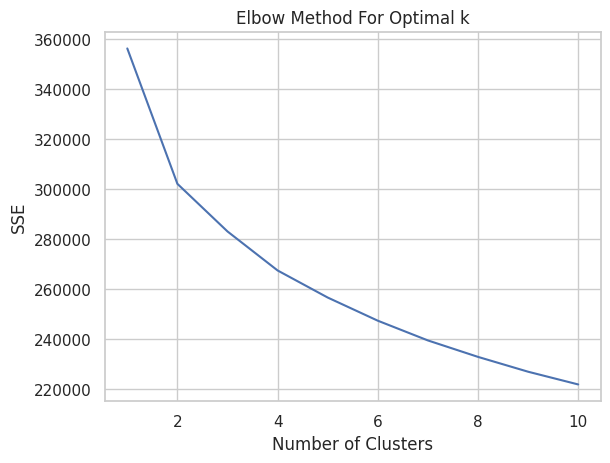

In [85]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

In [86]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [87]:
# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['number'])

# Perform the groupby operation and calculate the mean
cluster_summary = numeric_columns.groupby(df['cluster']).mean()

# Display the first few rows of the summary
cluster_summary.head().T

cluster                                0             1             2
num_refill_req_l3m              4.054556      3.985198      4.219384
transport_issue_l1y             2.905664      0.285623      0.342041
Competitor_in_mkt               3.109680      3.126487      3.075070
retail_shop_num              4973.260087   4972.933357   5016.843255
distributor_num                43.036371     42.417068     42.099446
dist_from_hub                 167.461262    162.402337    162.674080
workers_num                    28.635158     28.894618     29.097019
storage_issue_reported_l3m     14.247016     24.361331      8.712829
wh_breakdown_l3m                3.776094      4.097450      2.471205
govt_check_l3m                 18.849214     18.776133     18.964456
product_wg_ton              17755.655617  31264.077762  11799.399340
warehouse_age                  14.927070     17.927054     10.464407
cluster                         0.000000      1.000000      2.000000

In [88]:
df.drop(['wh_est_year'], axis = 1, inplace = True)

# Model Building

### Encoding categorical variables

In [89]:
cat.head()

Location_type WH_capacity_size   zone  wh_owner_type flood_impacted  \
0         Urban            Small   West         Rented              0   
1         Rural            Large  North  Company Owned              0   
2         Rural              Mid  South  Company Owned              0   
3         Rural              Mid  North         Rented              0   
4         Rural            Large  North  Company Owned              1   

  flood_proof electric_supply temp_reg_mach approved_wh_govt_certificate  
0           1               1             0                            A  
1           0               1             0                            A  
2           0               0             0                            A  
3           0               0             1                           A+  
4           0               1             0                            C

In [90]:
#Encoding categotical variables

# List of binary categorical variables
binary_vars = ['Location_type', 'wh_owner_type', 'flood_impacted', 'flood_proof', 'electric_supply', 'temp_reg_mach']

# Perform one-hot encoding on non-binary categorical variables
df_encoded = pd.get_dummies(df, columns=['WH_capacity_size', 'zone', 'approved_wh_govt_certificate'], drop_first=True)

# For binary variables, you could either use get_dummies or manual mapping
# Here's an example using get_dummies
df_encoded = pd.get_dummies(df_encoded, columns=binary_vars, drop_first=True)

In [91]:
df_encoded.head().T

0      1      2      3      4
num_refill_req_l3m                   3      0      1      7      3
transport_issue_l1y                  1      0      0      4      1
Competitor_in_mkt                    2      4      4      2      2
retail_shop_num                   4651   6217   4306   6000   4740
distributor_num                     24     47     64     50     42
dist_from_hub                       91    210    161    103    112
workers_num                       29.0   31.0   37.0   21.0   25.0
storage_issue_reported_l3m          13      4     17     17     18
wh_breakdown_l3m                     5      3      6      3      6
govt_check_l3m                      15     17     22     27     24
product_wg_ton                   17115   5074  23137  22115  24071
warehouse_age                       15     15     15     15     15
cluster                              0      2      1      0      1
WH_capacity_size_Mid             False  False   True   True  False
WH_capacity_size_Small            True  False  False  False  False
zone_North                       False   True  False   True   True
zone_South                       False  False   True  False  False
zone_West                         True  False  False  False  False
approved_wh_govt_certificate_A+  False  False  False   True  False
approved_wh_govt_certificate_B   False  False  False  False  False
approved_wh_govt_certificate_B+  False  False  False  False  False
approved_wh_govt_certificate_C   False  False  False  False   True
Location_type_Urban               True  False  False  False  False
wh_owner_type_Rented              True  False  False   True  False
flood_impacted_1                 False  False  False  False   True
flood_proof_1                     True  False  False  False  False
electric_supply_1                 True   True  False  False   True
temp_reg_mach_1                  False  False  False   True  False

In [92]:
df_encoded.describe()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        29696.000000         29696.000000       29696.000000   
mean             4.078731             0.770946           3.105671   
std              2.605717             1.196616           1.139952   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  distributor_num  dist_from_hub   workers_num  \
count     29696.000000     29696.000000   29696.000000  29696.000000   
mean       4988.217066        42.417026     163.395878     28.918676   
std        1055.364357        16.059973      62.823078      7.738556   
min        1821.000000        15.000000      55.000000     10.000000   
25%        4314.000000        29.000000     109.000000     24.000000   
50%        4860.000000        42.000000     164.000000     28.000000   
75%        5503.000000        56.000000     218.000000     33.000000   
max       11008.000000        70.000000     271.000000     98.000000   

       storage_issue_reported_l3m  wh_breakdown_l3m  govt_check_l3m  \
count                29696.000000      29696.000000    29696.000000   
mean                    17.137258          3.476428       18.854425   
std                      9.152548          1.689956        8.630730   
min                      0.000000          0.000000        1.000000   
25%                     10.000000          2.000000       11.000000   
50%                     18.000000          3.000000       21.000000   
75%                     24.000000          5.000000       26.000000   
max                     39.000000          6.000000       32.000000   

       product_wg_ton  warehouse_age       cluster  
count    29696.000000   29696.000000  29696.000000  
mean     22113.392342      14.806102      1.168979  
std      11593.968356       5.450352      0.704257  
min       2065.000000       1.000000      0.000000  
25%      13063.000000      14.000000      1.000000  
50%      22104.000000      15.000000      1.000000  
75%      30102.000000      15.000000      2.000000  
max      55151.000000      28.000000      2.000000

### Data preparation for modelling

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df_encoded is your preprocessed DataFrame
X = df_encoded.drop('product_wg_ton', axis=1)
y = df_encoded['product_wg_ton']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [94]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Function to calculate adjusted R²
def adjusted_r2(r2, X, y):
    n = len(y)  # Number of data points
    p = X.shape[1]  # Number of predictors
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming X_train is the original DataFrame before scaling
# Store feature names from the original DataFrame
feature_names = X_train.columns

# 1. Initialize and train the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# 2. Predict and evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

# 3. Metrics (MAE, MSE, RMSE, MAPE, R², Adjusted R²)
results_df = pd.DataFrame(columns=['Model', 'Set', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R²', 'Adjusted R²'])

# Add training set results
train_results = pd.DataFrame({
    'Model': ['Linear Regression'],
    'Set': ['Training'],
    'MAE': [mean_absolute_error(y_train, y_train_pred)],
    'MSE': [mean_squared_error(y_train, y_train_pred)],
    'RMSE': [rmse(y_train, y_train_pred)],
    'MAPE': [mape(y_train, y_train_pred)],
    'R²': [r2_score(y_train, y_train_pred)],
    'Adjusted R²': [adjusted_r2(r2_score(y_train, y_train_pred), X_train_scaled, y_train)]
})

# Add test set results
test_results = pd.DataFrame({
    'Model': ['Linear Regression'],
    'Set': ['Test'],
    'MAE': [mean_absolute_error(y_test, y_test_pred)],
    'MSE': [mean_squared_error(y_test, y_test_pred)],
    'RMSE': [rmse(y_test, y_test_pred)],
    'MAPE': [mape(y_test, y_test_pred)],
    'R²': [r2_score(y_test, y_test_pred)],
    'Adjusted R²': [adjusted_r2(r2_score(y_test, y_test_pred), X_test_scaled, y_test)]
})

# Concatenate the results
results_df = pd.concat([results_df, train_results, test_results], ignore_index=True)

print("Evaluation Metrics:")
print(results_df)

# 4. Multicollinearity - VIF
if X_train_scaled.shape[1] > 1:  # Ensure there is more than one feature
    vif_data = pd.DataFrame()
    vif_data['Feature'] = feature_names
    vif_data['VIF'] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]

    print("VIF values:")
    print(vif_data)
else:
    print("Cannot calculate VIF with less than 2 features.")

# 5. Significant features - using p-values from statsmodels
X_train_with_const = sm.add_constant(X_train_scaled)  # Add constant for intercept
model = sm.OLS(y_train, X_train_with_const).fit()  # Fit OLS model using statsmodels
print(model.summary())  # Summary gives p-values and coefficient estimates

# Extracting significant features based on p-values (p-value < 0.05 considered significant)
significant_features = model.pvalues[model.pvalues < 0.05].index.tolist()
print(f"Significant features: {significant_features}")

# 6. Coefficient estimates and their impact on product weight (higher/lower)
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Coefficient estimates:")
print(coefficients)

# Positive and negative contributions to product weight
positive_contributors = coefficients[coefficients['Coefficient'] > 0]
negative_contributors = coefficients[coefficients['Coefficient'] < 0]

print("Positive contributors (increase product weight):")
print(positive_contributors)

print("Negative contributors (decrease product weight):")
print(negative_contributors)

# 7. Feature selection based on VIF and p-values
final_features = []
for feat in significant_features:
    if vif_data[vif_data['Feature'] == feat].shape[0] > 0:  # Check if feature exists in VIF data
        vif_value = vif_data[vif_data['Feature'] == feat]['VIF'].values[0]
        if vif_value < 5:
            final_features.append(feat)

print(f"Selected features based on VIF and p-values: {final_features}")


<ipython-input-94-08c7dac85712>:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, train_results, test_results], ignore_index=True)


Evaluation Metrics:
               Model       Set          MAE           MSE         RMSE  \
0  Linear Regression  Training  1008.388852  1.912804e+06  1383.041739   
1  Linear Regression      Test   998.281118  1.874673e+06  1369.186863   

       MAPE        R²  Adjusted R²  
0  7.553455  0.985782     0.985764  
1  7.622025  0.986023     0.985981  
VIF values:
                            Feature        VIF
0                num_refill_req_l3m   1.102372
1               transport_issue_l1y   2.352618
2                 Competitor_in_mkt   1.271753
3                   retail_shop_num   1.040640
4                   distributor_num   1.001993
5                     dist_from_hub   1.002710
6                       workers_num   1.158613
7        storage_issue_reported_l3m   2.219821
8                  wh_breakdown_l3m   1.274175
9                    govt_check_l3m   1.153864
10                    warehouse_age   1.764836
11                          cluster   2.885403
12             WH_capac

### Ridge and Lasso Regression

In [95]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Define additional metrics: Adjusted R², MAPE, RMSE
def adjusted_r2(r2, X, y):
    n = len(y)
    p = X.shape[1]
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Ridge Regression
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_train_pred_ridge = ridge.predict(X_train_scaled)
y_test_pred_ridge = ridge.predict(X_test_scaled)

# Lasso Regression
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

# 4. Multicollinearity - VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns  # Use actual feature names
vif_data['VIF'] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]

print("VIF values:")
print(vif_data)

# 5. Significant features - using p-values from statsmodels for Ridge
X_train_with_const_ridge = sm.add_constant(X_train_scaled)  # Add constant for intercept
ridge_ols = sm.OLS(y_train, X_train_with_const_ridge).fit()  # Fit OLS model using statsmodels

# Ridge regression significant features (based on p-values)
ridge_summary = ridge_ols.summary()

# Display the summary
print(f"Ridge Regression Significant Features (based on p-values):\n{ridge_summary}")

# Extract significant features and their coefficients for Ridge
significant_features_ridge = ridge_ols.pvalues[ridge_ols.pvalues < 0.05].index.tolist()
coefficients_ridge = ridge_ols.params[ridge_ols.pvalues < 0.05]

# Map the indices to actual feature names (removing 'const')
significant_features_ridge = ['const' if feat == 'const' else X_train.columns[int(feat[1:]) - 1] for feat in significant_features_ridge]

# Create a DataFrame with feature names and coefficients
ridge_significant_df = pd.DataFrame({'Feature': significant_features_ridge, 'Coefficient': coefficients_ridge})

# Display significant features and their coefficients for Ridge
print(f"Significant features in Ridge Regression with coefficients:\n{ridge_significant_df}")

# Repeat the same for Lasso
X_train_with_const_lasso = sm.add_constant(X_train_scaled)  # Add constant for intercept
lasso_ols = sm.OLS(y_train, X_train_with_const_lasso).fit()  # Fit OLS model using statsmodels

# Lasso regression significant features (based on p-values)
lasso_summary = lasso_ols.summary()

# Display the summary
print(f"Lasso Regression Significant Features (based on p-values):\n{lasso_summary}")

# Extract significant features and their coefficients for Lasso
significant_features_lasso = lasso_ols.pvalues[lasso_ols.pvalues < 0.05].index.tolist()
coefficients_lasso = lasso_ols.params[lasso_ols.pvalues < 0.05]

# Map the indices to actual feature names (removing 'const')
significant_features_lasso = ['const' if feat == 'const' else X_train.columns[int(feat[1:]) - 1] for feat in significant_features_lasso]

# Create a DataFrame with feature names and coefficients
lasso_significant_df = pd.DataFrame({'Feature': significant_features_lasso, 'Coefficient': coefficients_lasso})

# Display significant features and their coefficients for Lasso
print(f"Significant features in Lasso Regression with coefficients:\n{lasso_significant_df}")


VIF values:
                            Feature        VIF
0                num_refill_req_l3m   1.102372
1               transport_issue_l1y   2.352618
2                 Competitor_in_mkt   1.271753
3                   retail_shop_num   1.040640
4                   distributor_num   1.001993
5                     dist_from_hub   1.002710
6                       workers_num   1.158613
7        storage_issue_reported_l3m   2.219821
8                  wh_breakdown_l3m   1.274175
9                    govt_check_l3m   1.153864
10                    warehouse_age   1.764836
11                          cluster   2.885403
12             WH_capacity_size_Mid   1.275982
13           WH_capacity_size_Small   1.284958
14                       zone_North  16.110005
15                       zone_South  13.251778
16                        zone_West  13.982935
17  approved_wh_govt_certificate_A+   1.875895
18   approved_wh_govt_certificate_B   1.649244
19  approved_wh_govt_certificate_B+   1.654878
2

### Decision Trees

In [96]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate adjusted R²
def adjusted_r2(r2, X, y):
    n = len(y)  # Number of data points
    p = X.shape[1]  # Number of predictors
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Initialize and train the Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train)

# Predict for both training and test sets
y_train_pred_dt = dt.predict(X_train_scaled)
y_test_pred_dt = dt.predict(X_test_scaled)

# Calculate feature importance
feature_importances = dt.feature_importances_

# Create a DataFrame to display feature names and their importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print("\nFeature Importance for Decision Tree Model:")
print(feature_importance_df)

# Store the results in a list
new_results_dt = []

# Add training set results
new_results_dt.append({
    'Model': 'Decision Tree',
    'Set': 'Training',
    'MAE': mean_absolute_error(y_train, y_train_pred_dt),
    'MSE': mean_squared_error(y_train, y_train_pred_dt),
    'RMSE': rmse(y_train, y_train_pred_dt),
    'MAPE': mape(y_train, y_train_pred_dt),
    'R²': r2_score(y_train, y_train_pred_dt),
    'Adjusted R²': adjusted_r2(r2_score(y_train, y_train_pred_dt), X_train_scaled, y_train)
})

# Add test set results
new_results_dt.append({
    'Model': 'Decision Tree',
    'Set': 'Test',
    'MAE': mean_absolute_error(y_test, y_test_pred_dt),
    'MSE': mean_squared_error(y_test, y_test_pred_dt),
    'RMSE': rmse(y_test, y_test_pred_dt),
    'MAPE': mape(y_test, y_test_pred_dt),
    'R²': r2_score(y_test, y_test_pred_dt),
    'Adjusted R²': adjusted_r2(r2_score(y_test, y_test_pred_dt), X_test_scaled, y_test)
})

# Convert the new results to a DataFrame
new_results_dt_df = pd.DataFrame(new_results_dt)

# Concatenate the new results with the existing results_df
results_df = pd.concat([results_df, new_results_dt_df], ignore_index=True)

# Display the updated results DataFrame
print("\nModel Performance Results:")
print(results_df)



Feature Importance for Decision Tree Model:
                            Feature  Importance
7        storage_issue_reported_l3m    0.982698
18   approved_wh_govt_certificate_B    0.004737
19  approved_wh_govt_certificate_B+    0.003979
10                    warehouse_age    0.001444
26                  temp_reg_mach_1    0.000834
3                   retail_shop_num    0.000792
1               transport_issue_l1y    0.000786
5                     dist_from_hub    0.000735
4                   distributor_num    0.000711
6                       workers_num    0.000602
9                    govt_check_l3m    0.000533
17  approved_wh_govt_certificate_A+    0.000355
8                  wh_breakdown_l3m    0.000353
0                num_refill_req_l3m    0.000336
2                 Competitor_in_mkt    0.000229
22             wh_owner_type_Rented    0.000155
20   approved_wh_govt_certificate_C    0.000083
14                       zone_North    0.000079
12             WH_capacity_size_Mid    0.00

### Random Forest

In [97]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate adjusted R²
def adjusted_r2(r2, X, y):
    n = len(y)  # Number of data points
    p = X.shape[1]  # Number of predictors
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)

# Predict for both training and test sets
y_train_pred_rf = rf.predict(X_train_scaled)
y_test_pred_rf = rf.predict(X_test_scaled)

# Calculate feature importance
feature_importances_rf = rf.feature_importances_

# Create a DataFrame to display feature names and their importance
feature_importance_rf_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_rf
})

# Sort the features by importance
feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print("\nFeature Importance for Random Forest Model:")
print(feature_importance_rf_df)

# Store the results in a list
new_results_rf = []

# Add training set results
new_results_rf.append({
    'Model': 'Random Forest',
    'Set': 'Training',
    'MAE': mean_absolute_error(y_train, y_train_pred_rf),
    'MSE': mean_squared_error(y_train, y_train_pred_rf),
    'RMSE': rmse(y_train, y_train_pred_rf),
    'MAPE': mape(y_train, y_train_pred_rf),
    'R²': r2_score(y_train, y_train_pred_rf),
    'Adjusted R²': adjusted_r2(r2_score(y_train, y_train_pred_rf), X_train_scaled, y_train)
})

# Add test set results
new_results_rf.append({
    'Model': 'Random Forest',
    'Set': 'Test',
    'MAE': mean_absolute_error(y_test, y_test_pred_rf),
    'MSE': mean_squared_error(y_test, y_test_pred_rf),
    'RMSE': rmse(y_test, y_test_pred_rf),
    'MAPE': mape(y_test, y_test_pred_rf),
    'R²': r2_score(y_test, y_test_pred_rf),
    'Adjusted R²': adjusted_r2(r2_score(y_test, y_test_pred_rf), X_test_scaled, y_test)
})

# Convert the new results to a DataFrame
new_results_rf_df = pd.DataFrame(new_results_rf)

# Concatenate the new results with the existing results_df
results_df = pd.concat([results_df, new_results_rf_df], ignore_index=True)

# Display the updated results DataFrame
print("\nModel Performance Results:")
print(results_df)



Feature Importance for Random Forest Model:
                            Feature  Importance
7        storage_issue_reported_l3m    0.982711
18   approved_wh_govt_certificate_B    0.004354
19  approved_wh_govt_certificate_B+    0.004262
10                    warehouse_age    0.001395
26                  temp_reg_mach_1    0.000812
3                   retail_shop_num    0.000765
1               transport_issue_l1y    0.000737
5                     dist_from_hub    0.000732
4                   distributor_num    0.000710
6                       workers_num    0.000583
9                    govt_check_l3m    0.000559
8                  wh_breakdown_l3m    0.000462
17  approved_wh_govt_certificate_A+    0.000407
0                num_refill_req_l3m    0.000378
2                 Competitor_in_mkt    0.000240
20   approved_wh_govt_certificate_C    0.000133
22             wh_owner_type_Rented    0.000094
11                          cluster    0.000082
14                       zone_North    0.00

### Gradient Boosting Machines (GBM)

In [98]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate adjusted R²
def adjusted_r2(r2, X, y):
    n = len(y)  # Number of data points
    p = X.shape[1]  # Number of predictors
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initialize and train the Gradient Boosting Regressor
gbm = GradientBoostingRegressor()
gbm.fit(X_train_scaled, y_train)

# Predict for both training and test sets
y_train_pred_gbm = gbm.predict(X_train_scaled)
y_test_pred_gbm = gbm.predict(X_test_scaled)

# Store the results in a list
new_results_gbm = []

# Add training set results
new_results_gbm.append({
    'Model': 'GBM',
    'Set': 'Training',
    'MAE': mean_absolute_error(y_train, y_train_pred_gbm),
    'MSE': mean_squared_error(y_train, y_train_pred_gbm),
    'RMSE': rmse(y_train, y_train_pred_gbm),
    'MAPE': mape(y_train, y_train_pred_gbm),
    'R²': r2_score(y_train, y_train_pred_gbm),
    'Adjusted R²': adjusted_r2(r2_score(y_train, y_train_pred_gbm), X_train_scaled, y_train)
})

# Add test set results
new_results_gbm.append({
    'Model': 'GBM',
    'Set': 'Test',
    'MAE': mean_absolute_error(y_test, y_test_pred_gbm),
    'MSE': mean_squared_error(y_test, y_test_pred_gbm),
    'RMSE': rmse(y_test, y_test_pred_gbm),
    'MAPE': mape(y_test, y_test_pred_gbm),
    'R²': r2_score(y_test, y_test_pred_gbm),
    'Adjusted R²': adjusted_r2(r2_score(y_test, y_test_pred_gbm), X_test_scaled, y_test)
})

# Convert the new results to a DataFrame
new_results_gbm_df = pd.DataFrame(new_results_gbm)

# Concatenate the new results with the existing results_df
results_df = pd.concat([results_df, new_results_gbm_df], ignore_index=True)

# Convert scaled data back to a DataFrame with original columns
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Calculate VIF for training data
vif_gbm = calculate_vif(X_train_df)

# Calculate Feature Importance for GBM
feature_importance_gbm = gbm.feature_importances_

# Create a DataFrame for feature importance
feature_importance_gbm_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_gbm
}).sort_values(by='Importance', ascending=False)

# Display the updated results DataFrame
print("\nModel Performance Results:")
print(results_df)

# Display VIF values
print("\nVariance Inflation Factor (VIF):")
print(vif_gbm)

# Display Feature Importance
print("\nFeature Importance for Gradient Boosting Model:")
print(feature_importance_gbm_df)



Model Performance Results:
               Model       Set          MAE           MSE         RMSE  \
0  Linear Regression  Training  1008.388852  1.912804e+06  1383.041739   
1  Linear Regression      Test   998.281118  1.874673e+06  1369.186863   
2      Decision Tree  Training     0.000000  0.000000e+00     0.000000   
3      Decision Tree      Test   634.341003  1.178626e+06  1085.645429   
4      Random Forest  Training   213.215373  9.283720e+04   304.691978   
5      Random Forest      Test   569.156180  6.515880e+05   807.209998   
6                GBM  Training   669.323526  7.858101e+05   886.459331   
7                GBM      Test   670.450652  7.883937e+05   887.915346   

       MAPE        R²  Adjusted R²  
0  7.553455  0.985782     0.985764  
1  7.622025  0.986023     0.985981  
2  0.000000  1.000000     1.000000  
3  3.957249  0.991213     0.991186  
4  1.322617  0.999310     0.999309  
5  3.558452  0.995142     0.995127  
6  4.176031  0.994159     0.994152  
7  4.2591

### XGBoost

In [99]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate adjusted R²
def adjusted_r2(r2, X, y):
    n = len(y)  # Number of data points
    p = X.shape[1]  # Number of predictors
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initialize results DataFrame if not already defined
if 'results_df' not in locals():
    results_df = pd.DataFrame(columns=['Model', 'Set', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R²', 'Adjusted R²'])

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)

# Predict for both training and test sets
y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

# Store the results in a list
new_results_xgb = []

# Add training set results
new_results_xgb.append({
    'Model': 'XGBoost',
    'Set': 'Training',
    'MAE': mean_absolute_error(y_train, y_train_pred_xgb),
    'MSE': mean_squared_error(y_train, y_train_pred_xgb),
    'RMSE': rmse(y_train, y_train_pred_xgb),
    'MAPE': mape(y_train, y_train_pred_xgb),
    'R²': r2_score(y_train, y_train_pred_xgb),
    'Adjusted R²': adjusted_r2(r2_score(y_train, y_train_pred_xgb), X_train_scaled, y_train)
})

# Add test set results
new_results_xgb.append({
    'Model': 'XGBoost',
    'Set': 'Test',
    'MAE': mean_absolute_error(y_test, y_test_pred_xgb),
    'MSE': mean_squared_error(y_test, y_test_pred_xgb),
    'RMSE': rmse(y_test, y_test_pred_xgb),
    'MAPE': mape(y_test, y_test_pred_xgb),
    'R²': r2_score(y_test, y_test_pred_xgb),
    'Adjusted R²': adjusted_r2(r2_score(y_test, y_test_pred_xgb), X_test_scaled, y_test)
})

# Convert the new results to a DataFrame
new_results_xgb_df = pd.DataFrame(new_results_xgb)

# Ensure that the DataFrames are non-empty and concatenate
if not new_results_xgb_df.empty:
    results_df = pd.concat([results_df, new_results_xgb_df], ignore_index=True)

# Convert scaled data back to a DataFrame with original columns
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Calculate VIF for training data
vif_xgb = calculate_vif(X_train_df)

# Calculate Feature Importance for XGBoost
feature_importance_xgb = xgb_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_xgb_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_xgb
}).sort_values(by='Importance', ascending=False)

# Display the updated results DataFrame
print("\nModel Performance Results:")
print(results_df)

# Display VIF values
print("\nVariance Inflation Factor (VIF):")
print(vif_xgb)

# Display Feature Importance
print("\nFeature Importance for XGBoost Model:")
print(feature_importance_xgb_df)



Model Performance Results:
               Model       Set          MAE           MSE         RMSE  \
0  Linear Regression  Training  1008.388852  1.912804e+06  1383.041739   
1  Linear Regression      Test   998.281118  1.874673e+06  1369.186863   
2      Decision Tree  Training     0.000000  0.000000e+00     0.000000   
3      Decision Tree      Test   634.341003  1.178626e+06  1085.645429   
4      Random Forest  Training   213.215373  9.283720e+04   304.691978   
5      Random Forest      Test   569.156180  6.515880e+05   807.209998   
6                GBM  Training   669.323526  7.858101e+05   886.459331   
7                GBM      Test   670.450652  7.883937e+05   887.915346   
8            XGBoost  Training   448.640660  3.505571e+05   592.078662   
9            XGBoost      Test   609.785648  6.840321e+05   827.062355   

       MAPE        R²  Adjusted R²  
0  7.553455  0.985782     0.985764  
1  7.622025  0.986023     0.985981  
2  0.000000  1.000000     1.000000  
3  3.9572

### Support Vector Regression (SVR)

In [100]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate adjusted R²
def adjusted_r2(r2, X, y):
    n = len(y)  # Number of data points
    p = X.shape[1]  # Number of predictors
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initialize results DataFrame if not already defined
if 'results_df' not in locals():
    results_df = pd.DataFrame(columns=['Model', 'Set', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R²', 'Adjusted R²'])

# Initialize and train the SVR model
svr = SVR()
svr.fit(X_train_scaled, y_train)

# Predict for both training and test sets
y_train_pred_svr = svr.predict(X_train_scaled)
y_test_pred_svr = svr.predict(X_test_scaled)

# Store the results in a list
new_results_svr = []

# Add training set results
new_results_svr.append({
    'Model': 'SVR',
    'Set': 'Training',
    'MAE': mean_absolute_error(y_train, y_train_pred_svr),
    'MSE': mean_squared_error(y_train, y_train_pred_svr),
    'RMSE': rmse(y_train, y_train_pred_svr),
    'MAPE': mape(y_train, y_train_pred_svr),
    'R²': r2_score(y_train, y_train_pred_svr),
    'Adjusted R²': adjusted_r2(r2_score(y_train, y_train_pred_svr), X_train_scaled, y_train)
})

# Add test set results
new_results_svr.append({
    'Model': 'SVR',
    'Set': 'Test',
    'MAE': mean_absolute_error(y_test, y_test_pred_svr),
    'MSE': mean_squared_error(y_test, y_test_pred_svr),
    'RMSE': rmse(y_test, y_test_pred_svr),
    'MAPE': mape(y_test, y_test_pred_svr),
    'R²': r2_score(y_test, y_test_pred_svr),
    'Adjusted R²': adjusted_r2(r2_score(y_test, y_test_pred_svr), X_test_scaled, y_test)
})

# Convert the new results to a DataFrame
new_results_svr_df = pd.DataFrame(new_results_svr)

# Ensure that the DataFrames are non-empty and concatenate
if not new_results_svr_df.empty:
    results_df = pd.concat([results_df, new_results_svr_df], ignore_index=True)

# Convert scaled data back to a DataFrame with original columns
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Calculate VIF for training data
vif_svr = calculate_vif(X_train_df)

# Display the updated results DataFrame
print("\nModel Performance Results:")
print(results_df)

# Display VIF values
print("\nVariance Inflation Factor (VIF):")
print(vif_svr)



Model Performance Results:
                Model       Set          MAE           MSE          RMSE  \
0   Linear Regression  Training  1008.388852  1.912804e+06   1383.041739   
1   Linear Regression      Test   998.281118  1.874673e+06   1369.186863   
2       Decision Tree  Training     0.000000  0.000000e+00      0.000000   
3       Decision Tree      Test   634.341003  1.178626e+06   1085.645429   
4       Random Forest  Training   213.215373  9.283720e+04    304.691978   
5       Random Forest      Test   569.156180  6.515880e+05    807.209998   
6                 GBM  Training   669.323526  7.858101e+05    886.459331   
7                 GBM      Test   670.450652  7.883937e+05    887.915346   
8             XGBoost  Training   448.640660  3.505571e+05    592.078662   
9             XGBoost      Test   609.785648  6.840321e+05    827.062355   
10                SVR  Training  9299.089902  1.271995e+08  11278.276202   
11                SVR      Test  9262.960517  1.268053e+08  

# Model Tuning

In [102]:
#Multiple linear regression

In [103]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Function to calculate adjusted R²
def adjusted_r2(r2, X, y):
    n = len(y)  # Number of data points
    p = X.shape[1]  # Number of predictors
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming X_train is the original DataFrame before scaling
# Store feature names from the original DataFrame
feature_names = X_train.columns

# 1. Initialize and train the model
mlr = LinearRegression()
mlr.fit(X_train_scaled, y_train)

# 2. Predict and evaluate
y_train_pred = mlr.predict(X_train_scaled)
y_test_pred = mlr.predict(X_test_scaled)

# 3. Metrics (MAE, MSE, RMSE, MAPE, R², Adjusted R²)
results_df = pd.DataFrame(columns=['Model', 'Set', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R²', 'Adjusted R²'])

# Add training set results
train_results = pd.DataFrame({
    'Model': ['Multiple Linear Regression'],
    'Set': ['Training'],
    'MAE': [mean_absolute_error(y_train, y_train_pred)],
    'MSE': [mean_squared_error(y_train, y_train_pred)],
    'RMSE': [rmse(y_train, y_train_pred)],
    'MAPE': [mape(y_train, y_train_pred)],
    'R²': [r2_score(y_train, y_train_pred)],
    'Adjusted R²': [adjusted_r2(r2_score(y_train, y_train_pred), X_train_scaled, y_train)]
})

# Add test set results
test_results = pd.DataFrame({
    'Model': ['Multiple Linear Regression'],
    'Set': ['Test'],
    'MAE': [mean_absolute_error(y_test, y_test_pred)],
    'MSE': [mean_squared_error(y_test, y_test_pred)],
    'RMSE': [rmse(y_test, y_test_pred)],
    'MAPE': [mape(y_test, y_test_pred)],
    'R²': [r2_score(y_test, y_test_pred)],
    'Adjusted R²': [adjusted_r2(r2_score(y_test, y_test_pred), X_test_scaled, y_test)]
})

# Concatenate the results
results_df = pd.concat([results_df, train_results, test_results], ignore_index=True)

print("Evaluation Metrics:")
print(results_df)

# 4. Multicollinearity - VIF
if X_train_scaled.shape[1] > 1:  # Ensure there is more than one feature
    vif_data = pd.DataFrame()
    vif_data['Feature'] = feature_names
    vif_data['VIF'] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]

    print("VIF values:")
    print(vif_data)
else:
    print("Cannot calculate VIF with less than 2 features.")

# 5. Significant features - using p-values from statsmodels
X_train_with_const = sm.add_constant(X_train_scaled)  # Add constant for intercept
model = sm.OLS(y_train, X_train_with_const).fit()  # Fit OLS model using statsmodels
print(model.summary())  # Summary gives p-values and coefficient estimates

# Extracting significant features based on p-values (p-value < 0.05 considered significant)
significant_features = model.pvalues[model.pvalues < 0.05].index.tolist()
print(f"Significant features: {significant_features}")

# 6. Coefficient estimates and their impact on product weight (higher/lower)
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': mlr.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Coefficient estimates:")
print(coefficients)

# Positive and negative contributions to product weight
positive_contributors = coefficients[coefficients['Coefficient'] > 0]
negative_contributors = coefficients[coefficients['Coefficient'] < 0]

print("Positive contributors (increase product weight):")
print(positive_contributors)

print("Negative contributors (decrease product weight):")
print(negative_contributors)

# 7. Feature selection based on VIF and p-values
final_features = []
for feat in significant_features:
    if feat in vif_data['Feature'].values:  # Check if feature exists in VIF data
        vif_value = vif_data[vif_data['Feature'] == feat]['VIF'].values[0]
        if vif_value < 5:
            final_features.append(feat)

print(f"Selected features based on VIF and p-values: {final_features}")


Evaluation Metrics:
                        Model       Set          MAE           MSE  \
0  Multiple Linear Regression  Training  1008.388852  1.912804e+06   
1  Multiple Linear Regression      Test   998.281118  1.874673e+06   

          RMSE      MAPE        R²  Adjusted R²  
0  1383.041739  7.553455  0.985782     0.985764  
1  1369.186863  7.622025  0.986023     0.985981  


<ipython-input-103-f620c98442bb>:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, train_results, test_results], ignore_index=True)


VIF values:
                            Feature        VIF
0                num_refill_req_l3m   1.102372
1               transport_issue_l1y   2.352618
2                 Competitor_in_mkt   1.271753
3                   retail_shop_num   1.040640
4                   distributor_num   1.001993
5                     dist_from_hub   1.002710
6                       workers_num   1.158613
7        storage_issue_reported_l3m   2.219821
8                  wh_breakdown_l3m   1.274175
9                    govt_check_l3m   1.153864
10                    warehouse_age   1.764836
11                          cluster   2.885403
12             WH_capacity_size_Mid   1.275982
13           WH_capacity_size_Small   1.284958
14                       zone_North  16.110005
15                       zone_South  13.251778
16                        zone_West  13.982935
17  approved_wh_govt_certificate_A+   1.875895
18   approved_wh_govt_certificate_B   1.649244
19  approved_wh_govt_certificate_B+   1.654878
2

### Tuning Ridge Regression

In [108]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Assuming X_train and X_test are the original DataFrames before scaling
feature_names = X_train.columns

# Existing MLR code (already provided)

# 1. Ridge Regression Tuning
ridge = Ridge()
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, scoring='neg_mean_squared_error', cv=5)
grid_search_ridge.fit(X_train_scaled, y_train)
best_ridge = grid_search_ridge.best_estimator_

# 2. Ridge Predictions
y_train_pred_ridge = best_ridge.predict(X_train_scaled)
y_test_pred_ridge = best_ridge.predict(X_test_scaled)

# 3. Ridge Regression Metrics
ridge_results_train = pd.DataFrame({
    'Model': ['Tuned Ridge Regression'],
    'Set': ['Training'],
    'MAE': [mean_absolute_error(y_train, y_train_pred_ridge)],
    'MSE': [mean_squared_error(y_train, y_train_pred_ridge)],
    'RMSE': [rmse(y_train, y_train_pred_ridge)],
    'MAPE': [mape(y_train, y_train_pred_ridge)],
    'R²': [r2_score(y_train, y_train_pred_ridge)],
    'Adjusted R²': [adjusted_r2(r2_score(y_train, y_train_pred_ridge), X_train_scaled, y_train)]
})

ridge_results_test = pd.DataFrame({
    'Model': ['Tuned Ridge Regression'],
    'Set': ['Test'],
    'MAE': [mean_absolute_error(y_test, y_test_pred_ridge)],
    'MSE': [mean_squared_error(y_test, y_test_pred_ridge)],
    'RMSE': [rmse(y_test, y_test_pred_ridge)],
    'MAPE': [mape(y_test, y_test_pred_ridge)],
    'R²': [r2_score(y_test, y_test_pred_ridge)],
    'Adjusted R²': [adjusted_r2(r2_score(y_test, y_test_pred_ridge), X_test_scaled, y_test)]
})

# Concatenating Ridge results with MLR results
results_df = pd.concat([results_df, ridge_results_train, ridge_results_test], ignore_index=True)
print("Updated Evaluation Metrics with Ridge Regression:")
print(results_df)

# 4. VIF for Ridge Regression
vif_data_ridge = pd.DataFrame()
vif_data_ridge['Feature'] = feature_names
vif_data_ridge['VIF'] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
print("VIF values for Ridge Regression:")
print(vif_data_ridge)

# 5. Significant features based on p-values from statsmodels for Ridge Regression
X_train_with_const_ridge = sm.add_constant(X_train_scaled)  # Add constant for intercept
ridge_model_stats = sm.OLS(y_train, X_train_with_const_ridge).fit()  # Fit OLS model using statsmodels
print("Ridge Regression Model Summary:")
print(ridge_model_stats.summary())  # Summary gives p-values and coefficient estimates

# Extract significant features (p-value < 0.05)
significant_features_ridge = ridge_model_stats.pvalues[ridge_model_stats.pvalues < 0.05].index.tolist()
print(f"Significant features in Ridge Regression: {significant_features_ridge}")

# 6. Coefficient estimates for Ridge Regression
coefficients_ridge = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_ridge.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Coefficient estimates for Ridge Regression:")
print(coefficients_ridge)

positive_contributors_ridge = coefficients_ridge[coefficients_ridge['Coefficient'] > 0]
negative_contributors_ridge = coefficients_ridge[coefficients_ridge['Coefficient'] < 0]

print("Positive contributors (increase product weight) in Ridge:")
print(positive_contributors_ridge)

print("Negative contributors (decrease product weight) in Ridge:")
print(negative_contributors_ridge)

# 7. Final feature selection based on VIF and p-values for Ridge Regression
final_features_ridge = []
for feat in significant_features_ridge:
    if feat in vif_data_ridge['Feature'].values:  # Check if feature exists in VIF data
        vif_value = vif_data_ridge[vif_data_ridge['Feature'] == feat]['VIF'].values[0]
        if vif_value < 5:
            final_features_ridge.append(feat)

print(f"Selected features for Ridge Regression based on VIF and p-values: {final_features_ridge}")


Updated Evaluation Metrics with Ridge Regression:
                        Model       Set          MAE           MSE  \
0  Multiple Linear Regression  Training  1008.388852  1.912804e+06   
1  Multiple Linear Regression      Test   998.281118  1.874673e+06   
2      Tuned Ridge Regression  Training  1008.388061  1.912804e+06   
3      Tuned Ridge Regression      Test   998.280924  1.874673e+06   

          RMSE      MAPE        R²  Adjusted R²  
0  1383.041739  7.553455  0.985782     0.985764  
1  1369.186863  7.622025  0.986023     0.985981  
2  1383.041741  7.553374  0.985782     0.985764  
3  1369.187007  7.621945  0.986023     0.985981  
VIF values for Ridge Regression:
                            Feature        VIF
0                num_refill_req_l3m   1.102372
1               transport_issue_l1y   2.352618
2                 Competitor_in_mkt   1.271753
3                   retail_shop_num   1.040640
4                   distributor_num   1.001993
5                     dist_from_hu

### Tuning Lasso Regression

In [113]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Assuming the metric functions are already defined:
# def rmse(y_true, y_pred):
#     return np.sqrt(mean_squared_error(y_true, y_pred))

# def mape(y_true, y_pred):
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# def adjusted_r2(r2, X, y):
#     n = len(y)  # Number of data points
#     p = X.shape[1]  # Number of predictors
#     return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Initialize feature names
feature_names = X_train.columns

# 1. Lasso Regression Tuning
lasso = Lasso()
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, scoring='neg_mean_squared_error', cv=5)
grid_search_lasso.fit(X_train_scaled, y_train)
best_lasso = grid_search_lasso.best_estimator_

# 2. Lasso Predictions
y_train_pred_lasso = best_lasso.predict(X_train_scaled)
y_test_pred_lasso = best_lasso.predict(X_test_scaled)

# 3. Lasso Regression Metrics
lasso_results_train = pd.DataFrame({
    'Model': ['Tuned Lasso Regression'],
    'Set': ['Training'],
    'MAE': [mean_absolute_error(y_train, y_train_pred_lasso)],
    'MSE': [mean_squared_error(y_train, y_train_pred_lasso)],
    'RMSE': [rmse(y_train, y_train_pred_lasso)],
    'MAPE': [mape(y_train, y_train_pred_lasso)],
    'R²': [r2_score(y_train, y_train_pred_lasso)],
    'Adjusted R²': [adjusted_r2(r2_score(y_train, y_train_pred_lasso), X_train_scaled, y_train)]
})

lasso_results_test = pd.DataFrame({
    'Model': ['Tuned Lasso Regression'],
    'Set': ['Test'],
    'MAE': [mean_absolute_error(y_test, y_test_pred_lasso)],
    'MSE': [mean_squared_error(y_test, y_test_pred_lasso)],
    'RMSE': [rmse(y_test, y_test_pred_lasso)],
    'MAPE': [mape(y_test, y_test_pred_lasso)],
    'R²': [r2_score(y_test, y_test_pred_lasso)],
    'Adjusted R²': [adjusted_r2(r2_score(y_test, y_test_pred_lasso), X_test_scaled, y_test)]
})

# Concatenate Lasso results with existing results
results_df = pd.concat([results_df, lasso_results_train, lasso_results_test], ignore_index=True)
print("Updated Evaluation Metrics with Lasso Regression:")
print(results_df)

# 4. VIF for Lasso Regression
vif_data_lasso = pd.DataFrame()
vif_data_lasso['Feature'] = feature_names
vif_data_lasso['VIF'] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
print("VIF values for Lasso Regression:")
print(vif_data_lasso)

# 5. Significant features based on p-values from statsmodels for Lasso Regression
X_train_with_const_lasso = sm.add_constant(X_train_scaled)  # Add constant for intercept
lasso_model_stats = sm.OLS(y_train, X_train_with_const_lasso).fit()  # Fit OLS model using statsmodels
print("Lasso Regression Model Summary:")
print(lasso_model_stats.summary())  # Summary gives p-values and coefficient estimates

# Extract significant features (p-value < 0.05)
significant_features_lasso = lasso_model_stats.pvalues[lasso_model_stats.pvalues < 0.05].index.tolist()
print(f"Significant features in Lasso Regression: {significant_features_lasso}")

# 6. Coefficient estimates for Lasso Regression
coefficients_lasso = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_lasso.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Coefficient estimates for Lasso Regression:")
print(coefficients_lasso)

positive_contributors_lasso = coefficients_lasso[coefficients_lasso['Coefficient'] > 0]
negative_contributors_lasso = coefficients_lasso[coefficients_lasso['Coefficient'] < 0]

print("Positive contributors (increase product weight) in Lasso:")
print(positive_contributors_lasso)

print("Negative contributors (decrease product weight) in Lasso:")
print(negative_contributors_lasso)

# 7. Final feature selection based on VIF and p-values for Lasso Regression
final_features_lasso = []
for feat in significant_features_lasso:
    if feat in vif_data_lasso['Feature'].values:  # Check if feature exists in VIF data
        vif_value = vif_data_lasso[vif_data_lasso['Feature'] == feat]['VIF'].values[0]
        if vif_value < 5:
            final_features_lasso.append(feat)

print(f"Selected features for Lasso Regression based on VIF and p-values: {final_features_lasso}")


Updated Evaluation Metrics with Lasso Regression:
                        Model       Set          MAE           MSE  \
0  Multiple Linear Regression  Training  1008.388852  1.912804e+06   
1  Multiple Linear Regression      Test   998.281118  1.874673e+06   
2      Tuned Ridge Regression  Training  1008.388061  1.912804e+06   
3      Tuned Ridge Regression      Test   998.280924  1.874673e+06   
4      Tuned Lasso Regression  Training  1007.968155  1.912838e+06   
5      Tuned Lasso Regression      Test   997.752986  1.874349e+06   

          RMSE      MAPE        R²  Adjusted R²  
0  1383.041739  7.553455  0.985782     0.985764  
1  1369.186863  7.622025  0.986023     0.985981  
2  1383.041741  7.553374  0.985782     0.985764  
3  1369.187007  7.621945  0.986023     0.985981  
4  1383.053923  7.549327  0.985782     0.985764  
5  1369.068787  7.616857  0.986026     0.985983  
VIF values for Lasso Regression:
                            Feature        VIF
0                num_refill_r

### Tuning Decision Trees

In [114]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Assuming the metric functions are already defined:
# def rmse(y_true, y_pred):
#     return np.sqrt(mean_squared_error(y_true, y_pred))

# def mape(y_true, y_pred):
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# def adjusted_r2(r2, X, y):
#     n = len(y)  # Number of data points
#     p = X.shape[1]  # Number of predictors
#     return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Initialize feature names
feature_names = X_train.columns

# 1. Decision Tree Tuning
decision_tree = DecisionTreeRegressor()
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid_tree, scoring='neg_mean_squared_error', cv=5)
grid_search_tree.fit(X_train_scaled, y_train)
best_tree = grid_search_tree.best_estimator_

# 2. Decision Tree Predictions
y_train_pred_tree = best_tree.predict(X_train_scaled)
y_test_pred_tree = best_tree.predict(X_test_scaled)

# 3. Decision Tree Metrics
tree_results_train = pd.DataFrame({
    'Model': ['Tuned Decision Tree'],
    'Set': ['Training'],
    'MAE': [mean_absolute_error(y_train, y_train_pred_tree)],
    'MSE': [mean_squared_error(y_train, y_train_pred_tree)],
    'RMSE': [rmse(y_train, y_train_pred_tree)],
    'MAPE': [mape(y_train, y_train_pred_tree)],
    'R²': [r2_score(y_train, y_train_pred_tree)],
    'Adjusted R²': [adjusted_r2(r2_score(y_train, y_train_pred_tree), X_train_scaled, y_train)]
})

tree_results_test = pd.DataFrame({
    'Model': ['Tuned Decision Tree'],
    'Set': ['Test'],
    'MAE': [mean_absolute_error(y_test, y_test_pred_tree)],
    'MSE': [mean_squared_error(y_test, y_test_pred_tree)],
    'RMSE': [rmse(y_test, y_test_pred_tree)],
    'MAPE': [mape(y_test, y_test_pred_tree)],
    'R²': [r2_score(y_test, y_test_pred_tree)],
    'Adjusted R²': [adjusted_r2(r2_score(y_test, y_test_pred_tree), X_test_scaled, y_test)]
})

# Concatenate Decision Tree results with existing results
results_df = pd.concat([results_df, tree_results_train, tree_results_test], ignore_index=True)
print("Updated Evaluation Metrics with Decision Tree Regression:")
print(results_df)

# 4. VIF for Decision Tree (Note: VIF is not applicable for Decision Trees, as they do not have coefficients)
print("VIF values are not applicable for Decision Trees.")

# 5. Feature Importances for Decision Tree
importances = best_tree.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature importances for Decision Tree:")
print(importance_df)

# 6. Selected Features Based on Importance (optional)
# For example, select features with importance greater than a threshold
threshold = 0.01  # Define a threshold for importance
selected_features_tree = importance_df[importance_df['Importance'] > threshold]['Feature'].tolist()
print(f"Selected features based on importance for Decision Tree: {selected_features_tree}")


Updated Evaluation Metrics with Decision Tree Regression:
                        Model       Set          MAE           MSE  \
0  Multiple Linear Regression  Training  1008.388852  1.912804e+06   
1  Multiple Linear Regression      Test   998.281118  1.874673e+06   
2      Tuned Ridge Regression  Training  1008.388061  1.912804e+06   
3      Tuned Ridge Regression      Test   998.280924  1.874673e+06   
4      Tuned Lasso Regression  Training  1007.968155  1.912838e+06   
5      Tuned Lasso Regression      Test   997.752986  1.874349e+06   
6         Tuned Decision Tree  Training   576.595835  6.412198e+05   
7         Tuned Decision Tree      Test   658.570270  8.269075e+05   

          RMSE      MAPE        R²  Adjusted R²  
0  1383.041739  7.553455  0.985782     0.985764  
1  1369.186863  7.622025  0.986023     0.985981  
2  1383.041741  7.553374  0.985782     0.985764  
3  1369.187007  7.621945  0.986023     0.985981  
4  1383.053923  7.549327  0.985782     0.985764  
5  1369.068

### Tuning Random Forest

In [115]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Assuming the metric functions are already defined:
# def rmse(y_true, y_pred):
#     return np.sqrt(mean_squared_error(y_true, y_pred))

# def mape(y_true, y_pred):
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# def adjusted_r2(r2, X, y):
#     n = len(y)  # Number of data points
#     p = X.shape[1]  # Number of predictors
#     return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Initialize feature names
feature_names = X_train.columns

# 1. Random Forest Tuning
random_forest = RandomForestRegressor()
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_search_rf.fit(X_train_scaled, y_train)
best_rf = grid_search_rf.best_estimator_

# 2. Random Forest Predictions
y_train_pred_rf = best_rf.predict(X_train_scaled)
y_test_pred_rf = best_rf.predict(X_test_scaled)

# 3. Random Forest Metrics
rf_results_train = pd.DataFrame({
    'Model': ['Tuned Random Forest'],
    'Set': ['Training'],
    'MAE': [mean_absolute_error(y_train, y_train_pred_rf)],
    'MSE': [mean_squared_error(y_train, y_train_pred_rf)],
    'RMSE': [rmse(y_train, y_train_pred_rf)],
    'MAPE': [mape(y_train, y_train_pred_rf)],
    'R²': [r2_score(y_train, y_train_pred_rf)],
    'Adjusted R²': [adjusted_r2(r2_score(y_train, y_train_pred_rf), X_train_scaled, y_train)]
})

rf_results_test = pd.DataFrame({
    'Model': ['Tuned Random Forest'],
    'Set': ['Test'],
    'MAE': [mean_absolute_error(y_test, y_test_pred_rf)],
    'MSE': [mean_squared_error(y_test, y_test_pred_rf)],
    'RMSE': [rmse(y_test, y_test_pred_rf)],
    'MAPE': [mape(y_test, y_test_pred_rf)],
    'R²': [r2_score(y_test, y_test_pred_rf)],
    'Adjusted R²': [adjusted_r2(r2_score(y_test, y_test_pred_rf), X_test_scaled, y_test)]
})

# Concatenate Random Forest results with existing results
results_df = pd.concat([results_df, rf_results_train, rf_results_test], ignore_index=True)
print("Updated Evaluation Metrics with Random Forest Regression:")
print(results_df)

# 4. Feature Importances for Random Forest
importances_rf = best_rf.feature_importances_
importance_df_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

print("Feature importances for Random Forest:")
print(importance_df_rf)

# 5. Selected Features Based on Importance (optional)
# For example, select features with importance greater than a threshold
threshold = 0.01  # Define a threshold for importance
selected_features_rf = importance_df_rf[importance_df_rf['Importance'] > threshold]['Feature'].tolist()
print(f"Selected features based on importance for Random Forest: {selected_features_rf}")


Updated Evaluation Metrics with Random Forest Regression:
                        Model       Set          MAE           MSE  \
0  Multiple Linear Regression  Training  1008.388852  1.912804e+06   
1  Multiple Linear Regression      Test   998.281118  1.874673e+06   
2      Tuned Ridge Regression  Training  1008.388061  1.912804e+06   
3      Tuned Ridge Regression      Test   998.280924  1.874673e+06   
4      Tuned Lasso Regression  Training  1007.968155  1.912838e+06   
5      Tuned Lasso Regression      Test   997.752986  1.874349e+06   
6         Tuned Decision Tree  Training   576.595835  6.412198e+05   
7         Tuned Decision Tree      Test   658.570270  8.269075e+05   
8         Tuned Random Forest  Training   218.433544  9.633935e+04   
9         Tuned Random Forest      Test   566.911702  6.476952e+05   

          RMSE      MAPE        R²  Adjusted R²  
0  1383.041739  7.553455  0.985782     0.985764  
1  1369.186863  7.622025  0.986023     0.985981  
2  1383.041741  7.553

### Tuning Gradient Boosting Machines (GBM)

In [116]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Assuming the metric functions are already defined:
# def rmse(y_true, y_pred):
#     return np.sqrt(mean_squared_error(y_true, y_pred))

# def mape(y_true, y_pred):
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# def adjusted_r2(r2, X, y):
#     n = len(y)  # Number of data points
#     p = X.shape[1]  # Number of predictors
#     return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Initialize feature names
feature_names = X_train.columns

# 1. Gradient Boosting Machine Tuning
gbm = GradientBoostingRegressor()
param_grid_gbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=param_grid_gbm, scoring='neg_mean_squared_error', cv=5)
grid_search_gbm.fit(X_train_scaled, y_train)
best_gbm = grid_search_gbm.best_estimator_

# 2. GBM Predictions
y_train_pred_gbm = best_gbm.predict(X_train_scaled)
y_test_pred_gbm = best_gbm.predict(X_test_scaled)

# 3. GBM Metrics
gbm_results_train = pd.DataFrame({
    'Model': ['Tuned Gradient Boosting Machine'],
    'Set': ['Training'],
    'MAE': [mean_absolute_error(y_train, y_train_pred_gbm)],
    'MSE': [mean_squared_error(y_train, y_train_pred_gbm)],
    'RMSE': [rmse(y_train, y_train_pred_gbm)],
    'MAPE': [mape(y_train, y_train_pred_gbm)],
    'R²': [r2_score(y_train, y_train_pred_gbm)],
    'Adjusted R²': [adjusted_r2(r2_score(y_train, y_train_pred_gbm), X_train_scaled, y_train)]
})

gbm_results_test = pd.DataFrame({
    'Model': ['Tuned Gradient Boosting Machine'],
    'Set': ['Test'],
    'MAE': [mean_absolute_error(y_test, y_test_pred_gbm)],
    'MSE': [mean_squared_error(y_test, y_test_pred_gbm)],
    'RMSE': [rmse(y_test, y_test_pred_gbm)],
    'MAPE': [mape(y_test, y_test_pred_gbm)],
    'R²': [r2_score(y_test, y_test_pred_gbm)],
    'Adjusted R²': [adjusted_r2(r2_score(y_test, y_test_pred_gbm), X_test_scaled, y_test)]
})

# Concatenate GBM results with existing results
results_df = pd.concat([results_df, gbm_results_train, gbm_results_test], ignore_index=True)
print("Updated Evaluation Metrics with GBM:")
print(results_df)

# 4. Feature Importances for GBM
importances_gbm = best_gbm.feature_importances_
importance_df_gbm = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_gbm
}).sort_values(by='Importance', ascending=False)

print("Feature importances for GBM:")
print(importance_df_gbm)

# 5. Selected Features Based on Importance (optional)
# For example, select features with importance greater than a threshold
threshold = 0.01  # Define a threshold for importance
selected_features_gbm = importance_df_gbm[importance_df_gbm['Importance'] > threshold]['Feature'].tolist()
print(f"Selected features based on importance for GBM: {selected_features_gbm}")


Updated Evaluation Metrics with GBM:
                              Model       Set          MAE           MSE  \
0        Multiple Linear Regression  Training  1008.388852  1.912804e+06   
1        Multiple Linear Regression      Test   998.281118  1.874673e+06   
2            Tuned Ridge Regression  Training  1008.388061  1.912804e+06   
3            Tuned Ridge Regression      Test   998.280924  1.874673e+06   
4            Tuned Lasso Regression  Training  1007.968155  1.912838e+06   
5            Tuned Lasso Regression      Test   997.752986  1.874349e+06   
6               Tuned Decision Tree  Training   576.595835  6.412198e+05   
7               Tuned Decision Tree      Test   658.570270  8.269075e+05   
8               Tuned Random Forest  Training   218.433544  9.633935e+04   
9               Tuned Random Forest      Test   566.911702  6.476952e+05   
10  Tuned Gradient Boosting Machine  Training   358.603404  2.326026e+05   
11  Tuned Gradient Boosting Machine      Test   582

### Tuning XGBoost

In [117]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Assuming the metric functions are already defined:
# def rmse(y_true, y_pred):
#     return np.sqrt(mean_squared_error(y_true, y_pred))

# def mape(y_true, y_pred):
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# def adjusted_r2(r2, X, y):
#     n = len(y)  # Number of data points
#     p = X.shape[1]  # Number of predictors
#     return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Initialize feature names
feature_names = X_train.columns

# 1. XGBoost Tuning
xgboost = XGBRegressor()
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}
grid_search_xgb = GridSearchCV(estimator=xgboost, param_grid=param_grid_xgb, scoring='neg_mean_squared_error', cv=5)
grid_search_xgb.fit(X_train_scaled, y_train)
best_xgb = grid_search_xgb.best_estimator_

# 2. XGBoost Predictions
y_train_pred_xgb = best_xgb.predict(X_train_scaled)
y_test_pred_xgb = best_xgb.predict(X_test_scaled)

# 3. XGBoost Metrics
xgb_results_train = pd.DataFrame({
    'Model': ['Tuned XGBoost'],
    'Set': ['Training'],
    'MAE': [mean_absolute_error(y_train, y_train_pred_xgb)],
    'MSE': [mean_squared_error(y_train, y_train_pred_xgb)],
    'RMSE': [rmse(y_train, y_train_pred_xgb)],
    'MAPE': [mape(y_train, y_train_pred_xgb)],
    'R²': [r2_score(y_train, y_train_pred_xgb)],
    'Adjusted R²': [adjusted_r2(r2_score(y_train, y_train_pred_xgb), X_train_scaled, y_train)]
})

xgb_results_test = pd.DataFrame({
    'Model': ['Tuned XGBoost'],
    'Set': ['Test'],
    'MAE': [mean_absolute_error(y_test, y_test_pred_xgb)],
    'MSE': [mean_squared_error(y_test, y_test_pred_xgb)],
    'RMSE': [rmse(y_test, y_test_pred_xgb)],
    'MAPE': [mape(y_test, y_test_pred_xgb)],
    'R²': [r2_score(y_test, y_test_pred_xgb)],
    'Adjusted R²': [adjusted_r2(r2_score(y_test, y_test_pred_xgb), X_test_scaled, y_test)]
})

# Concatenate XGBoost results with existing results
results_df = pd.concat([results_df, xgb_results_train, xgb_results_test], ignore_index=True)
print("Updated Evaluation Metrics with XGBoost:")
print(results_df)

# 4. Feature Importances for XGBoost
importances_xgb = best_xgb.feature_importances_
importance_df_xgb = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_xgb
}).sort_values(by='Importance', ascending=False)

print("Feature importances for XGBoost:")
print(importance_df_xgb)

# 5. Selected Features Based on Importance (optional)
# For example, select features with importance greater than a threshold
threshold = 0.01  # Define a threshold for importance
selected_features_xgb = importance_df_xgb[importance_df_xgb['Importance'] > threshold]['Feature'].tolist()
print(f"Selected features based on importance for XGBoost: {selected_features_xgb}")


Updated Evaluation Metrics with XGBoost:
                              Model       Set          MAE           MSE  \
0        Multiple Linear Regression  Training  1008.388852  1.912804e+06   
1        Multiple Linear Regression      Test   998.281118  1.874673e+06   
2            Tuned Ridge Regression  Training  1008.388061  1.912804e+06   
3            Tuned Ridge Regression      Test   998.280924  1.874673e+06   
4            Tuned Lasso Regression  Training  1007.968155  1.912838e+06   
5            Tuned Lasso Regression      Test   997.752986  1.874349e+06   
6               Tuned Decision Tree  Training   576.595835  6.412198e+05   
7               Tuned Decision Tree      Test   658.570270  8.269075e+05   
8               Tuned Random Forest  Training   218.433544  9.633935e+04   
9               Tuned Random Forest      Test   566.911702  6.476952e+05   
10  Tuned Gradient Boosting Machine  Training   358.603404  2.326026e+05   
11  Tuned Gradient Boosting Machine      Test  

### Tuning Support Vector Regression (SVR)  

In [118]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Ensure X_train and X_test are original DataFrames before scaling
feature_names = X_train.columns

# Existing MLR code (already provided for metrics and VIF functions)

# 1. Support Vector Regression Tuning
svr = SVR()
param_grid_svr = {'C': [0.01, 0.1, 1, 10, 100], 'epsilon': [0.1, 0.2, 0.5]}
grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, scoring='neg_mean_squared_error', cv=5)
grid_search_svr.fit(X_train_scaled, y_train)
best_svr = grid_search_svr.best_estimator_

# 2. SVR Predictions
y_train_pred_svr = best_svr.predict(X_train_scaled)
y_test_pred_svr = best_svr.predict(X_test_scaled)

# 3. SVR Metrics
svr_results_train = pd.DataFrame({
    'Model': ['Tuned Support Vector Regression'],
    'Set': ['Training'],
    'MAE': [mean_absolute_error(y_train, y_train_pred_svr)],
    'MSE': [mean_squared_error(y_train, y_train_pred_svr)],
    'RMSE': [rmse(y_train, y_train_pred_svr)],
    'MAPE': [mape(y_train, y_train_pred_svr)],
    'R²': [r2_score(y_train, y_train_pred_svr)],
    'Adjusted R²': [adjusted_r2(r2_score(y_train, y_train_pred_svr), X_train_scaled, y_train)]
})

svr_results_test = pd.DataFrame({
    'Model': ['Tuned Support Vector Regression'],
    'Set': ['Test'],
    'MAE': [mean_absolute_error(y_test, y_test_pred_svr)],
    'MSE': [mean_squared_error(y_test, y_test_pred_svr)],
    'RMSE': [rmse(y_test, y_test_pred_svr)],
    'MAPE': [mape(y_test, y_test_pred_svr)],
    'R²': [r2_score(y_test, y_test_pred_svr)],
    'Adjusted R²': [adjusted_r2(r2_score(y_test, y_test_pred_svr), X_test_scaled, y_test)]
})

# Concatenating SVR results with the existing results (MLR, Ridge, etc.)
results_df = pd.concat([results_df, svr_results_train, svr_results_test], ignore_index=True)
print("Updated Evaluation Metrics with Support Vector Regression:")
print(results_df)

# 4. VIF for Support Vector Regression
vif_data_svr = pd.DataFrame()
vif_data_svr['Feature'] = feature_names
vif_data_svr['VIF'] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
print("VIF values for Support Vector Regression:")
print(vif_data_svr)

# 5. Significant features based on p-values from statsmodels for SVR
X_train_with_const_svr = sm.add_constant(X_train_scaled)  # Add constant for intercept
svr_model_stats = sm.OLS(y_train, X_train_with_const_svr).fit()  # Fit OLS model using statsmodels
print("Support Vector Regression Model Summary:")
print(svr_model_stats.summary())  # Summary gives p-values and coefficient estimates

# Extract significant features (p-value < 0.05)
significant_features_svr = svr_model_stats.pvalues[svr_model_stats.pvalues < 0.05].index.tolist()
print(f"Significant features in Support Vector Regression: {significant_features_svr}")

# 6. Coefficient estimates for SVR (Not applicable directly as SVR does not provide coefficients like linear models)
# Instead, you can refer to feature importance techniques for SVR, such as using permutation importance or SHAP values.

# 7. Final feature selection based on VIF and p-values for Support Vector Regression
final_features_svr = []
for feat in significant_features_svr:
    if feat in vif_data_svr['Feature'].values:  # Check if feature exists in VIF data
        vif_value = vif_data_svr[vif_data_svr['Feature'] == feat]['VIF'].values[0]
        if vif_value < 5:
            final_features_svr.append(feat)

print(f"Selected features for Support Vector Regression based on VIF and p-values: {final_features_svr}")


Updated Evaluation Metrics with Support Vector Regression:
                              Model       Set          MAE           MSE  \
0        Multiple Linear Regression  Training  1008.388852  1.912804e+06   
1        Multiple Linear Regression      Test   998.281118  1.874673e+06   
2            Tuned Ridge Regression  Training  1008.388061  1.912804e+06   
3            Tuned Ridge Regression      Test   998.280924  1.874673e+06   
4            Tuned Lasso Regression  Training  1007.968155  1.912838e+06   
5            Tuned Lasso Regression      Test   997.752986  1.874349e+06   
6               Tuned Decision Tree  Training   576.595835  6.412198e+05   
7               Tuned Decision Tree      Test   658.570270  8.269075e+05   
8               Tuned Random Forest  Training   218.433544  9.633935e+04   
9               Tuned Random Forest      Test   566.911702  6.476952e+05   
10  Tuned Gradient Boosting Machine  Training   358.603404  2.326026e+05   
11  Tuned Gradient Boosting M